In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/ISAT.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-18,0.799925,1.073662,0.418671,-0.312226,0.635884,0.336862,1.067330,0.597595,0.195320,0.074433,0.716564,1.343175,1.017014,-1.847004,1.043362,0.261872,1.030744,0.834490
2012-10-19,0.808808,0.806503,0.304697,-0.297672,0.664911,0.206579,0.918767,0.597595,0.098108,0.133098,1.424203,1.343175,1.017014,-1.847004,1.052845,0.376468,1.030744,0.834490
2012-10-22,0.804367,0.806503,-0.471596,-0.380889,0.700635,0.206579,0.973554,0.608074,0.098108,0.288587,-1.406353,1.343175,1.017014,-1.847004,1.081294,0.720254,1.097111,0.927288
2012-10-23,0.822132,1.261889,0.072234,-0.038584,0.736360,0.576592,0.933675,0.633524,0.392022,0.944021,-0.698714,1.343175,1.017014,-1.847004,1.090777,0.834849,1.097111,0.896355
2012-10-24,0.839897,0.945861,0.420046,0.005533,0.769851,0.427516,0.917778,0.658973,0.284958,1.321032,0.008925,1.343175,1.017014,-1.847004,1.100260,0.949444,1.097111,0.865423


### Plot the Close price - our target

Text(0.5, 1.0, 'ISAT.JK Close Price')

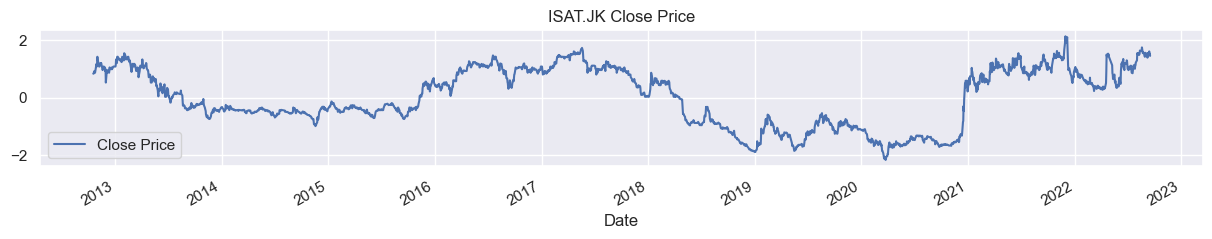

In [3]:
df['Close'].plot(figsize=(15,2))
plt.legend(['Close Price'])
plt.title('ISAT.JK Close Price')

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

print("The best hyperparameters are ",search.best_params_)

[0]	validation_0-rmse:1.14707
[1]	validation_0-rmse:1.13581
[2]	validation_0-rmse:1.12465
[3]	validation_0-rmse:1.11362
[4]	validation_0-rmse:1.10269
[5]	validation_0-rmse:1.09187
[6]	validation_0-rmse:1.08116
[7]	validation_0-rmse:1.07057
[8]	validation_0-rmse:1.06007
[9]	validation_0-rmse:1.04968
[10]	validation_0-rmse:1.03940
[11]	validation_0-rmse:1.02922
[12]	validation_0-rmse:1.01915
[13]	validation_0-rmse:1.00917
[14]	validation_0-rmse:0.99930
[15]	validation_0-rmse:0.98954
[16]	validation_0-rmse:0.97987
[17]	validation_0-rmse:0.97030
[18]	validation_0-rmse:0.96084
[19]	validation_0-rmse:0.95146
[20]	validation_0-rmse:0.94217
[21]	validation_0-rmse:0.93296
[22]	validation_0-rmse:0.92386
[23]	validation_0-rmse:0.91485
[24]	validation_0-rmse:0.90594
[25]	validation_0-rmse:0.89710
[26]	validation_0-rmse:0.88837
[27]	validation_0-rmse:0.87972
[28]	validation_0-rmse:0.87115
[29]	validation_0-rmse:0.86266
[30]	validation_0-rmse:0.85428
[31]	validation_0-rmse:0.84597
[32]	validation_0-

[260]	validation_0-rmse:0.12266
[261]	validation_0-rmse:0.12197
[262]	validation_0-rmse:0.12130
[263]	validation_0-rmse:0.12062
[264]	validation_0-rmse:0.11997
[265]	validation_0-rmse:0.11931
[266]	validation_0-rmse:0.11865
[267]	validation_0-rmse:0.11803
[268]	validation_0-rmse:0.11739
[269]	validation_0-rmse:0.11676
[270]	validation_0-rmse:0.11615
[271]	validation_0-rmse:0.11554
[272]	validation_0-rmse:0.11495
[273]	validation_0-rmse:0.11435
[274]	validation_0-rmse:0.11377
[275]	validation_0-rmse:0.11320
[276]	validation_0-rmse:0.11263
[277]	validation_0-rmse:0.11207
[278]	validation_0-rmse:0.11153
[279]	validation_0-rmse:0.11097
[280]	validation_0-rmse:0.11043
[281]	validation_0-rmse:0.10990
[282]	validation_0-rmse:0.10937
[283]	validation_0-rmse:0.10884
[284]	validation_0-rmse:0.10832
[285]	validation_0-rmse:0.10782
[286]	validation_0-rmse:0.10733
[287]	validation_0-rmse:0.10684
[288]	validation_0-rmse:0.10636
[289]	validation_0-rmse:0.10587
[290]	validation_0-rmse:0.10539
[291]	va

[17]	validation_0-rmse:0.97000
[18]	validation_0-rmse:0.96049
[19]	validation_0-rmse:0.95111
[20]	validation_0-rmse:0.94182
[21]	validation_0-rmse:0.93259
[22]	validation_0-rmse:0.92358
[23]	validation_0-rmse:0.91457
[24]	validation_0-rmse:0.90562
[25]	validation_0-rmse:0.89679
[26]	validation_0-rmse:0.88814
[27]	validation_0-rmse:0.87948
[28]	validation_0-rmse:0.87089
[29]	validation_0-rmse:0.86241
[30]	validation_0-rmse:0.85411
[31]	validation_0-rmse:0.84574
[32]	validation_0-rmse:0.83752
[33]	validation_0-rmse:0.82947
[34]	validation_0-rmse:0.82136
[35]	validation_0-rmse:0.81338
[36]	validation_0-rmse:0.80544
[37]	validation_0-rmse:0.79763
[38]	validation_0-rmse:0.78998
[39]	validation_0-rmse:0.78232
[40]	validation_0-rmse:0.77470
[41]	validation_0-rmse:0.76719
[42]	validation_0-rmse:0.75972
[43]	validation_0-rmse:0.75237
[44]	validation_0-rmse:0.74508
[45]	validation_0-rmse:0.73783
[46]	validation_0-rmse:0.73069
[47]	validation_0-rmse:0.72362
[48]	validation_0-rmse:0.71659
[49]	val

[276]	validation_0-rmse:0.11018
[277]	validation_0-rmse:0.10959
[278]	validation_0-rmse:0.10901
[279]	validation_0-rmse:0.10846
[280]	validation_0-rmse:0.10790
[281]	validation_0-rmse:0.10734
[282]	validation_0-rmse:0.10681
[283]	validation_0-rmse:0.10627
[284]	validation_0-rmse:0.10573
[285]	validation_0-rmse:0.10522
[286]	validation_0-rmse:0.10470
[287]	validation_0-rmse:0.10420
[288]	validation_0-rmse:0.10369
[289]	validation_0-rmse:0.10321
[290]	validation_0-rmse:0.10273
[291]	validation_0-rmse:0.10223
[292]	validation_0-rmse:0.10175
[293]	validation_0-rmse:0.10128
[294]	validation_0-rmse:0.10082
[295]	validation_0-rmse:0.10037
[296]	validation_0-rmse:0.09991
[297]	validation_0-rmse:0.09946
[298]	validation_0-rmse:0.09902
[299]	validation_0-rmse:0.09857
[300]	validation_0-rmse:0.09816
[301]	validation_0-rmse:0.09773
[302]	validation_0-rmse:0.09733
[303]	validation_0-rmse:0.09691
[304]	validation_0-rmse:0.09649
[305]	validation_0-rmse:0.09609
[306]	validation_0-rmse:0.09570
[307]	va

[34]	validation_0-rmse:0.82516
[35]	validation_0-rmse:0.81731
[36]	validation_0-rmse:0.80945
[37]	validation_0-rmse:0.80171
[38]	validation_0-rmse:0.79409
[39]	validation_0-rmse:0.78650
[40]	validation_0-rmse:0.77895
[41]	validation_0-rmse:0.77157
[42]	validation_0-rmse:0.76420
[43]	validation_0-rmse:0.75692
[44]	validation_0-rmse:0.74967
[45]	validation_0-rmse:0.74258
[46]	validation_0-rmse:0.73551
[47]	validation_0-rmse:0.72855
[48]	validation_0-rmse:0.72162
[49]	validation_0-rmse:0.71481
[50]	validation_0-rmse:0.70802
[51]	validation_0-rmse:0.70127
[52]	validation_0-rmse:0.69462
[53]	validation_0-rmse:0.68804
[54]	validation_0-rmse:0.68156
[55]	validation_0-rmse:0.67511
[56]	validation_0-rmse:0.66873
[57]	validation_0-rmse:0.66242
[58]	validation_0-rmse:0.65620
[59]	validation_0-rmse:0.65001
[60]	validation_0-rmse:0.64393
[61]	validation_0-rmse:0.63786
[62]	validation_0-rmse:0.63186
[63]	validation_0-rmse:0.62589
[64]	validation_0-rmse:0.62001
[65]	validation_0-rmse:0.61419
[66]	val

[293]	validation_0-rmse:0.12292
[294]	validation_0-rmse:0.12251
[295]	validation_0-rmse:0.12214
[296]	validation_0-rmse:0.12169
[297]	validation_0-rmse:0.12126
[298]	validation_0-rmse:0.12086
[299]	validation_0-rmse:0.12049
[300]	validation_0-rmse:0.12008
[301]	validation_0-rmse:0.11970
[302]	validation_0-rmse:0.11930
[303]	validation_0-rmse:0.11895
[304]	validation_0-rmse:0.11861
[305]	validation_0-rmse:0.11820
[306]	validation_0-rmse:0.11782
[307]	validation_0-rmse:0.11745
[308]	validation_0-rmse:0.11709
[309]	validation_0-rmse:0.11674
[310]	validation_0-rmse:0.11636
[311]	validation_0-rmse:0.11599
[312]	validation_0-rmse:0.11565
[313]	validation_0-rmse:0.11533
[314]	validation_0-rmse:0.11504
[315]	validation_0-rmse:0.11468
[316]	validation_0-rmse:0.11438
[317]	validation_0-rmse:0.11406
[318]	validation_0-rmse:0.11371
[319]	validation_0-rmse:0.11342
[320]	validation_0-rmse:0.11312
[321]	validation_0-rmse:0.11283
[322]	validation_0-rmse:0.11254
[323]	validation_0-rmse:0.11226
[324]	va

[51]	validation_0-rmse:0.69968
[52]	validation_0-rmse:0.69300
[53]	validation_0-rmse:0.68640
[54]	validation_0-rmse:0.67983
[55]	validation_0-rmse:0.67332
[56]	validation_0-rmse:0.66692
[57]	validation_0-rmse:0.66058
[58]	validation_0-rmse:0.65427
[59]	validation_0-rmse:0.64804
[60]	validation_0-rmse:0.64184
[61]	validation_0-rmse:0.63572
[62]	validation_0-rmse:0.62967
[63]	validation_0-rmse:0.62366
[64]	validation_0-rmse:0.61773
[65]	validation_0-rmse:0.61185
[66]	validation_0-rmse:0.60605
[67]	validation_0-rmse:0.60029
[68]	validation_0-rmse:0.59462
[69]	validation_0-rmse:0.58901
[70]	validation_0-rmse:0.58343
[71]	validation_0-rmse:0.57793
[72]	validation_0-rmse:0.57245
[73]	validation_0-rmse:0.56703
[74]	validation_0-rmse:0.56171
[75]	validation_0-rmse:0.55642
[76]	validation_0-rmse:0.55119
[77]	validation_0-rmse:0.54597
[78]	validation_0-rmse:0.54086
[79]	validation_0-rmse:0.53579
[80]	validation_0-rmse:0.53076
[81]	validation_0-rmse:0.52576
[82]	validation_0-rmse:0.52080
[83]	val

[309]	validation_0-rmse:0.09582
[310]	validation_0-rmse:0.09544
[311]	validation_0-rmse:0.09509
[312]	validation_0-rmse:0.09473
[313]	validation_0-rmse:0.09440
[314]	validation_0-rmse:0.09408
[315]	validation_0-rmse:0.09374
[316]	validation_0-rmse:0.09340
[317]	validation_0-rmse:0.09309
[318]	validation_0-rmse:0.09279
[319]	validation_0-rmse:0.09247
[320]	validation_0-rmse:0.09215
[321]	validation_0-rmse:0.09186
[322]	validation_0-rmse:0.09155
[323]	validation_0-rmse:0.09127
[324]	validation_0-rmse:0.09099
[325]	validation_0-rmse:0.09073
[326]	validation_0-rmse:0.09044
[327]	validation_0-rmse:0.09017
[328]	validation_0-rmse:0.08989
[329]	validation_0-rmse:0.08964
[330]	validation_0-rmse:0.08938
[331]	validation_0-rmse:0.08912
[332]	validation_0-rmse:0.08888
[333]	validation_0-rmse:0.08862
[334]	validation_0-rmse:0.08838
[335]	validation_0-rmse:0.08815
[336]	validation_0-rmse:0.08791
[337]	validation_0-rmse:0.08767
[338]	validation_0-rmse:0.08745
[339]	validation_0-rmse:0.08721
[340]	va

[68]	validation_0-rmse:0.59693
[69]	validation_0-rmse:0.59132
[70]	validation_0-rmse:0.58574
[71]	validation_0-rmse:0.58026
[72]	validation_0-rmse:0.57487
[73]	validation_0-rmse:0.56948
[74]	validation_0-rmse:0.56411
[75]	validation_0-rmse:0.55886
[76]	validation_0-rmse:0.55371
[77]	validation_0-rmse:0.54855
[78]	validation_0-rmse:0.54339
[79]	validation_0-rmse:0.53836
[80]	validation_0-rmse:0.53336
[81]	validation_0-rmse:0.52830
[82]	validation_0-rmse:0.52330
[83]	validation_0-rmse:0.51846
[84]	validation_0-rmse:0.51355
[85]	validation_0-rmse:0.50870
[86]	validation_0-rmse:0.50404
[87]	validation_0-rmse:0.49947
[88]	validation_0-rmse:0.49480
[89]	validation_0-rmse:0.49014
[90]	validation_0-rmse:0.48564
[91]	validation_0-rmse:0.48124
[92]	validation_0-rmse:0.47673
[93]	validation_0-rmse:0.47226
[94]	validation_0-rmse:0.46793
[95]	validation_0-rmse:0.46369
[96]	validation_0-rmse:0.45940
[97]	validation_0-rmse:0.45523
[98]	validation_0-rmse:0.45129
[99]	validation_0-rmse:0.44709
[100]	va

[326]	validation_0-rmse:0.10631
[327]	validation_0-rmse:0.10591
[328]	validation_0-rmse:0.10555
[329]	validation_0-rmse:0.10528
[330]	validation_0-rmse:0.10493
[331]	validation_0-rmse:0.10455
[332]	validation_0-rmse:0.10423
[333]	validation_0-rmse:0.10389
[334]	validation_0-rmse:0.10359
[335]	validation_0-rmse:0.10330
[336]	validation_0-rmse:0.10305
[337]	validation_0-rmse:0.10273
[338]	validation_0-rmse:0.10248
[339]	validation_0-rmse:0.10217
[340]	validation_0-rmse:0.10186
[341]	validation_0-rmse:0.10157
[342]	validation_0-rmse:0.10131
[343]	validation_0-rmse:0.10107
[344]	validation_0-rmse:0.10078
[345]	validation_0-rmse:0.10049
[346]	validation_0-rmse:0.10016
[347]	validation_0-rmse:0.09992
[348]	validation_0-rmse:0.09965
[349]	validation_0-rmse:0.09934
[350]	validation_0-rmse:0.09907
[351]	validation_0-rmse:0.09876
[352]	validation_0-rmse:0.09854
[353]	validation_0-rmse:0.09827
[354]	validation_0-rmse:0.09805
[355]	validation_0-rmse:0.09779
[356]	validation_0-rmse:0.09751
[357]	va

[85]	validation_0-rmse:0.50255
[86]	validation_0-rmse:0.49785
[87]	validation_0-rmse:0.49317
[88]	validation_0-rmse:0.48852
[89]	validation_0-rmse:0.48392
[90]	validation_0-rmse:0.47938
[91]	validation_0-rmse:0.47486
[92]	validation_0-rmse:0.47041
[93]	validation_0-rmse:0.46598
[94]	validation_0-rmse:0.46164
[95]	validation_0-rmse:0.45731
[96]	validation_0-rmse:0.45304
[97]	validation_0-rmse:0.44879
[98]	validation_0-rmse:0.44463
[99]	validation_0-rmse:0.44048
[100]	validation_0-rmse:0.43638
[101]	validation_0-rmse:0.43232
[102]	validation_0-rmse:0.42830
[103]	validation_0-rmse:0.42432
[104]	validation_0-rmse:0.42038
[105]	validation_0-rmse:0.41651
[106]	validation_0-rmse:0.41266
[107]	validation_0-rmse:0.40886
[108]	validation_0-rmse:0.40509
[109]	validation_0-rmse:0.40133
[110]	validation_0-rmse:0.39765
[111]	validation_0-rmse:0.39399
[112]	validation_0-rmse:0.39038
[113]	validation_0-rmse:0.38681
[114]	validation_0-rmse:0.38325
[115]	validation_0-rmse:0.37977
[116]	validation_0-rmse

[342]	validation_0-rmse:0.08739
[343]	validation_0-rmse:0.08715
[344]	validation_0-rmse:0.08691
[345]	validation_0-rmse:0.08667
[346]	validation_0-rmse:0.08644
[347]	validation_0-rmse:0.08620
[348]	validation_0-rmse:0.08597
[349]	validation_0-rmse:0.08575
[350]	validation_0-rmse:0.08553
[351]	validation_0-rmse:0.08531
[352]	validation_0-rmse:0.08510
[353]	validation_0-rmse:0.08488
[354]	validation_0-rmse:0.08466
[355]	validation_0-rmse:0.08445
[356]	validation_0-rmse:0.08424
[357]	validation_0-rmse:0.08404
[358]	validation_0-rmse:0.08384
[359]	validation_0-rmse:0.08363
[360]	validation_0-rmse:0.08343
[361]	validation_0-rmse:0.08324
[362]	validation_0-rmse:0.08304
[363]	validation_0-rmse:0.08284
[364]	validation_0-rmse:0.08265
[365]	validation_0-rmse:0.08247
[366]	validation_0-rmse:0.08229
[367]	validation_0-rmse:0.08211
[368]	validation_0-rmse:0.08194
[369]	validation_0-rmse:0.08176
[370]	validation_0-rmse:0.08159
[371]	validation_0-rmse:0.08142
[372]	validation_0-rmse:0.08125
[373]	va

[599]	validation_0-rmse:0.06646
[0]	validation_0-rmse:1.14704
[1]	validation_0-rmse:1.13574
[2]	validation_0-rmse:1.12456
[3]	validation_0-rmse:1.11349
[4]	validation_0-rmse:1.10253
[5]	validation_0-rmse:1.09172
[6]	validation_0-rmse:1.08098
[7]	validation_0-rmse:1.07039
[8]	validation_0-rmse:1.05987
[9]	validation_0-rmse:1.04948
[10]	validation_0-rmse:1.03918
[11]	validation_0-rmse:1.02901
[12]	validation_0-rmse:1.01893
[13]	validation_0-rmse:1.00896
[14]	validation_0-rmse:0.99909
[15]	validation_0-rmse:0.98928
[16]	validation_0-rmse:0.97960
[17]	validation_0-rmse:0.97000
[18]	validation_0-rmse:0.96049
[19]	validation_0-rmse:0.95111
[20]	validation_0-rmse:0.94182
[21]	validation_0-rmse:0.93259
[22]	validation_0-rmse:0.92358
[23]	validation_0-rmse:0.91457
[24]	validation_0-rmse:0.90562
[25]	validation_0-rmse:0.89679
[26]	validation_0-rmse:0.88814
[27]	validation_0-rmse:0.87948
[28]	validation_0-rmse:0.87089
[29]	validation_0-rmse:0.86241
[30]	validation_0-rmse:0.85411
[31]	validation_0

[259]	validation_0-rmse:0.12135
[260]	validation_0-rmse:0.12061
[261]	validation_0-rmse:0.11990
[262]	validation_0-rmse:0.11922
[263]	validation_0-rmse:0.11851
[264]	validation_0-rmse:0.11780
[265]	validation_0-rmse:0.11711
[266]	validation_0-rmse:0.11645
[267]	validation_0-rmse:0.11578
[268]	validation_0-rmse:0.11513
[269]	validation_0-rmse:0.11447
[270]	validation_0-rmse:0.11382
[271]	validation_0-rmse:0.11320
[272]	validation_0-rmse:0.11259
[273]	validation_0-rmse:0.11197
[274]	validation_0-rmse:0.11136
[275]	validation_0-rmse:0.11077
[276]	validation_0-rmse:0.11018
[277]	validation_0-rmse:0.10959
[278]	validation_0-rmse:0.10901
[279]	validation_0-rmse:0.10846
[280]	validation_0-rmse:0.10790
[281]	validation_0-rmse:0.10734
[282]	validation_0-rmse:0.10681
[283]	validation_0-rmse:0.10627
[284]	validation_0-rmse:0.10573
[285]	validation_0-rmse:0.10522
[286]	validation_0-rmse:0.10470
[287]	validation_0-rmse:0.10420
[288]	validation_0-rmse:0.10369
[289]	validation_0-rmse:0.10321
[290]	va

[516]	validation_0-rmse:0.06559
[517]	validation_0-rmse:0.06554
[518]	validation_0-rmse:0.06551
[519]	validation_0-rmse:0.06547
[520]	validation_0-rmse:0.06543
[521]	validation_0-rmse:0.06540
[522]	validation_0-rmse:0.06536
[523]	validation_0-rmse:0.06531
[524]	validation_0-rmse:0.06527
[525]	validation_0-rmse:0.06524
[526]	validation_0-rmse:0.06520
[527]	validation_0-rmse:0.06517
[528]	validation_0-rmse:0.06511
[529]	validation_0-rmse:0.06507
[530]	validation_0-rmse:0.06503
[531]	validation_0-rmse:0.06498
[532]	validation_0-rmse:0.06495
[533]	validation_0-rmse:0.06492
[534]	validation_0-rmse:0.06488
[535]	validation_0-rmse:0.06483
[536]	validation_0-rmse:0.06480
[537]	validation_0-rmse:0.06475
[538]	validation_0-rmse:0.06472
[539]	validation_0-rmse:0.06467
[540]	validation_0-rmse:0.06464
[541]	validation_0-rmse:0.06460
[542]	validation_0-rmse:0.06457
[543]	validation_0-rmse:0.06453
[544]	validation_0-rmse:0.06450
[545]	validation_0-rmse:0.06446
[546]	validation_0-rmse:0.06443
[547]	va

[176]	validation_0-rmse:0.23492
[177]	validation_0-rmse:0.23317
[178]	validation_0-rmse:0.23139
[179]	validation_0-rmse:0.22967
[180]	validation_0-rmse:0.22792
[181]	validation_0-rmse:0.22625
[182]	validation_0-rmse:0.22462
[183]	validation_0-rmse:0.22297
[184]	validation_0-rmse:0.22139
[185]	validation_0-rmse:0.21973
[186]	validation_0-rmse:0.21814
[187]	validation_0-rmse:0.21655
[188]	validation_0-rmse:0.21496
[189]	validation_0-rmse:0.21346
[190]	validation_0-rmse:0.21200
[191]	validation_0-rmse:0.21054
[192]	validation_0-rmse:0.20900
[193]	validation_0-rmse:0.20750
[194]	validation_0-rmse:0.20604
[195]	validation_0-rmse:0.20464
[196]	validation_0-rmse:0.20327
[197]	validation_0-rmse:0.20185
[198]	validation_0-rmse:0.20043
[199]	validation_0-rmse:0.19910
[200]	validation_0-rmse:0.19778
[201]	validation_0-rmse:0.19640
[202]	validation_0-rmse:0.19504
[203]	validation_0-rmse:0.19377
[204]	validation_0-rmse:0.19253
[205]	validation_0-rmse:0.19129
[206]	validation_0-rmse:0.18998
[207]	va

[433]	validation_0-rmse:0.09432
[434]	validation_0-rmse:0.09425
[435]	validation_0-rmse:0.09418
[436]	validation_0-rmse:0.09407
[437]	validation_0-rmse:0.09400
[438]	validation_0-rmse:0.09394
[439]	validation_0-rmse:0.09382
[440]	validation_0-rmse:0.09376
[441]	validation_0-rmse:0.09365
[442]	validation_0-rmse:0.09354
[443]	validation_0-rmse:0.09348
[444]	validation_0-rmse:0.09337
[445]	validation_0-rmse:0.09326
[446]	validation_0-rmse:0.09320
[447]	validation_0-rmse:0.09313
[448]	validation_0-rmse:0.09307
[449]	validation_0-rmse:0.09302
[450]	validation_0-rmse:0.09296
[451]	validation_0-rmse:0.09288
[452]	validation_0-rmse:0.09278
[453]	validation_0-rmse:0.09273
[454]	validation_0-rmse:0.09264
[455]	validation_0-rmse:0.09254
[456]	validation_0-rmse:0.09249
[457]	validation_0-rmse:0.09239
[458]	validation_0-rmse:0.09233
[459]	validation_0-rmse:0.09226
[460]	validation_0-rmse:0.09221
[461]	validation_0-rmse:0.09211
[462]	validation_0-rmse:0.09206
[463]	validation_0-rmse:0.09201
[464]	va

[93]	validation_0-rmse:0.46964
[94]	validation_0-rmse:0.46531
[95]	validation_0-rmse:0.46099
[96]	validation_0-rmse:0.45671
[97]	validation_0-rmse:0.45245
[98]	validation_0-rmse:0.44829
[99]	validation_0-rmse:0.44410
[100]	validation_0-rmse:0.43997
[101]	validation_0-rmse:0.43592
[102]	validation_0-rmse:0.43193
[103]	validation_0-rmse:0.42795
[104]	validation_0-rmse:0.42401
[105]	validation_0-rmse:0.42004
[106]	validation_0-rmse:0.41613
[107]	validation_0-rmse:0.41234
[108]	validation_0-rmse:0.40851
[109]	validation_0-rmse:0.40478
[110]	validation_0-rmse:0.40104
[111]	validation_0-rmse:0.39731
[112]	validation_0-rmse:0.39361
[113]	validation_0-rmse:0.38997
[114]	validation_0-rmse:0.38644
[115]	validation_0-rmse:0.38284
[116]	validation_0-rmse:0.37936
[117]	validation_0-rmse:0.37587
[118]	validation_0-rmse:0.37238
[119]	validation_0-rmse:0.36893
[120]	validation_0-rmse:0.36551
[121]	validation_0-rmse:0.36218
[122]	validation_0-rmse:0.35885
[123]	validation_0-rmse:0.35557
[124]	validatio

[350]	validation_0-rmse:0.08492
[351]	validation_0-rmse:0.08474
[352]	validation_0-rmse:0.08453
[353]	validation_0-rmse:0.08433
[354]	validation_0-rmse:0.08416
[355]	validation_0-rmse:0.08397
[356]	validation_0-rmse:0.08378
[357]	validation_0-rmse:0.08361
[358]	validation_0-rmse:0.08343
[359]	validation_0-rmse:0.08328
[360]	validation_0-rmse:0.08311
[361]	validation_0-rmse:0.08292
[362]	validation_0-rmse:0.08276
[363]	validation_0-rmse:0.08258
[364]	validation_0-rmse:0.08241
[365]	validation_0-rmse:0.08227
[366]	validation_0-rmse:0.08210
[367]	validation_0-rmse:0.08195
[368]	validation_0-rmse:0.08178
[369]	validation_0-rmse:0.08162
[370]	validation_0-rmse:0.08147
[371]	validation_0-rmse:0.08131
[372]	validation_0-rmse:0.08118
[373]	validation_0-rmse:0.08104
[374]	validation_0-rmse:0.08091
[375]	validation_0-rmse:0.08076
[376]	validation_0-rmse:0.08061
[377]	validation_0-rmse:0.08049
[378]	validation_0-rmse:0.08035
[379]	validation_0-rmse:0.08023
[380]	validation_0-rmse:0.08010
[381]	va

[7]	validation_0-rmse:1.07142
[8]	validation_0-rmse:1.06104
[9]	validation_0-rmse:1.05074
[10]	validation_0-rmse:1.04057
[11]	validation_0-rmse:1.03049
[12]	validation_0-rmse:1.02052
[13]	validation_0-rmse:1.01064
[14]	validation_0-rmse:1.00087
[15]	validation_0-rmse:0.99118
[16]	validation_0-rmse:0.98161
[17]	validation_0-rmse:0.97212
[18]	validation_0-rmse:0.96273
[19]	validation_0-rmse:0.95342
[20]	validation_0-rmse:0.94423
[21]	validation_0-rmse:0.93512
[22]	validation_0-rmse:0.92611
[23]	validation_0-rmse:0.91719
[24]	validation_0-rmse:0.90834
[25]	validation_0-rmse:0.89957
[26]	validation_0-rmse:0.89091
[27]	validation_0-rmse:0.88245
[28]	validation_0-rmse:0.87396
[29]	validation_0-rmse:0.86561
[30]	validation_0-rmse:0.85727
[31]	validation_0-rmse:0.84907
[32]	validation_0-rmse:0.84096
[33]	validation_0-rmse:0.83287
[34]	validation_0-rmse:0.82493
[35]	validation_0-rmse:0.81711
[36]	validation_0-rmse:0.80936
[37]	validation_0-rmse:0.80171
[38]	validation_0-rmse:0.79401
[39]	valida

[267]	validation_0-rmse:0.13407
[268]	validation_0-rmse:0.13351
[269]	validation_0-rmse:0.13289
[270]	validation_0-rmse:0.13221
[271]	validation_0-rmse:0.13162
[272]	validation_0-rmse:0.13109
[273]	validation_0-rmse:0.13050
[274]	validation_0-rmse:0.12988
[275]	validation_0-rmse:0.12919
[276]	validation_0-rmse:0.12862
[277]	validation_0-rmse:0.12807
[278]	validation_0-rmse:0.12744
[279]	validation_0-rmse:0.12690
[280]	validation_0-rmse:0.12637
[281]	validation_0-rmse:0.12583
[282]	validation_0-rmse:0.12530
[283]	validation_0-rmse:0.12479
[284]	validation_0-rmse:0.12432
[285]	validation_0-rmse:0.12381
[286]	validation_0-rmse:0.12335
[287]	validation_0-rmse:0.12284
[288]	validation_0-rmse:0.12227
[289]	validation_0-rmse:0.12178
[290]	validation_0-rmse:0.12125
[291]	validation_0-rmse:0.12082
[292]	validation_0-rmse:0.12024
[293]	validation_0-rmse:0.11979
[294]	validation_0-rmse:0.11934
[295]	validation_0-rmse:0.11881
[296]	validation_0-rmse:0.11835
[297]	validation_0-rmse:0.11781
[298]	va

[524]	validation_0-rmse:0.07717
[525]	validation_0-rmse:0.07711
[526]	validation_0-rmse:0.07708
[527]	validation_0-rmse:0.07702
[528]	validation_0-rmse:0.07697
[529]	validation_0-rmse:0.07692
[530]	validation_0-rmse:0.07689
[531]	validation_0-rmse:0.07684
[532]	validation_0-rmse:0.07678
[533]	validation_0-rmse:0.07672
[534]	validation_0-rmse:0.07669
[535]	validation_0-rmse:0.07666
[536]	validation_0-rmse:0.07660
[537]	validation_0-rmse:0.07655
[538]	validation_0-rmse:0.07648
[539]	validation_0-rmse:0.07643
[540]	validation_0-rmse:0.07638
[541]	validation_0-rmse:0.07634
[542]	validation_0-rmse:0.07629
[543]	validation_0-rmse:0.07624
[544]	validation_0-rmse:0.07617
[545]	validation_0-rmse:0.07614
[546]	validation_0-rmse:0.07609
[547]	validation_0-rmse:0.07604
[548]	validation_0-rmse:0.07599
[549]	validation_0-rmse:0.07596
[550]	validation_0-rmse:0.07591
[551]	validation_0-rmse:0.07586
[552]	validation_0-rmse:0.07581
[553]	validation_0-rmse:0.07576
[554]	validation_0-rmse:0.07570
[555]	va

[184]	validation_0-rmse:0.20818
[185]	validation_0-rmse:0.20651
[186]	validation_0-rmse:0.20484
[187]	validation_0-rmse:0.20320
[188]	validation_0-rmse:0.20157
[189]	validation_0-rmse:0.20000
[190]	validation_0-rmse:0.19842
[191]	validation_0-rmse:0.19688
[192]	validation_0-rmse:0.19534
[193]	validation_0-rmse:0.19380
[194]	validation_0-rmse:0.19227
[195]	validation_0-rmse:0.19078
[196]	validation_0-rmse:0.18929
[197]	validation_0-rmse:0.18782
[198]	validation_0-rmse:0.18635
[199]	validation_0-rmse:0.18492
[200]	validation_0-rmse:0.18349
[201]	validation_0-rmse:0.18211
[202]	validation_0-rmse:0.18072
[203]	validation_0-rmse:0.17934
[204]	validation_0-rmse:0.17800
[205]	validation_0-rmse:0.17665
[206]	validation_0-rmse:0.17533
[207]	validation_0-rmse:0.17403
[208]	validation_0-rmse:0.17275
[209]	validation_0-rmse:0.17148
[210]	validation_0-rmse:0.17021
[211]	validation_0-rmse:0.16895
[212]	validation_0-rmse:0.16772
[213]	validation_0-rmse:0.16651
[214]	validation_0-rmse:0.16529
[215]	va

[441]	validation_0-rmse:0.07325
[442]	validation_0-rmse:0.07318
[443]	validation_0-rmse:0.07311
[444]	validation_0-rmse:0.07303
[445]	validation_0-rmse:0.07295
[446]	validation_0-rmse:0.07285
[447]	validation_0-rmse:0.07278
[448]	validation_0-rmse:0.07271
[449]	validation_0-rmse:0.07264
[450]	validation_0-rmse:0.07257
[451]	validation_0-rmse:0.07251
[452]	validation_0-rmse:0.07242
[453]	validation_0-rmse:0.07236
[454]	validation_0-rmse:0.07229
[455]	validation_0-rmse:0.07222
[456]	validation_0-rmse:0.07217
[457]	validation_0-rmse:0.07209
[458]	validation_0-rmse:0.07203
[459]	validation_0-rmse:0.07194
[460]	validation_0-rmse:0.07187
[461]	validation_0-rmse:0.07181
[462]	validation_0-rmse:0.07176
[463]	validation_0-rmse:0.07169
[464]	validation_0-rmse:0.07161
[465]	validation_0-rmse:0.07156
[466]	validation_0-rmse:0.07151
[467]	validation_0-rmse:0.07144
[468]	validation_0-rmse:0.07138
[469]	validation_0-rmse:0.07130
[470]	validation_0-rmse:0.07124
[471]	validation_0-rmse:0.07119
[472]	va

[698]	validation_0-rmse:0.06470
[699]	validation_0-rmse:0.06468
[0]	validation_0-rmse:1.14704
[1]	validation_0-rmse:1.13574
[2]	validation_0-rmse:1.12456
[3]	validation_0-rmse:1.11349
[4]	validation_0-rmse:1.10253
[5]	validation_0-rmse:1.09172
[6]	validation_0-rmse:1.08098
[7]	validation_0-rmse:1.07039
[8]	validation_0-rmse:1.05987
[9]	validation_0-rmse:1.04948
[10]	validation_0-rmse:1.03918
[11]	validation_0-rmse:1.02901
[12]	validation_0-rmse:1.01893
[13]	validation_0-rmse:1.00896
[14]	validation_0-rmse:0.99909
[15]	validation_0-rmse:0.98928
[16]	validation_0-rmse:0.97960
[17]	validation_0-rmse:0.97000
[18]	validation_0-rmse:0.96049
[19]	validation_0-rmse:0.95111
[20]	validation_0-rmse:0.94182
[21]	validation_0-rmse:0.93259
[22]	validation_0-rmse:0.92358
[23]	validation_0-rmse:0.91457
[24]	validation_0-rmse:0.90562
[25]	validation_0-rmse:0.89679
[26]	validation_0-rmse:0.88814
[27]	validation_0-rmse:0.87948
[28]	validation_0-rmse:0.87089
[29]	validation_0-rmse:0.86241
[30]	validation_

[258]	validation_0-rmse:0.12207
[259]	validation_0-rmse:0.12135
[260]	validation_0-rmse:0.12061
[261]	validation_0-rmse:0.11990
[262]	validation_0-rmse:0.11922
[263]	validation_0-rmse:0.11851
[264]	validation_0-rmse:0.11780
[265]	validation_0-rmse:0.11711
[266]	validation_0-rmse:0.11645
[267]	validation_0-rmse:0.11578
[268]	validation_0-rmse:0.11513
[269]	validation_0-rmse:0.11447
[270]	validation_0-rmse:0.11382
[271]	validation_0-rmse:0.11320
[272]	validation_0-rmse:0.11259
[273]	validation_0-rmse:0.11197
[274]	validation_0-rmse:0.11136
[275]	validation_0-rmse:0.11077
[276]	validation_0-rmse:0.11018
[277]	validation_0-rmse:0.10959
[278]	validation_0-rmse:0.10901
[279]	validation_0-rmse:0.10846
[280]	validation_0-rmse:0.10790
[281]	validation_0-rmse:0.10734
[282]	validation_0-rmse:0.10681
[283]	validation_0-rmse:0.10627
[284]	validation_0-rmse:0.10573
[285]	validation_0-rmse:0.10522
[286]	validation_0-rmse:0.10470
[287]	validation_0-rmse:0.10420
[288]	validation_0-rmse:0.10369
[289]	va

[515]	validation_0-rmse:0.06564
[516]	validation_0-rmse:0.06559
[517]	validation_0-rmse:0.06554
[518]	validation_0-rmse:0.06551
[519]	validation_0-rmse:0.06547
[520]	validation_0-rmse:0.06543
[521]	validation_0-rmse:0.06540
[522]	validation_0-rmse:0.06536
[523]	validation_0-rmse:0.06531
[524]	validation_0-rmse:0.06527
[525]	validation_0-rmse:0.06524
[526]	validation_0-rmse:0.06520
[527]	validation_0-rmse:0.06517
[528]	validation_0-rmse:0.06511
[529]	validation_0-rmse:0.06507
[530]	validation_0-rmse:0.06503
[531]	validation_0-rmse:0.06498
[532]	validation_0-rmse:0.06495
[533]	validation_0-rmse:0.06492
[534]	validation_0-rmse:0.06488
[535]	validation_0-rmse:0.06483
[536]	validation_0-rmse:0.06480
[537]	validation_0-rmse:0.06475
[538]	validation_0-rmse:0.06472
[539]	validation_0-rmse:0.06467
[540]	validation_0-rmse:0.06464
[541]	validation_0-rmse:0.06460
[542]	validation_0-rmse:0.06457
[543]	validation_0-rmse:0.06453
[544]	validation_0-rmse:0.06450
[545]	validation_0-rmse:0.06446
[546]	va

[74]	validation_0-rmse:0.56451
[75]	validation_0-rmse:0.55925
[76]	validation_0-rmse:0.55409
[77]	validation_0-rmse:0.54895
[78]	validation_0-rmse:0.54390
[79]	validation_0-rmse:0.53887
[80]	validation_0-rmse:0.53388
[81]	validation_0-rmse:0.52895
[82]	validation_0-rmse:0.52410
[83]	validation_0-rmse:0.51926
[84]	validation_0-rmse:0.51448
[85]	validation_0-rmse:0.50974
[86]	validation_0-rmse:0.50509
[87]	validation_0-rmse:0.50045
[88]	validation_0-rmse:0.49586
[89]	validation_0-rmse:0.49132
[90]	validation_0-rmse:0.48683
[91]	validation_0-rmse:0.48238
[92]	validation_0-rmse:0.47803
[93]	validation_0-rmse:0.47367
[94]	validation_0-rmse:0.46936
[95]	validation_0-rmse:0.46510
[96]	validation_0-rmse:0.46091
[97]	validation_0-rmse:0.45674
[98]	validation_0-rmse:0.45261
[99]	validation_0-rmse:0.44852
[100]	validation_0-rmse:0.44446
[101]	validation_0-rmse:0.44046
[102]	validation_0-rmse:0.43644
[103]	validation_0-rmse:0.43252
[104]	validation_0-rmse:0.42864
[105]	validation_0-rmse:0.42483
[1

[331]	validation_0-rmse:0.10999
[332]	validation_0-rmse:0.10973
[333]	validation_0-rmse:0.10948
[334]	validation_0-rmse:0.10924
[335]	validation_0-rmse:0.10899
[336]	validation_0-rmse:0.10875
[337]	validation_0-rmse:0.10848
[338]	validation_0-rmse:0.10827
[339]	validation_0-rmse:0.10805
[340]	validation_0-rmse:0.10779
[341]	validation_0-rmse:0.10753
[342]	validation_0-rmse:0.10733
[343]	validation_0-rmse:0.10710
[344]	validation_0-rmse:0.10687
[345]	validation_0-rmse:0.10667
[346]	validation_0-rmse:0.10642
[347]	validation_0-rmse:0.10620
[348]	validation_0-rmse:0.10599
[349]	validation_0-rmse:0.10574
[350]	validation_0-rmse:0.10556
[351]	validation_0-rmse:0.10537
[352]	validation_0-rmse:0.10514
[353]	validation_0-rmse:0.10497
[354]	validation_0-rmse:0.10479
[355]	validation_0-rmse:0.10456
[356]	validation_0-rmse:0.10440
[357]	validation_0-rmse:0.10417
[358]	validation_0-rmse:0.10400
[359]	validation_0-rmse:0.10378
[360]	validation_0-rmse:0.10356
[361]	validation_0-rmse:0.10341
[362]	va

[588]	validation_0-rmse:0.08685
[589]	validation_0-rmse:0.08682
[590]	validation_0-rmse:0.08677
[591]	validation_0-rmse:0.08672
[592]	validation_0-rmse:0.08670
[593]	validation_0-rmse:0.08667
[594]	validation_0-rmse:0.08665
[595]	validation_0-rmse:0.08662
[596]	validation_0-rmse:0.08660
[597]	validation_0-rmse:0.08655
[598]	validation_0-rmse:0.08652
[599]	validation_0-rmse:0.08650
[600]	validation_0-rmse:0.08648
[601]	validation_0-rmse:0.08646
[602]	validation_0-rmse:0.08644
[603]	validation_0-rmse:0.08639
[604]	validation_0-rmse:0.08637
[605]	validation_0-rmse:0.08634
[606]	validation_0-rmse:0.08633
[607]	validation_0-rmse:0.08629
[608]	validation_0-rmse:0.08628
[609]	validation_0-rmse:0.08625
[610]	validation_0-rmse:0.08623
[611]	validation_0-rmse:0.08622
[612]	validation_0-rmse:0.08620
[613]	validation_0-rmse:0.08617
[614]	validation_0-rmse:0.08615
[615]	validation_0-rmse:0.08613
[616]	validation_0-rmse:0.08612
[617]	validation_0-rmse:0.08608
[618]	validation_0-rmse:0.08606
[619]	va

[148]	validation_0-rmse:0.28358
[149]	validation_0-rmse:0.28108
[150]	validation_0-rmse:0.27859
[151]	validation_0-rmse:0.27613
[152]	validation_0-rmse:0.27373
[153]	validation_0-rmse:0.27131
[154]	validation_0-rmse:0.26893
[155]	validation_0-rmse:0.26660
[156]	validation_0-rmse:0.26410
[157]	validation_0-rmse:0.26183
[158]	validation_0-rmse:0.25955
[159]	validation_0-rmse:0.25733
[160]	validation_0-rmse:0.25509
[161]	validation_0-rmse:0.25285
[162]	validation_0-rmse:0.25068
[163]	validation_0-rmse:0.24850
[164]	validation_0-rmse:0.24620
[165]	validation_0-rmse:0.24410
[166]	validation_0-rmse:0.24204
[167]	validation_0-rmse:0.23997
[168]	validation_0-rmse:0.23777
[169]	validation_0-rmse:0.23577
[170]	validation_0-rmse:0.23381
[171]	validation_0-rmse:0.23174
[172]	validation_0-rmse:0.22977
[173]	validation_0-rmse:0.22785
[174]	validation_0-rmse:0.22579
[175]	validation_0-rmse:0.22392
[176]	validation_0-rmse:0.22206
[177]	validation_0-rmse:0.22022
[178]	validation_0-rmse:0.21830
[179]	va

[405]	validation_0-rmse:0.07743
[406]	validation_0-rmse:0.07735
[407]	validation_0-rmse:0.07725
[408]	validation_0-rmse:0.07716
[409]	validation_0-rmse:0.07708
[410]	validation_0-rmse:0.07700
[411]	validation_0-rmse:0.07692
[412]	validation_0-rmse:0.07684
[413]	validation_0-rmse:0.07677
[414]	validation_0-rmse:0.07669
[415]	validation_0-rmse:0.07662
[416]	validation_0-rmse:0.07654
[417]	validation_0-rmse:0.07646
[418]	validation_0-rmse:0.07639
[419]	validation_0-rmse:0.07632
[420]	validation_0-rmse:0.07625
[421]	validation_0-rmse:0.07617
[422]	validation_0-rmse:0.07611
[423]	validation_0-rmse:0.07604
[424]	validation_0-rmse:0.07596
[425]	validation_0-rmse:0.07588
[426]	validation_0-rmse:0.07581
[427]	validation_0-rmse:0.07574
[428]	validation_0-rmse:0.07569
[429]	validation_0-rmse:0.07562
[430]	validation_0-rmse:0.07556
[431]	validation_0-rmse:0.07550
[432]	validation_0-rmse:0.07544
[433]	validation_0-rmse:0.07539
[434]	validation_0-rmse:0.07531
[435]	validation_0-rmse:0.07526
[436]	va

[662]	validation_0-rmse:0.06932
[663]	validation_0-rmse:0.06929
[664]	validation_0-rmse:0.06927
[665]	validation_0-rmse:0.06927
[666]	validation_0-rmse:0.06926
[667]	validation_0-rmse:0.06925
[668]	validation_0-rmse:0.06924
[669]	validation_0-rmse:0.06923
[670]	validation_0-rmse:0.06922
[671]	validation_0-rmse:0.06921
[672]	validation_0-rmse:0.06919
[673]	validation_0-rmse:0.06919
[674]	validation_0-rmse:0.06916
[675]	validation_0-rmse:0.06915
[676]	validation_0-rmse:0.06914
[677]	validation_0-rmse:0.06913
[678]	validation_0-rmse:0.06911
[679]	validation_0-rmse:0.06910
[680]	validation_0-rmse:0.06907
[681]	validation_0-rmse:0.06905
[682]	validation_0-rmse:0.06904
[683]	validation_0-rmse:0.06903
[684]	validation_0-rmse:0.06901
[685]	validation_0-rmse:0.06900
[686]	validation_0-rmse:0.06899
[687]	validation_0-rmse:0.06898
[688]	validation_0-rmse:0.06897
[689]	validation_0-rmse:0.06897
[690]	validation_0-rmse:0.06896
[691]	validation_0-rmse:0.06895
[692]	validation_0-rmse:0.06894
[693]	va

[222]	validation_0-rmse:0.17202
[223]	validation_0-rmse:0.17109
[224]	validation_0-rmse:0.17011
[225]	validation_0-rmse:0.16900
[226]	validation_0-rmse:0.16790
[227]	validation_0-rmse:0.16681
[228]	validation_0-rmse:0.16583
[229]	validation_0-rmse:0.16477
[230]	validation_0-rmse:0.16391
[231]	validation_0-rmse:0.16292
[232]	validation_0-rmse:0.16205
[233]	validation_0-rmse:0.16102
[234]	validation_0-rmse:0.16010
[235]	validation_0-rmse:0.15915
[236]	validation_0-rmse:0.15831
[237]	validation_0-rmse:0.15733
[238]	validation_0-rmse:0.15648
[239]	validation_0-rmse:0.15551
[240]	validation_0-rmse:0.15474
[241]	validation_0-rmse:0.15394
[242]	validation_0-rmse:0.15301
[243]	validation_0-rmse:0.15222
[244]	validation_0-rmse:0.15131
[245]	validation_0-rmse:0.15041
[246]	validation_0-rmse:0.14952
[247]	validation_0-rmse:0.14869
[248]	validation_0-rmse:0.14798
[249]	validation_0-rmse:0.14717
[250]	validation_0-rmse:0.14631
[251]	validation_0-rmse:0.14563
[252]	validation_0-rmse:0.14490
[253]	va

[479]	validation_0-rmse:0.08005
[480]	validation_0-rmse:0.07995
[481]	validation_0-rmse:0.07986
[482]	validation_0-rmse:0.07981
[483]	validation_0-rmse:0.07973
[484]	validation_0-rmse:0.07967
[485]	validation_0-rmse:0.07961
[486]	validation_0-rmse:0.07953
[487]	validation_0-rmse:0.07943
[488]	validation_0-rmse:0.07938
[489]	validation_0-rmse:0.07932
[490]	validation_0-rmse:0.07923
[491]	validation_0-rmse:0.07917
[492]	validation_0-rmse:0.07908
[493]	validation_0-rmse:0.07902
[494]	validation_0-rmse:0.07898
[495]	validation_0-rmse:0.07892
[496]	validation_0-rmse:0.07884
[497]	validation_0-rmse:0.07876
[498]	validation_0-rmse:0.07871
[499]	validation_0-rmse:0.07862
[500]	validation_0-rmse:0.07855
[501]	validation_0-rmse:0.07851
[502]	validation_0-rmse:0.07844
[503]	validation_0-rmse:0.07837
[504]	validation_0-rmse:0.07833
[505]	validation_0-rmse:0.07826
[506]	validation_0-rmse:0.07818
[507]	validation_0-rmse:0.07812
[508]	validation_0-rmse:0.07807
[509]	validation_0-rmse:0.07800
[510]	va

[37]	validation_0-rmse:0.79790
[38]	validation_0-rmse:0.79016
[39]	validation_0-rmse:0.78251
[40]	validation_0-rmse:0.77492
[41]	validation_0-rmse:0.76743
[42]	validation_0-rmse:0.75998
[43]	validation_0-rmse:0.75262
[44]	validation_0-rmse:0.74533
[45]	validation_0-rmse:0.73815
[46]	validation_0-rmse:0.73102
[47]	validation_0-rmse:0.72396
[48]	validation_0-rmse:0.71695
[49]	validation_0-rmse:0.71002
[50]	validation_0-rmse:0.70319
[51]	validation_0-rmse:0.69641
[52]	validation_0-rmse:0.68970
[53]	validation_0-rmse:0.68305
[54]	validation_0-rmse:0.67647
[55]	validation_0-rmse:0.66999
[56]	validation_0-rmse:0.66356
[57]	validation_0-rmse:0.65717
[58]	validation_0-rmse:0.65086
[59]	validation_0-rmse:0.64462
[60]	validation_0-rmse:0.63844
[61]	validation_0-rmse:0.63233
[62]	validation_0-rmse:0.62626
[63]	validation_0-rmse:0.62026
[64]	validation_0-rmse:0.61432
[65]	validation_0-rmse:0.60844
[66]	validation_0-rmse:0.60263
[67]	validation_0-rmse:0.59688
[68]	validation_0-rmse:0.59118
[69]	val

[295]	validation_0-rmse:0.10312
[296]	validation_0-rmse:0.10267
[297]	validation_0-rmse:0.10224
[298]	validation_0-rmse:0.10181
[299]	validation_0-rmse:0.10138
[300]	validation_0-rmse:0.10096
[301]	validation_0-rmse:0.10055
[302]	validation_0-rmse:0.10015
[303]	validation_0-rmse:0.09975
[304]	validation_0-rmse:0.09935
[305]	validation_0-rmse:0.09896
[306]	validation_0-rmse:0.09859
[307]	validation_0-rmse:0.09820
[308]	validation_0-rmse:0.09783
[309]	validation_0-rmse:0.09745
[310]	validation_0-rmse:0.09708
[311]	validation_0-rmse:0.09672
[312]	validation_0-rmse:0.09636
[313]	validation_0-rmse:0.09601
[314]	validation_0-rmse:0.09566
[315]	validation_0-rmse:0.09530
[316]	validation_0-rmse:0.09496
[317]	validation_0-rmse:0.09464
[318]	validation_0-rmse:0.09431
[319]	validation_0-rmse:0.09397
[320]	validation_0-rmse:0.09364
[321]	validation_0-rmse:0.09332
[322]	validation_0-rmse:0.09299
[323]	validation_0-rmse:0.09268
[324]	validation_0-rmse:0.09238
[325]	validation_0-rmse:0.09208
[326]	va

[552]	validation_0-rmse:0.06776
[553]	validation_0-rmse:0.06773
[554]	validation_0-rmse:0.06771
[555]	validation_0-rmse:0.06768
[556]	validation_0-rmse:0.06764
[557]	validation_0-rmse:0.06761
[558]	validation_0-rmse:0.06759
[559]	validation_0-rmse:0.06755
[560]	validation_0-rmse:0.06753
[561]	validation_0-rmse:0.06749
[562]	validation_0-rmse:0.06746
[563]	validation_0-rmse:0.06743
[564]	validation_0-rmse:0.06739
[565]	validation_0-rmse:0.06737
[566]	validation_0-rmse:0.06732
[567]	validation_0-rmse:0.06730
[568]	validation_0-rmse:0.06727
[569]	validation_0-rmse:0.06722
[570]	validation_0-rmse:0.06721
[571]	validation_0-rmse:0.06718
[572]	validation_0-rmse:0.06714
[573]	validation_0-rmse:0.06712
[574]	validation_0-rmse:0.06708
[575]	validation_0-rmse:0.06706
[576]	validation_0-rmse:0.06704
[577]	validation_0-rmse:0.06700
[578]	validation_0-rmse:0.06697
[579]	validation_0-rmse:0.06696
[580]	validation_0-rmse:0.06692
[581]	validation_0-rmse:0.06690
[582]	validation_0-rmse:0.06688
[583]	va

[809]	validation_0-rmse:0.06368
[810]	validation_0-rmse:0.06367
[811]	validation_0-rmse:0.06367
[812]	validation_0-rmse:0.06367
[813]	validation_0-rmse:0.06365
[814]	validation_0-rmse:0.06364
[815]	validation_0-rmse:0.06364
[816]	validation_0-rmse:0.06363
[817]	validation_0-rmse:0.06362
[818]	validation_0-rmse:0.06362
[819]	validation_0-rmse:0.06361
[820]	validation_0-rmse:0.06360
[821]	validation_0-rmse:0.06359
[822]	validation_0-rmse:0.06359
[823]	validation_0-rmse:0.06358
[824]	validation_0-rmse:0.06357
[825]	validation_0-rmse:0.06356
[826]	validation_0-rmse:0.06355
[827]	validation_0-rmse:0.06354
[828]	validation_0-rmse:0.06353
[829]	validation_0-rmse:0.06353
[830]	validation_0-rmse:0.06352
[831]	validation_0-rmse:0.06352
[832]	validation_0-rmse:0.06351
[833]	validation_0-rmse:0.06350
[834]	validation_0-rmse:0.06349
[835]	validation_0-rmse:0.06348
[836]	validation_0-rmse:0.06348
[837]	validation_0-rmse:0.06347
[838]	validation_0-rmse:0.06346
[839]	validation_0-rmse:0.06345
[840]	va

[68]	validation_0-rmse:0.59080
[69]	validation_0-rmse:0.58512
[70]	validation_0-rmse:0.57961
[71]	validation_0-rmse:0.57404
[72]	validation_0-rmse:0.56863
[73]	validation_0-rmse:0.56328
[74]	validation_0-rmse:0.55789
[75]	validation_0-rmse:0.55258
[76]	validation_0-rmse:0.54729
[77]	validation_0-rmse:0.54215
[78]	validation_0-rmse:0.53696
[79]	validation_0-rmse:0.53187
[80]	validation_0-rmse:0.52680
[81]	validation_0-rmse:0.52187
[82]	validation_0-rmse:0.51690
[83]	validation_0-rmse:0.51207
[84]	validation_0-rmse:0.50720
[85]	validation_0-rmse:0.50247
[86]	validation_0-rmse:0.49770
[87]	validation_0-rmse:0.49307
[88]	validation_0-rmse:0.48841
[89]	validation_0-rmse:0.48381
[90]	validation_0-rmse:0.47924
[91]	validation_0-rmse:0.47473
[92]	validation_0-rmse:0.47027
[93]	validation_0-rmse:0.46584
[94]	validation_0-rmse:0.46147
[95]	validation_0-rmse:0.45715
[96]	validation_0-rmse:0.45285
[97]	validation_0-rmse:0.44868
[98]	validation_0-rmse:0.44448
[99]	validation_0-rmse:0.44033
[100]	va

[326]	validation_0-rmse:0.08878
[327]	validation_0-rmse:0.08847
[328]	validation_0-rmse:0.08817
[329]	validation_0-rmse:0.08788
[330]	validation_0-rmse:0.08758
[331]	validation_0-rmse:0.08730
[332]	validation_0-rmse:0.08701
[333]	validation_0-rmse:0.08674
[334]	validation_0-rmse:0.08646
[335]	validation_0-rmse:0.08616
[336]	validation_0-rmse:0.08590
[337]	validation_0-rmse:0.08564
[338]	validation_0-rmse:0.08537
[339]	validation_0-rmse:0.08510
[340]	validation_0-rmse:0.08485
[341]	validation_0-rmse:0.08460
[342]	validation_0-rmse:0.08435
[343]	validation_0-rmse:0.08409
[344]	validation_0-rmse:0.08383
[345]	validation_0-rmse:0.08359
[346]	validation_0-rmse:0.08335
[347]	validation_0-rmse:0.08311
[348]	validation_0-rmse:0.08289
[349]	validation_0-rmse:0.08267
[350]	validation_0-rmse:0.08243
[351]	validation_0-rmse:0.08221
[352]	validation_0-rmse:0.08198
[353]	validation_0-rmse:0.08177
[354]	validation_0-rmse:0.08156
[355]	validation_0-rmse:0.08133
[356]	validation_0-rmse:0.08113
[357]	va

[583]	validation_0-rmse:0.06327
[584]	validation_0-rmse:0.06325
[585]	validation_0-rmse:0.06321
[586]	validation_0-rmse:0.06319
[587]	validation_0-rmse:0.06316
[588]	validation_0-rmse:0.06314
[589]	validation_0-rmse:0.06311
[590]	validation_0-rmse:0.06308
[591]	validation_0-rmse:0.06305
[592]	validation_0-rmse:0.06303
[593]	validation_0-rmse:0.06300
[594]	validation_0-rmse:0.06298
[595]	validation_0-rmse:0.06296
[596]	validation_0-rmse:0.06293
[597]	validation_0-rmse:0.06291
[598]	validation_0-rmse:0.06289
[599]	validation_0-rmse:0.06286
[600]	validation_0-rmse:0.06283
[601]	validation_0-rmse:0.06281
[602]	validation_0-rmse:0.06278
[603]	validation_0-rmse:0.06276
[604]	validation_0-rmse:0.06274
[605]	validation_0-rmse:0.06272
[606]	validation_0-rmse:0.06270
[607]	validation_0-rmse:0.06267
[608]	validation_0-rmse:0.06265
[609]	validation_0-rmse:0.06263
[610]	validation_0-rmse:0.06261
[611]	validation_0-rmse:0.06257
[612]	validation_0-rmse:0.06255
[613]	validation_0-rmse:0.06253
[614]	va

[840]	validation_0-rmse:0.05937
[841]	validation_0-rmse:0.05937
[842]	validation_0-rmse:0.05935
[843]	validation_0-rmse:0.05934
[844]	validation_0-rmse:0.05933
[845]	validation_0-rmse:0.05933
[846]	validation_0-rmse:0.05932
[847]	validation_0-rmse:0.05931
[848]	validation_0-rmse:0.05930
[849]	validation_0-rmse:0.05928
[850]	validation_0-rmse:0.05926
[851]	validation_0-rmse:0.05926
[852]	validation_0-rmse:0.05926
[853]	validation_0-rmse:0.05924
[854]	validation_0-rmse:0.05923
[855]	validation_0-rmse:0.05923
[856]	validation_0-rmse:0.05922
[857]	validation_0-rmse:0.05921
[858]	validation_0-rmse:0.05920
[859]	validation_0-rmse:0.05919
[860]	validation_0-rmse:0.05918
[861]	validation_0-rmse:0.05918
[862]	validation_0-rmse:0.05917
[863]	validation_0-rmse:0.05915
[864]	validation_0-rmse:0.05914
[865]	validation_0-rmse:0.05914
[866]	validation_0-rmse:0.05913
[867]	validation_0-rmse:0.05912
[868]	validation_0-rmse:0.05910
[869]	validation_0-rmse:0.05910
[870]	validation_0-rmse:0.05908
[871]	va

[100]	validation_0-rmse:0.44446
[101]	validation_0-rmse:0.44046
[102]	validation_0-rmse:0.43644
[103]	validation_0-rmse:0.43252
[104]	validation_0-rmse:0.42864
[105]	validation_0-rmse:0.42483
[106]	validation_0-rmse:0.42098
[107]	validation_0-rmse:0.41722
[108]	validation_0-rmse:0.41353
[109]	validation_0-rmse:0.40984
[110]	validation_0-rmse:0.40615
[111]	validation_0-rmse:0.40255
[112]	validation_0-rmse:0.39901
[113]	validation_0-rmse:0.39548
[114]	validation_0-rmse:0.39198
[115]	validation_0-rmse:0.38852
[116]	validation_0-rmse:0.38513
[117]	validation_0-rmse:0.38175
[118]	validation_0-rmse:0.37839
[119]	validation_0-rmse:0.37511
[120]	validation_0-rmse:0.37183
[121]	validation_0-rmse:0.36854
[122]	validation_0-rmse:0.36533
[123]	validation_0-rmse:0.36215
[124]	validation_0-rmse:0.35901
[125]	validation_0-rmse:0.35593
[126]	validation_0-rmse:0.35285
[127]	validation_0-rmse:0.34984
[128]	validation_0-rmse:0.34683
[129]	validation_0-rmse:0.34386
[130]	validation_0-rmse:0.34094
[131]	va

[357]	validation_0-rmse:0.10417
[358]	validation_0-rmse:0.10400
[359]	validation_0-rmse:0.10378
[360]	validation_0-rmse:0.10356
[361]	validation_0-rmse:0.10341
[362]	validation_0-rmse:0.10319
[363]	validation_0-rmse:0.10301
[364]	validation_0-rmse:0.10286
[365]	validation_0-rmse:0.10266
[366]	validation_0-rmse:0.10251
[367]	validation_0-rmse:0.10231
[368]	validation_0-rmse:0.10211
[369]	validation_0-rmse:0.10192
[370]	validation_0-rmse:0.10176
[371]	validation_0-rmse:0.10163
[372]	validation_0-rmse:0.10143
[373]	validation_0-rmse:0.10129
[374]	validation_0-rmse:0.10110
[375]	validation_0-rmse:0.10094
[376]	validation_0-rmse:0.10081
[377]	validation_0-rmse:0.10064
[378]	validation_0-rmse:0.10049
[379]	validation_0-rmse:0.10035
[380]	validation_0-rmse:0.10018
[381]	validation_0-rmse:0.10006
[382]	validation_0-rmse:0.09989
[383]	validation_0-rmse:0.09972
[384]	validation_0-rmse:0.09960
[385]	validation_0-rmse:0.09948
[386]	validation_0-rmse:0.09932
[387]	validation_0-rmse:0.09920
[388]	va

[614]	validation_0-rmse:0.08615
[615]	validation_0-rmse:0.08613
[616]	validation_0-rmse:0.08612
[617]	validation_0-rmse:0.08608
[618]	validation_0-rmse:0.08606
[619]	validation_0-rmse:0.08603
[620]	validation_0-rmse:0.08603
[621]	validation_0-rmse:0.08598
[622]	validation_0-rmse:0.08597
[623]	validation_0-rmse:0.08592
[624]	validation_0-rmse:0.08588
[625]	validation_0-rmse:0.08586
[626]	validation_0-rmse:0.08585
[627]	validation_0-rmse:0.08583
[628]	validation_0-rmse:0.08581
[629]	validation_0-rmse:0.08580
[630]	validation_0-rmse:0.08578
[631]	validation_0-rmse:0.08576
[632]	validation_0-rmse:0.08575
[633]	validation_0-rmse:0.08571
[634]	validation_0-rmse:0.08569
[635]	validation_0-rmse:0.08568
[636]	validation_0-rmse:0.08567
[637]	validation_0-rmse:0.08565
[638]	validation_0-rmse:0.08564
[639]	validation_0-rmse:0.08561
[640]	validation_0-rmse:0.08560
[641]	validation_0-rmse:0.08559
[642]	validation_0-rmse:0.08558
[643]	validation_0-rmse:0.08555
[644]	validation_0-rmse:0.08551
[645]	va

[871]	validation_0-rmse:0.08324
[872]	validation_0-rmse:0.08324
[873]	validation_0-rmse:0.08322
[874]	validation_0-rmse:0.08322
[875]	validation_0-rmse:0.08321
[876]	validation_0-rmse:0.08320
[877]	validation_0-rmse:0.08319
[878]	validation_0-rmse:0.08319
[879]	validation_0-rmse:0.08318
[880]	validation_0-rmse:0.08316
[881]	validation_0-rmse:0.08316
[882]	validation_0-rmse:0.08315
[883]	validation_0-rmse:0.08315
[884]	validation_0-rmse:0.08314
[885]	validation_0-rmse:0.08313
[886]	validation_0-rmse:0.08313
[887]	validation_0-rmse:0.08312
[888]	validation_0-rmse:0.08310
[889]	validation_0-rmse:0.08310
[890]	validation_0-rmse:0.08310
[891]	validation_0-rmse:0.08309
[892]	validation_0-rmse:0.08309
[893]	validation_0-rmse:0.08308
[894]	validation_0-rmse:0.08308
[895]	validation_0-rmse:0.08307
[896]	validation_0-rmse:0.08307
[897]	validation_0-rmse:0.08305
[898]	validation_0-rmse:0.08305
[899]	validation_0-rmse:0.08304
[900]	validation_0-rmse:0.08304
[901]	validation_0-rmse:0.08304
[902]	va

[131]	validation_0-rmse:0.33042
[132]	validation_0-rmse:0.32743
[133]	validation_0-rmse:0.32447
[134]	validation_0-rmse:0.32154
[135]	validation_0-rmse:0.31868
[136]	validation_0-rmse:0.31578
[137]	validation_0-rmse:0.31293
[138]	validation_0-rmse:0.31018
[139]	validation_0-rmse:0.30737
[140]	validation_0-rmse:0.30462
[141]	validation_0-rmse:0.30190
[142]	validation_0-rmse:0.29919
[143]	validation_0-rmse:0.29651
[144]	validation_0-rmse:0.29389
[145]	validation_0-rmse:0.29126
[146]	validation_0-rmse:0.28867
[147]	validation_0-rmse:0.28613
[148]	validation_0-rmse:0.28358
[149]	validation_0-rmse:0.28108
[150]	validation_0-rmse:0.27859
[151]	validation_0-rmse:0.27613
[152]	validation_0-rmse:0.27373
[153]	validation_0-rmse:0.27131
[154]	validation_0-rmse:0.26893
[155]	validation_0-rmse:0.26660
[156]	validation_0-rmse:0.26410
[157]	validation_0-rmse:0.26183
[158]	validation_0-rmse:0.25955
[159]	validation_0-rmse:0.25733
[160]	validation_0-rmse:0.25509
[161]	validation_0-rmse:0.25285
[162]	va

[388]	validation_0-rmse:0.07915
[389]	validation_0-rmse:0.07903
[390]	validation_0-rmse:0.07893
[391]	validation_0-rmse:0.07880
[392]	validation_0-rmse:0.07870
[393]	validation_0-rmse:0.07858
[394]	validation_0-rmse:0.07849
[395]	validation_0-rmse:0.07838
[396]	validation_0-rmse:0.07829
[397]	validation_0-rmse:0.07818
[398]	validation_0-rmse:0.07809
[399]	validation_0-rmse:0.07800
[400]	validation_0-rmse:0.07789
[401]	validation_0-rmse:0.07781
[402]	validation_0-rmse:0.07771
[403]	validation_0-rmse:0.07761
[404]	validation_0-rmse:0.07752
[405]	validation_0-rmse:0.07743
[406]	validation_0-rmse:0.07735
[407]	validation_0-rmse:0.07725
[408]	validation_0-rmse:0.07716
[409]	validation_0-rmse:0.07708
[410]	validation_0-rmse:0.07700
[411]	validation_0-rmse:0.07692
[412]	validation_0-rmse:0.07684
[413]	validation_0-rmse:0.07677
[414]	validation_0-rmse:0.07669
[415]	validation_0-rmse:0.07662
[416]	validation_0-rmse:0.07654
[417]	validation_0-rmse:0.07646
[418]	validation_0-rmse:0.07639
[419]	va

[645]	validation_0-rmse:0.06956
[646]	validation_0-rmse:0.06953
[647]	validation_0-rmse:0.06953
[648]	validation_0-rmse:0.06952
[649]	validation_0-rmse:0.06949
[650]	validation_0-rmse:0.06949
[651]	validation_0-rmse:0.06948
[652]	validation_0-rmse:0.06947
[653]	validation_0-rmse:0.06943
[654]	validation_0-rmse:0.06942
[655]	validation_0-rmse:0.06941
[656]	validation_0-rmse:0.06938
[657]	validation_0-rmse:0.06938
[658]	validation_0-rmse:0.06937
[659]	validation_0-rmse:0.06934
[660]	validation_0-rmse:0.06934
[661]	validation_0-rmse:0.06933
[662]	validation_0-rmse:0.06932
[663]	validation_0-rmse:0.06929
[664]	validation_0-rmse:0.06927
[665]	validation_0-rmse:0.06927
[666]	validation_0-rmse:0.06926
[667]	validation_0-rmse:0.06925
[668]	validation_0-rmse:0.06924
[669]	validation_0-rmse:0.06923
[670]	validation_0-rmse:0.06922
[671]	validation_0-rmse:0.06921
[672]	validation_0-rmse:0.06919
[673]	validation_0-rmse:0.06919
[674]	validation_0-rmse:0.06916
[675]	validation_0-rmse:0.06915
[676]	va

[902]	validation_0-rmse:0.06672
[903]	validation_0-rmse:0.06672
[904]	validation_0-rmse:0.06668
[905]	validation_0-rmse:0.06667
[906]	validation_0-rmse:0.06667
[907]	validation_0-rmse:0.06667
[908]	validation_0-rmse:0.06666
[909]	validation_0-rmse:0.06664
[910]	validation_0-rmse:0.06664
[911]	validation_0-rmse:0.06663
[912]	validation_0-rmse:0.06662
[913]	validation_0-rmse:0.06662
[914]	validation_0-rmse:0.06661
[915]	validation_0-rmse:0.06661
[916]	validation_0-rmse:0.06661
[917]	validation_0-rmse:0.06660
[918]	validation_0-rmse:0.06659
[919]	validation_0-rmse:0.06659
[920]	validation_0-rmse:0.06658
[921]	validation_0-rmse:0.06657
[922]	validation_0-rmse:0.06657
[923]	validation_0-rmse:0.06654
[924]	validation_0-rmse:0.06654
[925]	validation_0-rmse:0.06653
[926]	validation_0-rmse:0.06650
[927]	validation_0-rmse:0.06649
[928]	validation_0-rmse:0.06649
[929]	validation_0-rmse:0.06645
[930]	validation_0-rmse:0.06645
[931]	validation_0-rmse:0.06643
[932]	validation_0-rmse:0.06642
[933]	va

[162]	validation_0-rmse:0.25986
[163]	validation_0-rmse:0.25771
[164]	validation_0-rmse:0.25556
[165]	validation_0-rmse:0.25377
[166]	validation_0-rmse:0.25169
[167]	validation_0-rmse:0.24974
[168]	validation_0-rmse:0.24771
[169]	validation_0-rmse:0.24600
[170]	validation_0-rmse:0.24436
[171]	validation_0-rmse:0.24270
[172]	validation_0-rmse:0.24086
[173]	validation_0-rmse:0.23903
[174]	validation_0-rmse:0.23744
[175]	validation_0-rmse:0.23587
[176]	validation_0-rmse:0.23399
[177]	validation_0-rmse:0.23245
[178]	validation_0-rmse:0.23063
[179]	validation_0-rmse:0.22910
[180]	validation_0-rmse:0.22730
[181]	validation_0-rmse:0.22579
[182]	validation_0-rmse:0.22405
[183]	validation_0-rmse:0.22261
[184]	validation_0-rmse:0.22090
[185]	validation_0-rmse:0.21946
[186]	validation_0-rmse:0.21777
[187]	validation_0-rmse:0.21635
[188]	validation_0-rmse:0.21499
[189]	validation_0-rmse:0.21336
[190]	validation_0-rmse:0.21197
[191]	validation_0-rmse:0.21040
[192]	validation_0-rmse:0.20904
[193]	va

[419]	validation_0-rmse:0.08616
[420]	validation_0-rmse:0.08603
[421]	validation_0-rmse:0.08591
[422]	validation_0-rmse:0.08578
[423]	validation_0-rmse:0.08562
[424]	validation_0-rmse:0.08548
[425]	validation_0-rmse:0.08539
[426]	validation_0-rmse:0.08525
[427]	validation_0-rmse:0.08514
[428]	validation_0-rmse:0.08502
[429]	validation_0-rmse:0.08489
[430]	validation_0-rmse:0.08474
[431]	validation_0-rmse:0.08461
[432]	validation_0-rmse:0.08453
[433]	validation_0-rmse:0.08440
[434]	validation_0-rmse:0.08430
[435]	validation_0-rmse:0.08419
[436]	validation_0-rmse:0.08407
[437]	validation_0-rmse:0.08398
[438]	validation_0-rmse:0.08387
[439]	validation_0-rmse:0.08378
[440]	validation_0-rmse:0.08366
[441]	validation_0-rmse:0.08358
[442]	validation_0-rmse:0.08344
[443]	validation_0-rmse:0.08333
[444]	validation_0-rmse:0.08321
[445]	validation_0-rmse:0.08312
[446]	validation_0-rmse:0.08303
[447]	validation_0-rmse:0.08290
[448]	validation_0-rmse:0.08280
[449]	validation_0-rmse:0.08272
[450]	va

[676]	validation_0-rmse:0.07170
[677]	validation_0-rmse:0.07168
[678]	validation_0-rmse:0.07166
[679]	validation_0-rmse:0.07164
[680]	validation_0-rmse:0.07162
[681]	validation_0-rmse:0.07161
[682]	validation_0-rmse:0.07159
[683]	validation_0-rmse:0.07157
[684]	validation_0-rmse:0.07154
[685]	validation_0-rmse:0.07154
[686]	validation_0-rmse:0.07152
[687]	validation_0-rmse:0.07149
[688]	validation_0-rmse:0.07148
[689]	validation_0-rmse:0.07145
[690]	validation_0-rmse:0.07142
[691]	validation_0-rmse:0.07139
[692]	validation_0-rmse:0.07137
[693]	validation_0-rmse:0.07137
[694]	validation_0-rmse:0.07134
[695]	validation_0-rmse:0.07133
[696]	validation_0-rmse:0.07131
[697]	validation_0-rmse:0.07129
[698]	validation_0-rmse:0.07128
[699]	validation_0-rmse:0.07126
[700]	validation_0-rmse:0.07125
[701]	validation_0-rmse:0.07122
[702]	validation_0-rmse:0.07120
[703]	validation_0-rmse:0.07118
[704]	validation_0-rmse:0.07117
[705]	validation_0-rmse:0.07114
[706]	validation_0-rmse:0.07110
[707]	va

[933]	validation_0-rmse:0.06843
[934]	validation_0-rmse:0.06842
[935]	validation_0-rmse:0.06840
[936]	validation_0-rmse:0.06838
[937]	validation_0-rmse:0.06838
[938]	validation_0-rmse:0.06837
[939]	validation_0-rmse:0.06838
[940]	validation_0-rmse:0.06838
[941]	validation_0-rmse:0.06836
[942]	validation_0-rmse:0.06836
[943]	validation_0-rmse:0.06834
[944]	validation_0-rmse:0.06833
[945]	validation_0-rmse:0.06832
[946]	validation_0-rmse:0.06830
[947]	validation_0-rmse:0.06829
[948]	validation_0-rmse:0.06828
[949]	validation_0-rmse:0.06828
[950]	validation_0-rmse:0.06827
[951]	validation_0-rmse:0.06827
[952]	validation_0-rmse:0.06826
[953]	validation_0-rmse:0.06824
[954]	validation_0-rmse:0.06822
[955]	validation_0-rmse:0.06823
[956]	validation_0-rmse:0.06823
[957]	validation_0-rmse:0.06822
[958]	validation_0-rmse:0.06820
[959]	validation_0-rmse:0.06820
[960]	validation_0-rmse:0.06819
[961]	validation_0-rmse:0.06817
[962]	validation_0-rmse:0.06816
[963]	validation_0-rmse:0.06815
[964]	va

[193]	validation_0-rmse:0.18520
[194]	validation_0-rmse:0.18366
[195]	validation_0-rmse:0.18214
[196]	validation_0-rmse:0.18063
[197]	validation_0-rmse:0.17914
[198]	validation_0-rmse:0.17768
[199]	validation_0-rmse:0.17622
[200]	validation_0-rmse:0.17479
[201]	validation_0-rmse:0.17336
[202]	validation_0-rmse:0.17197
[203]	validation_0-rmse:0.17058
[204]	validation_0-rmse:0.16920
[205]	validation_0-rmse:0.16785
[206]	validation_0-rmse:0.16652
[207]	validation_0-rmse:0.16519
[208]	validation_0-rmse:0.16387
[209]	validation_0-rmse:0.16257
[210]	validation_0-rmse:0.16129
[211]	validation_0-rmse:0.16003
[212]	validation_0-rmse:0.15877
[213]	validation_0-rmse:0.15754
[214]	validation_0-rmse:0.15631
[215]	validation_0-rmse:0.15511
[216]	validation_0-rmse:0.15391
[217]	validation_0-rmse:0.15273
[218]	validation_0-rmse:0.15155
[219]	validation_0-rmse:0.15041
[220]	validation_0-rmse:0.14927
[221]	validation_0-rmse:0.14815
[222]	validation_0-rmse:0.14703
[223]	validation_0-rmse:0.14592
[224]	va

[450]	validation_0-rmse:0.06570
[451]	validation_0-rmse:0.06565
[452]	validation_0-rmse:0.06559
[453]	validation_0-rmse:0.06554
[454]	validation_0-rmse:0.06548
[455]	validation_0-rmse:0.06543
[456]	validation_0-rmse:0.06538
[457]	validation_0-rmse:0.06533
[458]	validation_0-rmse:0.06528
[459]	validation_0-rmse:0.06522
[460]	validation_0-rmse:0.06517
[461]	validation_0-rmse:0.06512
[462]	validation_0-rmse:0.06508
[463]	validation_0-rmse:0.06503
[464]	validation_0-rmse:0.06498
[465]	validation_0-rmse:0.06493
[466]	validation_0-rmse:0.06488
[467]	validation_0-rmse:0.06483
[468]	validation_0-rmse:0.06479
[469]	validation_0-rmse:0.06474
[470]	validation_0-rmse:0.06470
[471]	validation_0-rmse:0.06466
[472]	validation_0-rmse:0.06462
[473]	validation_0-rmse:0.06458
[474]	validation_0-rmse:0.06455
[475]	validation_0-rmse:0.06450
[476]	validation_0-rmse:0.06446
[477]	validation_0-rmse:0.06442
[478]	validation_0-rmse:0.06438
[479]	validation_0-rmse:0.06435
[480]	validation_0-rmse:0.06431
[481]	va

[210]	validation_0-rmse:0.16114
[211]	validation_0-rmse:0.15987
[212]	validation_0-rmse:0.15861
[213]	validation_0-rmse:0.15737
[214]	validation_0-rmse:0.15611
[215]	validation_0-rmse:0.15490
[216]	validation_0-rmse:0.15368
[217]	validation_0-rmse:0.15247
[218]	validation_0-rmse:0.15128
[219]	validation_0-rmse:0.15011
[220]	validation_0-rmse:0.14895
[221]	validation_0-rmse:0.14780
[222]	validation_0-rmse:0.14666
[223]	validation_0-rmse:0.14554
[224]	validation_0-rmse:0.14445
[225]	validation_0-rmse:0.14335
[226]	validation_0-rmse:0.14226
[227]	validation_0-rmse:0.14119
[228]	validation_0-rmse:0.14013
[229]	validation_0-rmse:0.13908
[230]	validation_0-rmse:0.13805
[231]	validation_0-rmse:0.13703
[232]	validation_0-rmse:0.13602
[233]	validation_0-rmse:0.13502
[234]	validation_0-rmse:0.13403
[235]	validation_0-rmse:0.13304
[236]	validation_0-rmse:0.13207
[237]	validation_0-rmse:0.13111
[238]	validation_0-rmse:0.13017
[239]	validation_0-rmse:0.12924
[240]	validation_0-rmse:0.12832
[241]	va

[467]	validation_0-rmse:0.05988
[468]	validation_0-rmse:0.05983
[469]	validation_0-rmse:0.05978
[470]	validation_0-rmse:0.05973
[471]	validation_0-rmse:0.05966
[472]	validation_0-rmse:0.05962
[473]	validation_0-rmse:0.05957
[474]	validation_0-rmse:0.05951
[475]	validation_0-rmse:0.05946
[476]	validation_0-rmse:0.05941
[477]	validation_0-rmse:0.05936
[478]	validation_0-rmse:0.05931
[479]	validation_0-rmse:0.05926
[480]	validation_0-rmse:0.05921
[481]	validation_0-rmse:0.05917
[482]	validation_0-rmse:0.05912
[483]	validation_0-rmse:0.05908
[484]	validation_0-rmse:0.05903
[485]	validation_0-rmse:0.05898
[486]	validation_0-rmse:0.05894
[487]	validation_0-rmse:0.05889
[488]	validation_0-rmse:0.05885
[489]	validation_0-rmse:0.05880
[490]	validation_0-rmse:0.05876
[491]	validation_0-rmse:0.05871
[492]	validation_0-rmse:0.05867
[493]	validation_0-rmse:0.05863
[494]	validation_0-rmse:0.05859
[495]	validation_0-rmse:0.05855
[496]	validation_0-rmse:0.05851
[497]	validation_0-rmse:0.05847
[498]	va

[227]	validation_0-rmse:0.15741
[228]	validation_0-rmse:0.15641
[229]	validation_0-rmse:0.15544
[230]	validation_0-rmse:0.15447
[231]	validation_0-rmse:0.15352
[232]	validation_0-rmse:0.15258
[233]	validation_0-rmse:0.15168
[234]	validation_0-rmse:0.15077
[235]	validation_0-rmse:0.14984
[236]	validation_0-rmse:0.14894
[237]	validation_0-rmse:0.14806
[238]	validation_0-rmse:0.14719
[239]	validation_0-rmse:0.14636
[240]	validation_0-rmse:0.14549
[241]	validation_0-rmse:0.14464
[242]	validation_0-rmse:0.14380
[243]	validation_0-rmse:0.14300
[244]	validation_0-rmse:0.14223
[245]	validation_0-rmse:0.14143
[246]	validation_0-rmse:0.14065
[247]	validation_0-rmse:0.13990
[248]	validation_0-rmse:0.13914
[249]	validation_0-rmse:0.13837
[250]	validation_0-rmse:0.13765
[251]	validation_0-rmse:0.13690
[252]	validation_0-rmse:0.13621
[253]	validation_0-rmse:0.13548
[254]	validation_0-rmse:0.13476
[255]	validation_0-rmse:0.13408
[256]	validation_0-rmse:0.13342
[257]	validation_0-rmse:0.13272
[258]	va

[484]	validation_0-rmse:0.08512
[485]	validation_0-rmse:0.08509
[486]	validation_0-rmse:0.08505
[487]	validation_0-rmse:0.08500
[488]	validation_0-rmse:0.08497
[489]	validation_0-rmse:0.08493
[490]	validation_0-rmse:0.08490
[491]	validation_0-rmse:0.08485
[492]	validation_0-rmse:0.08482
[493]	validation_0-rmse:0.08479
[494]	validation_0-rmse:0.08475
[495]	validation_0-rmse:0.08472
[496]	validation_0-rmse:0.08468
[497]	validation_0-rmse:0.08463
[498]	validation_0-rmse:0.08460
[499]	validation_0-rmse:0.08456
[0]	validation_0-rmse:1.14711
[1]	validation_0-rmse:1.13589
[2]	validation_0-rmse:1.12478
[3]	validation_0-rmse:1.11378
[4]	validation_0-rmse:1.10289
[5]	validation_0-rmse:1.09213
[6]	validation_0-rmse:1.08147
[7]	validation_0-rmse:1.07092
[8]	validation_0-rmse:1.06048
[9]	validation_0-rmse:1.05011
[10]	validation_0-rmse:1.03988
[11]	validation_0-rmse:1.02972
[12]	validation_0-rmse:1.01966
[13]	validation_0-rmse:1.00970
[14]	validation_0-rmse:0.99983
[15]	validation_0-rmse:0.99007
[1

[244]	validation_0-rmse:0.12253
[245]	validation_0-rmse:0.12167
[246]	validation_0-rmse:0.12083
[247]	validation_0-rmse:0.11999
[248]	validation_0-rmse:0.11915
[249]	validation_0-rmse:0.11833
[250]	validation_0-rmse:0.11753
[251]	validation_0-rmse:0.11673
[252]	validation_0-rmse:0.11599
[253]	validation_0-rmse:0.11522
[254]	validation_0-rmse:0.11446
[255]	validation_0-rmse:0.11371
[256]	validation_0-rmse:0.11295
[257]	validation_0-rmse:0.11221
[258]	validation_0-rmse:0.11150
[259]	validation_0-rmse:0.11077
[260]	validation_0-rmse:0.11007
[261]	validation_0-rmse:0.10937
[262]	validation_0-rmse:0.10868
[263]	validation_0-rmse:0.10801
[264]	validation_0-rmse:0.10733
[265]	validation_0-rmse:0.10666
[266]	validation_0-rmse:0.10601
[267]	validation_0-rmse:0.10537
[268]	validation_0-rmse:0.10474
[269]	validation_0-rmse:0.10413
[270]	validation_0-rmse:0.10350
[271]	validation_0-rmse:0.10290
[272]	validation_0-rmse:0.10229
[273]	validation_0-rmse:0.10171
[274]	validation_0-rmse:0.10112
[275]	va

[0]	validation_0-rmse:1.14714
[1]	validation_0-rmse:1.13593
[2]	validation_0-rmse:1.12483
[3]	validation_0-rmse:1.11385
[4]	validation_0-rmse:1.10297
[5]	validation_0-rmse:1.09220
[6]	validation_0-rmse:1.08155
[7]	validation_0-rmse:1.07099
[8]	validation_0-rmse:1.06055
[9]	validation_0-rmse:1.05021
[10]	validation_0-rmse:1.04001
[11]	validation_0-rmse:1.02987
[12]	validation_0-rmse:1.01985
[13]	validation_0-rmse:1.00993
[14]	validation_0-rmse:1.00012
[15]	validation_0-rmse:0.99040
[16]	validation_0-rmse:0.98078
[17]	validation_0-rmse:0.97126
[18]	validation_0-rmse:0.96182
[19]	validation_0-rmse:0.95249
[20]	validation_0-rmse:0.94323
[21]	validation_0-rmse:0.93404
[22]	validation_0-rmse:0.92500
[23]	validation_0-rmse:0.91600
[24]	validation_0-rmse:0.90709
[25]	validation_0-rmse:0.89828
[26]	validation_0-rmse:0.88956
[27]	validation_0-rmse:0.88096
[28]	validation_0-rmse:0.87242
[29]	validation_0-rmse:0.86399
[30]	validation_0-rmse:0.85556
[31]	validation_0-rmse:0.84726
[32]	validation_0-

[260]	validation_0-rmse:0.12899
[261]	validation_0-rmse:0.12829
[262]	validation_0-rmse:0.12757
[263]	validation_0-rmse:0.12689
[264]	validation_0-rmse:0.12619
[265]	validation_0-rmse:0.12550
[266]	validation_0-rmse:0.12484
[267]	validation_0-rmse:0.12417
[268]	validation_0-rmse:0.12354
[269]	validation_0-rmse:0.12287
[270]	validation_0-rmse:0.12222
[271]	validation_0-rmse:0.12159
[272]	validation_0-rmse:0.12097
[273]	validation_0-rmse:0.12035
[274]	validation_0-rmse:0.11971
[275]	validation_0-rmse:0.11911
[276]	validation_0-rmse:0.11848
[277]	validation_0-rmse:0.11788
[278]	validation_0-rmse:0.11727
[279]	validation_0-rmse:0.11668
[280]	validation_0-rmse:0.11611
[281]	validation_0-rmse:0.11552
[282]	validation_0-rmse:0.11497
[283]	validation_0-rmse:0.11440
[284]	validation_0-rmse:0.11384
[285]	validation_0-rmse:0.11329
[286]	validation_0-rmse:0.11277
[287]	validation_0-rmse:0.11222
[288]	validation_0-rmse:0.11168
[289]	validation_0-rmse:0.11113
[290]	validation_0-rmse:0.11064
[291]	va

[17]	validation_0-rmse:0.96949
[18]	validation_0-rmse:0.95998
[19]	validation_0-rmse:0.95054
[20]	validation_0-rmse:0.94121
[21]	validation_0-rmse:0.93195
[22]	validation_0-rmse:0.92279
[23]	validation_0-rmse:0.91374
[24]	validation_0-rmse:0.90476
[25]	validation_0-rmse:0.89586
[26]	validation_0-rmse:0.88708
[27]	validation_0-rmse:0.87839
[28]	validation_0-rmse:0.86977
[29]	validation_0-rmse:0.86125
[30]	validation_0-rmse:0.85282
[31]	validation_0-rmse:0.84449
[32]	validation_0-rmse:0.83623
[33]	validation_0-rmse:0.82805
[34]	validation_0-rmse:0.81993
[35]	validation_0-rmse:0.81192
[36]	validation_0-rmse:0.80399
[37]	validation_0-rmse:0.79614
[38]	validation_0-rmse:0.78836
[39]	validation_0-rmse:0.78064
[40]	validation_0-rmse:0.77304
[41]	validation_0-rmse:0.76550
[42]	validation_0-rmse:0.75799
[43]	validation_0-rmse:0.75060
[44]	validation_0-rmse:0.74327
[45]	validation_0-rmse:0.73602
[46]	validation_0-rmse:0.72884
[47]	validation_0-rmse:0.72173
[48]	validation_0-rmse:0.71469
[49]	val

[276]	validation_0-rmse:0.10312
[277]	validation_0-rmse:0.10255
[278]	validation_0-rmse:0.10200
[279]	validation_0-rmse:0.10146
[280]	validation_0-rmse:0.10090
[281]	validation_0-rmse:0.10037
[282]	validation_0-rmse:0.09986
[283]	validation_0-rmse:0.09934
[284]	validation_0-rmse:0.09882
[285]	validation_0-rmse:0.09832
[286]	validation_0-rmse:0.09782
[287]	validation_0-rmse:0.09731
[288]	validation_0-rmse:0.09682
[289]	validation_0-rmse:0.09633
[290]	validation_0-rmse:0.09586
[291]	validation_0-rmse:0.09539
[292]	validation_0-rmse:0.09492
[293]	validation_0-rmse:0.09447
[294]	validation_0-rmse:0.09403
[295]	validation_0-rmse:0.09358
[296]	validation_0-rmse:0.09314
[297]	validation_0-rmse:0.09270
[298]	validation_0-rmse:0.09228
[299]	validation_0-rmse:0.09185
[300]	validation_0-rmse:0.09143
[301]	validation_0-rmse:0.09104
[302]	validation_0-rmse:0.09064
[303]	validation_0-rmse:0.09024
[304]	validation_0-rmse:0.08985
[305]	validation_0-rmse:0.08948
[306]	validation_0-rmse:0.08911
[307]	va

[533]	validation_0-rmse:0.06273
[534]	validation_0-rmse:0.06270
[535]	validation_0-rmse:0.06268
[536]	validation_0-rmse:0.06266
[537]	validation_0-rmse:0.06264
[538]	validation_0-rmse:0.06261
[539]	validation_0-rmse:0.06258
[540]	validation_0-rmse:0.06256
[541]	validation_0-rmse:0.06253
[542]	validation_0-rmse:0.06250
[543]	validation_0-rmse:0.06248
[544]	validation_0-rmse:0.06247
[545]	validation_0-rmse:0.06243
[546]	validation_0-rmse:0.06242
[547]	validation_0-rmse:0.06239
[548]	validation_0-rmse:0.06237
[549]	validation_0-rmse:0.06234
[550]	validation_0-rmse:0.06232
[551]	validation_0-rmse:0.06229
[552]	validation_0-rmse:0.06228
[553]	validation_0-rmse:0.06226
[554]	validation_0-rmse:0.06225
[555]	validation_0-rmse:0.06222
[556]	validation_0-rmse:0.06220
[557]	validation_0-rmse:0.06218
[558]	validation_0-rmse:0.06216
[559]	validation_0-rmse:0.06213
[560]	validation_0-rmse:0.06211
[561]	validation_0-rmse:0.06209
[562]	validation_0-rmse:0.06207
[563]	validation_0-rmse:0.06205
[564]	va

[193]	validation_0-rmse:0.18517
[194]	validation_0-rmse:0.18362
[195]	validation_0-rmse:0.18209
[196]	validation_0-rmse:0.18060
[197]	validation_0-rmse:0.17910
[198]	validation_0-rmse:0.17763
[199]	validation_0-rmse:0.17616
[200]	validation_0-rmse:0.17474
[201]	validation_0-rmse:0.17330
[202]	validation_0-rmse:0.17188
[203]	validation_0-rmse:0.17048
[204]	validation_0-rmse:0.16909
[205]	validation_0-rmse:0.16773
[206]	validation_0-rmse:0.16637
[207]	validation_0-rmse:0.16503
[208]	validation_0-rmse:0.16371
[209]	validation_0-rmse:0.16243
[210]	validation_0-rmse:0.16114
[211]	validation_0-rmse:0.15987
[212]	validation_0-rmse:0.15861
[213]	validation_0-rmse:0.15737
[214]	validation_0-rmse:0.15611
[215]	validation_0-rmse:0.15490
[216]	validation_0-rmse:0.15368
[217]	validation_0-rmse:0.15247
[218]	validation_0-rmse:0.15128
[219]	validation_0-rmse:0.15011
[220]	validation_0-rmse:0.14895
[221]	validation_0-rmse:0.14780
[222]	validation_0-rmse:0.14666
[223]	validation_0-rmse:0.14554
[224]	va

[450]	validation_0-rmse:0.06084
[451]	validation_0-rmse:0.06077
[452]	validation_0-rmse:0.06073
[453]	validation_0-rmse:0.06066
[454]	validation_0-rmse:0.06062
[455]	validation_0-rmse:0.06055
[456]	validation_0-rmse:0.06050
[457]	validation_0-rmse:0.06043
[458]	validation_0-rmse:0.06039
[459]	validation_0-rmse:0.06034
[460]	validation_0-rmse:0.06028
[461]	validation_0-rmse:0.06022
[462]	validation_0-rmse:0.06016
[463]	validation_0-rmse:0.06010
[464]	validation_0-rmse:0.06003
[465]	validation_0-rmse:0.05998
[466]	validation_0-rmse:0.05993
[467]	validation_0-rmse:0.05988
[468]	validation_0-rmse:0.05983
[469]	validation_0-rmse:0.05978
[470]	validation_0-rmse:0.05973
[471]	validation_0-rmse:0.05966
[472]	validation_0-rmse:0.05962
[473]	validation_0-rmse:0.05957
[474]	validation_0-rmse:0.05951
[475]	validation_0-rmse:0.05946
[476]	validation_0-rmse:0.05941
[477]	validation_0-rmse:0.05936
[478]	validation_0-rmse:0.05931
[479]	validation_0-rmse:0.05926
[480]	validation_0-rmse:0.05921
[481]	va

[110]	validation_0-rmse:0.40149
[111]	validation_0-rmse:0.39784
[112]	validation_0-rmse:0.39425
[113]	validation_0-rmse:0.39069
[114]	validation_0-rmse:0.38715
[115]	validation_0-rmse:0.38363
[116]	validation_0-rmse:0.38017
[117]	validation_0-rmse:0.37676
[118]	validation_0-rmse:0.37334
[119]	validation_0-rmse:0.36999
[120]	validation_0-rmse:0.36664
[121]	validation_0-rmse:0.36337
[122]	validation_0-rmse:0.36009
[123]	validation_0-rmse:0.35689
[124]	validation_0-rmse:0.35371
[125]	validation_0-rmse:0.35057
[126]	validation_0-rmse:0.34743
[127]	validation_0-rmse:0.34436
[128]	validation_0-rmse:0.34131
[129]	validation_0-rmse:0.33831
[130]	validation_0-rmse:0.33533
[131]	validation_0-rmse:0.33234
[132]	validation_0-rmse:0.32943
[133]	validation_0-rmse:0.32651
[134]	validation_0-rmse:0.32366
[135]	validation_0-rmse:0.32081
[136]	validation_0-rmse:0.31802
[137]	validation_0-rmse:0.31522
[138]	validation_0-rmse:0.31249
[139]	validation_0-rmse:0.30976
[140]	validation_0-rmse:0.30708
[141]	va

[367]	validation_0-rmse:0.09385
[368]	validation_0-rmse:0.09369
[369]	validation_0-rmse:0.09355
[370]	validation_0-rmse:0.09342
[371]	validation_0-rmse:0.09329
[372]	validation_0-rmse:0.09313
[373]	validation_0-rmse:0.09301
[374]	validation_0-rmse:0.09289
[375]	validation_0-rmse:0.09277
[376]	validation_0-rmse:0.09265
[377]	validation_0-rmse:0.09253
[378]	validation_0-rmse:0.09239
[379]	validation_0-rmse:0.09227
[380]	validation_0-rmse:0.09217
[381]	validation_0-rmse:0.09205
[382]	validation_0-rmse:0.09194
[383]	validation_0-rmse:0.09181
[384]	validation_0-rmse:0.09169
[385]	validation_0-rmse:0.09156
[386]	validation_0-rmse:0.09145
[387]	validation_0-rmse:0.09133
[388]	validation_0-rmse:0.09120
[389]	validation_0-rmse:0.09108
[390]	validation_0-rmse:0.09097
[391]	validation_0-rmse:0.09087
[392]	validation_0-rmse:0.09077
[393]	validation_0-rmse:0.09066
[394]	validation_0-rmse:0.09055
[395]	validation_0-rmse:0.09043
[396]	validation_0-rmse:0.09032
[397]	validation_0-rmse:0.09022
[398]	va

[25]	validation_0-rmse:0.89772
[26]	validation_0-rmse:0.88901
[27]	validation_0-rmse:0.88036
[28]	validation_0-rmse:0.87179
[29]	validation_0-rmse:0.86333
[30]	validation_0-rmse:0.85494
[31]	validation_0-rmse:0.84666
[32]	validation_0-rmse:0.83848
[33]	validation_0-rmse:0.83035
[34]	validation_0-rmse:0.82227
[35]	validation_0-rmse:0.81429
[36]	validation_0-rmse:0.80638
[37]	validation_0-rmse:0.79856
[38]	validation_0-rmse:0.79085
[39]	validation_0-rmse:0.78318
[40]	validation_0-rmse:0.77562
[41]	validation_0-rmse:0.76811
[42]	validation_0-rmse:0.76068
[43]	validation_0-rmse:0.75331
[44]	validation_0-rmse:0.74603
[45]	validation_0-rmse:0.73884
[46]	validation_0-rmse:0.73170
[47]	validation_0-rmse:0.72464
[48]	validation_0-rmse:0.71763
[49]	validation_0-rmse:0.71069
[50]	validation_0-rmse:0.70382
[51]	validation_0-rmse:0.69702
[52]	validation_0-rmse:0.69030
[53]	validation_0-rmse:0.68363
[54]	validation_0-rmse:0.67704
[55]	validation_0-rmse:0.67050
[56]	validation_0-rmse:0.66407
[57]	val

[284]	validation_0-rmse:0.09574
[285]	validation_0-rmse:0.09523
[286]	validation_0-rmse:0.09473
[287]	validation_0-rmse:0.09428
[288]	validation_0-rmse:0.09379
[289]	validation_0-rmse:0.09330
[290]	validation_0-rmse:0.09283
[291]	validation_0-rmse:0.09237
[292]	validation_0-rmse:0.09192
[293]	validation_0-rmse:0.09147
[294]	validation_0-rmse:0.09104
[295]	validation_0-rmse:0.09062
[296]	validation_0-rmse:0.09021
[297]	validation_0-rmse:0.08980
[298]	validation_0-rmse:0.08939
[299]	validation_0-rmse:0.08899
[300]	validation_0-rmse:0.08857
[301]	validation_0-rmse:0.08817
[302]	validation_0-rmse:0.08780
[303]	validation_0-rmse:0.08741
[304]	validation_0-rmse:0.08707
[305]	validation_0-rmse:0.08670
[306]	validation_0-rmse:0.08633
[307]	validation_0-rmse:0.08598
[308]	validation_0-rmse:0.08562
[309]	validation_0-rmse:0.08528
[310]	validation_0-rmse:0.08493
[311]	validation_0-rmse:0.08460
[312]	validation_0-rmse:0.08425
[313]	validation_0-rmse:0.08391
[314]	validation_0-rmse:0.08361
[315]	va

[541]	validation_0-rmse:0.06361
[542]	validation_0-rmse:0.06359
[543]	validation_0-rmse:0.06357
[544]	validation_0-rmse:0.06355
[545]	validation_0-rmse:0.06354
[546]	validation_0-rmse:0.06352
[547]	validation_0-rmse:0.06350
[548]	validation_0-rmse:0.06348
[549]	validation_0-rmse:0.06347
[550]	validation_0-rmse:0.06346
[551]	validation_0-rmse:0.06344
[552]	validation_0-rmse:0.06343
[553]	validation_0-rmse:0.06341
[554]	validation_0-rmse:0.06340
[555]	validation_0-rmse:0.06338
[556]	validation_0-rmse:0.06336
[557]	validation_0-rmse:0.06335
[558]	validation_0-rmse:0.06335
[559]	validation_0-rmse:0.06334
[560]	validation_0-rmse:0.06333
[561]	validation_0-rmse:0.06332
[562]	validation_0-rmse:0.06330
[563]	validation_0-rmse:0.06328
[564]	validation_0-rmse:0.06326
[565]	validation_0-rmse:0.06324
[566]	validation_0-rmse:0.06322
[567]	validation_0-rmse:0.06321
[568]	validation_0-rmse:0.06319
[569]	validation_0-rmse:0.06318
[570]	validation_0-rmse:0.06316
[571]	validation_0-rmse:0.06313
[572]	va

[201]	validation_0-rmse:0.18856
[202]	validation_0-rmse:0.18718
[203]	validation_0-rmse:0.18591
[204]	validation_0-rmse:0.18456
[205]	validation_0-rmse:0.18332
[206]	validation_0-rmse:0.18200
[207]	validation_0-rmse:0.18070
[208]	validation_0-rmse:0.17949
[209]	validation_0-rmse:0.17821
[210]	validation_0-rmse:0.17695
[211]	validation_0-rmse:0.17579
[212]	validation_0-rmse:0.17456
[213]	validation_0-rmse:0.17335
[214]	validation_0-rmse:0.17222
[215]	validation_0-rmse:0.17103
[216]	validation_0-rmse:0.16992
[217]	validation_0-rmse:0.16875
[218]	validation_0-rmse:0.16766
[219]	validation_0-rmse:0.16652
[220]	validation_0-rmse:0.16547
[221]	validation_0-rmse:0.16435
[222]	validation_0-rmse:0.16331
[223]	validation_0-rmse:0.16222
[224]	validation_0-rmse:0.16114
[225]	validation_0-rmse:0.16013
[226]	validation_0-rmse:0.15907
[227]	validation_0-rmse:0.15802
[228]	validation_0-rmse:0.15705
[229]	validation_0-rmse:0.15603
[230]	validation_0-rmse:0.15502
[231]	validation_0-rmse:0.15403
[232]	va

[458]	validation_0-rmse:0.07400
[459]	validation_0-rmse:0.07392
[460]	validation_0-rmse:0.07383
[461]	validation_0-rmse:0.07375
[462]	validation_0-rmse:0.07369
[463]	validation_0-rmse:0.07362
[464]	validation_0-rmse:0.07354
[465]	validation_0-rmse:0.07346
[466]	validation_0-rmse:0.07339
[467]	validation_0-rmse:0.07331
[468]	validation_0-rmse:0.07323
[469]	validation_0-rmse:0.07315
[470]	validation_0-rmse:0.07309
[471]	validation_0-rmse:0.07301
[472]	validation_0-rmse:0.07295
[473]	validation_0-rmse:0.07287
[474]	validation_0-rmse:0.07281
[475]	validation_0-rmse:0.07276
[476]	validation_0-rmse:0.07268
[477]	validation_0-rmse:0.07262
[478]	validation_0-rmse:0.07257
[479]	validation_0-rmse:0.07251
[480]	validation_0-rmse:0.07246
[481]	validation_0-rmse:0.07241
[482]	validation_0-rmse:0.07236
[483]	validation_0-rmse:0.07229
[484]	validation_0-rmse:0.07225
[485]	validation_0-rmse:0.07219
[486]	validation_0-rmse:0.07214
[487]	validation_0-rmse:0.07209
[488]	validation_0-rmse:0.07205
[489]	va

[118]	validation_0-rmse:0.36365
[119]	validation_0-rmse:0.36024
[120]	validation_0-rmse:0.35686
[121]	validation_0-rmse:0.35351
[122]	validation_0-rmse:0.35019
[123]	validation_0-rmse:0.34692
[124]	validation_0-rmse:0.34368
[125]	validation_0-rmse:0.34046
[126]	validation_0-rmse:0.33728
[127]	validation_0-rmse:0.33414
[128]	validation_0-rmse:0.33102
[129]	validation_0-rmse:0.32794
[130]	validation_0-rmse:0.32489
[131]	validation_0-rmse:0.32188
[132]	validation_0-rmse:0.31889
[133]	validation_0-rmse:0.31593
[134]	validation_0-rmse:0.31300
[135]	validation_0-rmse:0.31011
[136]	validation_0-rmse:0.30724
[137]	validation_0-rmse:0.30440
[138]	validation_0-rmse:0.30160
[139]	validation_0-rmse:0.29882
[140]	validation_0-rmse:0.29606
[141]	validation_0-rmse:0.29334
[142]	validation_0-rmse:0.29065
[143]	validation_0-rmse:0.28798
[144]	validation_0-rmse:0.28534
[145]	validation_0-rmse:0.28273
[146]	validation_0-rmse:0.28013
[147]	validation_0-rmse:0.27758
[148]	validation_0-rmse:0.27504
[149]	va

[375]	validation_0-rmse:0.07241
[376]	validation_0-rmse:0.07226
[377]	validation_0-rmse:0.07212
[378]	validation_0-rmse:0.07199
[379]	validation_0-rmse:0.07185
[380]	validation_0-rmse:0.07173
[381]	validation_0-rmse:0.07160
[382]	validation_0-rmse:0.07146
[383]	validation_0-rmse:0.07134
[384]	validation_0-rmse:0.07122
[385]	validation_0-rmse:0.07110
[386]	validation_0-rmse:0.07097
[387]	validation_0-rmse:0.07085
[388]	validation_0-rmse:0.07073
[389]	validation_0-rmse:0.07061
[390]	validation_0-rmse:0.07051
[391]	validation_0-rmse:0.07039
[392]	validation_0-rmse:0.07027
[393]	validation_0-rmse:0.07016
[394]	validation_0-rmse:0.07005
[395]	validation_0-rmse:0.06994
[396]	validation_0-rmse:0.06984
[397]	validation_0-rmse:0.06973
[398]	validation_0-rmse:0.06962
[399]	validation_0-rmse:0.06952
[400]	validation_0-rmse:0.06942
[401]	validation_0-rmse:0.06932
[402]	validation_0-rmse:0.06922
[403]	validation_0-rmse:0.06912
[404]	validation_0-rmse:0.06903
[405]	validation_0-rmse:0.06894
[406]	va

[632]	validation_0-rmse:0.06077
[633]	validation_0-rmse:0.06076
[634]	validation_0-rmse:0.06075
[635]	validation_0-rmse:0.06074
[636]	validation_0-rmse:0.06073
[637]	validation_0-rmse:0.06072
[638]	validation_0-rmse:0.06070
[639]	validation_0-rmse:0.06069
[640]	validation_0-rmse:0.06068
[641]	validation_0-rmse:0.06067
[642]	validation_0-rmse:0.06066
[643]	validation_0-rmse:0.06064
[644]	validation_0-rmse:0.06063
[645]	validation_0-rmse:0.06062
[646]	validation_0-rmse:0.06060
[647]	validation_0-rmse:0.06059
[648]	validation_0-rmse:0.06058
[649]	validation_0-rmse:0.06057
[650]	validation_0-rmse:0.06055
[651]	validation_0-rmse:0.06054
[652]	validation_0-rmse:0.06053
[653]	validation_0-rmse:0.06052
[654]	validation_0-rmse:0.06051
[655]	validation_0-rmse:0.06049
[656]	validation_0-rmse:0.06048
[657]	validation_0-rmse:0.06047
[658]	validation_0-rmse:0.06046
[659]	validation_0-rmse:0.06045
[660]	validation_0-rmse:0.06043
[661]	validation_0-rmse:0.06042
[662]	validation_0-rmse:0.06041
[663]	va

[192]	validation_0-rmse:0.18675
[193]	validation_0-rmse:0.18517
[194]	validation_0-rmse:0.18362
[195]	validation_0-rmse:0.18209
[196]	validation_0-rmse:0.18060
[197]	validation_0-rmse:0.17910
[198]	validation_0-rmse:0.17763
[199]	validation_0-rmse:0.17616
[200]	validation_0-rmse:0.17474
[201]	validation_0-rmse:0.17330
[202]	validation_0-rmse:0.17188
[203]	validation_0-rmse:0.17048
[204]	validation_0-rmse:0.16909
[205]	validation_0-rmse:0.16773
[206]	validation_0-rmse:0.16637
[207]	validation_0-rmse:0.16503
[208]	validation_0-rmse:0.16371
[209]	validation_0-rmse:0.16243
[210]	validation_0-rmse:0.16114
[211]	validation_0-rmse:0.15987
[212]	validation_0-rmse:0.15861
[213]	validation_0-rmse:0.15737
[214]	validation_0-rmse:0.15611
[215]	validation_0-rmse:0.15490
[216]	validation_0-rmse:0.15368
[217]	validation_0-rmse:0.15247
[218]	validation_0-rmse:0.15128
[219]	validation_0-rmse:0.15011
[220]	validation_0-rmse:0.14895
[221]	validation_0-rmse:0.14780
[222]	validation_0-rmse:0.14666
[223]	va

[449]	validation_0-rmse:0.06089
[450]	validation_0-rmse:0.06084
[451]	validation_0-rmse:0.06077
[452]	validation_0-rmse:0.06073
[453]	validation_0-rmse:0.06066
[454]	validation_0-rmse:0.06062
[455]	validation_0-rmse:0.06055
[456]	validation_0-rmse:0.06050
[457]	validation_0-rmse:0.06043
[458]	validation_0-rmse:0.06039
[459]	validation_0-rmse:0.06034
[460]	validation_0-rmse:0.06028
[461]	validation_0-rmse:0.06022
[462]	validation_0-rmse:0.06016
[463]	validation_0-rmse:0.06010
[464]	validation_0-rmse:0.06003
[465]	validation_0-rmse:0.05998
[466]	validation_0-rmse:0.05993
[467]	validation_0-rmse:0.05988
[468]	validation_0-rmse:0.05983
[469]	validation_0-rmse:0.05978
[470]	validation_0-rmse:0.05973
[471]	validation_0-rmse:0.05966
[472]	validation_0-rmse:0.05962
[473]	validation_0-rmse:0.05957
[474]	validation_0-rmse:0.05951
[475]	validation_0-rmse:0.05946
[476]	validation_0-rmse:0.05941
[477]	validation_0-rmse:0.05936
[478]	validation_0-rmse:0.05931
[479]	validation_0-rmse:0.05926
[480]	va

[6]	validation_0-rmse:1.08198
[7]	validation_0-rmse:1.07148
[8]	validation_0-rmse:1.06104
[9]	validation_0-rmse:1.05071
[10]	validation_0-rmse:1.04048
[11]	validation_0-rmse:1.03039
[12]	validation_0-rmse:1.02037
[13]	validation_0-rmse:1.01044
[14]	validation_0-rmse:1.00066
[15]	validation_0-rmse:0.99089
[16]	validation_0-rmse:0.98126
[17]	validation_0-rmse:0.97172
[18]	validation_0-rmse:0.96234
[19]	validation_0-rmse:0.95295
[20]	validation_0-rmse:0.94374
[21]	validation_0-rmse:0.93455
[22]	validation_0-rmse:0.92554
[23]	validation_0-rmse:0.91656
[24]	validation_0-rmse:0.90772
[25]	validation_0-rmse:0.89889
[26]	validation_0-rmse:0.89023
[27]	validation_0-rmse:0.88157
[28]	validation_0-rmse:0.87308
[29]	validation_0-rmse:0.86460
[30]	validation_0-rmse:0.85629
[31]	validation_0-rmse:0.84798
[32]	validation_0-rmse:0.83983
[33]	validation_0-rmse:0.83172
[34]	validation_0-rmse:0.82366
[35]	validation_0-rmse:0.81577
[36]	validation_0-rmse:0.80796
[37]	validation_0-rmse:0.80014
[38]	validat

[266]	validation_0-rmse:0.12707
[267]	validation_0-rmse:0.12649
[268]	validation_0-rmse:0.12592
[269]	validation_0-rmse:0.12534
[270]	validation_0-rmse:0.12477
[271]	validation_0-rmse:0.12424
[272]	validation_0-rmse:0.12372
[273]	validation_0-rmse:0.12315
[274]	validation_0-rmse:0.12262
[275]	validation_0-rmse:0.12207
[276]	validation_0-rmse:0.12153
[277]	validation_0-rmse:0.12098
[278]	validation_0-rmse:0.12045
[279]	validation_0-rmse:0.11993
[280]	validation_0-rmse:0.11940
[281]	validation_0-rmse:0.11890
[282]	validation_0-rmse:0.11839
[283]	validation_0-rmse:0.11792
[284]	validation_0-rmse:0.11743
[285]	validation_0-rmse:0.11696
[286]	validation_0-rmse:0.11649
[287]	validation_0-rmse:0.11602
[288]	validation_0-rmse:0.11555
[289]	validation_0-rmse:0.11510
[290]	validation_0-rmse:0.11465
[291]	validation_0-rmse:0.11423
[292]	validation_0-rmse:0.11379
[293]	validation_0-rmse:0.11336
[294]	validation_0-rmse:0.11294
[295]	validation_0-rmse:0.11252
[296]	validation_0-rmse:0.11211
[297]	va

[523]	validation_0-rmse:0.08392
[524]	validation_0-rmse:0.08389
[525]	validation_0-rmse:0.08387
[526]	validation_0-rmse:0.08384
[527]	validation_0-rmse:0.08381
[528]	validation_0-rmse:0.08382
[529]	validation_0-rmse:0.08379
[530]	validation_0-rmse:0.08380
[531]	validation_0-rmse:0.08377
[532]	validation_0-rmse:0.08375
[533]	validation_0-rmse:0.08373
[534]	validation_0-rmse:0.08373
[535]	validation_0-rmse:0.08371
[536]	validation_0-rmse:0.08368
[537]	validation_0-rmse:0.08366
[538]	validation_0-rmse:0.08364
[539]	validation_0-rmse:0.08364
[540]	validation_0-rmse:0.08362
[541]	validation_0-rmse:0.08360
[542]	validation_0-rmse:0.08358
[543]	validation_0-rmse:0.08359
[544]	validation_0-rmse:0.08356
[545]	validation_0-rmse:0.08354
[546]	validation_0-rmse:0.08352
[547]	validation_0-rmse:0.08353
[548]	validation_0-rmse:0.08350
[549]	validation_0-rmse:0.08348
[550]	validation_0-rmse:0.08346
[551]	validation_0-rmse:0.08347
[552]	validation_0-rmse:0.08345
[553]	validation_0-rmse:0.08343
[554]	va

[82]	validation_0-rmse:0.51683
[83]	validation_0-rmse:0.51188
[84]	validation_0-rmse:0.50696
[85]	validation_0-rmse:0.50206
[86]	validation_0-rmse:0.49726
[87]	validation_0-rmse:0.49245
[88]	validation_0-rmse:0.48772
[89]	validation_0-rmse:0.48305
[90]	validation_0-rmse:0.47843
[91]	validation_0-rmse:0.47385
[92]	validation_0-rmse:0.46930
[93]	validation_0-rmse:0.46482
[94]	validation_0-rmse:0.46040
[95]	validation_0-rmse:0.45598
[96]	validation_0-rmse:0.45159
[97]	validation_0-rmse:0.44732
[98]	validation_0-rmse:0.44300
[99]	validation_0-rmse:0.43875
[100]	validation_0-rmse:0.43458
[101]	validation_0-rmse:0.43042
[102]	validation_0-rmse:0.42629
[103]	validation_0-rmse:0.42227
[104]	validation_0-rmse:0.41824
[105]	validation_0-rmse:0.41421
[106]	validation_0-rmse:0.41024
[107]	validation_0-rmse:0.40634
[108]	validation_0-rmse:0.40249
[109]	validation_0-rmse:0.39869
[110]	validation_0-rmse:0.39488
[111]	validation_0-rmse:0.39113
[112]	validation_0-rmse:0.38741
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.07708
[340]	validation_0-rmse:0.07686
[341]	validation_0-rmse:0.07664
[342]	validation_0-rmse:0.07646
[343]	validation_0-rmse:0.07626
[344]	validation_0-rmse:0.07607
[345]	validation_0-rmse:0.07586
[346]	validation_0-rmse:0.07565
[347]	validation_0-rmse:0.07546
[348]	validation_0-rmse:0.07527
[349]	validation_0-rmse:0.07509
[350]	validation_0-rmse:0.07491
[351]	validation_0-rmse:0.07471
[352]	validation_0-rmse:0.07453
[353]	validation_0-rmse:0.07435
[354]	validation_0-rmse:0.07418
[355]	validation_0-rmse:0.07400
[356]	validation_0-rmse:0.07383
[357]	validation_0-rmse:0.07366
[358]	validation_0-rmse:0.07349
[359]	validation_0-rmse:0.07333
[360]	validation_0-rmse:0.07317
[361]	validation_0-rmse:0.07300
[362]	validation_0-rmse:0.07285
[363]	validation_0-rmse:0.07270
[364]	validation_0-rmse:0.07254
[365]	validation_0-rmse:0.07239
[366]	validation_0-rmse:0.07225
[367]	validation_0-rmse:0.07210
[368]	validation_0-rmse:0.07196
[369]	validation_0-rmse:0.07184
[370]	va

[596]	validation_0-rmse:0.06273
[597]	validation_0-rmse:0.06273
[598]	validation_0-rmse:0.06271
[599]	validation_0-rmse:0.06270
[600]	validation_0-rmse:0.06268
[601]	validation_0-rmse:0.06268
[602]	validation_0-rmse:0.06264
[603]	validation_0-rmse:0.06263
[604]	validation_0-rmse:0.06261
[605]	validation_0-rmse:0.06259
[606]	validation_0-rmse:0.06258
[607]	validation_0-rmse:0.06256
[608]	validation_0-rmse:0.06255
[609]	validation_0-rmse:0.06253
[610]	validation_0-rmse:0.06253
[611]	validation_0-rmse:0.06251
[612]	validation_0-rmse:0.06249
[613]	validation_0-rmse:0.06248
[614]	validation_0-rmse:0.06247
[615]	validation_0-rmse:0.06245
[616]	validation_0-rmse:0.06244
[617]	validation_0-rmse:0.06243
[618]	validation_0-rmse:0.06241
[619]	validation_0-rmse:0.06240
[620]	validation_0-rmse:0.06237
[621]	validation_0-rmse:0.06236
[622]	validation_0-rmse:0.06235
[623]	validation_0-rmse:0.06234
[624]	validation_0-rmse:0.06232
[625]	validation_0-rmse:0.06231
[626]	validation_0-rmse:0.06230
[627]	va

[156]	validation_0-rmse:0.26933
[157]	validation_0-rmse:0.26705
[158]	validation_0-rmse:0.26478
[159]	validation_0-rmse:0.26264
[160]	validation_0-rmse:0.26041
[161]	validation_0-rmse:0.25821
[162]	validation_0-rmse:0.25604
[163]	validation_0-rmse:0.25398
[164]	validation_0-rmse:0.25193
[165]	validation_0-rmse:0.24983
[166]	validation_0-rmse:0.24774
[167]	validation_0-rmse:0.24573
[168]	validation_0-rmse:0.24378
[169]	validation_0-rmse:0.24186
[170]	validation_0-rmse:0.23994
[171]	validation_0-rmse:0.23796
[172]	validation_0-rmse:0.23601
[173]	validation_0-rmse:0.23407
[174]	validation_0-rmse:0.23225
[175]	validation_0-rmse:0.23036
[176]	validation_0-rmse:0.22857
[177]	validation_0-rmse:0.22679
[178]	validation_0-rmse:0.22496
[179]	validation_0-rmse:0.22315
[180]	validation_0-rmse:0.22136
[181]	validation_0-rmse:0.21966
[182]	validation_0-rmse:0.21798
[183]	validation_0-rmse:0.21626
[184]	validation_0-rmse:0.21454
[185]	validation_0-rmse:0.21291
[186]	validation_0-rmse:0.21120
[187]	va

[413]	validation_0-rmse:0.07835
[414]	validation_0-rmse:0.07824
[415]	validation_0-rmse:0.07812
[416]	validation_0-rmse:0.07800
[417]	validation_0-rmse:0.07788
[418]	validation_0-rmse:0.07780
[419]	validation_0-rmse:0.07769
[420]	validation_0-rmse:0.07757
[421]	validation_0-rmse:0.07746
[422]	validation_0-rmse:0.07735
[423]	validation_0-rmse:0.07724
[424]	validation_0-rmse:0.07713
[425]	validation_0-rmse:0.07703
[426]	validation_0-rmse:0.07692
[427]	validation_0-rmse:0.07680
[428]	validation_0-rmse:0.07670
[429]	validation_0-rmse:0.07660
[430]	validation_0-rmse:0.07649
[431]	validation_0-rmse:0.07640
[432]	validation_0-rmse:0.07632
[433]	validation_0-rmse:0.07622
[434]	validation_0-rmse:0.07611
[435]	validation_0-rmse:0.07600
[436]	validation_0-rmse:0.07591
[437]	validation_0-rmse:0.07582
[438]	validation_0-rmse:0.07575
[439]	validation_0-rmse:0.07566
[440]	validation_0-rmse:0.07555
[441]	validation_0-rmse:0.07545
[442]	validation_0-rmse:0.07536
[443]	validation_0-rmse:0.07527
[444]	va

[669]	validation_0-rmse:0.06679
[670]	validation_0-rmse:0.06677
[671]	validation_0-rmse:0.06676
[672]	validation_0-rmse:0.06675
[673]	validation_0-rmse:0.06673
[674]	validation_0-rmse:0.06672
[675]	validation_0-rmse:0.06670
[676]	validation_0-rmse:0.06668
[677]	validation_0-rmse:0.06666
[678]	validation_0-rmse:0.06665
[679]	validation_0-rmse:0.06664
[680]	validation_0-rmse:0.06662
[681]	validation_0-rmse:0.06661
[682]	validation_0-rmse:0.06659
[683]	validation_0-rmse:0.06658
[684]	validation_0-rmse:0.06656
[685]	validation_0-rmse:0.06655
[686]	validation_0-rmse:0.06654
[687]	validation_0-rmse:0.06653
[688]	validation_0-rmse:0.06651
[689]	validation_0-rmse:0.06649
[690]	validation_0-rmse:0.06647
[691]	validation_0-rmse:0.06646
[692]	validation_0-rmse:0.06644
[693]	validation_0-rmse:0.06643
[694]	validation_0-rmse:0.06642
[695]	validation_0-rmse:0.06641
[696]	validation_0-rmse:0.06639
[697]	validation_0-rmse:0.06638
[698]	validation_0-rmse:0.06637
[699]	validation_0-rmse:0.06635
[0]	vali

[229]	validation_0-rmse:0.13957
[230]	validation_0-rmse:0.13855
[231]	validation_0-rmse:0.13754
[232]	validation_0-rmse:0.13657
[233]	validation_0-rmse:0.13559
[234]	validation_0-rmse:0.13463
[235]	validation_0-rmse:0.13367
[236]	validation_0-rmse:0.13273
[237]	validation_0-rmse:0.13180
[238]	validation_0-rmse:0.13089
[239]	validation_0-rmse:0.12999
[240]	validation_0-rmse:0.12909
[241]	validation_0-rmse:0.12820
[242]	validation_0-rmse:0.12733
[243]	validation_0-rmse:0.12648
[244]	validation_0-rmse:0.12562
[245]	validation_0-rmse:0.12479
[246]	validation_0-rmse:0.12394
[247]	validation_0-rmse:0.12312
[248]	validation_0-rmse:0.12229
[249]	validation_0-rmse:0.12149
[250]	validation_0-rmse:0.12071
[251]	validation_0-rmse:0.11993
[252]	validation_0-rmse:0.11914
[253]	validation_0-rmse:0.11838
[254]	validation_0-rmse:0.11762
[255]	validation_0-rmse:0.11686
[256]	validation_0-rmse:0.11612
[257]	validation_0-rmse:0.11538
[258]	validation_0-rmse:0.11466
[259]	validation_0-rmse:0.11396
[260]	va

[486]	validation_0-rmse:0.06411
[487]	validation_0-rmse:0.06407
[488]	validation_0-rmse:0.06404
[489]	validation_0-rmse:0.06401
[490]	validation_0-rmse:0.06397
[491]	validation_0-rmse:0.06394
[492]	validation_0-rmse:0.06391
[493]	validation_0-rmse:0.06388
[494]	validation_0-rmse:0.06384
[495]	validation_0-rmse:0.06381
[496]	validation_0-rmse:0.06377
[497]	validation_0-rmse:0.06373
[498]	validation_0-rmse:0.06369
[499]	validation_0-rmse:0.06366
[500]	validation_0-rmse:0.06363
[501]	validation_0-rmse:0.06360
[502]	validation_0-rmse:0.06357
[503]	validation_0-rmse:0.06354
[504]	validation_0-rmse:0.06350
[505]	validation_0-rmse:0.06347
[506]	validation_0-rmse:0.06344
[507]	validation_0-rmse:0.06341
[508]	validation_0-rmse:0.06339
[509]	validation_0-rmse:0.06335
[510]	validation_0-rmse:0.06333
[511]	validation_0-rmse:0.06330
[512]	validation_0-rmse:0.06327
[513]	validation_0-rmse:0.06325
[514]	validation_0-rmse:0.06322
[515]	validation_0-rmse:0.06319
[516]	validation_0-rmse:0.06317
[517]	va

[743]	validation_0-rmse:0.05959
[744]	validation_0-rmse:0.05958
[745]	validation_0-rmse:0.05958
[746]	validation_0-rmse:0.05957
[747]	validation_0-rmse:0.05955
[748]	validation_0-rmse:0.05954
[749]	validation_0-rmse:0.05953
[750]	validation_0-rmse:0.05953
[751]	validation_0-rmse:0.05952
[752]	validation_0-rmse:0.05951
[753]	validation_0-rmse:0.05950
[754]	validation_0-rmse:0.05949
[755]	validation_0-rmse:0.05948
[756]	validation_0-rmse:0.05947
[757]	validation_0-rmse:0.05946
[758]	validation_0-rmse:0.05946
[759]	validation_0-rmse:0.05945
[760]	validation_0-rmse:0.05944
[761]	validation_0-rmse:0.05943
[762]	validation_0-rmse:0.05942
[763]	validation_0-rmse:0.05941
[764]	validation_0-rmse:0.05941
[765]	validation_0-rmse:0.05939
[766]	validation_0-rmse:0.05938
[767]	validation_0-rmse:0.05938
[768]	validation_0-rmse:0.05937
[769]	validation_0-rmse:0.05936
[770]	validation_0-rmse:0.05935
[771]	validation_0-rmse:0.05934
[772]	validation_0-rmse:0.05933
[773]	validation_0-rmse:0.05931
[774]	va

[0]	validation_0-rmse:1.14702
[1]	validation_0-rmse:1.13570
[2]	validation_0-rmse:1.12449
[3]	validation_0-rmse:1.11340
[4]	validation_0-rmse:1.10242
[5]	validation_0-rmse:1.09159
[6]	validation_0-rmse:1.08083
[7]	validation_0-rmse:1.07022
[8]	validation_0-rmse:1.05970
[9]	validation_0-rmse:1.04927
[10]	validation_0-rmse:1.03897
[11]	validation_0-rmse:1.02875
[12]	validation_0-rmse:1.01866
[13]	validation_0-rmse:1.00867
[14]	validation_0-rmse:0.99875
[15]	validation_0-rmse:0.98888
[16]	validation_0-rmse:0.97917
[17]	validation_0-rmse:0.96950
[18]	validation_0-rmse:0.95998
[19]	validation_0-rmse:0.95055
[20]	validation_0-rmse:0.94122
[21]	validation_0-rmse:0.93193
[22]	validation_0-rmse:0.92278
[23]	validation_0-rmse:0.91374
[24]	validation_0-rmse:0.90473
[25]	validation_0-rmse:0.89587
[26]	validation_0-rmse:0.88705
[27]	validation_0-rmse:0.87837
[28]	validation_0-rmse:0.86972
[29]	validation_0-rmse:0.86121
[30]	validation_0-rmse:0.85273
[31]	validation_0-rmse:0.84441
[32]	validation_0-

[260]	validation_0-rmse:0.11201
[261]	validation_0-rmse:0.11128
[262]	validation_0-rmse:0.11056
[263]	validation_0-rmse:0.10985
[264]	validation_0-rmse:0.10915
[265]	validation_0-rmse:0.10846
[266]	validation_0-rmse:0.10778
[267]	validation_0-rmse:0.10710
[268]	validation_0-rmse:0.10644
[269]	validation_0-rmse:0.10578
[270]	validation_0-rmse:0.10513
[271]	validation_0-rmse:0.10449
[272]	validation_0-rmse:0.10386
[273]	validation_0-rmse:0.10324
[274]	validation_0-rmse:0.10263
[275]	validation_0-rmse:0.10202
[276]	validation_0-rmse:0.10143
[277]	validation_0-rmse:0.10084
[278]	validation_0-rmse:0.10025
[279]	validation_0-rmse:0.09968
[280]	validation_0-rmse:0.09911
[281]	validation_0-rmse:0.09855
[282]	validation_0-rmse:0.09801
[283]	validation_0-rmse:0.09745
[284]	validation_0-rmse:0.09690
[285]	validation_0-rmse:0.09637
[286]	validation_0-rmse:0.09584
[287]	validation_0-rmse:0.09532
[288]	validation_0-rmse:0.09481
[289]	validation_0-rmse:0.09431
[290]	validation_0-rmse:0.09380
[291]	va

[517]	validation_0-rmse:0.05772
[518]	validation_0-rmse:0.05768
[519]	validation_0-rmse:0.05765
[520]	validation_0-rmse:0.05761
[521]	validation_0-rmse:0.05757
[522]	validation_0-rmse:0.05753
[523]	validation_0-rmse:0.05751
[524]	validation_0-rmse:0.05748
[525]	validation_0-rmse:0.05744
[526]	validation_0-rmse:0.05741
[527]	validation_0-rmse:0.05738
[528]	validation_0-rmse:0.05735
[529]	validation_0-rmse:0.05732
[530]	validation_0-rmse:0.05729
[531]	validation_0-rmse:0.05726
[532]	validation_0-rmse:0.05722
[533]	validation_0-rmse:0.05719
[534]	validation_0-rmse:0.05715
[535]	validation_0-rmse:0.05713
[536]	validation_0-rmse:0.05710
[537]	validation_0-rmse:0.05706
[538]	validation_0-rmse:0.05704
[539]	validation_0-rmse:0.05700
[540]	validation_0-rmse:0.05698
[541]	validation_0-rmse:0.05695
[542]	validation_0-rmse:0.05691
[543]	validation_0-rmse:0.05688
[544]	validation_0-rmse:0.05685
[545]	validation_0-rmse:0.05683
[546]	validation_0-rmse:0.05680
[547]	validation_0-rmse:0.05677
[548]	va

[774]	validation_0-rmse:0.05265
[775]	validation_0-rmse:0.05264
[776]	validation_0-rmse:0.05263
[777]	validation_0-rmse:0.05261
[778]	validation_0-rmse:0.05261
[779]	validation_0-rmse:0.05260
[780]	validation_0-rmse:0.05259
[781]	validation_0-rmse:0.05258
[782]	validation_0-rmse:0.05258
[783]	validation_0-rmse:0.05256
[784]	validation_0-rmse:0.05254
[785]	validation_0-rmse:0.05253
[786]	validation_0-rmse:0.05252
[787]	validation_0-rmse:0.05251
[788]	validation_0-rmse:0.05251
[789]	validation_0-rmse:0.05250
[790]	validation_0-rmse:0.05248
[791]	validation_0-rmse:0.05247
[792]	validation_0-rmse:0.05247
[793]	validation_0-rmse:0.05246
[794]	validation_0-rmse:0.05246
[795]	validation_0-rmse:0.05244
[796]	validation_0-rmse:0.05244
[797]	validation_0-rmse:0.05243
[798]	validation_0-rmse:0.05242
[799]	validation_0-rmse:0.05241
[800]	validation_0-rmse:0.05239
[801]	validation_0-rmse:0.05238
[802]	validation_0-rmse:0.05236
[803]	validation_0-rmse:0.05236
[804]	validation_0-rmse:0.05236
[805]	va

[31]	validation_0-rmse:0.84798
[32]	validation_0-rmse:0.83983
[33]	validation_0-rmse:0.83172
[34]	validation_0-rmse:0.82366
[35]	validation_0-rmse:0.81577
[36]	validation_0-rmse:0.80796
[37]	validation_0-rmse:0.80014
[38]	validation_0-rmse:0.79250
[39]	validation_0-rmse:0.78483
[40]	validation_0-rmse:0.77733
[41]	validation_0-rmse:0.76982
[42]	validation_0-rmse:0.76247
[43]	validation_0-rmse:0.75513
[44]	validation_0-rmse:0.74794
[45]	validation_0-rmse:0.74073
[46]	validation_0-rmse:0.73368
[47]	validation_0-rmse:0.72661
[48]	validation_0-rmse:0.71965
[49]	validation_0-rmse:0.71281
[50]	validation_0-rmse:0.70595
[51]	validation_0-rmse:0.69925
[52]	validation_0-rmse:0.69263
[53]	validation_0-rmse:0.68597
[54]	validation_0-rmse:0.67947
[55]	validation_0-rmse:0.67295
[56]	validation_0-rmse:0.66658
[57]	validation_0-rmse:0.66020
[58]	validation_0-rmse:0.65396
[59]	validation_0-rmse:0.64770
[60]	validation_0-rmse:0.64157
[61]	validation_0-rmse:0.63544
[62]	validation_0-rmse:0.62942
[63]	val

[290]	validation_0-rmse:0.11465
[291]	validation_0-rmse:0.11423
[292]	validation_0-rmse:0.11379
[293]	validation_0-rmse:0.11336
[294]	validation_0-rmse:0.11294
[295]	validation_0-rmse:0.11252
[296]	validation_0-rmse:0.11211
[297]	validation_0-rmse:0.11171
[298]	validation_0-rmse:0.11132
[299]	validation_0-rmse:0.11092
[300]	validation_0-rmse:0.11054
[301]	validation_0-rmse:0.11016
[302]	validation_0-rmse:0.10979
[303]	validation_0-rmse:0.10941
[304]	validation_0-rmse:0.10904
[305]	validation_0-rmse:0.10868
[306]	validation_0-rmse:0.10834
[307]	validation_0-rmse:0.10798
[308]	validation_0-rmse:0.10762
[309]	validation_0-rmse:0.10727
[310]	validation_0-rmse:0.10693
[311]	validation_0-rmse:0.10660
[312]	validation_0-rmse:0.10628
[313]	validation_0-rmse:0.10597
[314]	validation_0-rmse:0.10565
[315]	validation_0-rmse:0.10532
[316]	validation_0-rmse:0.10500
[317]	validation_0-rmse:0.10468
[318]	validation_0-rmse:0.10437
[319]	validation_0-rmse:0.10409
[320]	validation_0-rmse:0.10379
[321]	va

[547]	validation_0-rmse:0.08353
[548]	validation_0-rmse:0.08350
[549]	validation_0-rmse:0.08348
[550]	validation_0-rmse:0.08346
[551]	validation_0-rmse:0.08347
[552]	validation_0-rmse:0.08345
[553]	validation_0-rmse:0.08343
[554]	validation_0-rmse:0.08341
[555]	validation_0-rmse:0.08342
[556]	validation_0-rmse:0.08339
[557]	validation_0-rmse:0.08338
[558]	validation_0-rmse:0.08336
[559]	validation_0-rmse:0.08337
[560]	validation_0-rmse:0.08335
[561]	validation_0-rmse:0.08336
[562]	validation_0-rmse:0.08334
[563]	validation_0-rmse:0.08332
[564]	validation_0-rmse:0.08330
[565]	validation_0-rmse:0.08328
[566]	validation_0-rmse:0.08326
[567]	validation_0-rmse:0.08323
[568]	validation_0-rmse:0.08321
[569]	validation_0-rmse:0.08319
[570]	validation_0-rmse:0.08317
[571]	validation_0-rmse:0.08315
[572]	validation_0-rmse:0.08313
[573]	validation_0-rmse:0.08312
[574]	validation_0-rmse:0.08310
[575]	validation_0-rmse:0.08308
[576]	validation_0-rmse:0.08306
[577]	validation_0-rmse:0.08304
[578]	va

[804]	validation_0-rmse:0.08128
[805]	validation_0-rmse:0.08127
[806]	validation_0-rmse:0.08127
[807]	validation_0-rmse:0.08126
[808]	validation_0-rmse:0.08124
[809]	validation_0-rmse:0.08123
[810]	validation_0-rmse:0.08123
[811]	validation_0-rmse:0.08123
[812]	validation_0-rmse:0.08122
[813]	validation_0-rmse:0.08122
[814]	validation_0-rmse:0.08124
[815]	validation_0-rmse:0.08123
[816]	validation_0-rmse:0.08123
[817]	validation_0-rmse:0.08122
[818]	validation_0-rmse:0.08122
[819]	validation_0-rmse:0.08122
[820]	validation_0-rmse:0.08121
[821]	validation_0-rmse:0.08120
[822]	validation_0-rmse:0.08120
[823]	validation_0-rmse:0.08120
[824]	validation_0-rmse:0.08119
[825]	validation_0-rmse:0.08119
[826]	validation_0-rmse:0.08120
[827]	validation_0-rmse:0.08120
[828]	validation_0-rmse:0.08120
[829]	validation_0-rmse:0.08119
[830]	validation_0-rmse:0.08119
[831]	validation_0-rmse:0.08118
[832]	validation_0-rmse:0.08116
[833]	validation_0-rmse:0.08115
[834]	validation_0-rmse:0.08115
[835]	va

[63]	validation_0-rmse:0.62070
[64]	validation_0-rmse:0.61474
[65]	validation_0-rmse:0.60884
[66]	validation_0-rmse:0.60298
[67]	validation_0-rmse:0.59720
[68]	validation_0-rmse:0.59149
[69]	validation_0-rmse:0.58581
[70]	validation_0-rmse:0.58021
[71]	validation_0-rmse:0.57464
[72]	validation_0-rmse:0.56914
[73]	validation_0-rmse:0.56369
[74]	validation_0-rmse:0.55821
[75]	validation_0-rmse:0.55289
[76]	validation_0-rmse:0.54763
[77]	validation_0-rmse:0.54236
[78]	validation_0-rmse:0.53709
[79]	validation_0-rmse:0.53198
[80]	validation_0-rmse:0.52692
[81]	validation_0-rmse:0.52183
[82]	validation_0-rmse:0.51683
[83]	validation_0-rmse:0.51188
[84]	validation_0-rmse:0.50696
[85]	validation_0-rmse:0.50206
[86]	validation_0-rmse:0.49726
[87]	validation_0-rmse:0.49245
[88]	validation_0-rmse:0.48772
[89]	validation_0-rmse:0.48305
[90]	validation_0-rmse:0.47843
[91]	validation_0-rmse:0.47385
[92]	validation_0-rmse:0.46930
[93]	validation_0-rmse:0.46482
[94]	validation_0-rmse:0.46040
[95]	val

[321]	validation_0-rmse:0.08150
[322]	validation_0-rmse:0.08122
[323]	validation_0-rmse:0.08093
[324]	validation_0-rmse:0.08067
[325]	validation_0-rmse:0.08039
[326]	validation_0-rmse:0.08012
[327]	validation_0-rmse:0.07988
[328]	validation_0-rmse:0.07961
[329]	validation_0-rmse:0.07936
[330]	validation_0-rmse:0.07914
[331]	validation_0-rmse:0.07889
[332]	validation_0-rmse:0.07864
[333]	validation_0-rmse:0.07842
[334]	validation_0-rmse:0.07818
[335]	validation_0-rmse:0.07796
[336]	validation_0-rmse:0.07772
[337]	validation_0-rmse:0.07750
[338]	validation_0-rmse:0.07727
[339]	validation_0-rmse:0.07708
[340]	validation_0-rmse:0.07686
[341]	validation_0-rmse:0.07664
[342]	validation_0-rmse:0.07646
[343]	validation_0-rmse:0.07626
[344]	validation_0-rmse:0.07607
[345]	validation_0-rmse:0.07586
[346]	validation_0-rmse:0.07565
[347]	validation_0-rmse:0.07546
[348]	validation_0-rmse:0.07527
[349]	validation_0-rmse:0.07509
[350]	validation_0-rmse:0.07491
[351]	validation_0-rmse:0.07471
[352]	va

[578]	validation_0-rmse:0.06302
[579]	validation_0-rmse:0.06301
[580]	validation_0-rmse:0.06298
[581]	validation_0-rmse:0.06298
[582]	validation_0-rmse:0.06296
[583]	validation_0-rmse:0.06295
[584]	validation_0-rmse:0.06294
[585]	validation_0-rmse:0.06294
[586]	validation_0-rmse:0.06291
[587]	validation_0-rmse:0.06289
[588]	validation_0-rmse:0.06286
[589]	validation_0-rmse:0.06284
[590]	validation_0-rmse:0.06284
[591]	validation_0-rmse:0.06282
[592]	validation_0-rmse:0.06280
[593]	validation_0-rmse:0.06278
[594]	validation_0-rmse:0.06277
[595]	validation_0-rmse:0.06276
[596]	validation_0-rmse:0.06273
[597]	validation_0-rmse:0.06273
[598]	validation_0-rmse:0.06271
[599]	validation_0-rmse:0.06270
[600]	validation_0-rmse:0.06268
[601]	validation_0-rmse:0.06268
[602]	validation_0-rmse:0.06264
[603]	validation_0-rmse:0.06263
[604]	validation_0-rmse:0.06261
[605]	validation_0-rmse:0.06259
[606]	validation_0-rmse:0.06258
[607]	validation_0-rmse:0.06256
[608]	validation_0-rmse:0.06255
[609]	va

[835]	validation_0-rmse:0.06002
[836]	validation_0-rmse:0.06001
[837]	validation_0-rmse:0.06000
[838]	validation_0-rmse:0.05999
[839]	validation_0-rmse:0.05999
[840]	validation_0-rmse:0.05999
[841]	validation_0-rmse:0.05998
[842]	validation_0-rmse:0.05997
[843]	validation_0-rmse:0.05997
[844]	validation_0-rmse:0.05997
[845]	validation_0-rmse:0.05996
[846]	validation_0-rmse:0.05995
[847]	validation_0-rmse:0.05994
[848]	validation_0-rmse:0.05994
[849]	validation_0-rmse:0.05993
[850]	validation_0-rmse:0.05992
[851]	validation_0-rmse:0.05992
[852]	validation_0-rmse:0.05991
[853]	validation_0-rmse:0.05991
[854]	validation_0-rmse:0.05990
[855]	validation_0-rmse:0.05989
[856]	validation_0-rmse:0.05989
[857]	validation_0-rmse:0.05988
[858]	validation_0-rmse:0.05987
[859]	validation_0-rmse:0.05987
[860]	validation_0-rmse:0.05986
[861]	validation_0-rmse:0.05985
[862]	validation_0-rmse:0.05984
[863]	validation_0-rmse:0.05983
[864]	validation_0-rmse:0.05982
[865]	validation_0-rmse:0.05981
[866]	va

[95]	validation_0-rmse:0.46133
[96]	validation_0-rmse:0.45718
[97]	validation_0-rmse:0.45303
[98]	validation_0-rmse:0.44882
[99]	validation_0-rmse:0.44464
[100]	validation_0-rmse:0.44063
[101]	validation_0-rmse:0.43653
[102]	validation_0-rmse:0.43262
[103]	validation_0-rmse:0.42872
[104]	validation_0-rmse:0.42490
[105]	validation_0-rmse:0.42101
[106]	validation_0-rmse:0.41722
[107]	validation_0-rmse:0.41351
[108]	validation_0-rmse:0.40988
[109]	validation_0-rmse:0.40621
[110]	validation_0-rmse:0.40257
[111]	validation_0-rmse:0.39896
[112]	validation_0-rmse:0.39531
[113]	validation_0-rmse:0.39183
[114]	validation_0-rmse:0.38827
[115]	validation_0-rmse:0.38481
[116]	validation_0-rmse:0.38131
[117]	validation_0-rmse:0.37792
[118]	validation_0-rmse:0.37455
[119]	validation_0-rmse:0.37116
[120]	validation_0-rmse:0.36791
[121]	validation_0-rmse:0.36459
[122]	validation_0-rmse:0.36145
[123]	validation_0-rmse:0.35823
[124]	validation_0-rmse:0.35515
[125]	validation_0-rmse:0.35195
[126]	validat

[352]	validation_0-rmse:0.08866
[353]	validation_0-rmse:0.08846
[354]	validation_0-rmse:0.08821
[355]	validation_0-rmse:0.08802
[356]	validation_0-rmse:0.08778
[357]	validation_0-rmse:0.08755
[358]	validation_0-rmse:0.08733
[359]	validation_0-rmse:0.08710
[360]	validation_0-rmse:0.08688
[361]	validation_0-rmse:0.08667
[362]	validation_0-rmse:0.08643
[363]	validation_0-rmse:0.08623
[364]	validation_0-rmse:0.08601
[365]	validation_0-rmse:0.08580
[366]	validation_0-rmse:0.08560
[367]	validation_0-rmse:0.08538
[368]	validation_0-rmse:0.08519
[369]	validation_0-rmse:0.08498
[370]	validation_0-rmse:0.08477
[371]	validation_0-rmse:0.08458
[372]	validation_0-rmse:0.08438
[373]	validation_0-rmse:0.08421
[374]	validation_0-rmse:0.08401
[375]	validation_0-rmse:0.08381
[376]	validation_0-rmse:0.08364
[377]	validation_0-rmse:0.08347
[378]	validation_0-rmse:0.08331
[379]	validation_0-rmse:0.08313
[380]	validation_0-rmse:0.08295
[381]	validation_0-rmse:0.08278
[382]	validation_0-rmse:0.08261
[383]	va

[609]	validation_0-rmse:0.06790
[610]	validation_0-rmse:0.06788
[611]	validation_0-rmse:0.06786
[612]	validation_0-rmse:0.06783
[613]	validation_0-rmse:0.06781
[614]	validation_0-rmse:0.06778
[615]	validation_0-rmse:0.06776
[616]	validation_0-rmse:0.06774
[617]	validation_0-rmse:0.06771
[618]	validation_0-rmse:0.06770
[619]	validation_0-rmse:0.06768
[620]	validation_0-rmse:0.06766
[621]	validation_0-rmse:0.06764
[622]	validation_0-rmse:0.06763
[623]	validation_0-rmse:0.06760
[624]	validation_0-rmse:0.06759
[625]	validation_0-rmse:0.06756
[626]	validation_0-rmse:0.06755
[627]	validation_0-rmse:0.06752
[628]	validation_0-rmse:0.06750
[629]	validation_0-rmse:0.06748
[630]	validation_0-rmse:0.06746
[631]	validation_0-rmse:0.06745
[632]	validation_0-rmse:0.06743
[633]	validation_0-rmse:0.06741
[634]	validation_0-rmse:0.06739
[635]	validation_0-rmse:0.06738
[636]	validation_0-rmse:0.06736
[637]	validation_0-rmse:0.06734
[638]	validation_0-rmse:0.06732
[639]	validation_0-rmse:0.06731
[640]	va

[865]	validation_0-rmse:0.06437
[866]	validation_0-rmse:0.06436
[867]	validation_0-rmse:0.06434
[868]	validation_0-rmse:0.06432
[869]	validation_0-rmse:0.06432
[870]	validation_0-rmse:0.06432
[871]	validation_0-rmse:0.06431
[872]	validation_0-rmse:0.06429
[873]	validation_0-rmse:0.06428
[874]	validation_0-rmse:0.06427
[875]	validation_0-rmse:0.06426
[876]	validation_0-rmse:0.06425
[877]	validation_0-rmse:0.06424
[878]	validation_0-rmse:0.06423
[879]	validation_0-rmse:0.06423
[880]	validation_0-rmse:0.06422
[881]	validation_0-rmse:0.06422
[882]	validation_0-rmse:0.06421
[883]	validation_0-rmse:0.06420
[884]	validation_0-rmse:0.06418
[885]	validation_0-rmse:0.06416
[886]	validation_0-rmse:0.06416
[887]	validation_0-rmse:0.06415
[888]	validation_0-rmse:0.06414
[889]	validation_0-rmse:0.06413
[890]	validation_0-rmse:0.06413
[891]	validation_0-rmse:0.06410
[892]	validation_0-rmse:0.06409
[893]	validation_0-rmse:0.06409
[894]	validation_0-rmse:0.06408
[895]	validation_0-rmse:0.06408
[896]	va

[125]	validation_0-rmse:0.33944
[126]	validation_0-rmse:0.33625
[127]	validation_0-rmse:0.33310
[128]	validation_0-rmse:0.32996
[129]	validation_0-rmse:0.32687
[130]	validation_0-rmse:0.32381
[131]	validation_0-rmse:0.32079
[132]	validation_0-rmse:0.31780
[133]	validation_0-rmse:0.31482
[134]	validation_0-rmse:0.31189
[135]	validation_0-rmse:0.30899
[136]	validation_0-rmse:0.30610
[137]	validation_0-rmse:0.30327
[138]	validation_0-rmse:0.30044
[139]	validation_0-rmse:0.29766
[140]	validation_0-rmse:0.29491
[141]	validation_0-rmse:0.29218
[142]	validation_0-rmse:0.28948
[143]	validation_0-rmse:0.28681
[144]	validation_0-rmse:0.28415
[145]	validation_0-rmse:0.28154
[146]	validation_0-rmse:0.27896
[147]	validation_0-rmse:0.27639
[148]	validation_0-rmse:0.27385
[149]	validation_0-rmse:0.27135
[150]	validation_0-rmse:0.26885
[151]	validation_0-rmse:0.26640
[152]	validation_0-rmse:0.26397
[153]	validation_0-rmse:0.26156
[154]	validation_0-rmse:0.25917
[155]	validation_0-rmse:0.25682
[156]	va

[382]	validation_0-rmse:0.06835
[383]	validation_0-rmse:0.06823
[384]	validation_0-rmse:0.06811
[385]	validation_0-rmse:0.06798
[386]	validation_0-rmse:0.06786
[387]	validation_0-rmse:0.06775
[388]	validation_0-rmse:0.06763
[389]	validation_0-rmse:0.06751
[390]	validation_0-rmse:0.06740
[391]	validation_0-rmse:0.06729
[392]	validation_0-rmse:0.06718
[393]	validation_0-rmse:0.06708
[394]	validation_0-rmse:0.06698
[395]	validation_0-rmse:0.06687
[396]	validation_0-rmse:0.06676
[397]	validation_0-rmse:0.06666
[398]	validation_0-rmse:0.06657
[399]	validation_0-rmse:0.06648
[400]	validation_0-rmse:0.06638
[401]	validation_0-rmse:0.06629
[402]	validation_0-rmse:0.06620
[403]	validation_0-rmse:0.06610
[404]	validation_0-rmse:0.06601
[405]	validation_0-rmse:0.06593
[406]	validation_0-rmse:0.06584
[407]	validation_0-rmse:0.06575
[408]	validation_0-rmse:0.06567
[409]	validation_0-rmse:0.06558
[410]	validation_0-rmse:0.06550
[411]	validation_0-rmse:0.06542
[412]	validation_0-rmse:0.06534
[413]	va

[142]	validation_0-rmse:0.28931
[143]	validation_0-rmse:0.28665
[144]	validation_0-rmse:0.28401
[145]	validation_0-rmse:0.28136
[146]	validation_0-rmse:0.27873
[147]	validation_0-rmse:0.27617
[148]	validation_0-rmse:0.27359
[149]	validation_0-rmse:0.27109
[150]	validation_0-rmse:0.26861
[151]	validation_0-rmse:0.26611
[152]	validation_0-rmse:0.26369
[153]	validation_0-rmse:0.26129
[154]	validation_0-rmse:0.25887
[155]	validation_0-rmse:0.25651
[156]	validation_0-rmse:0.25415
[157]	validation_0-rmse:0.25184
[158]	validation_0-rmse:0.24955
[159]	validation_0-rmse:0.24727
[160]	validation_0-rmse:0.24502
[161]	validation_0-rmse:0.24281
[162]	validation_0-rmse:0.24061
[163]	validation_0-rmse:0.23841
[164]	validation_0-rmse:0.23628
[165]	validation_0-rmse:0.23417
[166]	validation_0-rmse:0.23205
[167]	validation_0-rmse:0.22999
[168]	validation_0-rmse:0.22790
[169]	validation_0-rmse:0.22585
[170]	validation_0-rmse:0.22386
[171]	validation_0-rmse:0.22186
[172]	validation_0-rmse:0.21987
[173]	va

[399]	validation_0-rmse:0.06008
[400]	validation_0-rmse:0.05995
[401]	validation_0-rmse:0.05983
[402]	validation_0-rmse:0.05973
[403]	validation_0-rmse:0.05961
[404]	validation_0-rmse:0.05950
[405]	validation_0-rmse:0.05939
[406]	validation_0-rmse:0.05929
[407]	validation_0-rmse:0.05918
[408]	validation_0-rmse:0.05907
[409]	validation_0-rmse:0.05897
[410]	validation_0-rmse:0.05888
[411]	validation_0-rmse:0.05878
[412]	validation_0-rmse:0.05868
[413]	validation_0-rmse:0.05860
[414]	validation_0-rmse:0.05849
[415]	validation_0-rmse:0.05840
[416]	validation_0-rmse:0.05830
[417]	validation_0-rmse:0.05821
[418]	validation_0-rmse:0.05813
[419]	validation_0-rmse:0.05804
[420]	validation_0-rmse:0.05794
[421]	validation_0-rmse:0.05786
[422]	validation_0-rmse:0.05777
[423]	validation_0-rmse:0.05768
[424]	validation_0-rmse:0.05760
[425]	validation_0-rmse:0.05752
[426]	validation_0-rmse:0.05744
[427]	validation_0-rmse:0.05735
[428]	validation_0-rmse:0.05728
[429]	validation_0-rmse:0.05720
[430]	va

[158]	validation_0-rmse:0.26175
[159]	validation_0-rmse:0.25961
[160]	validation_0-rmse:0.25744
[161]	validation_0-rmse:0.25534
[162]	validation_0-rmse:0.25322
[163]	validation_0-rmse:0.25113
[164]	validation_0-rmse:0.24911
[165]	validation_0-rmse:0.24702
[166]	validation_0-rmse:0.24500
[167]	validation_0-rmse:0.24304
[168]	validation_0-rmse:0.24106
[169]	validation_0-rmse:0.23911
[170]	validation_0-rmse:0.23722
[171]	validation_0-rmse:0.23531
[172]	validation_0-rmse:0.23337
[173]	validation_0-rmse:0.23150
[174]	validation_0-rmse:0.22966
[175]	validation_0-rmse:0.22783
[176]	validation_0-rmse:0.22603
[177]	validation_0-rmse:0.22419
[178]	validation_0-rmse:0.22241
[179]	validation_0-rmse:0.22062
[180]	validation_0-rmse:0.21890
[181]	validation_0-rmse:0.21720
[182]	validation_0-rmse:0.21551
[183]	validation_0-rmse:0.21382
[184]	validation_0-rmse:0.21213
[185]	validation_0-rmse:0.21050
[186]	validation_0-rmse:0.20885
[187]	validation_0-rmse:0.20726
[188]	validation_0-rmse:0.20564
[189]	va

[415]	validation_0-rmse:0.08940
[416]	validation_0-rmse:0.08933
[417]	validation_0-rmse:0.08926
[418]	validation_0-rmse:0.08920
[419]	validation_0-rmse:0.08913
[420]	validation_0-rmse:0.08909
[421]	validation_0-rmse:0.08902
[422]	validation_0-rmse:0.08894
[423]	validation_0-rmse:0.08890
[424]	validation_0-rmse:0.08884
[425]	validation_0-rmse:0.08880
[426]	validation_0-rmse:0.08874
[427]	validation_0-rmse:0.08868
[428]	validation_0-rmse:0.08864
[429]	validation_0-rmse:0.08859
[430]	validation_0-rmse:0.08853
[431]	validation_0-rmse:0.08847
[432]	validation_0-rmse:0.08841
[433]	validation_0-rmse:0.08836
[434]	validation_0-rmse:0.08831
[435]	validation_0-rmse:0.08825
[436]	validation_0-rmse:0.08820
[437]	validation_0-rmse:0.08814
[438]	validation_0-rmse:0.08808
[439]	validation_0-rmse:0.08804
[440]	validation_0-rmse:0.08799
[441]	validation_0-rmse:0.08794
[442]	validation_0-rmse:0.08788
[443]	validation_0-rmse:0.08784
[444]	validation_0-rmse:0.08779
[445]	validation_0-rmse:0.08773
[446]	va

[175]	validation_0-rmse:0.21361
[176]	validation_0-rmse:0.21173
[177]	validation_0-rmse:0.20978
[178]	validation_0-rmse:0.20790
[179]	validation_0-rmse:0.20603
[180]	validation_0-rmse:0.20414
[181]	validation_0-rmse:0.20230
[182]	validation_0-rmse:0.20055
[183]	validation_0-rmse:0.19875
[184]	validation_0-rmse:0.19695
[185]	validation_0-rmse:0.19525
[186]	validation_0-rmse:0.19353
[187]	validation_0-rmse:0.19178
[188]	validation_0-rmse:0.19007
[189]	validation_0-rmse:0.18837
[190]	validation_0-rmse:0.18671
[191]	validation_0-rmse:0.18506
[192]	validation_0-rmse:0.18348
[193]	validation_0-rmse:0.18187
[194]	validation_0-rmse:0.18027
[195]	validation_0-rmse:0.17868
[196]	validation_0-rmse:0.17712
[197]	validation_0-rmse:0.17558
[198]	validation_0-rmse:0.17404
[199]	validation_0-rmse:0.17253
[200]	validation_0-rmse:0.17104
[201]	validation_0-rmse:0.16956
[202]	validation_0-rmse:0.16809
[203]	validation_0-rmse:0.16663
[204]	validation_0-rmse:0.16521
[205]	validation_0-rmse:0.16379
[206]	va

[432]	validation_0-rmse:0.06091
[433]	validation_0-rmse:0.06084
[434]	validation_0-rmse:0.06078
[435]	validation_0-rmse:0.06073
[436]	validation_0-rmse:0.06068
[437]	validation_0-rmse:0.06062
[438]	validation_0-rmse:0.06056
[439]	validation_0-rmse:0.06052
[440]	validation_0-rmse:0.06046
[441]	validation_0-rmse:0.06041
[442]	validation_0-rmse:0.06035
[443]	validation_0-rmse:0.06030
[444]	validation_0-rmse:0.06026
[445]	validation_0-rmse:0.06021
[446]	validation_0-rmse:0.06016
[447]	validation_0-rmse:0.06011
[448]	validation_0-rmse:0.06006
[449]	validation_0-rmse:0.06003
[450]	validation_0-rmse:0.05999
[451]	validation_0-rmse:0.05994
[452]	validation_0-rmse:0.05990
[453]	validation_0-rmse:0.05984
[454]	validation_0-rmse:0.05980
[455]	validation_0-rmse:0.05975
[456]	validation_0-rmse:0.05971
[457]	validation_0-rmse:0.05966
[458]	validation_0-rmse:0.05962
[459]	validation_0-rmse:0.05958
[460]	validation_0-rmse:0.05955
[461]	validation_0-rmse:0.05951
[462]	validation_0-rmse:0.05947
[463]	va

[192]	validation_0-rmse:0.20086
[193]	validation_0-rmse:0.19940
[194]	validation_0-rmse:0.19789
[195]	validation_0-rmse:0.19643
[196]	validation_0-rmse:0.19499
[197]	validation_0-rmse:0.19350
[198]	validation_0-rmse:0.19212
[199]	validation_0-rmse:0.19069
[200]	validation_0-rmse:0.18934
[201]	validation_0-rmse:0.18802
[202]	validation_0-rmse:0.18663
[203]	validation_0-rmse:0.18527
[204]	validation_0-rmse:0.18391
[205]	validation_0-rmse:0.18258
[206]	validation_0-rmse:0.18126
[207]	validation_0-rmse:0.17994
[208]	validation_0-rmse:0.17865
[209]	validation_0-rmse:0.17738
[210]	validation_0-rmse:0.17609
[211]	validation_0-rmse:0.17482
[212]	validation_0-rmse:0.17358
[213]	validation_0-rmse:0.17234
[214]	validation_0-rmse:0.17112
[215]	validation_0-rmse:0.16990
[216]	validation_0-rmse:0.16873
[217]	validation_0-rmse:0.16756
[218]	validation_0-rmse:0.16638
[219]	validation_0-rmse:0.16522
[220]	validation_0-rmse:0.16412
[221]	validation_0-rmse:0.16300
[222]	validation_0-rmse:0.16187
[223]	va

[449]	validation_0-rmse:0.07199
[450]	validation_0-rmse:0.07191
[451]	validation_0-rmse:0.07182
[452]	validation_0-rmse:0.07175
[453]	validation_0-rmse:0.07168
[454]	validation_0-rmse:0.07160
[455]	validation_0-rmse:0.07154
[456]	validation_0-rmse:0.07146
[457]	validation_0-rmse:0.07140
[458]	validation_0-rmse:0.07133
[459]	validation_0-rmse:0.07127
[460]	validation_0-rmse:0.07120
[461]	validation_0-rmse:0.07113
[462]	validation_0-rmse:0.07106
[463]	validation_0-rmse:0.07099
[464]	validation_0-rmse:0.07093
[465]	validation_0-rmse:0.07087
[466]	validation_0-rmse:0.07081
[467]	validation_0-rmse:0.07073
[468]	validation_0-rmse:0.07068
[469]	validation_0-rmse:0.07063
[470]	validation_0-rmse:0.07056
[471]	validation_0-rmse:0.07051
[472]	validation_0-rmse:0.07046
[473]	validation_0-rmse:0.07040
[474]	validation_0-rmse:0.07035
[475]	validation_0-rmse:0.07030
[476]	validation_0-rmse:0.07024
[477]	validation_0-rmse:0.07019
[478]	validation_0-rmse:0.07014
[479]	validation_0-rmse:0.07009
[480]	va

[209]	validation_0-rmse:0.16061
[210]	validation_0-rmse:0.15931
[211]	validation_0-rmse:0.15803
[212]	validation_0-rmse:0.15676
[213]	validation_0-rmse:0.15550
[214]	validation_0-rmse:0.15426
[215]	validation_0-rmse:0.15304
[216]	validation_0-rmse:0.15182
[217]	validation_0-rmse:0.15062
[218]	validation_0-rmse:0.14944
[219]	validation_0-rmse:0.14827
[220]	validation_0-rmse:0.14711
[221]	validation_0-rmse:0.14596
[222]	validation_0-rmse:0.14484
[223]	validation_0-rmse:0.14371
[224]	validation_0-rmse:0.14261
[225]	validation_0-rmse:0.14151
[226]	validation_0-rmse:0.14044
[227]	validation_0-rmse:0.13938
[228]	validation_0-rmse:0.13832
[229]	validation_0-rmse:0.13729
[230]	validation_0-rmse:0.13627
[231]	validation_0-rmse:0.13524
[232]	validation_0-rmse:0.13424
[233]	validation_0-rmse:0.13323
[234]	validation_0-rmse:0.13226
[235]	validation_0-rmse:0.13130
[236]	validation_0-rmse:0.13035
[237]	validation_0-rmse:0.12940
[238]	validation_0-rmse:0.12848
[239]	validation_0-rmse:0.12755
[240]	va

[466]	validation_0-rmse:0.06221
[467]	validation_0-rmse:0.06217
[468]	validation_0-rmse:0.06214
[469]	validation_0-rmse:0.06210
[470]	validation_0-rmse:0.06206
[471]	validation_0-rmse:0.06202
[472]	validation_0-rmse:0.06199
[473]	validation_0-rmse:0.06195
[474]	validation_0-rmse:0.06192
[475]	validation_0-rmse:0.06188
[476]	validation_0-rmse:0.06185
[477]	validation_0-rmse:0.06181
[478]	validation_0-rmse:0.06178
[479]	validation_0-rmse:0.06175
[480]	validation_0-rmse:0.06172
[481]	validation_0-rmse:0.06168
[482]	validation_0-rmse:0.06165
[483]	validation_0-rmse:0.06162
[484]	validation_0-rmse:0.06159
[485]	validation_0-rmse:0.06156
[486]	validation_0-rmse:0.06153
[487]	validation_0-rmse:0.06150
[488]	validation_0-rmse:0.06147
[489]	validation_0-rmse:0.06144
[490]	validation_0-rmse:0.06141
[491]	validation_0-rmse:0.06138
[492]	validation_0-rmse:0.06136
[493]	validation_0-rmse:0.06134
[494]	validation_0-rmse:0.06131
[495]	validation_0-rmse:0.06129
[496]	validation_0-rmse:0.06126
[497]	va

[126]	validation_0-rmse:0.33623
[127]	validation_0-rmse:0.33306
[128]	validation_0-rmse:0.32996
[129]	validation_0-rmse:0.32684
[130]	validation_0-rmse:0.32380
[131]	validation_0-rmse:0.32076
[132]	validation_0-rmse:0.31778
[133]	validation_0-rmse:0.31483
[134]	validation_0-rmse:0.31191
[135]	validation_0-rmse:0.30902
[136]	validation_0-rmse:0.30613
[137]	validation_0-rmse:0.30325
[138]	validation_0-rmse:0.30045
[139]	validation_0-rmse:0.29762
[140]	validation_0-rmse:0.29482
[141]	validation_0-rmse:0.29205
[142]	validation_0-rmse:0.28931
[143]	validation_0-rmse:0.28665
[144]	validation_0-rmse:0.28401
[145]	validation_0-rmse:0.28136
[146]	validation_0-rmse:0.27873
[147]	validation_0-rmse:0.27617
[148]	validation_0-rmse:0.27359
[149]	validation_0-rmse:0.27109
[150]	validation_0-rmse:0.26861
[151]	validation_0-rmse:0.26611
[152]	validation_0-rmse:0.26369
[153]	validation_0-rmse:0.26129
[154]	validation_0-rmse:0.25887
[155]	validation_0-rmse:0.25651
[156]	validation_0-rmse:0.25415
[157]	va

[383]	validation_0-rmse:0.06226
[384]	validation_0-rmse:0.06211
[385]	validation_0-rmse:0.06195
[386]	validation_0-rmse:0.06180
[387]	validation_0-rmse:0.06166
[388]	validation_0-rmse:0.06152
[389]	validation_0-rmse:0.06138
[390]	validation_0-rmse:0.06124
[391]	validation_0-rmse:0.06110
[392]	validation_0-rmse:0.06096
[393]	validation_0-rmse:0.06083
[394]	validation_0-rmse:0.06070
[395]	validation_0-rmse:0.06057
[396]	validation_0-rmse:0.06044
[397]	validation_0-rmse:0.06032
[398]	validation_0-rmse:0.06020
[399]	validation_0-rmse:0.06008
[400]	validation_0-rmse:0.05995
[401]	validation_0-rmse:0.05983
[402]	validation_0-rmse:0.05973
[403]	validation_0-rmse:0.05961
[404]	validation_0-rmse:0.05950
[405]	validation_0-rmse:0.05939
[406]	validation_0-rmse:0.05929
[407]	validation_0-rmse:0.05918
[408]	validation_0-rmse:0.05907
[409]	validation_0-rmse:0.05897
[410]	validation_0-rmse:0.05888
[411]	validation_0-rmse:0.05878
[412]	validation_0-rmse:0.05868
[413]	validation_0-rmse:0.05860
[414]	va

[41]	validation_0-rmse:0.76927
[42]	validation_0-rmse:0.76182
[43]	validation_0-rmse:0.75451
[44]	validation_0-rmse:0.74728
[45]	validation_0-rmse:0.74012
[46]	validation_0-rmse:0.73305
[47]	validation_0-rmse:0.72596
[48]	validation_0-rmse:0.71902
[49]	validation_0-rmse:0.71215
[50]	validation_0-rmse:0.70529
[51]	validation_0-rmse:0.69855
[52]	validation_0-rmse:0.69189
[53]	validation_0-rmse:0.68529
[54]	validation_0-rmse:0.67869
[55]	validation_0-rmse:0.67223
[56]	validation_0-rmse:0.66576
[57]	validation_0-rmse:0.65942
[58]	validation_0-rmse:0.65315
[59]	validation_0-rmse:0.64693
[60]	validation_0-rmse:0.64080
[61]	validation_0-rmse:0.63465
[62]	validation_0-rmse:0.62863
[63]	validation_0-rmse:0.62260
[64]	validation_0-rmse:0.61670
[65]	validation_0-rmse:0.61079
[66]	validation_0-rmse:0.60500
[67]	validation_0-rmse:0.59927
[68]	validation_0-rmse:0.59353
[69]	validation_0-rmse:0.58792
[70]	validation_0-rmse:0.58236
[71]	validation_0-rmse:0.57684
[72]	validation_0-rmse:0.57141
[73]	val

[299]	validation_0-rmse:0.11030
[300]	validation_0-rmse:0.10994
[301]	validation_0-rmse:0.10956
[302]	validation_0-rmse:0.10918
[303]	validation_0-rmse:0.10881
[304]	validation_0-rmse:0.10844
[305]	validation_0-rmse:0.10810
[306]	validation_0-rmse:0.10775
[307]	validation_0-rmse:0.10745
[308]	validation_0-rmse:0.10711
[309]	validation_0-rmse:0.10679
[310]	validation_0-rmse:0.10645
[311]	validation_0-rmse:0.10614
[312]	validation_0-rmse:0.10588
[313]	validation_0-rmse:0.10557
[314]	validation_0-rmse:0.10527
[315]	validation_0-rmse:0.10498
[316]	validation_0-rmse:0.10468
[317]	validation_0-rmse:0.10439
[318]	validation_0-rmse:0.10412
[319]	validation_0-rmse:0.10383
[320]	validation_0-rmse:0.10357
[321]	validation_0-rmse:0.10331
[322]	validation_0-rmse:0.10305
[323]	validation_0-rmse:0.10279
[324]	validation_0-rmse:0.10256
[325]	validation_0-rmse:0.10229
[326]	validation_0-rmse:0.10203
[327]	validation_0-rmse:0.10178
[328]	validation_0-rmse:0.10154
[329]	validation_0-rmse:0.10130
[330]	va

[556]	validation_0-rmse:0.08466
[557]	validation_0-rmse:0.08463
[558]	validation_0-rmse:0.08462
[559]	validation_0-rmse:0.08461
[560]	validation_0-rmse:0.08460
[561]	validation_0-rmse:0.08458
[562]	validation_0-rmse:0.08457
[563]	validation_0-rmse:0.08456
[564]	validation_0-rmse:0.08454
[565]	validation_0-rmse:0.08453
[566]	validation_0-rmse:0.08452
[567]	validation_0-rmse:0.08450
[568]	validation_0-rmse:0.08448
[569]	validation_0-rmse:0.08448
[570]	validation_0-rmse:0.08446
[571]	validation_0-rmse:0.08445
[572]	validation_0-rmse:0.08444
[573]	validation_0-rmse:0.08443
[574]	validation_0-rmse:0.08442
[575]	validation_0-rmse:0.08441
[576]	validation_0-rmse:0.08440
[577]	validation_0-rmse:0.08439
[578]	validation_0-rmse:0.08437
[579]	validation_0-rmse:0.08434
[580]	validation_0-rmse:0.08433
[581]	validation_0-rmse:0.08433
[582]	validation_0-rmse:0.08432
[583]	validation_0-rmse:0.08431
[584]	validation_0-rmse:0.08430
[585]	validation_0-rmse:0.08428
[586]	validation_0-rmse:0.08427
[587]	va

[216]	validation_0-rmse:0.14919
[217]	validation_0-rmse:0.14795
[218]	validation_0-rmse:0.14673
[219]	validation_0-rmse:0.14552
[220]	validation_0-rmse:0.14438
[221]	validation_0-rmse:0.14319
[222]	validation_0-rmse:0.14203
[223]	validation_0-rmse:0.14087
[224]	validation_0-rmse:0.13974
[225]	validation_0-rmse:0.13865
[226]	validation_0-rmse:0.13757
[227]	validation_0-rmse:0.13646
[228]	validation_0-rmse:0.13540
[229]	validation_0-rmse:0.13432
[230]	validation_0-rmse:0.13328
[231]	validation_0-rmse:0.13223
[232]	validation_0-rmse:0.13122
[233]	validation_0-rmse:0.13019
[234]	validation_0-rmse:0.12918
[235]	validation_0-rmse:0.12826
[236]	validation_0-rmse:0.12727
[237]	validation_0-rmse:0.12629
[238]	validation_0-rmse:0.12532
[239]	validation_0-rmse:0.12436
[240]	validation_0-rmse:0.12342
[241]	validation_0-rmse:0.12248
[242]	validation_0-rmse:0.12155
[243]	validation_0-rmse:0.12065
[244]	validation_0-rmse:0.11975
[245]	validation_0-rmse:0.11885
[246]	validation_0-rmse:0.11797
[247]	va

[473]	validation_0-rmse:0.05904
[474]	validation_0-rmse:0.05899
[475]	validation_0-rmse:0.05896
[476]	validation_0-rmse:0.05893
[477]	validation_0-rmse:0.05889
[478]	validation_0-rmse:0.05886
[479]	validation_0-rmse:0.05882
[480]	validation_0-rmse:0.05879
[481]	validation_0-rmse:0.05876
[482]	validation_0-rmse:0.05872
[483]	validation_0-rmse:0.05869
[484]	validation_0-rmse:0.05865
[485]	validation_0-rmse:0.05862
[486]	validation_0-rmse:0.05860
[487]	validation_0-rmse:0.05857
[488]	validation_0-rmse:0.05854
[489]	validation_0-rmse:0.05851
[490]	validation_0-rmse:0.05848
[491]	validation_0-rmse:0.05846
[492]	validation_0-rmse:0.05843
[493]	validation_0-rmse:0.05839
[494]	validation_0-rmse:0.05836
[495]	validation_0-rmse:0.05834
[496]	validation_0-rmse:0.05831
[497]	validation_0-rmse:0.05828
[498]	validation_0-rmse:0.05825
[499]	validation_0-rmse:0.05823
[500]	validation_0-rmse:0.05821
[501]	validation_0-rmse:0.05818
[502]	validation_0-rmse:0.05814
[503]	validation_0-rmse:0.05811
[504]	va

[133]	validation_0-rmse:0.32623
[134]	validation_0-rmse:0.32342
[135]	validation_0-rmse:0.32057
[136]	validation_0-rmse:0.31773
[137]	validation_0-rmse:0.31493
[138]	validation_0-rmse:0.31223
[139]	validation_0-rmse:0.30950
[140]	validation_0-rmse:0.30686
[141]	validation_0-rmse:0.30415
[142]	validation_0-rmse:0.30150
[143]	validation_0-rmse:0.29897
[144]	validation_0-rmse:0.29636
[145]	validation_0-rmse:0.29379
[146]	validation_0-rmse:0.29126
[147]	validation_0-rmse:0.28876
[148]	validation_0-rmse:0.28635
[149]	validation_0-rmse:0.28393
[150]	validation_0-rmse:0.28153
[151]	validation_0-rmse:0.27909
[152]	validation_0-rmse:0.27668
[153]	validation_0-rmse:0.27432
[154]	validation_0-rmse:0.27195
[155]	validation_0-rmse:0.26967
[156]	validation_0-rmse:0.26750
[157]	validation_0-rmse:0.26523
[158]	validation_0-rmse:0.26304
[159]	validation_0-rmse:0.26091
[160]	validation_0-rmse:0.25876
[161]	validation_0-rmse:0.25665
[162]	validation_0-rmse:0.25455
[163]	validation_0-rmse:0.25249
[164]	va

[390]	validation_0-rmse:0.07870
[391]	validation_0-rmse:0.07854
[392]	validation_0-rmse:0.07837
[393]	validation_0-rmse:0.07822
[394]	validation_0-rmse:0.07807
[395]	validation_0-rmse:0.07792
[396]	validation_0-rmse:0.07775
[397]	validation_0-rmse:0.07760
[398]	validation_0-rmse:0.07745
[399]	validation_0-rmse:0.07730
[400]	validation_0-rmse:0.07717
[401]	validation_0-rmse:0.07702
[402]	validation_0-rmse:0.07689
[403]	validation_0-rmse:0.07675
[404]	validation_0-rmse:0.07661
[405]	validation_0-rmse:0.07649
[406]	validation_0-rmse:0.07635
[407]	validation_0-rmse:0.07623
[408]	validation_0-rmse:0.07609
[409]	validation_0-rmse:0.07597
[410]	validation_0-rmse:0.07584
[411]	validation_0-rmse:0.07572
[412]	validation_0-rmse:0.07560
[413]	validation_0-rmse:0.07548
[414]	validation_0-rmse:0.07535
[415]	validation_0-rmse:0.07524
[416]	validation_0-rmse:0.07513
[417]	validation_0-rmse:0.07502
[418]	validation_0-rmse:0.07491
[419]	validation_0-rmse:0.07480
[420]	validation_0-rmse:0.07469
[421]	va

[48]	validation_0-rmse:0.71383
[49]	validation_0-rmse:0.70687
[50]	validation_0-rmse:0.69996
[51]	validation_0-rmse:0.69315
[52]	validation_0-rmse:0.68638
[53]	validation_0-rmse:0.67968
[54]	validation_0-rmse:0.67305
[55]	validation_0-rmse:0.66650
[56]	validation_0-rmse:0.66001
[57]	validation_0-rmse:0.65358
[58]	validation_0-rmse:0.64722
[59]	validation_0-rmse:0.64092
[60]	validation_0-rmse:0.63468
[61]	validation_0-rmse:0.62851
[62]	validation_0-rmse:0.62241
[63]	validation_0-rmse:0.61636
[64]	validation_0-rmse:0.61037
[65]	validation_0-rmse:0.60445
[66]	validation_0-rmse:0.59859
[67]	validation_0-rmse:0.59277
[68]	validation_0-rmse:0.58704
[69]	validation_0-rmse:0.58136
[70]	validation_0-rmse:0.57574
[71]	validation_0-rmse:0.57016
[72]	validation_0-rmse:0.56466
[73]	validation_0-rmse:0.55921
[74]	validation_0-rmse:0.55381
[75]	validation_0-rmse:0.54847
[76]	validation_0-rmse:0.54318
[77]	validation_0-rmse:0.53795
[78]	validation_0-rmse:0.53276
[79]	validation_0-rmse:0.52763
[80]	val

[306]	validation_0-rmse:0.08597
[307]	validation_0-rmse:0.08559
[308]	validation_0-rmse:0.08521
[309]	validation_0-rmse:0.08485
[310]	validation_0-rmse:0.08448
[311]	validation_0-rmse:0.08413
[312]	validation_0-rmse:0.08377
[313]	validation_0-rmse:0.08343
[314]	validation_0-rmse:0.08308
[315]	validation_0-rmse:0.08274
[316]	validation_0-rmse:0.08241
[317]	validation_0-rmse:0.08208
[318]	validation_0-rmse:0.08175
[319]	validation_0-rmse:0.08143
[320]	validation_0-rmse:0.08112
[321]	validation_0-rmse:0.08081
[322]	validation_0-rmse:0.08051
[323]	validation_0-rmse:0.08020
[324]	validation_0-rmse:0.07991
[325]	validation_0-rmse:0.07961
[326]	validation_0-rmse:0.07931
[327]	validation_0-rmse:0.07903
[328]	validation_0-rmse:0.07876
[329]	validation_0-rmse:0.07847
[330]	validation_0-rmse:0.07821
[331]	validation_0-rmse:0.07793
[332]	validation_0-rmse:0.07767
[333]	validation_0-rmse:0.07741
[334]	validation_0-rmse:0.07716
[335]	validation_0-rmse:0.07691
[336]	validation_0-rmse:0.07665
[337]	va

[563]	validation_0-rmse:0.06001
[564]	validation_0-rmse:0.06000
[565]	validation_0-rmse:0.05999
[566]	validation_0-rmse:0.05998
[567]	validation_0-rmse:0.05996
[568]	validation_0-rmse:0.05995
[569]	validation_0-rmse:0.05994
[570]	validation_0-rmse:0.05992
[571]	validation_0-rmse:0.05991
[572]	validation_0-rmse:0.05990
[573]	validation_0-rmse:0.05989
[574]	validation_0-rmse:0.05988
[575]	validation_0-rmse:0.05986
[576]	validation_0-rmse:0.05985
[577]	validation_0-rmse:0.05984
[578]	validation_0-rmse:0.05983
[579]	validation_0-rmse:0.05982
[580]	validation_0-rmse:0.05981
[581]	validation_0-rmse:0.05979
[582]	validation_0-rmse:0.05978
[583]	validation_0-rmse:0.05976
[584]	validation_0-rmse:0.05976
[585]	validation_0-rmse:0.05974
[586]	validation_0-rmse:0.05973
[587]	validation_0-rmse:0.05972
[588]	validation_0-rmse:0.05971
[589]	validation_0-rmse:0.05970
[590]	validation_0-rmse:0.05969
[591]	validation_0-rmse:0.05969
[592]	validation_0-rmse:0.05968
[593]	validation_0-rmse:0.05967
[594]	va

[123]	validation_0-rmse:0.34591
[124]	validation_0-rmse:0.34265
[125]	validation_0-rmse:0.33943
[126]	validation_0-rmse:0.33623
[127]	validation_0-rmse:0.33306
[128]	validation_0-rmse:0.32996
[129]	validation_0-rmse:0.32684
[130]	validation_0-rmse:0.32380
[131]	validation_0-rmse:0.32076
[132]	validation_0-rmse:0.31778
[133]	validation_0-rmse:0.31483
[134]	validation_0-rmse:0.31191
[135]	validation_0-rmse:0.30902
[136]	validation_0-rmse:0.30613
[137]	validation_0-rmse:0.30325
[138]	validation_0-rmse:0.30045
[139]	validation_0-rmse:0.29762
[140]	validation_0-rmse:0.29482
[141]	validation_0-rmse:0.29205
[142]	validation_0-rmse:0.28931
[143]	validation_0-rmse:0.28665
[144]	validation_0-rmse:0.28401
[145]	validation_0-rmse:0.28136
[146]	validation_0-rmse:0.27873
[147]	validation_0-rmse:0.27617
[148]	validation_0-rmse:0.27359
[149]	validation_0-rmse:0.27109
[150]	validation_0-rmse:0.26861
[151]	validation_0-rmse:0.26611
[152]	validation_0-rmse:0.26369
[153]	validation_0-rmse:0.26129
[154]	va

[380]	validation_0-rmse:0.06273
[381]	validation_0-rmse:0.06257
[382]	validation_0-rmse:0.06241
[383]	validation_0-rmse:0.06226
[384]	validation_0-rmse:0.06211
[385]	validation_0-rmse:0.06195
[386]	validation_0-rmse:0.06180
[387]	validation_0-rmse:0.06166
[388]	validation_0-rmse:0.06152
[389]	validation_0-rmse:0.06138
[390]	validation_0-rmse:0.06124
[391]	validation_0-rmse:0.06110
[392]	validation_0-rmse:0.06096
[393]	validation_0-rmse:0.06083
[394]	validation_0-rmse:0.06070
[395]	validation_0-rmse:0.06057
[396]	validation_0-rmse:0.06044
[397]	validation_0-rmse:0.06032
[398]	validation_0-rmse:0.06020
[399]	validation_0-rmse:0.06008
[400]	validation_0-rmse:0.05995
[401]	validation_0-rmse:0.05983
[402]	validation_0-rmse:0.05973
[403]	validation_0-rmse:0.05961
[404]	validation_0-rmse:0.05950
[405]	validation_0-rmse:0.05939
[406]	validation_0-rmse:0.05929
[407]	validation_0-rmse:0.05918
[408]	validation_0-rmse:0.05907
[409]	validation_0-rmse:0.05897
[410]	validation_0-rmse:0.05888
[411]	va

[637]	validation_0-rmse:0.04977
[638]	validation_0-rmse:0.04976
[639]	validation_0-rmse:0.04974
[640]	validation_0-rmse:0.04973
[641]	validation_0-rmse:0.04972
[642]	validation_0-rmse:0.04970
[643]	validation_0-rmse:0.04970
[644]	validation_0-rmse:0.04968
[645]	validation_0-rmse:0.04966
[646]	validation_0-rmse:0.04965
[647]	validation_0-rmse:0.04964
[648]	validation_0-rmse:0.04962
[649]	validation_0-rmse:0.04960
[650]	validation_0-rmse:0.04959
[651]	validation_0-rmse:0.04957
[652]	validation_0-rmse:0.04955
[653]	validation_0-rmse:0.04954
[654]	validation_0-rmse:0.04952
[655]	validation_0-rmse:0.04951
[656]	validation_0-rmse:0.04949
[657]	validation_0-rmse:0.04948
[658]	validation_0-rmse:0.04946
[659]	validation_0-rmse:0.04945
[660]	validation_0-rmse:0.04943
[661]	validation_0-rmse:0.04941
[662]	validation_0-rmse:0.04939
[663]	validation_0-rmse:0.04937
[664]	validation_0-rmse:0.04936
[665]	validation_0-rmse:0.04935
[666]	validation_0-rmse:0.04933
[667]	validation_0-rmse:0.04932
[668]	va

[197]	validation_0-rmse:0.19205
[198]	validation_0-rmse:0.19065
[199]	validation_0-rmse:0.18924
[200]	validation_0-rmse:0.18787
[201]	validation_0-rmse:0.18652
[202]	validation_0-rmse:0.18516
[203]	validation_0-rmse:0.18380
[204]	validation_0-rmse:0.18250
[205]	validation_0-rmse:0.18125
[206]	validation_0-rmse:0.17996
[207]	validation_0-rmse:0.17870
[208]	validation_0-rmse:0.17745
[209]	validation_0-rmse:0.17623
[210]	validation_0-rmse:0.17505
[211]	validation_0-rmse:0.17383
[212]	validation_0-rmse:0.17265
[213]	validation_0-rmse:0.17148
[214]	validation_0-rmse:0.17032
[215]	validation_0-rmse:0.16917
[216]	validation_0-rmse:0.16805
[217]	validation_0-rmse:0.16693
[218]	validation_0-rmse:0.16582
[219]	validation_0-rmse:0.16474
[220]	validation_0-rmse:0.16363
[221]	validation_0-rmse:0.16252
[222]	validation_0-rmse:0.16146
[223]	validation_0-rmse:0.16039
[224]	validation_0-rmse:0.15936
[225]	validation_0-rmse:0.15831
[226]	validation_0-rmse:0.15729
[227]	validation_0-rmse:0.15631
[228]	va

[454]	validation_0-rmse:0.08731
[455]	validation_0-rmse:0.08726
[456]	validation_0-rmse:0.08721
[457]	validation_0-rmse:0.08717
[458]	validation_0-rmse:0.08713
[459]	validation_0-rmse:0.08709
[460]	validation_0-rmse:0.08705
[461]	validation_0-rmse:0.08700
[462]	validation_0-rmse:0.08695
[463]	validation_0-rmse:0.08692
[464]	validation_0-rmse:0.08688
[465]	validation_0-rmse:0.08683
[466]	validation_0-rmse:0.08679
[467]	validation_0-rmse:0.08675
[468]	validation_0-rmse:0.08671
[469]	validation_0-rmse:0.08667
[470]	validation_0-rmse:0.08664
[471]	validation_0-rmse:0.08659
[472]	validation_0-rmse:0.08655
[473]	validation_0-rmse:0.08652
[474]	validation_0-rmse:0.08650
[475]	validation_0-rmse:0.08647
[476]	validation_0-rmse:0.08643
[477]	validation_0-rmse:0.08638
[478]	validation_0-rmse:0.08634
[479]	validation_0-rmse:0.08631
[480]	validation_0-rmse:0.08627
[481]	validation_0-rmse:0.08624
[482]	validation_0-rmse:0.08621
[483]	validation_0-rmse:0.08618
[484]	validation_0-rmse:0.08614
[485]	va

[11]	validation_0-rmse:1.02971
[12]	validation_0-rmse:1.01964
[13]	validation_0-rmse:1.00968
[14]	validation_0-rmse:0.99979
[15]	validation_0-rmse:0.99001
[16]	validation_0-rmse:0.98038
[17]	validation_0-rmse:0.97079
[18]	validation_0-rmse:0.96130
[19]	validation_0-rmse:0.95192
[20]	validation_0-rmse:0.94261
[21]	validation_0-rmse:0.93341
[22]	validation_0-rmse:0.92430
[23]	validation_0-rmse:0.91528
[24]	validation_0-rmse:0.90636
[25]	validation_0-rmse:0.89751
[26]	validation_0-rmse:0.88875
[27]	validation_0-rmse:0.88010
[28]	validation_0-rmse:0.87155
[29]	validation_0-rmse:0.86305
[30]	validation_0-rmse:0.85463
[31]	validation_0-rmse:0.84632
[32]	validation_0-rmse:0.83807
[33]	validation_0-rmse:0.82993
[34]	validation_0-rmse:0.82187
[35]	validation_0-rmse:0.81387
[36]	validation_0-rmse:0.80595
[37]	validation_0-rmse:0.79816
[38]	validation_0-rmse:0.79039
[39]	validation_0-rmse:0.78274
[40]	validation_0-rmse:0.77517
[41]	validation_0-rmse:0.76763
[42]	validation_0-rmse:0.76019
[43]	val

[270]	validation_0-rmse:0.10038
[271]	validation_0-rmse:0.09976
[272]	validation_0-rmse:0.09914
[273]	validation_0-rmse:0.09854
[274]	validation_0-rmse:0.09794
[275]	validation_0-rmse:0.09735
[276]	validation_0-rmse:0.09679
[277]	validation_0-rmse:0.09622
[278]	validation_0-rmse:0.09563
[279]	validation_0-rmse:0.09510
[280]	validation_0-rmse:0.09455
[281]	validation_0-rmse:0.09399
[282]	validation_0-rmse:0.09346
[283]	validation_0-rmse:0.09296
[284]	validation_0-rmse:0.09247
[285]	validation_0-rmse:0.09196
[286]	validation_0-rmse:0.09144
[287]	validation_0-rmse:0.09096
[288]	validation_0-rmse:0.09048
[289]	validation_0-rmse:0.08999
[290]	validation_0-rmse:0.08951
[291]	validation_0-rmse:0.08904
[292]	validation_0-rmse:0.08856
[293]	validation_0-rmse:0.08813
[294]	validation_0-rmse:0.08770
[295]	validation_0-rmse:0.08725
[296]	validation_0-rmse:0.08679
[297]	validation_0-rmse:0.08638
[298]	validation_0-rmse:0.08595
[299]	validation_0-rmse:0.08554
[300]	validation_0-rmse:0.08509
[301]	va

[527]	validation_0-rmse:0.05757
[528]	validation_0-rmse:0.05755
[529]	validation_0-rmse:0.05754
[530]	validation_0-rmse:0.05752
[531]	validation_0-rmse:0.05750
[532]	validation_0-rmse:0.05749
[533]	validation_0-rmse:0.05747
[534]	validation_0-rmse:0.05745
[535]	validation_0-rmse:0.05743
[536]	validation_0-rmse:0.05742
[537]	validation_0-rmse:0.05741
[538]	validation_0-rmse:0.05739
[539]	validation_0-rmse:0.05737
[540]	validation_0-rmse:0.05735
[541]	validation_0-rmse:0.05734
[542]	validation_0-rmse:0.05732
[543]	validation_0-rmse:0.05731
[544]	validation_0-rmse:0.05729
[545]	validation_0-rmse:0.05728
[546]	validation_0-rmse:0.05726
[547]	validation_0-rmse:0.05724
[548]	validation_0-rmse:0.05722
[549]	validation_0-rmse:0.05721
[550]	validation_0-rmse:0.05720
[551]	validation_0-rmse:0.05718
[552]	validation_0-rmse:0.05717
[553]	validation_0-rmse:0.05715
[554]	validation_0-rmse:0.05714
[555]	validation_0-rmse:0.05712
[556]	validation_0-rmse:0.05710
[557]	validation_0-rmse:0.05709
[558]	va

[87]	validation_0-rmse:0.49528
[88]	validation_0-rmse:0.49062
[89]	validation_0-rmse:0.48618
[90]	validation_0-rmse:0.48158
[91]	validation_0-rmse:0.47706
[92]	validation_0-rmse:0.47259
[93]	validation_0-rmse:0.46818
[94]	validation_0-rmse:0.46379
[95]	validation_0-rmse:0.45942
[96]	validation_0-rmse:0.45528
[97]	validation_0-rmse:0.45101
[98]	validation_0-rmse:0.44681
[99]	validation_0-rmse:0.44267
[100]	validation_0-rmse:0.43858
[101]	validation_0-rmse:0.43453
[102]	validation_0-rmse:0.43062
[103]	validation_0-rmse:0.42662
[104]	validation_0-rmse:0.42279
[105]	validation_0-rmse:0.41891
[106]	validation_0-rmse:0.41516
[107]	validation_0-rmse:0.41135
[108]	validation_0-rmse:0.40764
[109]	validation_0-rmse:0.40406
[110]	validation_0-rmse:0.40042
[111]	validation_0-rmse:0.39674
[112]	validation_0-rmse:0.39322
[113]	validation_0-rmse:0.38964
[114]	validation_0-rmse:0.38615
[115]	validation_0-rmse:0.38265
[116]	validation_0-rmse:0.37927
[117]	validation_0-rmse:0.37579
[118]	validation_0-rm

[344]	validation_0-rmse:0.08845
[345]	validation_0-rmse:0.08818
[346]	validation_0-rmse:0.08792
[347]	validation_0-rmse:0.08764
[348]	validation_0-rmse:0.08741
[349]	validation_0-rmse:0.08714
[350]	validation_0-rmse:0.08690
[351]	validation_0-rmse:0.08664
[352]	validation_0-rmse:0.08638
[353]	validation_0-rmse:0.08614
[354]	validation_0-rmse:0.08588
[355]	validation_0-rmse:0.08563
[356]	validation_0-rmse:0.08538
[357]	validation_0-rmse:0.08515
[358]	validation_0-rmse:0.08491
[359]	validation_0-rmse:0.08467
[360]	validation_0-rmse:0.08445
[361]	validation_0-rmse:0.08423
[362]	validation_0-rmse:0.08404
[363]	validation_0-rmse:0.08382
[364]	validation_0-rmse:0.08363
[365]	validation_0-rmse:0.08338
[366]	validation_0-rmse:0.08315
[367]	validation_0-rmse:0.08296
[368]	validation_0-rmse:0.08274
[369]	validation_0-rmse:0.08256
[370]	validation_0-rmse:0.08235
[371]	validation_0-rmse:0.08217
[372]	validation_0-rmse:0.08199
[373]	validation_0-rmse:0.08179
[374]	validation_0-rmse:0.08158
[375]	va

[601]	validation_0-rmse:0.06588
[602]	validation_0-rmse:0.06586
[603]	validation_0-rmse:0.06585
[604]	validation_0-rmse:0.06583
[605]	validation_0-rmse:0.06582
[606]	validation_0-rmse:0.06580
[607]	validation_0-rmse:0.06578
[608]	validation_0-rmse:0.06577
[609]	validation_0-rmse:0.06576
[610]	validation_0-rmse:0.06574
[611]	validation_0-rmse:0.06572
[612]	validation_0-rmse:0.06571
[613]	validation_0-rmse:0.06570
[614]	validation_0-rmse:0.06568
[615]	validation_0-rmse:0.06567
[616]	validation_0-rmse:0.06565
[617]	validation_0-rmse:0.06564
[618]	validation_0-rmse:0.06562
[619]	validation_0-rmse:0.06560
[620]	validation_0-rmse:0.06559
[621]	validation_0-rmse:0.06558
[622]	validation_0-rmse:0.06556
[623]	validation_0-rmse:0.06554
[624]	validation_0-rmse:0.06553
[625]	validation_0-rmse:0.06551
[626]	validation_0-rmse:0.06548
[627]	validation_0-rmse:0.06547
[628]	validation_0-rmse:0.06545
[629]	validation_0-rmse:0.06543
[630]	validation_0-rmse:0.06541
[631]	validation_0-rmse:0.06540
[632]	va

[161]	validation_0-rmse:0.24320
[162]	validation_0-rmse:0.24099
[163]	validation_0-rmse:0.23883
[164]	validation_0-rmse:0.23668
[165]	validation_0-rmse:0.23457
[166]	validation_0-rmse:0.23246
[167]	validation_0-rmse:0.23039
[168]	validation_0-rmse:0.22833
[169]	validation_0-rmse:0.22629
[170]	validation_0-rmse:0.22428
[171]	validation_0-rmse:0.22229
[172]	validation_0-rmse:0.22032
[173]	validation_0-rmse:0.21837
[174]	validation_0-rmse:0.21644
[175]	validation_0-rmse:0.21454
[176]	validation_0-rmse:0.21265
[177]	validation_0-rmse:0.21078
[178]	validation_0-rmse:0.20894
[179]	validation_0-rmse:0.20711
[180]	validation_0-rmse:0.20532
[181]	validation_0-rmse:0.20352
[182]	validation_0-rmse:0.20175
[183]	validation_0-rmse:0.20001
[184]	validation_0-rmse:0.19829
[185]	validation_0-rmse:0.19658
[186]	validation_0-rmse:0.19489
[187]	validation_0-rmse:0.19320
[188]	validation_0-rmse:0.19155
[189]	validation_0-rmse:0.18991
[190]	validation_0-rmse:0.18827
[191]	validation_0-rmse:0.18667
[192]	va

[418]	validation_0-rmse:0.06488
[419]	validation_0-rmse:0.06480
[420]	validation_0-rmse:0.06472
[421]	validation_0-rmse:0.06465
[422]	validation_0-rmse:0.06458
[423]	validation_0-rmse:0.06451
[424]	validation_0-rmse:0.06443
[425]	validation_0-rmse:0.06436
[426]	validation_0-rmse:0.06429
[427]	validation_0-rmse:0.06422
[428]	validation_0-rmse:0.06415
[429]	validation_0-rmse:0.06408
[430]	validation_0-rmse:0.06400
[431]	validation_0-rmse:0.06395
[432]	validation_0-rmse:0.06388
[433]	validation_0-rmse:0.06382
[434]	validation_0-rmse:0.06377
[435]	validation_0-rmse:0.06371
[436]	validation_0-rmse:0.06365
[437]	validation_0-rmse:0.06359
[438]	validation_0-rmse:0.06352
[439]	validation_0-rmse:0.06347
[440]	validation_0-rmse:0.06342
[441]	validation_0-rmse:0.06335
[442]	validation_0-rmse:0.06330
[443]	validation_0-rmse:0.06326
[444]	validation_0-rmse:0.06322
[445]	validation_0-rmse:0.06316
[446]	validation_0-rmse:0.06311
[447]	validation_0-rmse:0.06306
[448]	validation_0-rmse:0.06300
[449]	va

[675]	validation_0-rmse:0.05871
[676]	validation_0-rmse:0.05870
[677]	validation_0-rmse:0.05868
[678]	validation_0-rmse:0.05867
[679]	validation_0-rmse:0.05866
[680]	validation_0-rmse:0.05866
[681]	validation_0-rmse:0.05865
[682]	validation_0-rmse:0.05864
[683]	validation_0-rmse:0.05862
[684]	validation_0-rmse:0.05861
[685]	validation_0-rmse:0.05861
[686]	validation_0-rmse:0.05860
[687]	validation_0-rmse:0.05859
[688]	validation_0-rmse:0.05858
[689]	validation_0-rmse:0.05857
[690]	validation_0-rmse:0.05856
[691]	validation_0-rmse:0.05855
[692]	validation_0-rmse:0.05854
[693]	validation_0-rmse:0.05853
[694]	validation_0-rmse:0.05853
[695]	validation_0-rmse:0.05852
[696]	validation_0-rmse:0.05851
[697]	validation_0-rmse:0.05850
[698]	validation_0-rmse:0.05849
[699]	validation_0-rmse:0.05848
[700]	validation_0-rmse:0.05848
[701]	validation_0-rmse:0.05847
[702]	validation_0-rmse:0.05846
[703]	validation_0-rmse:0.05845
[704]	validation_0-rmse:0.05844
[705]	validation_0-rmse:0.05842
[706]	va

[932]	validation_0-rmse:0.05696
[933]	validation_0-rmse:0.05696
[934]	validation_0-rmse:0.05696
[935]	validation_0-rmse:0.05695
[936]	validation_0-rmse:0.05695
[937]	validation_0-rmse:0.05694
[938]	validation_0-rmse:0.05693
[939]	validation_0-rmse:0.05693
[940]	validation_0-rmse:0.05692
[941]	validation_0-rmse:0.05692
[942]	validation_0-rmse:0.05691
[943]	validation_0-rmse:0.05691
[944]	validation_0-rmse:0.05691
[945]	validation_0-rmse:0.05691
[946]	validation_0-rmse:0.05690
[947]	validation_0-rmse:0.05689
[948]	validation_0-rmse:0.05689
[949]	validation_0-rmse:0.05688
[950]	validation_0-rmse:0.05688
[951]	validation_0-rmse:0.05687
[952]	validation_0-rmse:0.05686
[953]	validation_0-rmse:0.05686
[954]	validation_0-rmse:0.05685
[955]	validation_0-rmse:0.05685
[956]	validation_0-rmse:0.05684
[957]	validation_0-rmse:0.05684
[958]	validation_0-rmse:0.05683
[959]	validation_0-rmse:0.05682
[960]	validation_0-rmse:0.05682
[961]	validation_0-rmse:0.05681
[962]	validation_0-rmse:0.05681
[963]	va

[192]	validation_0-rmse:0.18440
[193]	validation_0-rmse:0.18282
[194]	validation_0-rmse:0.18124
[195]	validation_0-rmse:0.17968
[196]	validation_0-rmse:0.17814
[197]	validation_0-rmse:0.17660
[198]	validation_0-rmse:0.17512
[199]	validation_0-rmse:0.17366
[200]	validation_0-rmse:0.17220
[201]	validation_0-rmse:0.17072
[202]	validation_0-rmse:0.16931
[203]	validation_0-rmse:0.16789
[204]	validation_0-rmse:0.16649
[205]	validation_0-rmse:0.16512
[206]	validation_0-rmse:0.16372
[207]	validation_0-rmse:0.16236
[208]	validation_0-rmse:0.16101
[209]	validation_0-rmse:0.15967
[210]	validation_0-rmse:0.15837
[211]	validation_0-rmse:0.15707
[212]	validation_0-rmse:0.15578
[213]	validation_0-rmse:0.15450
[214]	validation_0-rmse:0.15327
[215]	validation_0-rmse:0.15202
[216]	validation_0-rmse:0.15077
[217]	validation_0-rmse:0.14955
[218]	validation_0-rmse:0.14833
[219]	validation_0-rmse:0.14714
[220]	validation_0-rmse:0.14595
[221]	validation_0-rmse:0.14479
[222]	validation_0-rmse:0.14363
[223]	va

[449]	validation_0-rmse:0.05572
[450]	validation_0-rmse:0.05566
[451]	validation_0-rmse:0.05559
[452]	validation_0-rmse:0.05553
[453]	validation_0-rmse:0.05547
[454]	validation_0-rmse:0.05541
[455]	validation_0-rmse:0.05534
[456]	validation_0-rmse:0.05529
[457]	validation_0-rmse:0.05524
[458]	validation_0-rmse:0.05517
[459]	validation_0-rmse:0.05511
[460]	validation_0-rmse:0.05506
[461]	validation_0-rmse:0.05500
[462]	validation_0-rmse:0.05493
[463]	validation_0-rmse:0.05487
[464]	validation_0-rmse:0.05482
[465]	validation_0-rmse:0.05477
[466]	validation_0-rmse:0.05472
[467]	validation_0-rmse:0.05467
[468]	validation_0-rmse:0.05461
[469]	validation_0-rmse:0.05456
[470]	validation_0-rmse:0.05450
[471]	validation_0-rmse:0.05445
[472]	validation_0-rmse:0.05440
[473]	validation_0-rmse:0.05434
[474]	validation_0-rmse:0.05430
[475]	validation_0-rmse:0.05425
[476]	validation_0-rmse:0.05420
[477]	validation_0-rmse:0.05416
[478]	validation_0-rmse:0.05410
[479]	validation_0-rmse:0.05405
[480]	va

[706]	validation_0-rmse:0.04878
[707]	validation_0-rmse:0.04877
[708]	validation_0-rmse:0.04875
[709]	validation_0-rmse:0.04874
[710]	validation_0-rmse:0.04872
[711]	validation_0-rmse:0.04872
[712]	validation_0-rmse:0.04871
[713]	validation_0-rmse:0.04868
[714]	validation_0-rmse:0.04868
[715]	validation_0-rmse:0.04866
[716]	validation_0-rmse:0.04865
[717]	validation_0-rmse:0.04864
[718]	validation_0-rmse:0.04863
[719]	validation_0-rmse:0.04861
[720]	validation_0-rmse:0.04859
[721]	validation_0-rmse:0.04858
[722]	validation_0-rmse:0.04858
[723]	validation_0-rmse:0.04857
[724]	validation_0-rmse:0.04856
[725]	validation_0-rmse:0.04854
[726]	validation_0-rmse:0.04852
[727]	validation_0-rmse:0.04851
[728]	validation_0-rmse:0.04850
[729]	validation_0-rmse:0.04847
[730]	validation_0-rmse:0.04846
[731]	validation_0-rmse:0.04845
[732]	validation_0-rmse:0.04842
[733]	validation_0-rmse:0.04841
[734]	validation_0-rmse:0.04841
[735]	validation_0-rmse:0.04840
[736]	validation_0-rmse:0.04839
[737]	va

[963]	validation_0-rmse:0.04638
[964]	validation_0-rmse:0.04637
[965]	validation_0-rmse:0.04637
[966]	validation_0-rmse:0.04635
[967]	validation_0-rmse:0.04635
[968]	validation_0-rmse:0.04633
[969]	validation_0-rmse:0.04632
[970]	validation_0-rmse:0.04631
[971]	validation_0-rmse:0.04630
[972]	validation_0-rmse:0.04630
[973]	validation_0-rmse:0.04629
[974]	validation_0-rmse:0.04628
[975]	validation_0-rmse:0.04627
[976]	validation_0-rmse:0.04627
[977]	validation_0-rmse:0.04626
[978]	validation_0-rmse:0.04625
[979]	validation_0-rmse:0.04624
[980]	validation_0-rmse:0.04624
[981]	validation_0-rmse:0.04623
[982]	validation_0-rmse:0.04622
[983]	validation_0-rmse:0.04621
[984]	validation_0-rmse:0.04620
[985]	validation_0-rmse:0.04619
[986]	validation_0-rmse:0.04618
[987]	validation_0-rmse:0.04618
[988]	validation_0-rmse:0.04617
[989]	validation_0-rmse:0.04616
[990]	validation_0-rmse:0.04615
[991]	validation_0-rmse:0.04615
[992]	validation_0-rmse:0.04613
[993]	validation_0-rmse:0.04613
[994]	va

[223]	validation_0-rmse:0.16039
[224]	validation_0-rmse:0.15936
[225]	validation_0-rmse:0.15831
[226]	validation_0-rmse:0.15729
[227]	validation_0-rmse:0.15631
[228]	validation_0-rmse:0.15529
[229]	validation_0-rmse:0.15431
[230]	validation_0-rmse:0.15336
[231]	validation_0-rmse:0.15241
[232]	validation_0-rmse:0.15146
[233]	validation_0-rmse:0.15054
[234]	validation_0-rmse:0.14962
[235]	validation_0-rmse:0.14870
[236]	validation_0-rmse:0.14782
[237]	validation_0-rmse:0.14694
[238]	validation_0-rmse:0.14606
[239]	validation_0-rmse:0.14521
[240]	validation_0-rmse:0.14435
[241]	validation_0-rmse:0.14355
[242]	validation_0-rmse:0.14273
[243]	validation_0-rmse:0.14189
[244]	validation_0-rmse:0.14110
[245]	validation_0-rmse:0.14029
[246]	validation_0-rmse:0.13951
[247]	validation_0-rmse:0.13877
[248]	validation_0-rmse:0.13799
[249]	validation_0-rmse:0.13725
[250]	validation_0-rmse:0.13649
[251]	validation_0-rmse:0.13574
[252]	validation_0-rmse:0.13502
[253]	validation_0-rmse:0.13435
[254]	va

[480]	validation_0-rmse:0.08627
[481]	validation_0-rmse:0.08624
[482]	validation_0-rmse:0.08621
[483]	validation_0-rmse:0.08618
[484]	validation_0-rmse:0.08614
[485]	validation_0-rmse:0.08612
[486]	validation_0-rmse:0.08609
[487]	validation_0-rmse:0.08606
[488]	validation_0-rmse:0.08603
[489]	validation_0-rmse:0.08600
[490]	validation_0-rmse:0.08596
[491]	validation_0-rmse:0.08594
[492]	validation_0-rmse:0.08591
[493]	validation_0-rmse:0.08587
[494]	validation_0-rmse:0.08584
[495]	validation_0-rmse:0.08581
[496]	validation_0-rmse:0.08578
[497]	validation_0-rmse:0.08576
[498]	validation_0-rmse:0.08573
[499]	validation_0-rmse:0.08570
[500]	validation_0-rmse:0.08568
[501]	validation_0-rmse:0.08565
[502]	validation_0-rmse:0.08563
[503]	validation_0-rmse:0.08560
[504]	validation_0-rmse:0.08558
[505]	validation_0-rmse:0.08554
[506]	validation_0-rmse:0.08552
[507]	validation_0-rmse:0.08549
[508]	validation_0-rmse:0.08547
[509]	validation_0-rmse:0.08547
[510]	validation_0-rmse:0.08543
[511]	va

[737]	validation_0-rmse:0.08283
[738]	validation_0-rmse:0.08282
[739]	validation_0-rmse:0.08282
[740]	validation_0-rmse:0.08282
[741]	validation_0-rmse:0.08281
[742]	validation_0-rmse:0.08280
[743]	validation_0-rmse:0.08279
[744]	validation_0-rmse:0.08279
[745]	validation_0-rmse:0.08278
[746]	validation_0-rmse:0.08277
[747]	validation_0-rmse:0.08277
[748]	validation_0-rmse:0.08276
[749]	validation_0-rmse:0.08275
[750]	validation_0-rmse:0.08275
[751]	validation_0-rmse:0.08274
[752]	validation_0-rmse:0.08273
[753]	validation_0-rmse:0.08275
[754]	validation_0-rmse:0.08275
[755]	validation_0-rmse:0.08274
[756]	validation_0-rmse:0.08273
[757]	validation_0-rmse:0.08272
[758]	validation_0-rmse:0.08271
[759]	validation_0-rmse:0.08271
[760]	validation_0-rmse:0.08270
[761]	validation_0-rmse:0.08270
[762]	validation_0-rmse:0.08268
[763]	validation_0-rmse:0.08268
[764]	validation_0-rmse:0.08267
[765]	validation_0-rmse:0.08267
[766]	validation_0-rmse:0.08266
[767]	validation_0-rmse:0.08266
[768]	va

[994]	validation_0-rmse:0.08168
[995]	validation_0-rmse:0.08168
[996]	validation_0-rmse:0.08167
[997]	validation_0-rmse:0.08166
[998]	validation_0-rmse:0.08165
[999]	validation_0-rmse:0.08165
[0]	validation_0-rmse:1.14712
[1]	validation_0-rmse:1.13590
[2]	validation_0-rmse:1.12480
[3]	validation_0-rmse:1.11381
[4]	validation_0-rmse:1.10292
[5]	validation_0-rmse:1.09216
[6]	validation_0-rmse:1.08149
[7]	validation_0-rmse:1.07095
[8]	validation_0-rmse:1.06049
[9]	validation_0-rmse:1.05013
[10]	validation_0-rmse:1.03988
[11]	validation_0-rmse:1.02971
[12]	validation_0-rmse:1.01964
[13]	validation_0-rmse:1.00968
[14]	validation_0-rmse:0.99979
[15]	validation_0-rmse:0.99001
[16]	validation_0-rmse:0.98038
[17]	validation_0-rmse:0.97079
[18]	validation_0-rmse:0.96130
[19]	validation_0-rmse:0.95192
[20]	validation_0-rmse:0.94261
[21]	validation_0-rmse:0.93341
[22]	validation_0-rmse:0.92430
[23]	validation_0-rmse:0.91528
[24]	validation_0-rmse:0.90636
[25]	validation_0-rmse:0.89751
[26]	validat

[254]	validation_0-rmse:0.11144
[255]	validation_0-rmse:0.11067
[256]	validation_0-rmse:0.10989
[257]	validation_0-rmse:0.10913
[258]	validation_0-rmse:0.10840
[259]	validation_0-rmse:0.10771
[260]	validation_0-rmse:0.10697
[261]	validation_0-rmse:0.10627
[262]	validation_0-rmse:0.10557
[263]	validation_0-rmse:0.10491
[264]	validation_0-rmse:0.10423
[265]	validation_0-rmse:0.10359
[266]	validation_0-rmse:0.10293
[267]	validation_0-rmse:0.10228
[268]	validation_0-rmse:0.10164
[269]	validation_0-rmse:0.10100
[270]	validation_0-rmse:0.10038
[271]	validation_0-rmse:0.09976
[272]	validation_0-rmse:0.09914
[273]	validation_0-rmse:0.09854
[274]	validation_0-rmse:0.09794
[275]	validation_0-rmse:0.09735
[276]	validation_0-rmse:0.09679
[277]	validation_0-rmse:0.09622
[278]	validation_0-rmse:0.09563
[279]	validation_0-rmse:0.09510
[280]	validation_0-rmse:0.09455
[281]	validation_0-rmse:0.09399
[282]	validation_0-rmse:0.09346
[283]	validation_0-rmse:0.09296
[284]	validation_0-rmse:0.09247
[285]	va

[511]	validation_0-rmse:0.05791
[512]	validation_0-rmse:0.05789
[513]	validation_0-rmse:0.05788
[514]	validation_0-rmse:0.05786
[515]	validation_0-rmse:0.05783
[516]	validation_0-rmse:0.05782
[517]	validation_0-rmse:0.05780
[518]	validation_0-rmse:0.05777
[519]	validation_0-rmse:0.05775
[520]	validation_0-rmse:0.05773
[521]	validation_0-rmse:0.05770
[522]	validation_0-rmse:0.05767
[523]	validation_0-rmse:0.05765
[524]	validation_0-rmse:0.05763
[525]	validation_0-rmse:0.05761
[526]	validation_0-rmse:0.05759
[527]	validation_0-rmse:0.05757
[528]	validation_0-rmse:0.05755
[529]	validation_0-rmse:0.05754
[530]	validation_0-rmse:0.05752
[531]	validation_0-rmse:0.05750
[532]	validation_0-rmse:0.05749
[533]	validation_0-rmse:0.05747
[534]	validation_0-rmse:0.05745
[535]	validation_0-rmse:0.05743
[536]	validation_0-rmse:0.05742
[537]	validation_0-rmse:0.05741
[538]	validation_0-rmse:0.05739
[539]	validation_0-rmse:0.05737
[540]	validation_0-rmse:0.05735
[541]	validation_0-rmse:0.05734
[542]	va

[768]	validation_0-rmse:0.05467
[769]	validation_0-rmse:0.05466
[770]	validation_0-rmse:0.05466
[771]	validation_0-rmse:0.05465
[772]	validation_0-rmse:0.05464
[773]	validation_0-rmse:0.05462
[774]	validation_0-rmse:0.05460
[775]	validation_0-rmse:0.05460
[776]	validation_0-rmse:0.05460
[777]	validation_0-rmse:0.05459
[778]	validation_0-rmse:0.05457
[779]	validation_0-rmse:0.05456
[780]	validation_0-rmse:0.05454
[781]	validation_0-rmse:0.05453
[782]	validation_0-rmse:0.05453
[783]	validation_0-rmse:0.05453
[784]	validation_0-rmse:0.05453
[785]	validation_0-rmse:0.05452
[786]	validation_0-rmse:0.05451
[787]	validation_0-rmse:0.05451
[788]	validation_0-rmse:0.05449
[789]	validation_0-rmse:0.05449
[790]	validation_0-rmse:0.05448
[791]	validation_0-rmse:0.05447
[792]	validation_0-rmse:0.05446
[793]	validation_0-rmse:0.05445
[794]	validation_0-rmse:0.05444
[795]	validation_0-rmse:0.05443
[796]	validation_0-rmse:0.05441
[797]	validation_0-rmse:0.05441
[798]	validation_0-rmse:0.05441
[799]	va

[26]	validation_0-rmse:0.88943
[27]	validation_0-rmse:0.88081
[28]	validation_0-rmse:0.87226
[29]	validation_0-rmse:0.86372
[30]	validation_0-rmse:0.85535
[31]	validation_0-rmse:0.84706
[32]	validation_0-rmse:0.83886
[33]	validation_0-rmse:0.83073
[34]	validation_0-rmse:0.82268
[35]	validation_0-rmse:0.81472
[36]	validation_0-rmse:0.80683
[37]	validation_0-rmse:0.79902
[38]	validation_0-rmse:0.79129
[39]	validation_0-rmse:0.78362
[40]	validation_0-rmse:0.77604
[41]	validation_0-rmse:0.76852
[42]	validation_0-rmse:0.76108
[43]	validation_0-rmse:0.75372
[44]	validation_0-rmse:0.74645
[45]	validation_0-rmse:0.73923
[46]	validation_0-rmse:0.73215
[47]	validation_0-rmse:0.72507
[48]	validation_0-rmse:0.71810
[49]	validation_0-rmse:0.71132
[50]	validation_0-rmse:0.70439
[51]	validation_0-rmse:0.69761
[52]	validation_0-rmse:0.69093
[53]	validation_0-rmse:0.68442
[54]	validation_0-rmse:0.67787
[55]	validation_0-rmse:0.67145
[56]	validation_0-rmse:0.66500
[57]	validation_0-rmse:0.65871
[58]	val

[285]	validation_0-rmse:0.11153
[286]	validation_0-rmse:0.11099
[287]	validation_0-rmse:0.11044
[288]	validation_0-rmse:0.10991
[289]	validation_0-rmse:0.10939
[290]	validation_0-rmse:0.10889
[291]	validation_0-rmse:0.10837
[292]	validation_0-rmse:0.10787
[293]	validation_0-rmse:0.10736
[294]	validation_0-rmse:0.10686
[295]	validation_0-rmse:0.10637
[296]	validation_0-rmse:0.10590
[297]	validation_0-rmse:0.10542
[298]	validation_0-rmse:0.10494
[299]	validation_0-rmse:0.10449
[300]	validation_0-rmse:0.10402
[301]	validation_0-rmse:0.10358
[302]	validation_0-rmse:0.10313
[303]	validation_0-rmse:0.10267
[304]	validation_0-rmse:0.10224
[305]	validation_0-rmse:0.10183
[306]	validation_0-rmse:0.10143
[307]	validation_0-rmse:0.10101
[308]	validation_0-rmse:0.10059
[309]	validation_0-rmse:0.10018
[310]	validation_0-rmse:0.09977
[311]	validation_0-rmse:0.09938
[312]	validation_0-rmse:0.09897
[313]	validation_0-rmse:0.09860
[314]	validation_0-rmse:0.09820
[315]	validation_0-rmse:0.09782
[316]	va

[542]	validation_0-rmse:0.06740
[543]	validation_0-rmse:0.06737
[544]	validation_0-rmse:0.06733
[545]	validation_0-rmse:0.06730
[546]	validation_0-rmse:0.06726
[547]	validation_0-rmse:0.06724
[548]	validation_0-rmse:0.06720
[549]	validation_0-rmse:0.06716
[550]	validation_0-rmse:0.06713
[551]	validation_0-rmse:0.06711
[552]	validation_0-rmse:0.06708
[553]	validation_0-rmse:0.06705
[554]	validation_0-rmse:0.06702
[555]	validation_0-rmse:0.06699
[556]	validation_0-rmse:0.06696
[557]	validation_0-rmse:0.06692
[558]	validation_0-rmse:0.06689
[559]	validation_0-rmse:0.06687
[560]	validation_0-rmse:0.06683
[561]	validation_0-rmse:0.06681
[562]	validation_0-rmse:0.06678
[563]	validation_0-rmse:0.06676
[564]	validation_0-rmse:0.06674
[565]	validation_0-rmse:0.06671
[566]	validation_0-rmse:0.06668
[567]	validation_0-rmse:0.06665
[568]	validation_0-rmse:0.06662
[569]	validation_0-rmse:0.06659
[570]	validation_0-rmse:0.06655
[571]	validation_0-rmse:0.06652
[572]	validation_0-rmse:0.06649
[573]	va

[799]	validation_0-rmse:0.06325
[800]	validation_0-rmse:0.06325
[801]	validation_0-rmse:0.06324
[802]	validation_0-rmse:0.06323
[803]	validation_0-rmse:0.06323
[804]	validation_0-rmse:0.06321
[805]	validation_0-rmse:0.06321
[806]	validation_0-rmse:0.06319
[807]	validation_0-rmse:0.06318
[808]	validation_0-rmse:0.06317
[809]	validation_0-rmse:0.06316
[810]	validation_0-rmse:0.06315
[811]	validation_0-rmse:0.06315
[812]	validation_0-rmse:0.06314
[813]	validation_0-rmse:0.06313
[814]	validation_0-rmse:0.06312
[815]	validation_0-rmse:0.06311
[816]	validation_0-rmse:0.06311
[817]	validation_0-rmse:0.06311
[818]	validation_0-rmse:0.06311
[819]	validation_0-rmse:0.06310
[820]	validation_0-rmse:0.06309
[821]	validation_0-rmse:0.06308
[822]	validation_0-rmse:0.06307
[823]	validation_0-rmse:0.06307
[824]	validation_0-rmse:0.06306
[825]	validation_0-rmse:0.06306
[826]	validation_0-rmse:0.06305
[827]	validation_0-rmse:0.06305
[828]	validation_0-rmse:0.06305
[829]	validation_0-rmse:0.06304
[830]	va

[58]	validation_0-rmse:0.48976
[59]	validation_0-rmse:0.48284
[60]	validation_0-rmse:0.47603
[61]	validation_0-rmse:0.46935
[62]	validation_0-rmse:0.46275
[63]	validation_0-rmse:0.45625
[64]	validation_0-rmse:0.44983
[65]	validation_0-rmse:0.44354
[66]	validation_0-rmse:0.43735
[67]	validation_0-rmse:0.43129
[68]	validation_0-rmse:0.42528
[69]	validation_0-rmse:0.41937
[70]	validation_0-rmse:0.41358
[71]	validation_0-rmse:0.40785
[72]	validation_0-rmse:0.40221
[73]	validation_0-rmse:0.39668
[74]	validation_0-rmse:0.39125
[75]	validation_0-rmse:0.38586
[76]	validation_0-rmse:0.38056
[77]	validation_0-rmse:0.37531
[78]	validation_0-rmse:0.37016
[79]	validation_0-rmse:0.36510
[80]	validation_0-rmse:0.36007
[81]	validation_0-rmse:0.35517
[82]	validation_0-rmse:0.35034
[83]	validation_0-rmse:0.34557
[84]	validation_0-rmse:0.34088
[85]	validation_0-rmse:0.33630
[86]	validation_0-rmse:0.33177
[87]	validation_0-rmse:0.32724
[88]	validation_0-rmse:0.32284
[89]	validation_0-rmse:0.31849
[90]	val

[316]	validation_0-rmse:0.07084
[317]	validation_0-rmse:0.07076
[318]	validation_0-rmse:0.07068
[319]	validation_0-rmse:0.07058
[320]	validation_0-rmse:0.07051
[321]	validation_0-rmse:0.07043
[322]	validation_0-rmse:0.07035
[323]	validation_0-rmse:0.07028
[324]	validation_0-rmse:0.07020
[325]	validation_0-rmse:0.07011
[326]	validation_0-rmse:0.07004
[327]	validation_0-rmse:0.06996
[328]	validation_0-rmse:0.06988
[329]	validation_0-rmse:0.06983
[330]	validation_0-rmse:0.06974
[331]	validation_0-rmse:0.06968
[332]	validation_0-rmse:0.06961
[333]	validation_0-rmse:0.06955
[334]	validation_0-rmse:0.06950
[335]	validation_0-rmse:0.06942
[336]	validation_0-rmse:0.06937
[337]	validation_0-rmse:0.06929
[338]	validation_0-rmse:0.06924
[339]	validation_0-rmse:0.06916
[340]	validation_0-rmse:0.06909
[341]	validation_0-rmse:0.06904
[342]	validation_0-rmse:0.06896
[343]	validation_0-rmse:0.06890
[344]	validation_0-rmse:0.06886
[345]	validation_0-rmse:0.06879
[346]	validation_0-rmse:0.06873
[347]	va

[75]	validation_0-rmse:0.38551
[76]	validation_0-rmse:0.38026
[77]	validation_0-rmse:0.37501
[78]	validation_0-rmse:0.36994
[79]	validation_0-rmse:0.36484
[80]	validation_0-rmse:0.35983
[81]	validation_0-rmse:0.35489
[82]	validation_0-rmse:0.35004
[83]	validation_0-rmse:0.34535
[84]	validation_0-rmse:0.34064
[85]	validation_0-rmse:0.33602
[86]	validation_0-rmse:0.33147
[87]	validation_0-rmse:0.32698
[88]	validation_0-rmse:0.32257
[89]	validation_0-rmse:0.31823
[90]	validation_0-rmse:0.31396
[91]	validation_0-rmse:0.30979
[92]	validation_0-rmse:0.30566
[93]	validation_0-rmse:0.30158
[94]	validation_0-rmse:0.29745
[95]	validation_0-rmse:0.29353
[96]	validation_0-rmse:0.28967
[97]	validation_0-rmse:0.28586
[98]	validation_0-rmse:0.28211
[99]	validation_0-rmse:0.27830
[100]	validation_0-rmse:0.27455
[101]	validation_0-rmse:0.27102
[102]	validation_0-rmse:0.26739
[103]	validation_0-rmse:0.26398
[104]	validation_0-rmse:0.26047
[105]	validation_0-rmse:0.25703
[106]	validation_0-rmse:0.25363
[

[332]	validation_0-rmse:0.06616
[333]	validation_0-rmse:0.06610
[334]	validation_0-rmse:0.06603
[335]	validation_0-rmse:0.06595
[336]	validation_0-rmse:0.06587
[337]	validation_0-rmse:0.06581
[338]	validation_0-rmse:0.06575
[339]	validation_0-rmse:0.06567
[340]	validation_0-rmse:0.06561
[341]	validation_0-rmse:0.06556
[342]	validation_0-rmse:0.06551
[343]	validation_0-rmse:0.06546
[344]	validation_0-rmse:0.06537
[345]	validation_0-rmse:0.06532
[346]	validation_0-rmse:0.06526
[347]	validation_0-rmse:0.06518
[348]	validation_0-rmse:0.06512
[349]	validation_0-rmse:0.06506
[350]	validation_0-rmse:0.06499
[351]	validation_0-rmse:0.06493
[352]	validation_0-rmse:0.06489
[353]	validation_0-rmse:0.06483
[354]	validation_0-rmse:0.06476
[355]	validation_0-rmse:0.06471
[356]	validation_0-rmse:0.06464
[357]	validation_0-rmse:0.06459
[358]	validation_0-rmse:0.06454
[359]	validation_0-rmse:0.06448
[360]	validation_0-rmse:0.06443
[361]	validation_0-rmse:0.06436
[362]	validation_0-rmse:0.06430
[363]	va

[92]	validation_0-rmse:0.31616
[93]	validation_0-rmse:0.31218
[94]	validation_0-rmse:0.30832
[95]	validation_0-rmse:0.30449
[96]	validation_0-rmse:0.30065
[97]	validation_0-rmse:0.29699
[98]	validation_0-rmse:0.29333
[99]	validation_0-rmse:0.28965
[100]	validation_0-rmse:0.28610
[101]	validation_0-rmse:0.28262
[102]	validation_0-rmse:0.27917
[103]	validation_0-rmse:0.27581
[104]	validation_0-rmse:0.27255
[105]	validation_0-rmse:0.26928
[106]	validation_0-rmse:0.26606
[107]	validation_0-rmse:0.26283
[108]	validation_0-rmse:0.25973
[109]	validation_0-rmse:0.25666
[110]	validation_0-rmse:0.25372
[111]	validation_0-rmse:0.25082
[112]	validation_0-rmse:0.24793
[113]	validation_0-rmse:0.24508
[114]	validation_0-rmse:0.24233
[115]	validation_0-rmse:0.23958
[116]	validation_0-rmse:0.23686
[117]	validation_0-rmse:0.23412
[118]	validation_0-rmse:0.23149
[119]	validation_0-rmse:0.22892
[120]	validation_0-rmse:0.22631
[121]	validation_0-rmse:0.22376
[122]	validation_0-rmse:0.22131
[123]	validation

[349]	validation_0-rmse:0.08879
[350]	validation_0-rmse:0.08874
[351]	validation_0-rmse:0.08870
[352]	validation_0-rmse:0.08863
[353]	validation_0-rmse:0.08859
[354]	validation_0-rmse:0.08855
[355]	validation_0-rmse:0.08849
[356]	validation_0-rmse:0.08842
[357]	validation_0-rmse:0.08834
[358]	validation_0-rmse:0.08830
[359]	validation_0-rmse:0.08825
[360]	validation_0-rmse:0.08821
[361]	validation_0-rmse:0.08815
[362]	validation_0-rmse:0.08812
[363]	validation_0-rmse:0.08809
[364]	validation_0-rmse:0.08805
[365]	validation_0-rmse:0.08799
[366]	validation_0-rmse:0.08795
[367]	validation_0-rmse:0.08792
[368]	validation_0-rmse:0.08786
[369]	validation_0-rmse:0.08783
[370]	validation_0-rmse:0.08778
[371]	validation_0-rmse:0.08773
[372]	validation_0-rmse:0.08770
[373]	validation_0-rmse:0.08766
[374]	validation_0-rmse:0.08760
[375]	validation_0-rmse:0.08753
[376]	validation_0-rmse:0.08751
[377]	validation_0-rmse:0.08745
[378]	validation_0-rmse:0.08742
[379]	validation_0-rmse:0.08738
[380]	va

[109]	validation_0-rmse:0.24539
[110]	validation_0-rmse:0.24226
[111]	validation_0-rmse:0.23919
[112]	validation_0-rmse:0.23592
[113]	validation_0-rmse:0.23296
[114]	validation_0-rmse:0.23004
[115]	validation_0-rmse:0.22699
[116]	validation_0-rmse:0.22413
[117]	validation_0-rmse:0.22130
[118]	validation_0-rmse:0.21834
[119]	validation_0-rmse:0.21564
[120]	validation_0-rmse:0.21300
[121]	validation_0-rmse:0.21039
[122]	validation_0-rmse:0.20768
[123]	validation_0-rmse:0.20517
[124]	validation_0-rmse:0.20256
[125]	validation_0-rmse:0.20011
[126]	validation_0-rmse:0.19770
[127]	validation_0-rmse:0.19533
[128]	validation_0-rmse:0.19300
[129]	validation_0-rmse:0.19054
[130]	validation_0-rmse:0.18830
[131]	validation_0-rmse:0.18608
[132]	validation_0-rmse:0.18391
[133]	validation_0-rmse:0.18163
[134]	validation_0-rmse:0.17952
[135]	validation_0-rmse:0.17747
[136]	validation_0-rmse:0.17537
[137]	validation_0-rmse:0.17340
[138]	validation_0-rmse:0.17142
[139]	validation_0-rmse:0.16948
[140]	va

[366]	validation_0-rmse:0.07079
[367]	validation_0-rmse:0.07076
[368]	validation_0-rmse:0.07071
[369]	validation_0-rmse:0.07067
[370]	validation_0-rmse:0.07065
[371]	validation_0-rmse:0.07060
[372]	validation_0-rmse:0.07058
[373]	validation_0-rmse:0.07056
[374]	validation_0-rmse:0.07053
[375]	validation_0-rmse:0.07048
[376]	validation_0-rmse:0.07045
[377]	validation_0-rmse:0.07040
[378]	validation_0-rmse:0.07039
[379]	validation_0-rmse:0.07038
[380]	validation_0-rmse:0.07035
[381]	validation_0-rmse:0.07031
[382]	validation_0-rmse:0.07027
[383]	validation_0-rmse:0.07025
[384]	validation_0-rmse:0.07023
[385]	validation_0-rmse:0.07021
[386]	validation_0-rmse:0.07017
[387]	validation_0-rmse:0.07014
[388]	validation_0-rmse:0.07011
[389]	validation_0-rmse:0.07007
[390]	validation_0-rmse:0.07006
[391]	validation_0-rmse:0.07001
[392]	validation_0-rmse:0.06997
[393]	validation_0-rmse:0.06995
[394]	validation_0-rmse:0.06992
[395]	validation_0-rmse:0.06990
[396]	validation_0-rmse:0.06985
[397]	va

[126]	validation_0-rmse:0.21168
[127]	validation_0-rmse:0.20970
[128]	validation_0-rmse:0.20735
[129]	validation_0-rmse:0.20538
[130]	validation_0-rmse:0.20310
[131]	validation_0-rmse:0.20087
[132]	validation_0-rmse:0.19902
[133]	validation_0-rmse:0.19684
[134]	validation_0-rmse:0.19501
[135]	validation_0-rmse:0.19288
[136]	validation_0-rmse:0.19106
[137]	validation_0-rmse:0.18936
[138]	validation_0-rmse:0.18748
[139]	validation_0-rmse:0.18575
[140]	validation_0-rmse:0.18406
[141]	validation_0-rmse:0.18216
[142]	validation_0-rmse:0.18063
[143]	validation_0-rmse:0.17901
[144]	validation_0-rmse:0.17730
[145]	validation_0-rmse:0.17573
[146]	validation_0-rmse:0.17396
[147]	validation_0-rmse:0.17255
[148]	validation_0-rmse:0.17081
[149]	validation_0-rmse:0.16923
[150]	validation_0-rmse:0.16781
[151]	validation_0-rmse:0.16617
[152]	validation_0-rmse:0.16478
[153]	validation_0-rmse:0.16340
[154]	validation_0-rmse:0.16184
[155]	validation_0-rmse:0.16031
[156]	validation_0-rmse:0.15880
[157]	va

[383]	validation_0-rmse:0.07451
[384]	validation_0-rmse:0.07448
[385]	validation_0-rmse:0.07441
[386]	validation_0-rmse:0.07434
[387]	validation_0-rmse:0.07427
[388]	validation_0-rmse:0.07424
[389]	validation_0-rmse:0.07419
[390]	validation_0-rmse:0.07411
[391]	validation_0-rmse:0.07406
[392]	validation_0-rmse:0.07398
[393]	validation_0-rmse:0.07395
[394]	validation_0-rmse:0.07391
[395]	validation_0-rmse:0.07383
[396]	validation_0-rmse:0.07377
[397]	validation_0-rmse:0.07368
[398]	validation_0-rmse:0.07362
[399]	validation_0-rmse:0.07358
[400]	validation_0-rmse:0.07350
[401]	validation_0-rmse:0.07344
[402]	validation_0-rmse:0.07337
[403]	validation_0-rmse:0.07334
[404]	validation_0-rmse:0.07331
[405]	validation_0-rmse:0.07325
[406]	validation_0-rmse:0.07319
[407]	validation_0-rmse:0.07317
[408]	validation_0-rmse:0.07308
[409]	validation_0-rmse:0.07304
[410]	validation_0-rmse:0.07302
[411]	validation_0-rmse:0.07296
[412]	validation_0-rmse:0.07290
[413]	validation_0-rmse:0.07287
[414]	va

[143]	validation_0-rmse:0.16357
[144]	validation_0-rmse:0.16181
[145]	validation_0-rmse:0.16012
[146]	validation_0-rmse:0.15842
[147]	validation_0-rmse:0.15673
[148]	validation_0-rmse:0.15508
[149]	validation_0-rmse:0.15347
[150]	validation_0-rmse:0.15190
[151]	validation_0-rmse:0.15034
[152]	validation_0-rmse:0.14882
[153]	validation_0-rmse:0.14730
[154]	validation_0-rmse:0.14583
[155]	validation_0-rmse:0.14438
[156]	validation_0-rmse:0.14294
[157]	validation_0-rmse:0.14154
[158]	validation_0-rmse:0.14018
[159]	validation_0-rmse:0.13882
[160]	validation_0-rmse:0.13748
[161]	validation_0-rmse:0.13616
[162]	validation_0-rmse:0.13488
[163]	validation_0-rmse:0.13364
[164]	validation_0-rmse:0.13240
[165]	validation_0-rmse:0.13119
[166]	validation_0-rmse:0.13000
[167]	validation_0-rmse:0.12882
[168]	validation_0-rmse:0.12768
[169]	validation_0-rmse:0.12654
[170]	validation_0-rmse:0.12545
[171]	validation_0-rmse:0.12438
[172]	validation_0-rmse:0.12331
[173]	validation_0-rmse:0.12228
[174]	va

[400]	validation_0-rmse:0.06628
[401]	validation_0-rmse:0.06623
[402]	validation_0-rmse:0.06621
[403]	validation_0-rmse:0.06616
[404]	validation_0-rmse:0.06612
[405]	validation_0-rmse:0.06609
[406]	validation_0-rmse:0.06607
[407]	validation_0-rmse:0.06603
[408]	validation_0-rmse:0.06600
[409]	validation_0-rmse:0.06598
[410]	validation_0-rmse:0.06594
[411]	validation_0-rmse:0.06592
[412]	validation_0-rmse:0.06587
[413]	validation_0-rmse:0.06583
[414]	validation_0-rmse:0.06580
[415]	validation_0-rmse:0.06578
[416]	validation_0-rmse:0.06576
[417]	validation_0-rmse:0.06574
[418]	validation_0-rmse:0.06570
[419]	validation_0-rmse:0.06568
[420]	validation_0-rmse:0.06565
[421]	validation_0-rmse:0.06563
[422]	validation_0-rmse:0.06561
[423]	validation_0-rmse:0.06556
[424]	validation_0-rmse:0.06555
[425]	validation_0-rmse:0.06552
[426]	validation_0-rmse:0.06551
[427]	validation_0-rmse:0.06547
[428]	validation_0-rmse:0.06544
[429]	validation_0-rmse:0.06541
[430]	validation_0-rmse:0.06540
[431]	va

[59]	validation_0-rmse:0.48267
[60]	validation_0-rmse:0.47585
[61]	validation_0-rmse:0.46913
[62]	validation_0-rmse:0.46252
[63]	validation_0-rmse:0.45601
[64]	validation_0-rmse:0.44962
[65]	validation_0-rmse:0.44328
[66]	validation_0-rmse:0.43717
[67]	validation_0-rmse:0.43105
[68]	validation_0-rmse:0.42504
[69]	validation_0-rmse:0.41910
[70]	validation_0-rmse:0.41327
[71]	validation_0-rmse:0.40753
[72]	validation_0-rmse:0.40196
[73]	validation_0-rmse:0.39641
[74]	validation_0-rmse:0.39093
[75]	validation_0-rmse:0.38551
[76]	validation_0-rmse:0.38026
[77]	validation_0-rmse:0.37501
[78]	validation_0-rmse:0.36994
[79]	validation_0-rmse:0.36484
[80]	validation_0-rmse:0.35983
[81]	validation_0-rmse:0.35489
[82]	validation_0-rmse:0.35004
[83]	validation_0-rmse:0.34535
[84]	validation_0-rmse:0.34064
[85]	validation_0-rmse:0.33602
[86]	validation_0-rmse:0.33147
[87]	validation_0-rmse:0.32698
[88]	validation_0-rmse:0.32257
[89]	validation_0-rmse:0.31823
[90]	validation_0-rmse:0.31396
[91]	val

[317]	validation_0-rmse:0.06732
[318]	validation_0-rmse:0.06724
[319]	validation_0-rmse:0.06715
[320]	validation_0-rmse:0.06708
[321]	validation_0-rmse:0.06701
[322]	validation_0-rmse:0.06691
[323]	validation_0-rmse:0.06682
[324]	validation_0-rmse:0.06674
[325]	validation_0-rmse:0.06666
[326]	validation_0-rmse:0.06659
[327]	validation_0-rmse:0.06652
[328]	validation_0-rmse:0.06643
[329]	validation_0-rmse:0.06637
[330]	validation_0-rmse:0.06629
[331]	validation_0-rmse:0.06622
[332]	validation_0-rmse:0.06616
[333]	validation_0-rmse:0.06610
[334]	validation_0-rmse:0.06603
[335]	validation_0-rmse:0.06595
[336]	validation_0-rmse:0.06587
[337]	validation_0-rmse:0.06581
[338]	validation_0-rmse:0.06575
[339]	validation_0-rmse:0.06567
[340]	validation_0-rmse:0.06561
[341]	validation_0-rmse:0.06556
[342]	validation_0-rmse:0.06551
[343]	validation_0-rmse:0.06546
[344]	validation_0-rmse:0.06537
[345]	validation_0-rmse:0.06532
[346]	validation_0-rmse:0.06526
[347]	validation_0-rmse:0.06518
[348]	va

[574]	validation_0-rmse:0.05906
[575]	validation_0-rmse:0.05906
[576]	validation_0-rmse:0.05904
[577]	validation_0-rmse:0.05903
[578]	validation_0-rmse:0.05902
[579]	validation_0-rmse:0.05901
[580]	validation_0-rmse:0.05901
[581]	validation_0-rmse:0.05900
[582]	validation_0-rmse:0.05898
[583]	validation_0-rmse:0.05897
[584]	validation_0-rmse:0.05895
[585]	validation_0-rmse:0.05894
[586]	validation_0-rmse:0.05893
[587]	validation_0-rmse:0.05891
[588]	validation_0-rmse:0.05890
[589]	validation_0-rmse:0.05888
[590]	validation_0-rmse:0.05888
[591]	validation_0-rmse:0.05887
[592]	validation_0-rmse:0.05886
[593]	validation_0-rmse:0.05885
[594]	validation_0-rmse:0.05884
[595]	validation_0-rmse:0.05882
[596]	validation_0-rmse:0.05881
[597]	validation_0-rmse:0.05880
[598]	validation_0-rmse:0.05879
[599]	validation_0-rmse:0.05876
[0]	validation_0-rmse:1.14162
[1]	validation_0-rmse:1.12504
[2]	validation_0-rmse:1.10872
[3]	validation_0-rmse:1.09265
[4]	validation_0-rmse:1.07667
[5]	validation_0-r

[233]	validation_0-rmse:0.10522
[234]	validation_0-rmse:0.10492
[235]	validation_0-rmse:0.10466
[236]	validation_0-rmse:0.10436
[237]	validation_0-rmse:0.10411
[238]	validation_0-rmse:0.10378
[239]	validation_0-rmse:0.10345
[240]	validation_0-rmse:0.10322
[241]	validation_0-rmse:0.10290
[242]	validation_0-rmse:0.10257
[243]	validation_0-rmse:0.10235
[244]	validation_0-rmse:0.10204
[245]	validation_0-rmse:0.10182
[246]	validation_0-rmse:0.10153
[247]	validation_0-rmse:0.10124
[248]	validation_0-rmse:0.10096
[249]	validation_0-rmse:0.10077
[250]	validation_0-rmse:0.10057
[251]	validation_0-rmse:0.10030
[252]	validation_0-rmse:0.10006
[253]	validation_0-rmse:0.09987
[254]	validation_0-rmse:0.09968
[255]	validation_0-rmse:0.09942
[256]	validation_0-rmse:0.09916
[257]	validation_0-rmse:0.09899
[258]	validation_0-rmse:0.09874
[259]	validation_0-rmse:0.09857
[260]	validation_0-rmse:0.09842
[261]	validation_0-rmse:0.09818
[262]	validation_0-rmse:0.09803
[263]	validation_0-rmse:0.09780
[264]	va

[490]	validation_0-rmse:0.08425
[491]	validation_0-rmse:0.08423
[492]	validation_0-rmse:0.08425
[493]	validation_0-rmse:0.08424
[494]	validation_0-rmse:0.08422
[495]	validation_0-rmse:0.08421
[496]	validation_0-rmse:0.08419
[497]	validation_0-rmse:0.08416
[498]	validation_0-rmse:0.08415
[499]	validation_0-rmse:0.08411
[500]	validation_0-rmse:0.08409
[501]	validation_0-rmse:0.08408
[502]	validation_0-rmse:0.08406
[503]	validation_0-rmse:0.08405
[504]	validation_0-rmse:0.08405
[505]	validation_0-rmse:0.08403
[506]	validation_0-rmse:0.08402
[507]	validation_0-rmse:0.08405
[508]	validation_0-rmse:0.08404
[509]	validation_0-rmse:0.08404
[510]	validation_0-rmse:0.08402
[511]	validation_0-rmse:0.08396
[512]	validation_0-rmse:0.08396
[513]	validation_0-rmse:0.08395
[514]	validation_0-rmse:0.08393
[515]	validation_0-rmse:0.08391
[516]	validation_0-rmse:0.08390
[517]	validation_0-rmse:0.08389
[518]	validation_0-rmse:0.08387
[519]	validation_0-rmse:0.08382
[520]	validation_0-rmse:0.08381
[521]	va

[150]	validation_0-rmse:0.15039
[151]	validation_0-rmse:0.14882
[152]	validation_0-rmse:0.14720
[153]	validation_0-rmse:0.14569
[154]	validation_0-rmse:0.14421
[155]	validation_0-rmse:0.14277
[156]	validation_0-rmse:0.14135
[157]	validation_0-rmse:0.13997
[158]	validation_0-rmse:0.13859
[159]	validation_0-rmse:0.13724
[160]	validation_0-rmse:0.13593
[161]	validation_0-rmse:0.13462
[162]	validation_0-rmse:0.13335
[163]	validation_0-rmse:0.13210
[164]	validation_0-rmse:0.13084
[165]	validation_0-rmse:0.12965
[166]	validation_0-rmse:0.12842
[167]	validation_0-rmse:0.12727
[168]	validation_0-rmse:0.12610
[169]	validation_0-rmse:0.12492
[170]	validation_0-rmse:0.12378
[171]	validation_0-rmse:0.12265
[172]	validation_0-rmse:0.12155
[173]	validation_0-rmse:0.12052
[174]	validation_0-rmse:0.11946
[175]	validation_0-rmse:0.11843
[176]	validation_0-rmse:0.11742
[177]	validation_0-rmse:0.11647
[178]	validation_0-rmse:0.11549
[179]	validation_0-rmse:0.11454
[180]	validation_0-rmse:0.11365
[181]	va

[407]	validation_0-rmse:0.06958
[408]	validation_0-rmse:0.06954
[409]	validation_0-rmse:0.06951
[410]	validation_0-rmse:0.06950
[411]	validation_0-rmse:0.06948
[412]	validation_0-rmse:0.06946
[413]	validation_0-rmse:0.06943
[414]	validation_0-rmse:0.06941
[415]	validation_0-rmse:0.06939
[416]	validation_0-rmse:0.06938
[417]	validation_0-rmse:0.06934
[418]	validation_0-rmse:0.06928
[419]	validation_0-rmse:0.06926
[420]	validation_0-rmse:0.06924
[421]	validation_0-rmse:0.06922
[422]	validation_0-rmse:0.06920
[423]	validation_0-rmse:0.06917
[424]	validation_0-rmse:0.06915
[425]	validation_0-rmse:0.06913
[426]	validation_0-rmse:0.06909
[427]	validation_0-rmse:0.06908
[428]	validation_0-rmse:0.06903
[429]	validation_0-rmse:0.06901
[430]	validation_0-rmse:0.06900
[431]	validation_0-rmse:0.06898
[432]	validation_0-rmse:0.06893
[433]	validation_0-rmse:0.06891
[434]	validation_0-rmse:0.06890
[435]	validation_0-rmse:0.06888
[436]	validation_0-rmse:0.06886
[437]	validation_0-rmse:0.06885
[438]	va

[66]	validation_0-rmse:0.44387
[67]	validation_0-rmse:0.43768
[68]	validation_0-rmse:0.43176
[69]	validation_0-rmse:0.42592
[70]	validation_0-rmse:0.42017
[71]	validation_0-rmse:0.41477
[72]	validation_0-rmse:0.40903
[73]	validation_0-rmse:0.40376
[74]	validation_0-rmse:0.39839
[75]	validation_0-rmse:0.39292
[76]	validation_0-rmse:0.38775
[77]	validation_0-rmse:0.38258
[78]	validation_0-rmse:0.37745
[79]	validation_0-rmse:0.37251
[80]	validation_0-rmse:0.36782
[81]	validation_0-rmse:0.36296
[82]	validation_0-rmse:0.35804
[83]	validation_0-rmse:0.35325
[84]	validation_0-rmse:0.34866
[85]	validation_0-rmse:0.34430
[86]	validation_0-rmse:0.33988
[87]	validation_0-rmse:0.33552
[88]	validation_0-rmse:0.33120
[89]	validation_0-rmse:0.32695
[90]	validation_0-rmse:0.32277
[91]	validation_0-rmse:0.31864
[92]	validation_0-rmse:0.31443
[93]	validation_0-rmse:0.31035
[94]	validation_0-rmse:0.30631
[95]	validation_0-rmse:0.30243
[96]	validation_0-rmse:0.29862
[97]	validation_0-rmse:0.29486
[98]	val

[324]	validation_0-rmse:0.07913
[325]	validation_0-rmse:0.07904
[326]	validation_0-rmse:0.07893
[327]	validation_0-rmse:0.07887
[328]	validation_0-rmse:0.07877
[329]	validation_0-rmse:0.07865
[330]	validation_0-rmse:0.07856
[331]	validation_0-rmse:0.07844
[332]	validation_0-rmse:0.07834
[333]	validation_0-rmse:0.07823
[334]	validation_0-rmse:0.07817
[335]	validation_0-rmse:0.07807
[336]	validation_0-rmse:0.07795
[337]	validation_0-rmse:0.07787
[338]	validation_0-rmse:0.07775
[339]	validation_0-rmse:0.07766
[340]	validation_0-rmse:0.07760
[341]	validation_0-rmse:0.07750
[342]	validation_0-rmse:0.07743
[343]	validation_0-rmse:0.07734
[344]	validation_0-rmse:0.07726
[345]	validation_0-rmse:0.07720
[346]	validation_0-rmse:0.07712
[347]	validation_0-rmse:0.07704
[348]	validation_0-rmse:0.07694
[349]	validation_0-rmse:0.07684
[350]	validation_0-rmse:0.07679
[351]	validation_0-rmse:0.07672
[352]	validation_0-rmse:0.07666
[353]	validation_0-rmse:0.07658
[354]	validation_0-rmse:0.07651
[355]	va

[581]	validation_0-rmse:0.06868
[582]	validation_0-rmse:0.06866
[583]	validation_0-rmse:0.06864
[584]	validation_0-rmse:0.06863
[585]	validation_0-rmse:0.06862
[586]	validation_0-rmse:0.06860
[587]	validation_0-rmse:0.06859
[588]	validation_0-rmse:0.06857
[589]	validation_0-rmse:0.06854
[590]	validation_0-rmse:0.06853
[591]	validation_0-rmse:0.06853
[592]	validation_0-rmse:0.06852
[593]	validation_0-rmse:0.06849
[594]	validation_0-rmse:0.06848
[595]	validation_0-rmse:0.06848
[596]	validation_0-rmse:0.06845
[597]	validation_0-rmse:0.06844
[598]	validation_0-rmse:0.06841
[599]	validation_0-rmse:0.06840
[0]	validation_0-rmse:1.14138
[1]	validation_0-rmse:1.12457
[2]	validation_0-rmse:1.10801
[3]	validation_0-rmse:1.09171
[4]	validation_0-rmse:1.07565
[5]	validation_0-rmse:1.05982
[6]	validation_0-rmse:1.04426
[7]	validation_0-rmse:1.02891
[8]	validation_0-rmse:1.01379
[9]	validation_0-rmse:0.99892
[10]	validation_0-rmse:0.98428
[11]	validation_0-rmse:0.96986
[12]	validation_0-rmse:0.95566

[241]	validation_0-rmse:0.08286
[242]	validation_0-rmse:0.08257
[243]	validation_0-rmse:0.08230
[244]	validation_0-rmse:0.08203
[245]	validation_0-rmse:0.08178
[246]	validation_0-rmse:0.08152
[247]	validation_0-rmse:0.08127
[248]	validation_0-rmse:0.08101
[249]	validation_0-rmse:0.08077
[250]	validation_0-rmse:0.08053
[251]	validation_0-rmse:0.08028
[252]	validation_0-rmse:0.08005
[253]	validation_0-rmse:0.07984
[254]	validation_0-rmse:0.07961
[255]	validation_0-rmse:0.07940
[256]	validation_0-rmse:0.07918
[257]	validation_0-rmse:0.07895
[258]	validation_0-rmse:0.07875
[259]	validation_0-rmse:0.07854
[260]	validation_0-rmse:0.07835
[261]	validation_0-rmse:0.07816
[262]	validation_0-rmse:0.07796
[263]	validation_0-rmse:0.07776
[264]	validation_0-rmse:0.07757
[265]	validation_0-rmse:0.07737
[266]	validation_0-rmse:0.07718
[267]	validation_0-rmse:0.07701
[268]	validation_0-rmse:0.07683
[269]	validation_0-rmse:0.07667
[270]	validation_0-rmse:0.07648
[271]	validation_0-rmse:0.07632
[272]	va

[498]	validation_0-rmse:0.06404
[499]	validation_0-rmse:0.06401
[500]	validation_0-rmse:0.06399
[501]	validation_0-rmse:0.06398
[502]	validation_0-rmse:0.06397
[503]	validation_0-rmse:0.06395
[504]	validation_0-rmse:0.06394
[505]	validation_0-rmse:0.06393
[506]	validation_0-rmse:0.06392
[507]	validation_0-rmse:0.06390
[508]	validation_0-rmse:0.06388
[509]	validation_0-rmse:0.06386
[510]	validation_0-rmse:0.06385
[511]	validation_0-rmse:0.06383
[512]	validation_0-rmse:0.06382
[513]	validation_0-rmse:0.06381
[514]	validation_0-rmse:0.06380
[515]	validation_0-rmse:0.06379
[516]	validation_0-rmse:0.06378
[517]	validation_0-rmse:0.06376
[518]	validation_0-rmse:0.06375
[519]	validation_0-rmse:0.06373
[520]	validation_0-rmse:0.06372
[521]	validation_0-rmse:0.06370
[522]	validation_0-rmse:0.06369
[523]	validation_0-rmse:0.06367
[524]	validation_0-rmse:0.06366
[525]	validation_0-rmse:0.06364
[526]	validation_0-rmse:0.06364
[527]	validation_0-rmse:0.06363
[528]	validation_0-rmse:0.06360
[529]	va

[57]	validation_0-rmse:0.49665
[58]	validation_0-rmse:0.48963
[59]	validation_0-rmse:0.48267
[60]	validation_0-rmse:0.47585
[61]	validation_0-rmse:0.46913
[62]	validation_0-rmse:0.46252
[63]	validation_0-rmse:0.45601
[64]	validation_0-rmse:0.44962
[65]	validation_0-rmse:0.44328
[66]	validation_0-rmse:0.43717
[67]	validation_0-rmse:0.43105
[68]	validation_0-rmse:0.42504
[69]	validation_0-rmse:0.41910
[70]	validation_0-rmse:0.41327
[71]	validation_0-rmse:0.40753
[72]	validation_0-rmse:0.40196
[73]	validation_0-rmse:0.39641
[74]	validation_0-rmse:0.39093
[75]	validation_0-rmse:0.38551
[76]	validation_0-rmse:0.38026
[77]	validation_0-rmse:0.37501
[78]	validation_0-rmse:0.36994
[79]	validation_0-rmse:0.36484
[80]	validation_0-rmse:0.35983
[81]	validation_0-rmse:0.35489
[82]	validation_0-rmse:0.35004
[83]	validation_0-rmse:0.34535
[84]	validation_0-rmse:0.34064
[85]	validation_0-rmse:0.33602
[86]	validation_0-rmse:0.33147
[87]	validation_0-rmse:0.32698
[88]	validation_0-rmse:0.32257
[89]	val

[315]	validation_0-rmse:0.06750
[316]	validation_0-rmse:0.06742
[317]	validation_0-rmse:0.06732
[318]	validation_0-rmse:0.06724
[319]	validation_0-rmse:0.06715
[320]	validation_0-rmse:0.06708
[321]	validation_0-rmse:0.06701
[322]	validation_0-rmse:0.06691
[323]	validation_0-rmse:0.06682
[324]	validation_0-rmse:0.06674
[325]	validation_0-rmse:0.06666
[326]	validation_0-rmse:0.06659
[327]	validation_0-rmse:0.06652
[328]	validation_0-rmse:0.06643
[329]	validation_0-rmse:0.06637
[330]	validation_0-rmse:0.06629
[331]	validation_0-rmse:0.06622
[332]	validation_0-rmse:0.06616
[333]	validation_0-rmse:0.06610
[334]	validation_0-rmse:0.06603
[335]	validation_0-rmse:0.06595
[336]	validation_0-rmse:0.06587
[337]	validation_0-rmse:0.06581
[338]	validation_0-rmse:0.06575
[339]	validation_0-rmse:0.06567
[340]	validation_0-rmse:0.06561
[341]	validation_0-rmse:0.06556
[342]	validation_0-rmse:0.06551
[343]	validation_0-rmse:0.06546
[344]	validation_0-rmse:0.06537
[345]	validation_0-rmse:0.06532
[346]	va

[572]	validation_0-rmse:0.05908
[573]	validation_0-rmse:0.05907
[574]	validation_0-rmse:0.05906
[575]	validation_0-rmse:0.05906
[576]	validation_0-rmse:0.05904
[577]	validation_0-rmse:0.05903
[578]	validation_0-rmse:0.05902
[579]	validation_0-rmse:0.05901
[580]	validation_0-rmse:0.05901
[581]	validation_0-rmse:0.05900
[582]	validation_0-rmse:0.05898
[583]	validation_0-rmse:0.05897
[584]	validation_0-rmse:0.05895
[585]	validation_0-rmse:0.05894
[586]	validation_0-rmse:0.05893
[587]	validation_0-rmse:0.05891
[588]	validation_0-rmse:0.05890
[589]	validation_0-rmse:0.05888
[590]	validation_0-rmse:0.05888
[591]	validation_0-rmse:0.05887
[592]	validation_0-rmse:0.05886
[593]	validation_0-rmse:0.05885
[594]	validation_0-rmse:0.05884
[595]	validation_0-rmse:0.05882
[596]	validation_0-rmse:0.05881
[597]	validation_0-rmse:0.05880
[598]	validation_0-rmse:0.05879
[599]	validation_0-rmse:0.05876
[600]	validation_0-rmse:0.05875
[601]	validation_0-rmse:0.05874
[602]	validation_0-rmse:0.05873
[603]	va

[132]	validation_0-rmse:0.19924
[133]	validation_0-rmse:0.19727
[134]	validation_0-rmse:0.19521
[135]	validation_0-rmse:0.19330
[136]	validation_0-rmse:0.19133
[137]	validation_0-rmse:0.18948
[138]	validation_0-rmse:0.18757
[139]	validation_0-rmse:0.18568
[140]	validation_0-rmse:0.18384
[141]	validation_0-rmse:0.18212
[142]	validation_0-rmse:0.18040
[143]	validation_0-rmse:0.17872
[144]	validation_0-rmse:0.17699
[145]	validation_0-rmse:0.17530
[146]	validation_0-rmse:0.17373
[147]	validation_0-rmse:0.17222
[148]	validation_0-rmse:0.17071
[149]	validation_0-rmse:0.16924
[150]	validation_0-rmse:0.16778
[151]	validation_0-rmse:0.16625
[152]	validation_0-rmse:0.16485
[153]	validation_0-rmse:0.16339
[154]	validation_0-rmse:0.16206
[155]	validation_0-rmse:0.16065
[156]	validation_0-rmse:0.15927
[157]	validation_0-rmse:0.15794
[158]	validation_0-rmse:0.15666
[159]	validation_0-rmse:0.15541
[160]	validation_0-rmse:0.15409
[161]	validation_0-rmse:0.15288
[162]	validation_0-rmse:0.15163
[163]	va

[389]	validation_0-rmse:0.08694
[390]	validation_0-rmse:0.08688
[391]	validation_0-rmse:0.08681
[392]	validation_0-rmse:0.08677
[393]	validation_0-rmse:0.08670
[394]	validation_0-rmse:0.08663
[395]	validation_0-rmse:0.08658
[396]	validation_0-rmse:0.08653
[397]	validation_0-rmse:0.08651
[398]	validation_0-rmse:0.08647
[399]	validation_0-rmse:0.08640
[400]	validation_0-rmse:0.08637
[401]	validation_0-rmse:0.08632
[402]	validation_0-rmse:0.08630
[403]	validation_0-rmse:0.08627
[404]	validation_0-rmse:0.08625
[405]	validation_0-rmse:0.08621
[406]	validation_0-rmse:0.08615
[407]	validation_0-rmse:0.08611
[408]	validation_0-rmse:0.08610
[409]	validation_0-rmse:0.08608
[410]	validation_0-rmse:0.08605
[411]	validation_0-rmse:0.08602
[412]	validation_0-rmse:0.08595
[413]	validation_0-rmse:0.08591
[414]	validation_0-rmse:0.08588
[415]	validation_0-rmse:0.08587
[416]	validation_0-rmse:0.08585
[417]	validation_0-rmse:0.08578
[418]	validation_0-rmse:0.08572
[419]	validation_0-rmse:0.08570
[420]	va

[646]	validation_0-rmse:0.08268
[647]	validation_0-rmse:0.08267
[648]	validation_0-rmse:0.08267
[649]	validation_0-rmse:0.08265
[650]	validation_0-rmse:0.08264
[651]	validation_0-rmse:0.08264
[652]	validation_0-rmse:0.08260
[653]	validation_0-rmse:0.08260
[654]	validation_0-rmse:0.08260
[655]	validation_0-rmse:0.08259
[656]	validation_0-rmse:0.08258
[657]	validation_0-rmse:0.08257
[658]	validation_0-rmse:0.08258
[659]	validation_0-rmse:0.08256
[660]	validation_0-rmse:0.08255
[661]	validation_0-rmse:0.08254
[662]	validation_0-rmse:0.08253
[663]	validation_0-rmse:0.08253
[664]	validation_0-rmse:0.08252
[665]	validation_0-rmse:0.08255
[666]	validation_0-rmse:0.08253
[667]	validation_0-rmse:0.08253
[668]	validation_0-rmse:0.08252
[669]	validation_0-rmse:0.08253
[670]	validation_0-rmse:0.08250
[671]	validation_0-rmse:0.08250
[672]	validation_0-rmse:0.08249
[673]	validation_0-rmse:0.08249
[674]	validation_0-rmse:0.08248
[675]	validation_0-rmse:0.08247
[676]	validation_0-rmse:0.08247
[677]	va

[206]	validation_0-rmse:0.09529
[207]	validation_0-rmse:0.09480
[208]	validation_0-rmse:0.09427
[209]	validation_0-rmse:0.09377
[210]	validation_0-rmse:0.09326
[211]	validation_0-rmse:0.09281
[212]	validation_0-rmse:0.09233
[213]	validation_0-rmse:0.09190
[214]	validation_0-rmse:0.09146
[215]	validation_0-rmse:0.09105
[216]	validation_0-rmse:0.09061
[217]	validation_0-rmse:0.09019
[218]	validation_0-rmse:0.08978
[219]	validation_0-rmse:0.08938
[220]	validation_0-rmse:0.08902
[221]	validation_0-rmse:0.08863
[222]	validation_0-rmse:0.08825
[223]	validation_0-rmse:0.08791
[224]	validation_0-rmse:0.08755
[225]	validation_0-rmse:0.08723
[226]	validation_0-rmse:0.08687
[227]	validation_0-rmse:0.08654
[228]	validation_0-rmse:0.08623
[229]	validation_0-rmse:0.08590
[230]	validation_0-rmse:0.08558
[231]	validation_0-rmse:0.08529
[232]	validation_0-rmse:0.08502
[233]	validation_0-rmse:0.08471
[234]	validation_0-rmse:0.08444
[235]	validation_0-rmse:0.08414
[236]	validation_0-rmse:0.08388
[237]	va

[463]	validation_0-rmse:0.06838
[464]	validation_0-rmse:0.06837
[465]	validation_0-rmse:0.06836
[466]	validation_0-rmse:0.06835
[467]	validation_0-rmse:0.06834
[468]	validation_0-rmse:0.06832
[469]	validation_0-rmse:0.06831
[470]	validation_0-rmse:0.06830
[471]	validation_0-rmse:0.06829
[472]	validation_0-rmse:0.06828
[473]	validation_0-rmse:0.06823
[474]	validation_0-rmse:0.06823
[475]	validation_0-rmse:0.06821
[476]	validation_0-rmse:0.06819
[477]	validation_0-rmse:0.06818
[478]	validation_0-rmse:0.06813
[479]	validation_0-rmse:0.06813
[480]	validation_0-rmse:0.06808
[481]	validation_0-rmse:0.06806
[482]	validation_0-rmse:0.06806
[483]	validation_0-rmse:0.06805
[484]	validation_0-rmse:0.06803
[485]	validation_0-rmse:0.06803
[486]	validation_0-rmse:0.06803
[487]	validation_0-rmse:0.06801
[488]	validation_0-rmse:0.06796
[489]	validation_0-rmse:0.06796
[490]	validation_0-rmse:0.06794
[491]	validation_0-rmse:0.06790
[492]	validation_0-rmse:0.06788
[493]	validation_0-rmse:0.06787
[494]	va

[19]	validation_0-rmse:0.86503
[20]	validation_0-rmse:0.85265
[21]	validation_0-rmse:0.84036
[22]	validation_0-rmse:0.82824
[23]	validation_0-rmse:0.81640
[24]	validation_0-rmse:0.80462
[25]	validation_0-rmse:0.79316
[26]	validation_0-rmse:0.78181
[27]	validation_0-rmse:0.77074
[28]	validation_0-rmse:0.75974
[29]	validation_0-rmse:0.74899
[30]	validation_0-rmse:0.73834
[31]	validation_0-rmse:0.72773
[32]	validation_0-rmse:0.71737
[33]	validation_0-rmse:0.70708
[34]	validation_0-rmse:0.69705
[35]	validation_0-rmse:0.68717
[36]	validation_0-rmse:0.67734
[37]	validation_0-rmse:0.66779
[38]	validation_0-rmse:0.65837
[39]	validation_0-rmse:0.64898
[40]	validation_0-rmse:0.63984
[41]	validation_0-rmse:0.63073
[42]	validation_0-rmse:0.62175
[43]	validation_0-rmse:0.61302
[44]	validation_0-rmse:0.60430
[45]	validation_0-rmse:0.59578
[46]	validation_0-rmse:0.58745
[47]	validation_0-rmse:0.57918
[48]	validation_0-rmse:0.57111
[49]	validation_0-rmse:0.56311
[50]	validation_0-rmse:0.55516
[51]	val

[278]	validation_0-rmse:0.08587
[279]	validation_0-rmse:0.08567
[280]	validation_0-rmse:0.08554
[281]	validation_0-rmse:0.08530
[282]	validation_0-rmse:0.08510
[283]	validation_0-rmse:0.08493
[284]	validation_0-rmse:0.08472
[285]	validation_0-rmse:0.08456
[286]	validation_0-rmse:0.08438
[287]	validation_0-rmse:0.08426
[288]	validation_0-rmse:0.08408
[289]	validation_0-rmse:0.08387
[290]	validation_0-rmse:0.08374
[291]	validation_0-rmse:0.08353
[292]	validation_0-rmse:0.08335
[293]	validation_0-rmse:0.08322
[294]	validation_0-rmse:0.08302
[295]	validation_0-rmse:0.08289
[296]	validation_0-rmse:0.08273
[297]	validation_0-rmse:0.08260
[298]	validation_0-rmse:0.08241
[299]	validation_0-rmse:0.08226
[300]	validation_0-rmse:0.08215
[301]	validation_0-rmse:0.08200
[302]	validation_0-rmse:0.08184
[303]	validation_0-rmse:0.08173
[304]	validation_0-rmse:0.08155
[305]	validation_0-rmse:0.08142
[306]	validation_0-rmse:0.08133
[307]	validation_0-rmse:0.08116
[308]	validation_0-rmse:0.08103
[309]	va

[535]	validation_0-rmse:0.06940
[536]	validation_0-rmse:0.06939
[537]	validation_0-rmse:0.06935
[538]	validation_0-rmse:0.06934
[539]	validation_0-rmse:0.06931
[540]	validation_0-rmse:0.06931
[541]	validation_0-rmse:0.06929
[542]	validation_0-rmse:0.06927
[543]	validation_0-rmse:0.06926
[544]	validation_0-rmse:0.06925
[545]	validation_0-rmse:0.06924
[546]	validation_0-rmse:0.06922
[547]	validation_0-rmse:0.06921
[548]	validation_0-rmse:0.06920
[549]	validation_0-rmse:0.06917
[550]	validation_0-rmse:0.06914
[551]	validation_0-rmse:0.06912
[552]	validation_0-rmse:0.06911
[553]	validation_0-rmse:0.06911
[554]	validation_0-rmse:0.06910
[555]	validation_0-rmse:0.06908
[556]	validation_0-rmse:0.06907
[557]	validation_0-rmse:0.06905
[558]	validation_0-rmse:0.06904
[559]	validation_0-rmse:0.06902
[560]	validation_0-rmse:0.06901
[561]	validation_0-rmse:0.06901
[562]	validation_0-rmse:0.06900
[563]	validation_0-rmse:0.06897
[564]	validation_0-rmse:0.06894
[565]	validation_0-rmse:0.06893
[566]	va

[95]	validation_0-rmse:0.29392
[96]	validation_0-rmse:0.29005
[97]	validation_0-rmse:0.28621
[98]	validation_0-rmse:0.28247
[99]	validation_0-rmse:0.27875
[100]	validation_0-rmse:0.27514
[101]	validation_0-rmse:0.27156
[102]	validation_0-rmse:0.26804
[103]	validation_0-rmse:0.26458
[104]	validation_0-rmse:0.26118
[105]	validation_0-rmse:0.25780
[106]	validation_0-rmse:0.25450
[107]	validation_0-rmse:0.25122
[108]	validation_0-rmse:0.24804
[109]	validation_0-rmse:0.24492
[110]	validation_0-rmse:0.24183
[111]	validation_0-rmse:0.23875
[112]	validation_0-rmse:0.23578
[113]	validation_0-rmse:0.23287
[114]	validation_0-rmse:0.22999
[115]	validation_0-rmse:0.22709
[116]	validation_0-rmse:0.22425
[117]	validation_0-rmse:0.22151
[118]	validation_0-rmse:0.21881
[119]	validation_0-rmse:0.21610
[120]	validation_0-rmse:0.21350
[121]	validation_0-rmse:0.21087
[122]	validation_0-rmse:0.20833
[123]	validation_0-rmse:0.20586
[124]	validation_0-rmse:0.20339
[125]	validation_0-rmse:0.20095
[126]	validat

[352]	validation_0-rmse:0.06840
[353]	validation_0-rmse:0.06836
[354]	validation_0-rmse:0.06831
[355]	validation_0-rmse:0.06826
[356]	validation_0-rmse:0.06820
[357]	validation_0-rmse:0.06816
[358]	validation_0-rmse:0.06810
[359]	validation_0-rmse:0.06805
[360]	validation_0-rmse:0.06801
[361]	validation_0-rmse:0.06797
[362]	validation_0-rmse:0.06791
[363]	validation_0-rmse:0.06785
[364]	validation_0-rmse:0.06782
[365]	validation_0-rmse:0.06778
[366]	validation_0-rmse:0.06772
[367]	validation_0-rmse:0.06769
[368]	validation_0-rmse:0.06762
[369]	validation_0-rmse:0.06758
[370]	validation_0-rmse:0.06753
[371]	validation_0-rmse:0.06750
[372]	validation_0-rmse:0.06747
[373]	validation_0-rmse:0.06741
[374]	validation_0-rmse:0.06734
[375]	validation_0-rmse:0.06731
[376]	validation_0-rmse:0.06724
[377]	validation_0-rmse:0.06721
[378]	validation_0-rmse:0.06716
[379]	validation_0-rmse:0.06713
[380]	validation_0-rmse:0.06707
[381]	validation_0-rmse:0.06703
[382]	validation_0-rmse:0.06698
[383]	va

[609]	validation_0-rmse:0.06267
[610]	validation_0-rmse:0.06266
[611]	validation_0-rmse:0.06264
[612]	validation_0-rmse:0.06263
[613]	validation_0-rmse:0.06262
[614]	validation_0-rmse:0.06262
[615]	validation_0-rmse:0.06260
[616]	validation_0-rmse:0.06259
[617]	validation_0-rmse:0.06257
[618]	validation_0-rmse:0.06256
[619]	validation_0-rmse:0.06253
[620]	validation_0-rmse:0.06252
[621]	validation_0-rmse:0.06251
[622]	validation_0-rmse:0.06249
[623]	validation_0-rmse:0.06248
[624]	validation_0-rmse:0.06248
[625]	validation_0-rmse:0.06247
[626]	validation_0-rmse:0.06245
[627]	validation_0-rmse:0.06244
[628]	validation_0-rmse:0.06243
[629]	validation_0-rmse:0.06242
[630]	validation_0-rmse:0.06241
[631]	validation_0-rmse:0.06239
[632]	validation_0-rmse:0.06238
[633]	validation_0-rmse:0.06237
[634]	validation_0-rmse:0.06236
[635]	validation_0-rmse:0.06235
[636]	validation_0-rmse:0.06234
[637]	validation_0-rmse:0.06233
[638]	validation_0-rmse:0.06232
[639]	validation_0-rmse:0.06230
[640]	va

[866]	validation_0-rmse:0.06030
[867]	validation_0-rmse:0.06030
[868]	validation_0-rmse:0.06029
[869]	validation_0-rmse:0.06027
[870]	validation_0-rmse:0.06027
[871]	validation_0-rmse:0.06026
[872]	validation_0-rmse:0.06025
[873]	validation_0-rmse:0.06024
[874]	validation_0-rmse:0.06023
[875]	validation_0-rmse:0.06023
[876]	validation_0-rmse:0.06023
[877]	validation_0-rmse:0.06022
[878]	validation_0-rmse:0.06022
[879]	validation_0-rmse:0.06021
[880]	validation_0-rmse:0.06021
[881]	validation_0-rmse:0.06020
[882]	validation_0-rmse:0.06019
[883]	validation_0-rmse:0.06019
[884]	validation_0-rmse:0.06018
[885]	validation_0-rmse:0.06018
[886]	validation_0-rmse:0.06017
[887]	validation_0-rmse:0.06016
[888]	validation_0-rmse:0.06014
[889]	validation_0-rmse:0.06013
[890]	validation_0-rmse:0.06013
[891]	validation_0-rmse:0.06012
[892]	validation_0-rmse:0.06012
[893]	validation_0-rmse:0.06011
[894]	validation_0-rmse:0.06011
[895]	validation_0-rmse:0.06010
[896]	validation_0-rmse:0.06010
[897]	va

[126]	validation_0-rmse:0.19721
[127]	validation_0-rmse:0.19483
[128]	validation_0-rmse:0.19247
[129]	validation_0-rmse:0.19026
[130]	validation_0-rmse:0.18797
[131]	validation_0-rmse:0.18579
[132]	validation_0-rmse:0.18356
[133]	validation_0-rmse:0.18144
[134]	validation_0-rmse:0.17936
[135]	validation_0-rmse:0.17727
[136]	validation_0-rmse:0.17530
[137]	validation_0-rmse:0.17326
[138]	validation_0-rmse:0.17135
[139]	validation_0-rmse:0.16938
[140]	validation_0-rmse:0.16751
[141]	validation_0-rmse:0.16563
[142]	validation_0-rmse:0.16384
[143]	validation_0-rmse:0.16202
[144]	validation_0-rmse:0.16032
[145]	validation_0-rmse:0.15862
[146]	validation_0-rmse:0.15691
[147]	validation_0-rmse:0.15528
[148]	validation_0-rmse:0.15356
[149]	validation_0-rmse:0.15188
[150]	validation_0-rmse:0.15031
[151]	validation_0-rmse:0.14871
[152]	validation_0-rmse:0.14714
[153]	validation_0-rmse:0.14557
[154]	validation_0-rmse:0.14412
[155]	validation_0-rmse:0.14264
[156]	validation_0-rmse:0.14127
[157]	va

[383]	validation_0-rmse:0.06332
[384]	validation_0-rmse:0.06326
[385]	validation_0-rmse:0.06322
[386]	validation_0-rmse:0.06317
[387]	validation_0-rmse:0.06314
[388]	validation_0-rmse:0.06309
[389]	validation_0-rmse:0.06306
[390]	validation_0-rmse:0.06300
[391]	validation_0-rmse:0.06298
[392]	validation_0-rmse:0.06292
[393]	validation_0-rmse:0.06288
[394]	validation_0-rmse:0.06284
[395]	validation_0-rmse:0.06281
[396]	validation_0-rmse:0.06279
[397]	validation_0-rmse:0.06275
[398]	validation_0-rmse:0.06271
[399]	validation_0-rmse:0.06266
[400]	validation_0-rmse:0.06264
[401]	validation_0-rmse:0.06261
[402]	validation_0-rmse:0.06256
[403]	validation_0-rmse:0.06253
[404]	validation_0-rmse:0.06249
[405]	validation_0-rmse:0.06245
[406]	validation_0-rmse:0.06243
[407]	validation_0-rmse:0.06238
[408]	validation_0-rmse:0.06235
[409]	validation_0-rmse:0.06232
[410]	validation_0-rmse:0.06227
[411]	validation_0-rmse:0.06224
[412]	validation_0-rmse:0.06222
[413]	validation_0-rmse:0.06219
[414]	va

[640]	validation_0-rmse:0.05822
[641]	validation_0-rmse:0.05820
[642]	validation_0-rmse:0.05817
[643]	validation_0-rmse:0.05817
[644]	validation_0-rmse:0.05815
[645]	validation_0-rmse:0.05814
[646]	validation_0-rmse:0.05814
[647]	validation_0-rmse:0.05813
[648]	validation_0-rmse:0.05810
[649]	validation_0-rmse:0.05809
[650]	validation_0-rmse:0.05808
[651]	validation_0-rmse:0.05806
[652]	validation_0-rmse:0.05806
[653]	validation_0-rmse:0.05805
[654]	validation_0-rmse:0.05804
[655]	validation_0-rmse:0.05802
[656]	validation_0-rmse:0.05801
[657]	validation_0-rmse:0.05800
[658]	validation_0-rmse:0.05799
[659]	validation_0-rmse:0.05799
[660]	validation_0-rmse:0.05796
[661]	validation_0-rmse:0.05795
[662]	validation_0-rmse:0.05793
[663]	validation_0-rmse:0.05793
[664]	validation_0-rmse:0.05791
[665]	validation_0-rmse:0.05790
[666]	validation_0-rmse:0.05790
[667]	validation_0-rmse:0.05787
[668]	validation_0-rmse:0.05786
[669]	validation_0-rmse:0.05783
[670]	validation_0-rmse:0.05781
[671]	va

[896]	validation_0-rmse:0.05538
[897]	validation_0-rmse:0.05538
[898]	validation_0-rmse:0.05537
[899]	validation_0-rmse:0.05536
[900]	validation_0-rmse:0.05534
[901]	validation_0-rmse:0.05533
[902]	validation_0-rmse:0.05532
[903]	validation_0-rmse:0.05531
[904]	validation_0-rmse:0.05529
[905]	validation_0-rmse:0.05529
[906]	validation_0-rmse:0.05528
[907]	validation_0-rmse:0.05528
[908]	validation_0-rmse:0.05527
[909]	validation_0-rmse:0.05525
[910]	validation_0-rmse:0.05524
[911]	validation_0-rmse:0.05524
[912]	validation_0-rmse:0.05522
[913]	validation_0-rmse:0.05521
[914]	validation_0-rmse:0.05520
[915]	validation_0-rmse:0.05518
[916]	validation_0-rmse:0.05518
[917]	validation_0-rmse:0.05516
[918]	validation_0-rmse:0.05515
[919]	validation_0-rmse:0.05515
[920]	validation_0-rmse:0.05514
[921]	validation_0-rmse:0.05513
[922]	validation_0-rmse:0.05512
[923]	validation_0-rmse:0.05511
[924]	validation_0-rmse:0.05510
[925]	validation_0-rmse:0.05509
[926]	validation_0-rmse:0.05508
[927]	va

[156]	validation_0-rmse:0.15927
[157]	validation_0-rmse:0.15794
[158]	validation_0-rmse:0.15666
[159]	validation_0-rmse:0.15541
[160]	validation_0-rmse:0.15409
[161]	validation_0-rmse:0.15288
[162]	validation_0-rmse:0.15163
[163]	validation_0-rmse:0.15042
[164]	validation_0-rmse:0.14927
[165]	validation_0-rmse:0.14810
[166]	validation_0-rmse:0.14700
[167]	validation_0-rmse:0.14596
[168]	validation_0-rmse:0.14484
[169]	validation_0-rmse:0.14381
[170]	validation_0-rmse:0.14275
[171]	validation_0-rmse:0.14179
[172]	validation_0-rmse:0.14082
[173]	validation_0-rmse:0.13981
[174]	validation_0-rmse:0.13887
[175]	validation_0-rmse:0.13787
[176]	validation_0-rmse:0.13701
[177]	validation_0-rmse:0.13612
[178]	validation_0-rmse:0.13519
[179]	validation_0-rmse:0.13429
[180]	validation_0-rmse:0.13344
[181]	validation_0-rmse:0.13256
[182]	validation_0-rmse:0.13172
[183]	validation_0-rmse:0.13092
[184]	validation_0-rmse:0.13019
[185]	validation_0-rmse:0.12942
[186]	validation_0-rmse:0.12869
[187]	va

[413]	validation_0-rmse:0.08591
[414]	validation_0-rmse:0.08588
[415]	validation_0-rmse:0.08587
[416]	validation_0-rmse:0.08585
[417]	validation_0-rmse:0.08578
[418]	validation_0-rmse:0.08572
[419]	validation_0-rmse:0.08570
[420]	validation_0-rmse:0.08565
[421]	validation_0-rmse:0.08563
[422]	validation_0-rmse:0.08561
[423]	validation_0-rmse:0.08557
[424]	validation_0-rmse:0.08553
[425]	validation_0-rmse:0.08551
[426]	validation_0-rmse:0.08548
[427]	validation_0-rmse:0.08546
[428]	validation_0-rmse:0.08545
[429]	validation_0-rmse:0.08541
[430]	validation_0-rmse:0.08539
[431]	validation_0-rmse:0.08536
[432]	validation_0-rmse:0.08535
[433]	validation_0-rmse:0.08534
[434]	validation_0-rmse:0.08532
[435]	validation_0-rmse:0.08531
[436]	validation_0-rmse:0.08530
[437]	validation_0-rmse:0.08528
[438]	validation_0-rmse:0.08526
[439]	validation_0-rmse:0.08521
[440]	validation_0-rmse:0.08518
[441]	validation_0-rmse:0.08517
[442]	validation_0-rmse:0.08515
[443]	validation_0-rmse:0.08514
[444]	va

[670]	validation_0-rmse:0.08250
[671]	validation_0-rmse:0.08250
[672]	validation_0-rmse:0.08249
[673]	validation_0-rmse:0.08249
[674]	validation_0-rmse:0.08248
[675]	validation_0-rmse:0.08247
[676]	validation_0-rmse:0.08247
[677]	validation_0-rmse:0.08246
[678]	validation_0-rmse:0.08246
[679]	validation_0-rmse:0.08246
[680]	validation_0-rmse:0.08244
[681]	validation_0-rmse:0.08240
[682]	validation_0-rmse:0.08238
[683]	validation_0-rmse:0.08238
[684]	validation_0-rmse:0.08238
[685]	validation_0-rmse:0.08238
[686]	validation_0-rmse:0.08238
[687]	validation_0-rmse:0.08237
[688]	validation_0-rmse:0.08236
[689]	validation_0-rmse:0.08236
[690]	validation_0-rmse:0.08235
[691]	validation_0-rmse:0.08234
[692]	validation_0-rmse:0.08233
[693]	validation_0-rmse:0.08232
[694]	validation_0-rmse:0.08232
[695]	validation_0-rmse:0.08231
[696]	validation_0-rmse:0.08231
[697]	validation_0-rmse:0.08231
[698]	validation_0-rmse:0.08234
[699]	validation_0-rmse:0.08234
[700]	validation_0-rmse:0.08232
[701]	va

[927]	validation_0-rmse:0.08099
[928]	validation_0-rmse:0.08099
[929]	validation_0-rmse:0.08098
[930]	validation_0-rmse:0.08097
[931]	validation_0-rmse:0.08095
[932]	validation_0-rmse:0.08095
[933]	validation_0-rmse:0.08095
[934]	validation_0-rmse:0.08094
[935]	validation_0-rmse:0.08094
[936]	validation_0-rmse:0.08092
[937]	validation_0-rmse:0.08091
[938]	validation_0-rmse:0.08090
[939]	validation_0-rmse:0.08090
[940]	validation_0-rmse:0.08088
[941]	validation_0-rmse:0.08088
[942]	validation_0-rmse:0.08087
[943]	validation_0-rmse:0.08087
[944]	validation_0-rmse:0.08087
[945]	validation_0-rmse:0.08085
[946]	validation_0-rmse:0.08085
[947]	validation_0-rmse:0.08084
[948]	validation_0-rmse:0.08083
[949]	validation_0-rmse:0.08082
[950]	validation_0-rmse:0.08082
[951]	validation_0-rmse:0.08081
[952]	validation_0-rmse:0.08081
[953]	validation_0-rmse:0.08081
[954]	validation_0-rmse:0.08081
[955]	validation_0-rmse:0.08080
[956]	validation_0-rmse:0.08080
[957]	validation_0-rmse:0.08079
[958]	va

[187]	validation_0-rmse:0.10768
[188]	validation_0-rmse:0.10689
[189]	validation_0-rmse:0.10613
[190]	validation_0-rmse:0.10539
[191]	validation_0-rmse:0.10466
[192]	validation_0-rmse:0.10391
[193]	validation_0-rmse:0.10324
[194]	validation_0-rmse:0.10254
[195]	validation_0-rmse:0.10186
[196]	validation_0-rmse:0.10122
[197]	validation_0-rmse:0.10058
[198]	validation_0-rmse:0.09998
[199]	validation_0-rmse:0.09935
[200]	validation_0-rmse:0.09875
[201]	validation_0-rmse:0.09814
[202]	validation_0-rmse:0.09759
[203]	validation_0-rmse:0.09700
[204]	validation_0-rmse:0.09641
[205]	validation_0-rmse:0.09585
[206]	validation_0-rmse:0.09529
[207]	validation_0-rmse:0.09480
[208]	validation_0-rmse:0.09427
[209]	validation_0-rmse:0.09377
[210]	validation_0-rmse:0.09326
[211]	validation_0-rmse:0.09281
[212]	validation_0-rmse:0.09233
[213]	validation_0-rmse:0.09190
[214]	validation_0-rmse:0.09146
[215]	validation_0-rmse:0.09105
[216]	validation_0-rmse:0.09061
[217]	validation_0-rmse:0.09019
[218]	va

[444]	validation_0-rmse:0.06868
[445]	validation_0-rmse:0.06865
[446]	validation_0-rmse:0.06863
[447]	validation_0-rmse:0.06862
[448]	validation_0-rmse:0.06861
[449]	validation_0-rmse:0.06860
[450]	validation_0-rmse:0.06859
[451]	validation_0-rmse:0.06857
[452]	validation_0-rmse:0.06856
[453]	validation_0-rmse:0.06856
[454]	validation_0-rmse:0.06854
[455]	validation_0-rmse:0.06853
[456]	validation_0-rmse:0.06849
[457]	validation_0-rmse:0.06848
[458]	validation_0-rmse:0.06846
[459]	validation_0-rmse:0.06845
[460]	validation_0-rmse:0.06844
[461]	validation_0-rmse:0.06841
[462]	validation_0-rmse:0.06840
[463]	validation_0-rmse:0.06838
[464]	validation_0-rmse:0.06837
[465]	validation_0-rmse:0.06836
[466]	validation_0-rmse:0.06835
[467]	validation_0-rmse:0.06834
[468]	validation_0-rmse:0.06832
[469]	validation_0-rmse:0.06831
[470]	validation_0-rmse:0.06830
[471]	validation_0-rmse:0.06829
[472]	validation_0-rmse:0.06828
[473]	validation_0-rmse:0.06823
[474]	validation_0-rmse:0.06823
[475]	va

[701]	validation_0-rmse:0.06517
[702]	validation_0-rmse:0.06511
[703]	validation_0-rmse:0.06511
[704]	validation_0-rmse:0.06510
[705]	validation_0-rmse:0.06510
[706]	validation_0-rmse:0.06508
[707]	validation_0-rmse:0.06507
[708]	validation_0-rmse:0.06506
[709]	validation_0-rmse:0.06505
[710]	validation_0-rmse:0.06504
[711]	validation_0-rmse:0.06502
[712]	validation_0-rmse:0.06502
[713]	validation_0-rmse:0.06501
[714]	validation_0-rmse:0.06500
[715]	validation_0-rmse:0.06499
[716]	validation_0-rmse:0.06497
[717]	validation_0-rmse:0.06496
[718]	validation_0-rmse:0.06491
[719]	validation_0-rmse:0.06490
[720]	validation_0-rmse:0.06490
[721]	validation_0-rmse:0.06489
[722]	validation_0-rmse:0.06489
[723]	validation_0-rmse:0.06488
[724]	validation_0-rmse:0.06488
[725]	validation_0-rmse:0.06487
[726]	validation_0-rmse:0.06487
[727]	validation_0-rmse:0.06486
[728]	validation_0-rmse:0.06486
[729]	validation_0-rmse:0.06485
[730]	validation_0-rmse:0.06484
[731]	validation_0-rmse:0.06483
[732]	va

[958]	validation_0-rmse:0.06245
[959]	validation_0-rmse:0.06245
[960]	validation_0-rmse:0.06244
[961]	validation_0-rmse:0.06244
[962]	validation_0-rmse:0.06241
[963]	validation_0-rmse:0.06242
[964]	validation_0-rmse:0.06241
[965]	validation_0-rmse:0.06240
[966]	validation_0-rmse:0.06239
[967]	validation_0-rmse:0.06238
[968]	validation_0-rmse:0.06237
[969]	validation_0-rmse:0.06236
[970]	validation_0-rmse:0.06234
[971]	validation_0-rmse:0.06233
[972]	validation_0-rmse:0.06232
[973]	validation_0-rmse:0.06231
[974]	validation_0-rmse:0.06229
[975]	validation_0-rmse:0.06228
[976]	validation_0-rmse:0.06228
[977]	validation_0-rmse:0.06226
[978]	validation_0-rmse:0.06226
[979]	validation_0-rmse:0.06226
[980]	validation_0-rmse:0.06225
[981]	validation_0-rmse:0.06221
[982]	validation_0-rmse:0.06220
[983]	validation_0-rmse:0.06219
[984]	validation_0-rmse:0.06217
[985]	validation_0-rmse:0.06213
[986]	validation_0-rmse:0.06213
[987]	validation_0-rmse:0.06211
[988]	validation_0-rmse:0.06211
[989]	va

[218]	validation_0-rmse:0.10517
[219]	validation_0-rmse:0.10472
[220]	validation_0-rmse:0.10431
[221]	validation_0-rmse:0.10383
[222]	validation_0-rmse:0.10333
[223]	validation_0-rmse:0.10278
[224]	validation_0-rmse:0.10241
[225]	validation_0-rmse:0.10195
[226]	validation_0-rmse:0.10157
[227]	validation_0-rmse:0.10111
[228]	validation_0-rmse:0.10067
[229]	validation_0-rmse:0.10017
[230]	validation_0-rmse:0.09982
[231]	validation_0-rmse:0.09939
[232]	validation_0-rmse:0.09897
[233]	validation_0-rmse:0.09853
[234]	validation_0-rmse:0.09819
[235]	validation_0-rmse:0.09779
[236]	validation_0-rmse:0.09747
[237]	validation_0-rmse:0.09710
[238]	validation_0-rmse:0.09669
[239]	validation_0-rmse:0.09632
[240]	validation_0-rmse:0.09592
[241]	validation_0-rmse:0.09565
[242]	validation_0-rmse:0.09531
[243]	validation_0-rmse:0.09502
[244]	validation_0-rmse:0.09468
[245]	validation_0-rmse:0.09435
[246]	validation_0-rmse:0.09396
[247]	validation_0-rmse:0.09366
[248]	validation_0-rmse:0.09339
[249]	va

[475]	validation_0-rmse:0.07065
[476]	validation_0-rmse:0.07062
[477]	validation_0-rmse:0.07058
[478]	validation_0-rmse:0.07057
[479]	validation_0-rmse:0.07055
[480]	validation_0-rmse:0.07052
[481]	validation_0-rmse:0.07049
[482]	validation_0-rmse:0.07046
[483]	validation_0-rmse:0.07045
[484]	validation_0-rmse:0.07043
[485]	validation_0-rmse:0.07042
[486]	validation_0-rmse:0.07037
[487]	validation_0-rmse:0.07035
[488]	validation_0-rmse:0.07034
[489]	validation_0-rmse:0.07031
[490]	validation_0-rmse:0.07030
[491]	validation_0-rmse:0.07026
[492]	validation_0-rmse:0.07023
[493]	validation_0-rmse:0.07021
[494]	validation_0-rmse:0.07020
[495]	validation_0-rmse:0.07018
[496]	validation_0-rmse:0.07015
[497]	validation_0-rmse:0.07014
[498]	validation_0-rmse:0.07012
[499]	validation_0-rmse:0.07008
[500]	validation_0-rmse:0.07004
[501]	validation_0-rmse:0.07002
[502]	validation_0-rmse:0.07001
[503]	validation_0-rmse:0.06996
[504]	validation_0-rmse:0.06995
[505]	validation_0-rmse:0.06993
[506]	va

[732]	validation_0-rmse:0.06650
[733]	validation_0-rmse:0.06650
[734]	validation_0-rmse:0.06648
[735]	validation_0-rmse:0.06647
[736]	validation_0-rmse:0.06646
[737]	validation_0-rmse:0.06646
[738]	validation_0-rmse:0.06645
[739]	validation_0-rmse:0.06643
[740]	validation_0-rmse:0.06641
[741]	validation_0-rmse:0.06640
[742]	validation_0-rmse:0.06639
[743]	validation_0-rmse:0.06635
[744]	validation_0-rmse:0.06635
[745]	validation_0-rmse:0.06634
[746]	validation_0-rmse:0.06633
[747]	validation_0-rmse:0.06633
[748]	validation_0-rmse:0.06632
[749]	validation_0-rmse:0.06629
[750]	validation_0-rmse:0.06628
[751]	validation_0-rmse:0.06625
[752]	validation_0-rmse:0.06623
[753]	validation_0-rmse:0.06621
[754]	validation_0-rmse:0.06621
[755]	validation_0-rmse:0.06620
[756]	validation_0-rmse:0.06617
[757]	validation_0-rmse:0.06616
[758]	validation_0-rmse:0.06614
[759]	validation_0-rmse:0.06613
[760]	validation_0-rmse:0.06612
[761]	validation_0-rmse:0.06610
[762]	validation_0-rmse:0.06607
[763]	va

[989]	validation_0-rmse:0.06385
[990]	validation_0-rmse:0.06386
[991]	validation_0-rmse:0.06385
[992]	validation_0-rmse:0.06384
[993]	validation_0-rmse:0.06384
[994]	validation_0-rmse:0.06383
[995]	validation_0-rmse:0.06383
[996]	validation_0-rmse:0.06381
[997]	validation_0-rmse:0.06381
[998]	validation_0-rmse:0.06380
[999]	validation_0-rmse:0.06379
[0]	validation_0-rmse:1.14134
[1]	validation_0-rmse:1.12450
[2]	validation_0-rmse:1.10791
[3]	validation_0-rmse:1.09150
[4]	validation_0-rmse:1.07541
[5]	validation_0-rmse:1.05950
[6]	validation_0-rmse:1.04383
[7]	validation_0-rmse:1.02845
[8]	validation_0-rmse:1.01325
[9]	validation_0-rmse:0.99831
[10]	validation_0-rmse:0.98358
[11]	validation_0-rmse:0.96906
[12]	validation_0-rmse:0.95479
[13]	validation_0-rmse:0.94072
[14]	validation_0-rmse:0.92684
[15]	validation_0-rmse:0.91321
[16]	validation_0-rmse:0.89977
[17]	validation_0-rmse:0.88650
[18]	validation_0-rmse:0.87348
[19]	validation_0-rmse:0.86065
[20]	validation_0-rmse:0.84802
[21]	va

[249]	validation_0-rmse:0.07243
[250]	validation_0-rmse:0.07221
[251]	validation_0-rmse:0.07200
[252]	validation_0-rmse:0.07179
[253]	validation_0-rmse:0.07161
[254]	validation_0-rmse:0.07142
[255]	validation_0-rmse:0.07123
[256]	validation_0-rmse:0.07105
[257]	validation_0-rmse:0.07087
[258]	validation_0-rmse:0.07070
[259]	validation_0-rmse:0.07052
[260]	validation_0-rmse:0.07034
[261]	validation_0-rmse:0.07017
[262]	validation_0-rmse:0.07000
[263]	validation_0-rmse:0.06983
[264]	validation_0-rmse:0.06967
[265]	validation_0-rmse:0.06953
[266]	validation_0-rmse:0.06937
[267]	validation_0-rmse:0.06923
[268]	validation_0-rmse:0.06908
[269]	validation_0-rmse:0.06894
[270]	validation_0-rmse:0.06880
[271]	validation_0-rmse:0.06866
[272]	validation_0-rmse:0.06853
[273]	validation_0-rmse:0.06840
[274]	validation_0-rmse:0.06827
[275]	validation_0-rmse:0.06815
[276]	validation_0-rmse:0.06802
[277]	validation_0-rmse:0.06789
[278]	validation_0-rmse:0.06778
[279]	validation_0-rmse:0.06766
[280]	va

[5]	validation_0-rmse:1.05947
[6]	validation_0-rmse:1.04382
[7]	validation_0-rmse:1.02847
[8]	validation_0-rmse:1.01334
[9]	validation_0-rmse:0.99838
[10]	validation_0-rmse:0.98360
[11]	validation_0-rmse:0.96910
[12]	validation_0-rmse:0.95475
[13]	validation_0-rmse:0.94068
[14]	validation_0-rmse:0.92684
[15]	validation_0-rmse:0.91322
[16]	validation_0-rmse:0.89971
[17]	validation_0-rmse:0.88650
[18]	validation_0-rmse:0.87340
[19]	validation_0-rmse:0.86059
[20]	validation_0-rmse:0.84797
[21]	validation_0-rmse:0.83553
[22]	validation_0-rmse:0.82326
[23]	validation_0-rmse:0.81128
[24]	validation_0-rmse:0.79936
[25]	validation_0-rmse:0.78762
[26]	validation_0-rmse:0.77606
[27]	validation_0-rmse:0.76479
[28]	validation_0-rmse:0.75351
[29]	validation_0-rmse:0.74246
[30]	validation_0-rmse:0.73169
[31]	validation_0-rmse:0.72097
[32]	validation_0-rmse:0.71035
[33]	validation_0-rmse:0.69996
[34]	validation_0-rmse:0.68977
[35]	validation_0-rmse:0.67978
[36]	validation_0-rmse:0.66995
[37]	validati

[265]	validation_0-rmse:0.06516
[266]	validation_0-rmse:0.06499
[267]	validation_0-rmse:0.06481
[268]	validation_0-rmse:0.06465
[269]	validation_0-rmse:0.06448
[270]	validation_0-rmse:0.06433
[271]	validation_0-rmse:0.06417
[272]	validation_0-rmse:0.06401
[273]	validation_0-rmse:0.06386
[274]	validation_0-rmse:0.06371
[275]	validation_0-rmse:0.06357
[276]	validation_0-rmse:0.06342
[277]	validation_0-rmse:0.06329
[278]	validation_0-rmse:0.06316
[279]	validation_0-rmse:0.06301
[280]	validation_0-rmse:0.06288
[281]	validation_0-rmse:0.06275
[282]	validation_0-rmse:0.06263
[283]	validation_0-rmse:0.06250
[284]	validation_0-rmse:0.06239
[285]	validation_0-rmse:0.06227
[286]	validation_0-rmse:0.06215
[287]	validation_0-rmse:0.06203
[288]	validation_0-rmse:0.06192
[289]	validation_0-rmse:0.06181
[290]	validation_0-rmse:0.06172
[291]	validation_0-rmse:0.06163
[292]	validation_0-rmse:0.06153
[293]	validation_0-rmse:0.06141
[294]	validation_0-rmse:0.06131
[295]	validation_0-rmse:0.06121
[296]	va

[23]	validation_0-rmse:0.81503
[24]	validation_0-rmse:0.80332
[25]	validation_0-rmse:0.79179
[26]	validation_0-rmse:0.78030
[27]	validation_0-rmse:0.76898
[28]	validation_0-rmse:0.75797
[29]	validation_0-rmse:0.74699
[30]	validation_0-rmse:0.73632
[31]	validation_0-rmse:0.72581
[32]	validation_0-rmse:0.71532
[33]	validation_0-rmse:0.70515
[34]	validation_0-rmse:0.69499
[35]	validation_0-rmse:0.68510
[36]	validation_0-rmse:0.67536
[37]	validation_0-rmse:0.66574
[38]	validation_0-rmse:0.65617
[39]	validation_0-rmse:0.64685
[40]	validation_0-rmse:0.63758
[41]	validation_0-rmse:0.62852
[42]	validation_0-rmse:0.61955
[43]	validation_0-rmse:0.61074
[44]	validation_0-rmse:0.60201
[45]	validation_0-rmse:0.59350
[46]	validation_0-rmse:0.58503
[47]	validation_0-rmse:0.57668
[48]	validation_0-rmse:0.56846
[49]	validation_0-rmse:0.56042
[50]	validation_0-rmse:0.55251
[51]	validation_0-rmse:0.54466
[52]	validation_0-rmse:0.53693
[53]	validation_0-rmse:0.52939
[54]	validation_0-rmse:0.52194
[55]	val

[282]	validation_0-rmse:0.08764
[283]	validation_0-rmse:0.08755
[284]	validation_0-rmse:0.08745
[285]	validation_0-rmse:0.08734
[286]	validation_0-rmse:0.08726
[287]	validation_0-rmse:0.08715
[288]	validation_0-rmse:0.08706
[289]	validation_0-rmse:0.08698
[290]	validation_0-rmse:0.08691
[291]	validation_0-rmse:0.08683
[292]	validation_0-rmse:0.08675
[293]	validation_0-rmse:0.08667
[294]	validation_0-rmse:0.08659
[295]	validation_0-rmse:0.08651
[296]	validation_0-rmse:0.08645
[297]	validation_0-rmse:0.08634
[298]	validation_0-rmse:0.08630
[299]	validation_0-rmse:0.08622
[300]	validation_0-rmse:0.08614
[301]	validation_0-rmse:0.08608
[302]	validation_0-rmse:0.08602
[303]	validation_0-rmse:0.08593
[304]	validation_0-rmse:0.08585
[305]	validation_0-rmse:0.08579
[306]	validation_0-rmse:0.08572
[307]	validation_0-rmse:0.08564
[308]	validation_0-rmse:0.08558
[309]	validation_0-rmse:0.08553
[310]	validation_0-rmse:0.08547
[311]	validation_0-rmse:0.08541
[312]	validation_0-rmse:0.08536
[313]	va

[40]	validation_0-rmse:0.63494
[41]	validation_0-rmse:0.62577
[42]	validation_0-rmse:0.61678
[43]	validation_0-rmse:0.60796
[44]	validation_0-rmse:0.59925
[45]	validation_0-rmse:0.59063
[46]	validation_0-rmse:0.58218
[47]	validation_0-rmse:0.57384
[48]	validation_0-rmse:0.56560
[49]	validation_0-rmse:0.55750
[50]	validation_0-rmse:0.54955
[51]	validation_0-rmse:0.54170
[52]	validation_0-rmse:0.53390
[53]	validation_0-rmse:0.52613
[54]	validation_0-rmse:0.51857
[55]	validation_0-rmse:0.51113
[56]	validation_0-rmse:0.50376
[57]	validation_0-rmse:0.49653
[58]	validation_0-rmse:0.48936
[59]	validation_0-rmse:0.48235
[60]	validation_0-rmse:0.47542
[61]	validation_0-rmse:0.46860
[62]	validation_0-rmse:0.46193
[63]	validation_0-rmse:0.45524
[64]	validation_0-rmse:0.44870
[65]	validation_0-rmse:0.44225
[66]	validation_0-rmse:0.43591
[67]	validation_0-rmse:0.42968
[68]	validation_0-rmse:0.42349
[69]	validation_0-rmse:0.41742
[70]	validation_0-rmse:0.41148
[71]	validation_0-rmse:0.40559
[72]	val

[298]	validation_0-rmse:0.06663
[299]	validation_0-rmse:0.06655
[300]	validation_0-rmse:0.06649
[301]	validation_0-rmse:0.06644
[302]	validation_0-rmse:0.06637
[303]	validation_0-rmse:0.06631
[304]	validation_0-rmse:0.06624
[305]	validation_0-rmse:0.06618
[306]	validation_0-rmse:0.06613
[307]	validation_0-rmse:0.06608
[308]	validation_0-rmse:0.06604
[309]	validation_0-rmse:0.06598
[310]	validation_0-rmse:0.06591
[311]	validation_0-rmse:0.06587
[312]	validation_0-rmse:0.06584
[313]	validation_0-rmse:0.06580
[314]	validation_0-rmse:0.06576
[315]	validation_0-rmse:0.06571
[316]	validation_0-rmse:0.06567
[317]	validation_0-rmse:0.06563
[318]	validation_0-rmse:0.06558
[319]	validation_0-rmse:0.06554
[320]	validation_0-rmse:0.06549
[321]	validation_0-rmse:0.06546
[322]	validation_0-rmse:0.06542
[323]	validation_0-rmse:0.06539
[324]	validation_0-rmse:0.06536
[325]	validation_0-rmse:0.06532
[326]	validation_0-rmse:0.06528
[327]	validation_0-rmse:0.06524
[328]	validation_0-rmse:0.06521
[329]	va

[57]	validation_0-rmse:0.50050
[58]	validation_0-rmse:0.49373
[59]	validation_0-rmse:0.48683
[60]	validation_0-rmse:0.48004
[61]	validation_0-rmse:0.47327
[62]	validation_0-rmse:0.46670
[63]	validation_0-rmse:0.46020
[64]	validation_0-rmse:0.45384
[65]	validation_0-rmse:0.44771
[66]	validation_0-rmse:0.44162
[67]	validation_0-rmse:0.43547
[68]	validation_0-rmse:0.42940
[69]	validation_0-rmse:0.42365
[70]	validation_0-rmse:0.41776
[71]	validation_0-rmse:0.41218
[72]	validation_0-rmse:0.40667
[73]	validation_0-rmse:0.40107
[74]	validation_0-rmse:0.39566
[75]	validation_0-rmse:0.39024
[76]	validation_0-rmse:0.38515
[77]	validation_0-rmse:0.38007
[78]	validation_0-rmse:0.37490
[79]	validation_0-rmse:0.36997
[80]	validation_0-rmse:0.36519
[81]	validation_0-rmse:0.36033
[82]	validation_0-rmse:0.35549
[83]	validation_0-rmse:0.35092
[84]	validation_0-rmse:0.34622
[85]	validation_0-rmse:0.34176
[86]	validation_0-rmse:0.33717
[87]	validation_0-rmse:0.33271
[88]	validation_0-rmse:0.32840
[89]	val

[315]	validation_0-rmse:0.07262
[316]	validation_0-rmse:0.07252
[317]	validation_0-rmse:0.07244
[318]	validation_0-rmse:0.07236
[319]	validation_0-rmse:0.07227
[320]	validation_0-rmse:0.07217
[321]	validation_0-rmse:0.07211
[322]	validation_0-rmse:0.07203
[323]	validation_0-rmse:0.07194
[324]	validation_0-rmse:0.07186
[325]	validation_0-rmse:0.07178
[326]	validation_0-rmse:0.07170
[327]	validation_0-rmse:0.07161
[328]	validation_0-rmse:0.07154
[329]	validation_0-rmse:0.07148
[330]	validation_0-rmse:0.07140
[331]	validation_0-rmse:0.07132
[332]	validation_0-rmse:0.07127
[333]	validation_0-rmse:0.07120
[334]	validation_0-rmse:0.07114
[335]	validation_0-rmse:0.07106
[336]	validation_0-rmse:0.07099
[337]	validation_0-rmse:0.07093
[338]	validation_0-rmse:0.07085
[339]	validation_0-rmse:0.07081
[340]	validation_0-rmse:0.07075
[341]	validation_0-rmse:0.07069
[342]	validation_0-rmse:0.07061
[343]	validation_0-rmse:0.07054
[344]	validation_0-rmse:0.07047
[345]	validation_0-rmse:0.07040
[346]	va

[74]	validation_0-rmse:0.38572
[75]	validation_0-rmse:0.38024
[76]	validation_0-rmse:0.37487
[77]	validation_0-rmse:0.36957
[78]	validation_0-rmse:0.36436
[79]	validation_0-rmse:0.35923
[80]	validation_0-rmse:0.35417
[81]	validation_0-rmse:0.34918
[82]	validation_0-rmse:0.34429
[83]	validation_0-rmse:0.33946
[84]	validation_0-rmse:0.33471
[85]	validation_0-rmse:0.33003
[86]	validation_0-rmse:0.32543
[87]	validation_0-rmse:0.32089
[88]	validation_0-rmse:0.31642
[89]	validation_0-rmse:0.31202
[90]	validation_0-rmse:0.30769
[91]	validation_0-rmse:0.30342
[92]	validation_0-rmse:0.29923
[93]	validation_0-rmse:0.29510
[94]	validation_0-rmse:0.29102
[95]	validation_0-rmse:0.28702
[96]	validation_0-rmse:0.28308
[97]	validation_0-rmse:0.27919
[98]	validation_0-rmse:0.27536
[99]	validation_0-rmse:0.27161
[100]	validation_0-rmse:0.26789
[101]	validation_0-rmse:0.26426
[102]	validation_0-rmse:0.26067
[103]	validation_0-rmse:0.25713
[104]	validation_0-rmse:0.25367
[105]	validation_0-rmse:0.25024
[1

[331]	validation_0-rmse:0.06370
[332]	validation_0-rmse:0.06366
[333]	validation_0-rmse:0.06360
[334]	validation_0-rmse:0.06355
[335]	validation_0-rmse:0.06351
[336]	validation_0-rmse:0.06346
[337]	validation_0-rmse:0.06343
[338]	validation_0-rmse:0.06337
[339]	validation_0-rmse:0.06334
[340]	validation_0-rmse:0.06330
[341]	validation_0-rmse:0.06325
[342]	validation_0-rmse:0.06321
[343]	validation_0-rmse:0.06317
[344]	validation_0-rmse:0.06314
[345]	validation_0-rmse:0.06310
[346]	validation_0-rmse:0.06306
[347]	validation_0-rmse:0.06302
[348]	validation_0-rmse:0.06296
[349]	validation_0-rmse:0.06292
[350]	validation_0-rmse:0.06289
[351]	validation_0-rmse:0.06285
[352]	validation_0-rmse:0.06281
[353]	validation_0-rmse:0.06278
[354]	validation_0-rmse:0.06274
[355]	validation_0-rmse:0.06271
[356]	validation_0-rmse:0.06267
[357]	validation_0-rmse:0.06262
[358]	validation_0-rmse:0.06258
[359]	validation_0-rmse:0.06255
[360]	validation_0-rmse:0.06250
[361]	validation_0-rmse:0.06247
[362]	va

[588]	validation_0-rmse:0.05843
[589]	validation_0-rmse:0.05843
[590]	validation_0-rmse:0.05842
[591]	validation_0-rmse:0.05841
[592]	validation_0-rmse:0.05839
[593]	validation_0-rmse:0.05838
[594]	validation_0-rmse:0.05837
[595]	validation_0-rmse:0.05837
[596]	validation_0-rmse:0.05836
[597]	validation_0-rmse:0.05835
[598]	validation_0-rmse:0.05835
[599]	validation_0-rmse:0.05834
[0]	validation_0-rmse:1.14130
[1]	validation_0-rmse:1.12441
[2]	validation_0-rmse:1.10777
[3]	validation_0-rmse:1.09139
[4]	validation_0-rmse:1.07532
[5]	validation_0-rmse:1.05947
[6]	validation_0-rmse:1.04382
[7]	validation_0-rmse:1.02847
[8]	validation_0-rmse:1.01334
[9]	validation_0-rmse:0.99838
[10]	validation_0-rmse:0.98360
[11]	validation_0-rmse:0.96910
[12]	validation_0-rmse:0.95475
[13]	validation_0-rmse:0.94068
[14]	validation_0-rmse:0.92684
[15]	validation_0-rmse:0.91322
[16]	validation_0-rmse:0.89971
[17]	validation_0-rmse:0.88650
[18]	validation_0-rmse:0.87340
[19]	validation_0-rmse:0.86059
[20]	v

[248]	validation_0-rmse:0.06871
[249]	validation_0-rmse:0.06848
[250]	validation_0-rmse:0.06823
[251]	validation_0-rmse:0.06801
[252]	validation_0-rmse:0.06778
[253]	validation_0-rmse:0.06755
[254]	validation_0-rmse:0.06734
[255]	validation_0-rmse:0.06713
[256]	validation_0-rmse:0.06692
[257]	validation_0-rmse:0.06671
[258]	validation_0-rmse:0.06651
[259]	validation_0-rmse:0.06632
[260]	validation_0-rmse:0.06611
[261]	validation_0-rmse:0.06592
[262]	validation_0-rmse:0.06572
[263]	validation_0-rmse:0.06553
[264]	validation_0-rmse:0.06534
[265]	validation_0-rmse:0.06516
[266]	validation_0-rmse:0.06499
[267]	validation_0-rmse:0.06481
[268]	validation_0-rmse:0.06465
[269]	validation_0-rmse:0.06448
[270]	validation_0-rmse:0.06433
[271]	validation_0-rmse:0.06417
[272]	validation_0-rmse:0.06401
[273]	validation_0-rmse:0.06386
[274]	validation_0-rmse:0.06371
[275]	validation_0-rmse:0.06357
[276]	validation_0-rmse:0.06342
[277]	validation_0-rmse:0.06329
[278]	validation_0-rmse:0.06316
[279]	va

[505]	validation_0-rmse:0.05271
[506]	validation_0-rmse:0.05270
[507]	validation_0-rmse:0.05267
[508]	validation_0-rmse:0.05267
[509]	validation_0-rmse:0.05265
[510]	validation_0-rmse:0.05262
[511]	validation_0-rmse:0.05261
[512]	validation_0-rmse:0.05261
[513]	validation_0-rmse:0.05258
[514]	validation_0-rmse:0.05255
[515]	validation_0-rmse:0.05254
[516]	validation_0-rmse:0.05251
[517]	validation_0-rmse:0.05249
[518]	validation_0-rmse:0.05248
[519]	validation_0-rmse:0.05247
[520]	validation_0-rmse:0.05245
[521]	validation_0-rmse:0.05244
[522]	validation_0-rmse:0.05242
[523]	validation_0-rmse:0.05240
[524]	validation_0-rmse:0.05239
[525]	validation_0-rmse:0.05236
[526]	validation_0-rmse:0.05235
[527]	validation_0-rmse:0.05234
[528]	validation_0-rmse:0.05232
[529]	validation_0-rmse:0.05230
[530]	validation_0-rmse:0.05227
[531]	validation_0-rmse:0.05226
[532]	validation_0-rmse:0.05225
[533]	validation_0-rmse:0.05223
[534]	validation_0-rmse:0.05222
[535]	validation_0-rmse:0.05221
[536]	va

[165]	validation_0-rmse:0.13845
[166]	validation_0-rmse:0.13737
[167]	validation_0-rmse:0.13629
[168]	validation_0-rmse:0.13520
[169]	validation_0-rmse:0.13413
[170]	validation_0-rmse:0.13307
[171]	validation_0-rmse:0.13203
[172]	validation_0-rmse:0.13106
[173]	validation_0-rmse:0.13007
[174]	validation_0-rmse:0.12914
[175]	validation_0-rmse:0.12826
[176]	validation_0-rmse:0.12734
[177]	validation_0-rmse:0.12646
[178]	validation_0-rmse:0.12555
[179]	validation_0-rmse:0.12468
[180]	validation_0-rmse:0.12387
[181]	validation_0-rmse:0.12305
[182]	validation_0-rmse:0.12223
[183]	validation_0-rmse:0.12140
[184]	validation_0-rmse:0.12060
[185]	validation_0-rmse:0.11986
[186]	validation_0-rmse:0.11908
[187]	validation_0-rmse:0.11831
[188]	validation_0-rmse:0.11756
[189]	validation_0-rmse:0.11682
[190]	validation_0-rmse:0.11611
[191]	validation_0-rmse:0.11545
[192]	validation_0-rmse:0.11476
[193]	validation_0-rmse:0.11409
[194]	validation_0-rmse:0.11344
[195]	validation_0-rmse:0.11280
[196]	va

[422]	validation_0-rmse:0.08193
[423]	validation_0-rmse:0.08191
[424]	validation_0-rmse:0.08190
[425]	validation_0-rmse:0.08186
[426]	validation_0-rmse:0.08185
[427]	validation_0-rmse:0.08183
[428]	validation_0-rmse:0.08181
[429]	validation_0-rmse:0.08178
[430]	validation_0-rmse:0.08176
[431]	validation_0-rmse:0.08174
[432]	validation_0-rmse:0.08171
[433]	validation_0-rmse:0.08170
[434]	validation_0-rmse:0.08168
[435]	validation_0-rmse:0.08167
[436]	validation_0-rmse:0.08164
[437]	validation_0-rmse:0.08163
[438]	validation_0-rmse:0.08161
[439]	validation_0-rmse:0.08159
[440]	validation_0-rmse:0.08156
[441]	validation_0-rmse:0.08158
[442]	validation_0-rmse:0.08156
[443]	validation_0-rmse:0.08158
[444]	validation_0-rmse:0.08157
[445]	validation_0-rmse:0.08156
[446]	validation_0-rmse:0.08153
[447]	validation_0-rmse:0.08151
[448]	validation_0-rmse:0.08153
[449]	validation_0-rmse:0.08152
[450]	validation_0-rmse:0.08152
[451]	validation_0-rmse:0.08150
[452]	validation_0-rmse:0.08153
[453]	va

[81]	validation_0-rmse:0.35149
[82]	validation_0-rmse:0.34648
[83]	validation_0-rmse:0.34157
[84]	validation_0-rmse:0.33675
[85]	validation_0-rmse:0.33189
[86]	validation_0-rmse:0.32723
[87]	validation_0-rmse:0.32265
[88]	validation_0-rmse:0.31810
[89]	validation_0-rmse:0.31356
[90]	validation_0-rmse:0.30910
[91]	validation_0-rmse:0.30477
[92]	validation_0-rmse:0.30042
[93]	validation_0-rmse:0.29624
[94]	validation_0-rmse:0.29203
[95]	validation_0-rmse:0.28794
[96]	validation_0-rmse:0.28398
[97]	validation_0-rmse:0.27998
[98]	validation_0-rmse:0.27609
[99]	validation_0-rmse:0.27227
[100]	validation_0-rmse:0.26847
[101]	validation_0-rmse:0.26480
[102]	validation_0-rmse:0.26113
[103]	validation_0-rmse:0.25751
[104]	validation_0-rmse:0.25401
[105]	validation_0-rmse:0.25047
[106]	validation_0-rmse:0.24699
[107]	validation_0-rmse:0.24358
[108]	validation_0-rmse:0.24025
[109]	validation_0-rmse:0.23694
[110]	validation_0-rmse:0.23372
[111]	validation_0-rmse:0.23053
[112]	validation_0-rmse:0.2

[338]	validation_0-rmse:0.06493
[339]	validation_0-rmse:0.06489
[340]	validation_0-rmse:0.06487
[341]	validation_0-rmse:0.06485
[342]	validation_0-rmse:0.06482
[343]	validation_0-rmse:0.06480
[344]	validation_0-rmse:0.06479
[345]	validation_0-rmse:0.06475
[346]	validation_0-rmse:0.06473
[347]	validation_0-rmse:0.06469
[348]	validation_0-rmse:0.06468
[349]	validation_0-rmse:0.06464
[350]	validation_0-rmse:0.06460
[351]	validation_0-rmse:0.06457
[352]	validation_0-rmse:0.06453
[353]	validation_0-rmse:0.06450
[354]	validation_0-rmse:0.06447
[355]	validation_0-rmse:0.06445
[356]	validation_0-rmse:0.06443
[357]	validation_0-rmse:0.06439
[358]	validation_0-rmse:0.06437
[359]	validation_0-rmse:0.06434
[360]	validation_0-rmse:0.06431
[361]	validation_0-rmse:0.06429
[362]	validation_0-rmse:0.06427
[363]	validation_0-rmse:0.06424
[364]	validation_0-rmse:0.06421
[365]	validation_0-rmse:0.06418
[366]	validation_0-rmse:0.06415
[367]	validation_0-rmse:0.06413
[368]	validation_0-rmse:0.06410
[369]	va

[594]	validation_0-rmse:0.06013
[595]	validation_0-rmse:0.06012
[596]	validation_0-rmse:0.06012
[597]	validation_0-rmse:0.06012
[598]	validation_0-rmse:0.06010
[599]	validation_0-rmse:0.06008
[0]	validation_0-rmse:1.14148
[1]	validation_0-rmse:1.12474
[2]	validation_0-rmse:1.10828
[3]	validation_0-rmse:1.09204
[4]	validation_0-rmse:1.07606
[5]	validation_0-rmse:1.06031
[6]	validation_0-rmse:1.04483
[7]	validation_0-rmse:1.02959
[8]	validation_0-rmse:1.01456
[9]	validation_0-rmse:0.99977
[10]	validation_0-rmse:0.98518
[11]	validation_0-rmse:0.97078
[12]	validation_0-rmse:0.95668
[13]	validation_0-rmse:0.94273
[14]	validation_0-rmse:0.92896
[15]	validation_0-rmse:0.91548
[16]	validation_0-rmse:0.90211
[17]	validation_0-rmse:0.88903
[18]	validation_0-rmse:0.87608
[19]	validation_0-rmse:0.86322
[20]	validation_0-rmse:0.85065
[21]	validation_0-rmse:0.83833
[22]	validation_0-rmse:0.82615
[23]	validation_0-rmse:0.81418
[24]	validation_0-rmse:0.80240
[25]	validation_0-rmse:0.79074
[26]	validat

[254]	validation_0-rmse:0.08219
[255]	validation_0-rmse:0.08195
[256]	validation_0-rmse:0.08171
[257]	validation_0-rmse:0.08150
[258]	validation_0-rmse:0.08126
[259]	validation_0-rmse:0.08102
[260]	validation_0-rmse:0.08079
[261]	validation_0-rmse:0.08054
[262]	validation_0-rmse:0.08034
[263]	validation_0-rmse:0.08010
[264]	validation_0-rmse:0.07993
[265]	validation_0-rmse:0.07972
[266]	validation_0-rmse:0.07952
[267]	validation_0-rmse:0.07936
[268]	validation_0-rmse:0.07917
[269]	validation_0-rmse:0.07897
[270]	validation_0-rmse:0.07878
[271]	validation_0-rmse:0.07860
[272]	validation_0-rmse:0.07839
[273]	validation_0-rmse:0.07821
[274]	validation_0-rmse:0.07801
[275]	validation_0-rmse:0.07784
[276]	validation_0-rmse:0.07768
[277]	validation_0-rmse:0.07751
[278]	validation_0-rmse:0.07733
[279]	validation_0-rmse:0.07716
[280]	validation_0-rmse:0.07699
[281]	validation_0-rmse:0.07682
[282]	validation_0-rmse:0.07667
[283]	validation_0-rmse:0.07652
[284]	validation_0-rmse:0.07636
[285]	va

[511]	validation_0-rmse:0.06531
[512]	validation_0-rmse:0.06530
[513]	validation_0-rmse:0.06529
[514]	validation_0-rmse:0.06526
[515]	validation_0-rmse:0.06524
[516]	validation_0-rmse:0.06523
[517]	validation_0-rmse:0.06520
[518]	validation_0-rmse:0.06517
[519]	validation_0-rmse:0.06517
[520]	validation_0-rmse:0.06515
[521]	validation_0-rmse:0.06513
[522]	validation_0-rmse:0.06512
[523]	validation_0-rmse:0.06511
[524]	validation_0-rmse:0.06509
[525]	validation_0-rmse:0.06507
[526]	validation_0-rmse:0.06505
[527]	validation_0-rmse:0.06504
[528]	validation_0-rmse:0.06503
[529]	validation_0-rmse:0.06502
[530]	validation_0-rmse:0.06499
[531]	validation_0-rmse:0.06498
[532]	validation_0-rmse:0.06496
[533]	validation_0-rmse:0.06495
[534]	validation_0-rmse:0.06493
[535]	validation_0-rmse:0.06492
[536]	validation_0-rmse:0.06491
[537]	validation_0-rmse:0.06490
[538]	validation_0-rmse:0.06489
[539]	validation_0-rmse:0.06486
[540]	validation_0-rmse:0.06485
[541]	validation_0-rmse:0.06484
[542]	va

[171]	validation_0-rmse:0.11488
[172]	validation_0-rmse:0.11379
[173]	validation_0-rmse:0.11275
[174]	validation_0-rmse:0.11172
[175]	validation_0-rmse:0.11069
[176]	validation_0-rmse:0.10971
[177]	validation_0-rmse:0.10876
[178]	validation_0-rmse:0.10779
[179]	validation_0-rmse:0.10685
[180]	validation_0-rmse:0.10592
[181]	validation_0-rmse:0.10502
[182]	validation_0-rmse:0.10416
[183]	validation_0-rmse:0.10328
[184]	validation_0-rmse:0.10243
[185]	validation_0-rmse:0.10162
[186]	validation_0-rmse:0.10080
[187]	validation_0-rmse:0.10000
[188]	validation_0-rmse:0.09920
[189]	validation_0-rmse:0.09844
[190]	validation_0-rmse:0.09769
[191]	validation_0-rmse:0.09695
[192]	validation_0-rmse:0.09621
[193]	validation_0-rmse:0.09552
[194]	validation_0-rmse:0.09481
[195]	validation_0-rmse:0.09414
[196]	validation_0-rmse:0.09347
[197]	validation_0-rmse:0.09280
[198]	validation_0-rmse:0.09219
[199]	validation_0-rmse:0.09158
[200]	validation_0-rmse:0.09096
[201]	validation_0-rmse:0.09037
[202]	va

[428]	validation_0-rmse:0.06061
[429]	validation_0-rmse:0.06060
[430]	validation_0-rmse:0.06058
[431]	validation_0-rmse:0.06056
[432]	validation_0-rmse:0.06054
[433]	validation_0-rmse:0.06052
[434]	validation_0-rmse:0.06050
[435]	validation_0-rmse:0.06049
[436]	validation_0-rmse:0.06047
[437]	validation_0-rmse:0.06046
[438]	validation_0-rmse:0.06043
[439]	validation_0-rmse:0.06042
[440]	validation_0-rmse:0.06040
[441]	validation_0-rmse:0.06039
[442]	validation_0-rmse:0.06036
[443]	validation_0-rmse:0.06035
[444]	validation_0-rmse:0.06033
[445]	validation_0-rmse:0.06031
[446]	validation_0-rmse:0.06029
[447]	validation_0-rmse:0.06028
[448]	validation_0-rmse:0.06026
[449]	validation_0-rmse:0.06025
[450]	validation_0-rmse:0.06023
[451]	validation_0-rmse:0.06022
[452]	validation_0-rmse:0.06020
[453]	validation_0-rmse:0.06018
[454]	validation_0-rmse:0.06017
[455]	validation_0-rmse:0.06015
[456]	validation_0-rmse:0.06012
[457]	validation_0-rmse:0.06011
[458]	validation_0-rmse:0.06009
[459]	va

[685]	validation_0-rmse:0.05744
[686]	validation_0-rmse:0.05742
[687]	validation_0-rmse:0.05742
[688]	validation_0-rmse:0.05741
[689]	validation_0-rmse:0.05740
[690]	validation_0-rmse:0.05739
[691]	validation_0-rmse:0.05737
[692]	validation_0-rmse:0.05737
[693]	validation_0-rmse:0.05737
[694]	validation_0-rmse:0.05736
[695]	validation_0-rmse:0.05735
[696]	validation_0-rmse:0.05735
[697]	validation_0-rmse:0.05734
[698]	validation_0-rmse:0.05733
[699]	validation_0-rmse:0.05733
[0]	validation_0-rmse:1.14130
[1]	validation_0-rmse:1.12441
[2]	validation_0-rmse:1.10777
[3]	validation_0-rmse:1.09139
[4]	validation_0-rmse:1.07532
[5]	validation_0-rmse:1.05947
[6]	validation_0-rmse:1.04382
[7]	validation_0-rmse:1.02847
[8]	validation_0-rmse:1.01334
[9]	validation_0-rmse:0.99838
[10]	validation_0-rmse:0.98360
[11]	validation_0-rmse:0.96910
[12]	validation_0-rmse:0.95475
[13]	validation_0-rmse:0.94068
[14]	validation_0-rmse:0.92684
[15]	validation_0-rmse:0.91322
[16]	validation_0-rmse:0.89971
[17

[245]	validation_0-rmse:0.06947
[246]	validation_0-rmse:0.06921
[247]	validation_0-rmse:0.06897
[248]	validation_0-rmse:0.06871
[249]	validation_0-rmse:0.06848
[250]	validation_0-rmse:0.06823
[251]	validation_0-rmse:0.06801
[252]	validation_0-rmse:0.06778
[253]	validation_0-rmse:0.06755
[254]	validation_0-rmse:0.06734
[255]	validation_0-rmse:0.06713
[256]	validation_0-rmse:0.06692
[257]	validation_0-rmse:0.06671
[258]	validation_0-rmse:0.06651
[259]	validation_0-rmse:0.06632
[260]	validation_0-rmse:0.06611
[261]	validation_0-rmse:0.06592
[262]	validation_0-rmse:0.06572
[263]	validation_0-rmse:0.06553
[264]	validation_0-rmse:0.06534
[265]	validation_0-rmse:0.06516
[266]	validation_0-rmse:0.06499
[267]	validation_0-rmse:0.06481
[268]	validation_0-rmse:0.06465
[269]	validation_0-rmse:0.06448
[270]	validation_0-rmse:0.06433
[271]	validation_0-rmse:0.06417
[272]	validation_0-rmse:0.06401
[273]	validation_0-rmse:0.06386
[274]	validation_0-rmse:0.06371
[275]	validation_0-rmse:0.06357
[276]	va

[502]	validation_0-rmse:0.05276
[503]	validation_0-rmse:0.05274
[504]	validation_0-rmse:0.05272
[505]	validation_0-rmse:0.05271
[506]	validation_0-rmse:0.05270
[507]	validation_0-rmse:0.05267
[508]	validation_0-rmse:0.05267
[509]	validation_0-rmse:0.05265
[510]	validation_0-rmse:0.05262
[511]	validation_0-rmse:0.05261
[512]	validation_0-rmse:0.05261
[513]	validation_0-rmse:0.05258
[514]	validation_0-rmse:0.05255
[515]	validation_0-rmse:0.05254
[516]	validation_0-rmse:0.05251
[517]	validation_0-rmse:0.05249
[518]	validation_0-rmse:0.05248
[519]	validation_0-rmse:0.05247
[520]	validation_0-rmse:0.05245
[521]	validation_0-rmse:0.05244
[522]	validation_0-rmse:0.05242
[523]	validation_0-rmse:0.05240
[524]	validation_0-rmse:0.05239
[525]	validation_0-rmse:0.05236
[526]	validation_0-rmse:0.05235
[527]	validation_0-rmse:0.05234
[528]	validation_0-rmse:0.05232
[529]	validation_0-rmse:0.05230
[530]	validation_0-rmse:0.05227
[531]	validation_0-rmse:0.05226
[532]	validation_0-rmse:0.05225
[533]	va

[61]	validation_0-rmse:0.47296
[62]	validation_0-rmse:0.46639
[63]	validation_0-rmse:0.45991
[64]	validation_0-rmse:0.45356
[65]	validation_0-rmse:0.44730
[66]	validation_0-rmse:0.44112
[67]	validation_0-rmse:0.43506
[68]	validation_0-rmse:0.42908
[69]	validation_0-rmse:0.42314
[70]	validation_0-rmse:0.41736
[71]	validation_0-rmse:0.41164
[72]	validation_0-rmse:0.40603
[73]	validation_0-rmse:0.40049
[74]	validation_0-rmse:0.39505
[75]	validation_0-rmse:0.38964
[76]	validation_0-rmse:0.38437
[77]	validation_0-rmse:0.37913
[78]	validation_0-rmse:0.37402
[79]	validation_0-rmse:0.36894
[80]	validation_0-rmse:0.36399
[81]	validation_0-rmse:0.35907
[82]	validation_0-rmse:0.35428
[83]	validation_0-rmse:0.34955
[84]	validation_0-rmse:0.34491
[85]	validation_0-rmse:0.34029
[86]	validation_0-rmse:0.33580
[87]	validation_0-rmse:0.33132
[88]	validation_0-rmse:0.32691
[89]	validation_0-rmse:0.32263
[90]	validation_0-rmse:0.31835
[91]	validation_0-rmse:0.31420
[92]	validation_0-rmse:0.31007
[93]	val

[319]	validation_0-rmse:0.08492
[320]	validation_0-rmse:0.08488
[321]	validation_0-rmse:0.08482
[322]	validation_0-rmse:0.08477
[323]	validation_0-rmse:0.08469
[324]	validation_0-rmse:0.08464
[325]	validation_0-rmse:0.08459
[326]	validation_0-rmse:0.08454
[327]	validation_0-rmse:0.08447
[328]	validation_0-rmse:0.08443
[329]	validation_0-rmse:0.08438
[330]	validation_0-rmse:0.08434
[331]	validation_0-rmse:0.08430
[332]	validation_0-rmse:0.08422
[333]	validation_0-rmse:0.08418
[334]	validation_0-rmse:0.08414
[335]	validation_0-rmse:0.08408
[336]	validation_0-rmse:0.08404
[337]	validation_0-rmse:0.08397
[338]	validation_0-rmse:0.08392
[339]	validation_0-rmse:0.08388
[340]	validation_0-rmse:0.08385
[341]	validation_0-rmse:0.08378
[342]	validation_0-rmse:0.08374
[343]	validation_0-rmse:0.08369
[344]	validation_0-rmse:0.08366
[345]	validation_0-rmse:0.08362
[346]	validation_0-rmse:0.08356
[347]	validation_0-rmse:0.08352
[348]	validation_0-rmse:0.08349
[349]	validation_0-rmse:0.08345
[350]	va

[576]	validation_0-rmse:0.08036
[577]	validation_0-rmse:0.08036
[578]	validation_0-rmse:0.08035
[579]	validation_0-rmse:0.08035
[580]	validation_0-rmse:0.08035
[581]	validation_0-rmse:0.08034
[582]	validation_0-rmse:0.08034
[583]	validation_0-rmse:0.08034
[584]	validation_0-rmse:0.08031
[585]	validation_0-rmse:0.08031
[586]	validation_0-rmse:0.08030
[587]	validation_0-rmse:0.08029
[588]	validation_0-rmse:0.08026
[589]	validation_0-rmse:0.08026
[590]	validation_0-rmse:0.08025
[591]	validation_0-rmse:0.08025
[592]	validation_0-rmse:0.08024
[593]	validation_0-rmse:0.08023
[594]	validation_0-rmse:0.08023
[595]	validation_0-rmse:0.08022
[596]	validation_0-rmse:0.08021
[597]	validation_0-rmse:0.08021
[598]	validation_0-rmse:0.08020
[599]	validation_0-rmse:0.08020
[600]	validation_0-rmse:0.08019
[601]	validation_0-rmse:0.08019
[602]	validation_0-rmse:0.08015
[603]	validation_0-rmse:0.08015
[604]	validation_0-rmse:0.08014
[605]	validation_0-rmse:0.08016
[606]	validation_0-rmse:0.08016
[607]	va

[136]	validation_0-rmse:0.16576
[137]	validation_0-rmse:0.16367
[138]	validation_0-rmse:0.16164
[139]	validation_0-rmse:0.15972
[140]	validation_0-rmse:0.15773
[141]	validation_0-rmse:0.15579
[142]	validation_0-rmse:0.15393
[143]	validation_0-rmse:0.15207
[144]	validation_0-rmse:0.15027
[145]	validation_0-rmse:0.14847
[146]	validation_0-rmse:0.14670
[147]	validation_0-rmse:0.14498
[148]	validation_0-rmse:0.14327
[149]	validation_0-rmse:0.14158
[150]	validation_0-rmse:0.13995
[151]	validation_0-rmse:0.13833
[152]	validation_0-rmse:0.13677
[153]	validation_0-rmse:0.13522
[154]	validation_0-rmse:0.13368
[155]	validation_0-rmse:0.13221
[156]	validation_0-rmse:0.13075
[157]	validation_0-rmse:0.12939
[158]	validation_0-rmse:0.12797
[159]	validation_0-rmse:0.12658
[160]	validation_0-rmse:0.12520
[161]	validation_0-rmse:0.12385
[162]	validation_0-rmse:0.12257
[163]	validation_0-rmse:0.12129
[164]	validation_0-rmse:0.12005
[165]	validation_0-rmse:0.11881
[166]	validation_0-rmse:0.11760
[167]	va

[393]	validation_0-rmse:0.06346
[394]	validation_0-rmse:0.06343
[395]	validation_0-rmse:0.06340
[396]	validation_0-rmse:0.06339
[397]	validation_0-rmse:0.06336
[398]	validation_0-rmse:0.06333
[399]	validation_0-rmse:0.06329
[400]	validation_0-rmse:0.06326
[401]	validation_0-rmse:0.06324
[402]	validation_0-rmse:0.06322
[403]	validation_0-rmse:0.06320
[404]	validation_0-rmse:0.06318
[405]	validation_0-rmse:0.06315
[406]	validation_0-rmse:0.06314
[407]	validation_0-rmse:0.06313
[408]	validation_0-rmse:0.06307
[409]	validation_0-rmse:0.06305
[410]	validation_0-rmse:0.06303
[411]	validation_0-rmse:0.06301
[412]	validation_0-rmse:0.06299
[413]	validation_0-rmse:0.06297
[414]	validation_0-rmse:0.06295
[415]	validation_0-rmse:0.06293
[416]	validation_0-rmse:0.06293
[417]	validation_0-rmse:0.06292
[418]	validation_0-rmse:0.06290
[419]	validation_0-rmse:0.06288
[420]	validation_0-rmse:0.06287
[421]	validation_0-rmse:0.06284
[422]	validation_0-rmse:0.06285
[423]	validation_0-rmse:0.06283
[424]	va

[650]	validation_0-rmse:0.05967
[651]	validation_0-rmse:0.05967
[652]	validation_0-rmse:0.05966
[653]	validation_0-rmse:0.05966
[654]	validation_0-rmse:0.05965
[655]	validation_0-rmse:0.05962
[656]	validation_0-rmse:0.05961
[657]	validation_0-rmse:0.05960
[658]	validation_0-rmse:0.05959
[659]	validation_0-rmse:0.05958
[660]	validation_0-rmse:0.05956
[661]	validation_0-rmse:0.05954
[662]	validation_0-rmse:0.05954
[663]	validation_0-rmse:0.05954
[664]	validation_0-rmse:0.05954
[665]	validation_0-rmse:0.05953
[666]	validation_0-rmse:0.05951
[667]	validation_0-rmse:0.05951
[668]	validation_0-rmse:0.05951
[669]	validation_0-rmse:0.05949
[670]	validation_0-rmse:0.05949
[671]	validation_0-rmse:0.05948
[672]	validation_0-rmse:0.05946
[673]	validation_0-rmse:0.05945
[674]	validation_0-rmse:0.05944
[675]	validation_0-rmse:0.05944
[676]	validation_0-rmse:0.05941
[677]	validation_0-rmse:0.05941
[678]	validation_0-rmse:0.05940
[679]	validation_0-rmse:0.05939
[680]	validation_0-rmse:0.05938
[681]	va

[209]	validation_0-rmse:0.09974
[210]	validation_0-rmse:0.09917
[211]	validation_0-rmse:0.09863
[212]	validation_0-rmse:0.09808
[213]	validation_0-rmse:0.09754
[214]	validation_0-rmse:0.09703
[215]	validation_0-rmse:0.09652
[216]	validation_0-rmse:0.09600
[217]	validation_0-rmse:0.09550
[218]	validation_0-rmse:0.09499
[219]	validation_0-rmse:0.09448
[220]	validation_0-rmse:0.09401
[221]	validation_0-rmse:0.09355
[222]	validation_0-rmse:0.09309
[223]	validation_0-rmse:0.09262
[224]	validation_0-rmse:0.09223
[225]	validation_0-rmse:0.09177
[226]	validation_0-rmse:0.09135
[227]	validation_0-rmse:0.09099
[228]	validation_0-rmse:0.09055
[229]	validation_0-rmse:0.09015
[230]	validation_0-rmse:0.08973
[231]	validation_0-rmse:0.08941
[232]	validation_0-rmse:0.08900
[233]	validation_0-rmse:0.08864
[234]	validation_0-rmse:0.08825
[235]	validation_0-rmse:0.08790
[236]	validation_0-rmse:0.08756
[237]	validation_0-rmse:0.08719
[238]	validation_0-rmse:0.08686
[239]	validation_0-rmse:0.08650
[240]	va

[465]	validation_0-rmse:0.06612
[466]	validation_0-rmse:0.06610
[467]	validation_0-rmse:0.06607
[468]	validation_0-rmse:0.06606
[469]	validation_0-rmse:0.06601
[470]	validation_0-rmse:0.06599
[471]	validation_0-rmse:0.06597
[472]	validation_0-rmse:0.06595
[473]	validation_0-rmse:0.06593
[474]	validation_0-rmse:0.06591
[475]	validation_0-rmse:0.06589
[476]	validation_0-rmse:0.06587
[477]	validation_0-rmse:0.06585
[478]	validation_0-rmse:0.06582
[479]	validation_0-rmse:0.06580
[480]	validation_0-rmse:0.06578
[481]	validation_0-rmse:0.06576
[482]	validation_0-rmse:0.06575
[483]	validation_0-rmse:0.06573
[484]	validation_0-rmse:0.06571
[485]	validation_0-rmse:0.06569
[486]	validation_0-rmse:0.06567
[487]	validation_0-rmse:0.06565
[488]	validation_0-rmse:0.06563
[489]	validation_0-rmse:0.06562
[490]	validation_0-rmse:0.06560
[491]	validation_0-rmse:0.06559
[492]	validation_0-rmse:0.06558
[493]	validation_0-rmse:0.06557
[494]	validation_0-rmse:0.06554
[495]	validation_0-rmse:0.06552
[496]	va

[23]	validation_0-rmse:0.81119
[24]	validation_0-rmse:0.79930
[25]	validation_0-rmse:0.78761
[26]	validation_0-rmse:0.77608
[27]	validation_0-rmse:0.76469
[28]	validation_0-rmse:0.75350
[29]	validation_0-rmse:0.74247
[30]	validation_0-rmse:0.73160
[31]	validation_0-rmse:0.72089
[32]	validation_0-rmse:0.71034
[33]	validation_0-rmse:0.69995
[34]	validation_0-rmse:0.68974
[35]	validation_0-rmse:0.67967
[36]	validation_0-rmse:0.66976
[37]	validation_0-rmse:0.65999
[38]	validation_0-rmse:0.65037
[39]	validation_0-rmse:0.64089
[40]	validation_0-rmse:0.63152
[41]	validation_0-rmse:0.62232
[42]	validation_0-rmse:0.61323
[43]	validation_0-rmse:0.60433
[44]	validation_0-rmse:0.59555
[45]	validation_0-rmse:0.58691
[46]	validation_0-rmse:0.57836
[47]	validation_0-rmse:0.56996
[48]	validation_0-rmse:0.56172
[49]	validation_0-rmse:0.55358
[50]	validation_0-rmse:0.54555
[51]	validation_0-rmse:0.53766
[52]	validation_0-rmse:0.52987
[53]	validation_0-rmse:0.52222
[54]	validation_0-rmse:0.51466
[55]	val

[282]	validation_0-rmse:0.06733
[283]	validation_0-rmse:0.06722
[284]	validation_0-rmse:0.06712
[285]	validation_0-rmse:0.06701
[286]	validation_0-rmse:0.06691
[287]	validation_0-rmse:0.06681
[288]	validation_0-rmse:0.06671
[289]	validation_0-rmse:0.06661
[290]	validation_0-rmse:0.06651
[291]	validation_0-rmse:0.06641
[292]	validation_0-rmse:0.06631
[293]	validation_0-rmse:0.06622
[294]	validation_0-rmse:0.06612
[295]	validation_0-rmse:0.06603
[296]	validation_0-rmse:0.06595
[297]	validation_0-rmse:0.06585
[298]	validation_0-rmse:0.06577
[299]	validation_0-rmse:0.06569
[300]	validation_0-rmse:0.06560
[301]	validation_0-rmse:0.06552
[302]	validation_0-rmse:0.06543
[303]	validation_0-rmse:0.06535
[304]	validation_0-rmse:0.06527
[305]	validation_0-rmse:0.06518
[306]	validation_0-rmse:0.06511
[307]	validation_0-rmse:0.06503
[308]	validation_0-rmse:0.06496
[309]	validation_0-rmse:0.06489
[310]	validation_0-rmse:0.06482
[311]	validation_0-rmse:0.06476
[312]	validation_0-rmse:0.06470
[313]	va

[539]	validation_0-rmse:0.05900
[540]	validation_0-rmse:0.05899
[541]	validation_0-rmse:0.05897
[542]	validation_0-rmse:0.05896
[543]	validation_0-rmse:0.05896
[544]	validation_0-rmse:0.05894
[545]	validation_0-rmse:0.05893
[546]	validation_0-rmse:0.05891
[547]	validation_0-rmse:0.05890
[548]	validation_0-rmse:0.05889
[549]	validation_0-rmse:0.05887
[550]	validation_0-rmse:0.05886
[551]	validation_0-rmse:0.05885
[552]	validation_0-rmse:0.05884
[553]	validation_0-rmse:0.05883
[554]	validation_0-rmse:0.05883
[555]	validation_0-rmse:0.05881
[556]	validation_0-rmse:0.05881
[557]	validation_0-rmse:0.05880
[558]	validation_0-rmse:0.05877
[559]	validation_0-rmse:0.05876
[560]	validation_0-rmse:0.05876
[561]	validation_0-rmse:0.05875
[562]	validation_0-rmse:0.05874
[563]	validation_0-rmse:0.05873
[564]	validation_0-rmse:0.05872
[565]	validation_0-rmse:0.05871
[566]	validation_0-rmse:0.05870
[567]	validation_0-rmse:0.05867
[568]	validation_0-rmse:0.05867
[569]	validation_0-rmse:0.05866
[570]	va

[796]	validation_0-rmse:0.05650
[797]	validation_0-rmse:0.05649
[798]	validation_0-rmse:0.05648
[799]	validation_0-rmse:0.05647
[800]	validation_0-rmse:0.05647
[801]	validation_0-rmse:0.05647
[802]	validation_0-rmse:0.05645
[803]	validation_0-rmse:0.05645
[804]	validation_0-rmse:0.05643
[805]	validation_0-rmse:0.05642
[806]	validation_0-rmse:0.05641
[807]	validation_0-rmse:0.05641
[808]	validation_0-rmse:0.05640
[809]	validation_0-rmse:0.05640
[810]	validation_0-rmse:0.05638
[811]	validation_0-rmse:0.05638
[812]	validation_0-rmse:0.05638
[813]	validation_0-rmse:0.05637
[814]	validation_0-rmse:0.05636
[815]	validation_0-rmse:0.05634
[816]	validation_0-rmse:0.05634
[817]	validation_0-rmse:0.05632
[818]	validation_0-rmse:0.05632
[819]	validation_0-rmse:0.05631
[820]	validation_0-rmse:0.05631
[821]	validation_0-rmse:0.05630
[822]	validation_0-rmse:0.05629
[823]	validation_0-rmse:0.05628
[824]	validation_0-rmse:0.05627
[825]	validation_0-rmse:0.05627
[826]	validation_0-rmse:0.05625
[827]	va

[55]	validation_0-rmse:0.50783
[56]	validation_0-rmse:0.50052
[57]	validation_0-rmse:0.49325
[58]	validation_0-rmse:0.48622
[59]	validation_0-rmse:0.47915
[60]	validation_0-rmse:0.47221
[61]	validation_0-rmse:0.46535
[62]	validation_0-rmse:0.45860
[63]	validation_0-rmse:0.45198
[64]	validation_0-rmse:0.44554
[65]	validation_0-rmse:0.43909
[66]	validation_0-rmse:0.43277
[67]	validation_0-rmse:0.42659
[68]	validation_0-rmse:0.42044
[69]	validation_0-rmse:0.41447
[70]	validation_0-rmse:0.40850
[71]	validation_0-rmse:0.40268
[72]	validation_0-rmse:0.39693
[73]	validation_0-rmse:0.39132
[74]	validation_0-rmse:0.38572
[75]	validation_0-rmse:0.38028
[76]	validation_0-rmse:0.37488
[77]	validation_0-rmse:0.36961
[78]	validation_0-rmse:0.36446
[79]	validation_0-rmse:0.35931
[80]	validation_0-rmse:0.35420
[81]	validation_0-rmse:0.34926
[82]	validation_0-rmse:0.34434
[83]	validation_0-rmse:0.33954
[84]	validation_0-rmse:0.33486
[85]	validation_0-rmse:0.33012
[86]	validation_0-rmse:0.32549
[87]	val

[313]	validation_0-rmse:0.05964
[314]	validation_0-rmse:0.05957
[315]	validation_0-rmse:0.05948
[316]	validation_0-rmse:0.05941
[317]	validation_0-rmse:0.05934
[318]	validation_0-rmse:0.05927
[319]	validation_0-rmse:0.05919
[320]	validation_0-rmse:0.05912
[321]	validation_0-rmse:0.05905
[322]	validation_0-rmse:0.05898
[323]	validation_0-rmse:0.05892
[324]	validation_0-rmse:0.05885
[325]	validation_0-rmse:0.05879
[326]	validation_0-rmse:0.05873
[327]	validation_0-rmse:0.05867
[328]	validation_0-rmse:0.05861
[329]	validation_0-rmse:0.05854
[330]	validation_0-rmse:0.05848
[331]	validation_0-rmse:0.05843
[332]	validation_0-rmse:0.05837
[333]	validation_0-rmse:0.05832
[334]	validation_0-rmse:0.05826
[335]	validation_0-rmse:0.05821
[336]	validation_0-rmse:0.05816
[337]	validation_0-rmse:0.05810
[338]	validation_0-rmse:0.05803
[339]	validation_0-rmse:0.05799
[340]	validation_0-rmse:0.05793
[341]	validation_0-rmse:0.05787
[342]	validation_0-rmse:0.05781
[343]	validation_0-rmse:0.05776
[344]	va

[570]	validation_0-rmse:0.05171
[571]	validation_0-rmse:0.05169
[572]	validation_0-rmse:0.05166
[573]	validation_0-rmse:0.05165
[574]	validation_0-rmse:0.05164
[575]	validation_0-rmse:0.05163
[576]	validation_0-rmse:0.05162
[577]	validation_0-rmse:0.05160
[578]	validation_0-rmse:0.05158
[579]	validation_0-rmse:0.05156
[580]	validation_0-rmse:0.05154
[581]	validation_0-rmse:0.05153
[582]	validation_0-rmse:0.05152
[583]	validation_0-rmse:0.05151
[584]	validation_0-rmse:0.05149
[585]	validation_0-rmse:0.05147
[586]	validation_0-rmse:0.05147
[587]	validation_0-rmse:0.05146
[588]	validation_0-rmse:0.05145
[589]	validation_0-rmse:0.05144
[590]	validation_0-rmse:0.05144
[591]	validation_0-rmse:0.05143
[592]	validation_0-rmse:0.05142
[593]	validation_0-rmse:0.05141
[594]	validation_0-rmse:0.05139
[595]	validation_0-rmse:0.05138
[596]	validation_0-rmse:0.05137
[597]	validation_0-rmse:0.05135
[598]	validation_0-rmse:0.05134
[599]	validation_0-rmse:0.05134
[600]	validation_0-rmse:0.05132
[601]	va

[827]	validation_0-rmse:0.04872
[828]	validation_0-rmse:0.04871
[829]	validation_0-rmse:0.04870
[830]	validation_0-rmse:0.04869
[831]	validation_0-rmse:0.04868
[832]	validation_0-rmse:0.04866
[833]	validation_0-rmse:0.04865
[834]	validation_0-rmse:0.04865
[835]	validation_0-rmse:0.04863
[836]	validation_0-rmse:0.04862
[837]	validation_0-rmse:0.04862
[838]	validation_0-rmse:0.04861
[839]	validation_0-rmse:0.04860
[840]	validation_0-rmse:0.04859
[841]	validation_0-rmse:0.04856
[842]	validation_0-rmse:0.04855
[843]	validation_0-rmse:0.04854
[844]	validation_0-rmse:0.04852
[845]	validation_0-rmse:0.04851
[846]	validation_0-rmse:0.04851
[847]	validation_0-rmse:0.04850
[848]	validation_0-rmse:0.04848
[849]	validation_0-rmse:0.04848
[850]	validation_0-rmse:0.04847
[851]	validation_0-rmse:0.04846
[852]	validation_0-rmse:0.04845
[853]	validation_0-rmse:0.04844
[854]	validation_0-rmse:0.04843
[855]	validation_0-rmse:0.04841
[856]	validation_0-rmse:0.04840
[857]	validation_0-rmse:0.04839
[858]	va

[87]	validation_0-rmse:0.33132
[88]	validation_0-rmse:0.32691
[89]	validation_0-rmse:0.32263
[90]	validation_0-rmse:0.31835
[91]	validation_0-rmse:0.31420
[92]	validation_0-rmse:0.31007
[93]	validation_0-rmse:0.30606
[94]	validation_0-rmse:0.30205
[95]	validation_0-rmse:0.29817
[96]	validation_0-rmse:0.29431
[97]	validation_0-rmse:0.29049
[98]	validation_0-rmse:0.28680
[99]	validation_0-rmse:0.28310
[100]	validation_0-rmse:0.27952
[101]	validation_0-rmse:0.27596
[102]	validation_0-rmse:0.27250
[103]	validation_0-rmse:0.26904
[104]	validation_0-rmse:0.26562
[105]	validation_0-rmse:0.26226
[106]	validation_0-rmse:0.25897
[107]	validation_0-rmse:0.25573
[108]	validation_0-rmse:0.25259
[109]	validation_0-rmse:0.24947
[110]	validation_0-rmse:0.24637
[111]	validation_0-rmse:0.24333
[112]	validation_0-rmse:0.24035
[113]	validation_0-rmse:0.23741
[114]	validation_0-rmse:0.23452
[115]	validation_0-rmse:0.23169
[116]	validation_0-rmse:0.22895
[117]	validation_0-rmse:0.22620
[118]	validation_0-rm

[344]	validation_0-rmse:0.08366
[345]	validation_0-rmse:0.08362
[346]	validation_0-rmse:0.08356
[347]	validation_0-rmse:0.08352
[348]	validation_0-rmse:0.08349
[349]	validation_0-rmse:0.08345
[350]	validation_0-rmse:0.08342
[351]	validation_0-rmse:0.08335
[352]	validation_0-rmse:0.08332
[353]	validation_0-rmse:0.08329
[354]	validation_0-rmse:0.08325
[355]	validation_0-rmse:0.08321
[356]	validation_0-rmse:0.08315
[357]	validation_0-rmse:0.08316
[358]	validation_0-rmse:0.08312
[359]	validation_0-rmse:0.08309
[360]	validation_0-rmse:0.08305
[361]	validation_0-rmse:0.08302
[362]	validation_0-rmse:0.08299
[363]	validation_0-rmse:0.08296
[364]	validation_0-rmse:0.08294
[365]	validation_0-rmse:0.08295
[366]	validation_0-rmse:0.08291
[367]	validation_0-rmse:0.08288
[368]	validation_0-rmse:0.08285
[369]	validation_0-rmse:0.08282
[370]	validation_0-rmse:0.08279
[371]	validation_0-rmse:0.08281
[372]	validation_0-rmse:0.08282
[373]	validation_0-rmse:0.08279
[374]	validation_0-rmse:0.08276
[375]	va

[601]	validation_0-rmse:0.08019
[602]	validation_0-rmse:0.08015
[603]	validation_0-rmse:0.08015
[604]	validation_0-rmse:0.08014
[605]	validation_0-rmse:0.08016
[606]	validation_0-rmse:0.08016
[607]	validation_0-rmse:0.08013
[608]	validation_0-rmse:0.08013
[609]	validation_0-rmse:0.08012
[610]	validation_0-rmse:0.08011
[611]	validation_0-rmse:0.08011
[612]	validation_0-rmse:0.08008
[613]	validation_0-rmse:0.08006
[614]	validation_0-rmse:0.08005
[615]	validation_0-rmse:0.08004
[616]	validation_0-rmse:0.08004
[617]	validation_0-rmse:0.08007
[618]	validation_0-rmse:0.08005
[619]	validation_0-rmse:0.08004
[620]	validation_0-rmse:0.08003
[621]	validation_0-rmse:0.08003
[622]	validation_0-rmse:0.08001
[623]	validation_0-rmse:0.08001
[624]	validation_0-rmse:0.08000
[625]	validation_0-rmse:0.08000
[626]	validation_0-rmse:0.07999
[627]	validation_0-rmse:0.07998
[628]	validation_0-rmse:0.07997
[629]	validation_0-rmse:0.07995
[630]	validation_0-rmse:0.07994
[631]	validation_0-rmse:0.07991
[632]	va

[64]	validation_0-rmse:0.44870
[65]	validation_0-rmse:0.44225
[66]	validation_0-rmse:0.43591
[67]	validation_0-rmse:0.42968
[68]	validation_0-rmse:0.42349
[69]	validation_0-rmse:0.41742
[70]	validation_0-rmse:0.41148
[71]	validation_0-rmse:0.40559
[72]	validation_0-rmse:0.39978
[73]	validation_0-rmse:0.39403
[74]	validation_0-rmse:0.38844
[75]	validation_0-rmse:0.38292
[76]	validation_0-rmse:0.37751
[77]	validation_0-rmse:0.37216
[78]	validation_0-rmse:0.36690
[79]	validation_0-rmse:0.36168
[80]	validation_0-rmse:0.35658
[81]	validation_0-rmse:0.35149
[82]	validation_0-rmse:0.34648
[83]	validation_0-rmse:0.34157
[84]	validation_0-rmse:0.33675
[85]	validation_0-rmse:0.33189
[86]	validation_0-rmse:0.32723
[87]	validation_0-rmse:0.32265
[88]	validation_0-rmse:0.31810
[89]	validation_0-rmse:0.31356
[90]	validation_0-rmse:0.30910
[91]	validation_0-rmse:0.30477
[92]	validation_0-rmse:0.30042
[93]	validation_0-rmse:0.29624
[94]	validation_0-rmse:0.29203
[95]	validation_0-rmse:0.28794
[96]	val

[322]	validation_0-rmse:0.06542
[323]	validation_0-rmse:0.06539
[324]	validation_0-rmse:0.06536
[325]	validation_0-rmse:0.06532
[326]	validation_0-rmse:0.06528
[327]	validation_0-rmse:0.06524
[328]	validation_0-rmse:0.06521
[329]	validation_0-rmse:0.06518
[330]	validation_0-rmse:0.06515
[331]	validation_0-rmse:0.06512
[332]	validation_0-rmse:0.06509
[333]	validation_0-rmse:0.06505
[334]	validation_0-rmse:0.06503
[335]	validation_0-rmse:0.06500
[336]	validation_0-rmse:0.06498
[337]	validation_0-rmse:0.06495
[338]	validation_0-rmse:0.06493
[339]	validation_0-rmse:0.06489
[340]	validation_0-rmse:0.06487
[341]	validation_0-rmse:0.06485
[342]	validation_0-rmse:0.06482
[343]	validation_0-rmse:0.06480
[344]	validation_0-rmse:0.06479
[345]	validation_0-rmse:0.06475
[346]	validation_0-rmse:0.06473
[347]	validation_0-rmse:0.06469
[348]	validation_0-rmse:0.06468
[349]	validation_0-rmse:0.06464
[350]	validation_0-rmse:0.06460
[351]	validation_0-rmse:0.06457
[352]	validation_0-rmse:0.06453
[353]	va

[579]	validation_0-rmse:0.06030
[580]	validation_0-rmse:0.06028
[581]	validation_0-rmse:0.06027
[582]	validation_0-rmse:0.06026
[583]	validation_0-rmse:0.06024
[584]	validation_0-rmse:0.06023
[585]	validation_0-rmse:0.06021
[586]	validation_0-rmse:0.06020
[587]	validation_0-rmse:0.06020
[588]	validation_0-rmse:0.06019
[589]	validation_0-rmse:0.06017
[590]	validation_0-rmse:0.06017
[591]	validation_0-rmse:0.06016
[592]	validation_0-rmse:0.06016
[593]	validation_0-rmse:0.06015
[594]	validation_0-rmse:0.06013
[595]	validation_0-rmse:0.06012
[596]	validation_0-rmse:0.06012
[597]	validation_0-rmse:0.06012
[598]	validation_0-rmse:0.06010
[599]	validation_0-rmse:0.06008
[600]	validation_0-rmse:0.06006
[601]	validation_0-rmse:0.06005
[602]	validation_0-rmse:0.06005
[603]	validation_0-rmse:0.06005
[604]	validation_0-rmse:0.06004
[605]	validation_0-rmse:0.06003
[606]	validation_0-rmse:0.06003
[607]	validation_0-rmse:0.06003
[608]	validation_0-rmse:0.06000
[609]	validation_0-rmse:0.06000
[610]	va

[835]	validation_0-rmse:0.05796
[836]	validation_0-rmse:0.05794
[837]	validation_0-rmse:0.05793
[838]	validation_0-rmse:0.05792
[839]	validation_0-rmse:0.05792
[840]	validation_0-rmse:0.05790
[841]	validation_0-rmse:0.05790
[842]	validation_0-rmse:0.05789
[843]	validation_0-rmse:0.05788
[844]	validation_0-rmse:0.05786
[845]	validation_0-rmse:0.05785
[846]	validation_0-rmse:0.05785
[847]	validation_0-rmse:0.05784
[848]	validation_0-rmse:0.05782
[849]	validation_0-rmse:0.05780
[850]	validation_0-rmse:0.05780
[851]	validation_0-rmse:0.05780
[852]	validation_0-rmse:0.05778
[853]	validation_0-rmse:0.05777
[854]	validation_0-rmse:0.05776
[855]	validation_0-rmse:0.05774
[856]	validation_0-rmse:0.05773
[857]	validation_0-rmse:0.05771
[858]	validation_0-rmse:0.05769
[859]	validation_0-rmse:0.05769
[860]	validation_0-rmse:0.05767
[861]	validation_0-rmse:0.05766
[862]	validation_0-rmse:0.05766
[863]	validation_0-rmse:0.05764
[864]	validation_0-rmse:0.05763
[865]	validation_0-rmse:0.05762
[866]	va

[95]	validation_0-rmse:0.29977
[96]	validation_0-rmse:0.29585
[97]	validation_0-rmse:0.29217
[98]	validation_0-rmse:0.28841
[99]	validation_0-rmse:0.28470
[100]	validation_0-rmse:0.28119
[101]	validation_0-rmse:0.27756
[102]	validation_0-rmse:0.27413
[103]	validation_0-rmse:0.27061
[104]	validation_0-rmse:0.26715
[105]	validation_0-rmse:0.26391
[106]	validation_0-rmse:0.26055
[107]	validation_0-rmse:0.25725
[108]	validation_0-rmse:0.25413
[109]	validation_0-rmse:0.25109
[110]	validation_0-rmse:0.24794
[111]	validation_0-rmse:0.24485
[112]	validation_0-rmse:0.24195
[113]	validation_0-rmse:0.23907
[114]	validation_0-rmse:0.23624
[115]	validation_0-rmse:0.23337
[116]	validation_0-rmse:0.23063
[117]	validation_0-rmse:0.22781
[118]	validation_0-rmse:0.22515
[119]	validation_0-rmse:0.22246
[120]	validation_0-rmse:0.21981
[121]	validation_0-rmse:0.21718
[122]	validation_0-rmse:0.21459
[123]	validation_0-rmse:0.21205
[124]	validation_0-rmse:0.20960
[125]	validation_0-rmse:0.20719
[126]	validat

[352]	validation_0-rmse:0.07000
[353]	validation_0-rmse:0.06995
[354]	validation_0-rmse:0.06989
[355]	validation_0-rmse:0.06984
[356]	validation_0-rmse:0.06979
[357]	validation_0-rmse:0.06973
[358]	validation_0-rmse:0.06967
[359]	validation_0-rmse:0.06962
[360]	validation_0-rmse:0.06956
[361]	validation_0-rmse:0.06952
[362]	validation_0-rmse:0.06947
[363]	validation_0-rmse:0.06941
[364]	validation_0-rmse:0.06936
[365]	validation_0-rmse:0.06930
[366]	validation_0-rmse:0.06925
[367]	validation_0-rmse:0.06920
[368]	validation_0-rmse:0.06917
[369]	validation_0-rmse:0.06912
[370]	validation_0-rmse:0.06908
[371]	validation_0-rmse:0.06903
[372]	validation_0-rmse:0.06899
[373]	validation_0-rmse:0.06894
[374]	validation_0-rmse:0.06891
[375]	validation_0-rmse:0.06886
[376]	validation_0-rmse:0.06881
[377]	validation_0-rmse:0.06876
[378]	validation_0-rmse:0.06871
[379]	validation_0-rmse:0.06867
[380]	validation_0-rmse:0.06862
[381]	validation_0-rmse:0.06858
[382]	validation_0-rmse:0.06854
[383]	va

[609]	validation_0-rmse:0.06374
[610]	validation_0-rmse:0.06373
[611]	validation_0-rmse:0.06372
[612]	validation_0-rmse:0.06371
[613]	validation_0-rmse:0.06367
[614]	validation_0-rmse:0.06367
[615]	validation_0-rmse:0.06366
[616]	validation_0-rmse:0.06364
[617]	validation_0-rmse:0.06363
[618]	validation_0-rmse:0.06362
[619]	validation_0-rmse:0.06361
[620]	validation_0-rmse:0.06360
[621]	validation_0-rmse:0.06358
[622]	validation_0-rmse:0.06356
[623]	validation_0-rmse:0.06356
[624]	validation_0-rmse:0.06355
[625]	validation_0-rmse:0.06353
[626]	validation_0-rmse:0.06351
[627]	validation_0-rmse:0.06350
[628]	validation_0-rmse:0.06348
[629]	validation_0-rmse:0.06347
[630]	validation_0-rmse:0.06346
[631]	validation_0-rmse:0.06343
[632]	validation_0-rmse:0.06341
[633]	validation_0-rmse:0.06341
[634]	validation_0-rmse:0.06338
[635]	validation_0-rmse:0.06335
[636]	validation_0-rmse:0.06334
[637]	validation_0-rmse:0.06333
[638]	validation_0-rmse:0.06333
[639]	validation_0-rmse:0.06332
[640]	va

[866]	validation_0-rmse:0.06085
[867]	validation_0-rmse:0.06084
[868]	validation_0-rmse:0.06083
[869]	validation_0-rmse:0.06082
[870]	validation_0-rmse:0.06081
[871]	validation_0-rmse:0.06080
[872]	validation_0-rmse:0.06079
[873]	validation_0-rmse:0.06079
[874]	validation_0-rmse:0.06078
[875]	validation_0-rmse:0.06078
[876]	validation_0-rmse:0.06078
[877]	validation_0-rmse:0.06077
[878]	validation_0-rmse:0.06077
[879]	validation_0-rmse:0.06076
[880]	validation_0-rmse:0.06075
[881]	validation_0-rmse:0.06075
[882]	validation_0-rmse:0.06074
[883]	validation_0-rmse:0.06073
[884]	validation_0-rmse:0.06072
[885]	validation_0-rmse:0.06072
[886]	validation_0-rmse:0.06071
[887]	validation_0-rmse:0.06070
[888]	validation_0-rmse:0.06069
[889]	validation_0-rmse:0.06069
[890]	validation_0-rmse:0.06069
[891]	validation_0-rmse:0.06068
[892]	validation_0-rmse:0.06066
[893]	validation_0-rmse:0.06066
[894]	validation_0-rmse:0.06065
[895]	validation_0-rmse:0.06065
[896]	validation_0-rmse:0.06064
[897]	va

[125]	validation_0-rmse:0.19078
[126]	validation_0-rmse:0.18832
[127]	validation_0-rmse:0.18593
[128]	validation_0-rmse:0.18354
[129]	validation_0-rmse:0.18122
[130]	validation_0-rmse:0.17892
[131]	validation_0-rmse:0.17666
[132]	validation_0-rmse:0.17446
[133]	validation_0-rmse:0.17227
[134]	validation_0-rmse:0.17012
[135]	validation_0-rmse:0.16803
[136]	validation_0-rmse:0.16596
[137]	validation_0-rmse:0.16395
[138]	validation_0-rmse:0.16195
[139]	validation_0-rmse:0.15998
[140]	validation_0-rmse:0.15804
[141]	validation_0-rmse:0.15613
[142]	validation_0-rmse:0.15426
[143]	validation_0-rmse:0.15242
[144]	validation_0-rmse:0.15061
[145]	validation_0-rmse:0.14884
[146]	validation_0-rmse:0.14711
[147]	validation_0-rmse:0.14538
[148]	validation_0-rmse:0.14371
[149]	validation_0-rmse:0.14205
[150]	validation_0-rmse:0.14043
[151]	validation_0-rmse:0.13884
[152]	validation_0-rmse:0.13729
[153]	validation_0-rmse:0.13574
[154]	validation_0-rmse:0.13422
[155]	validation_0-rmse:0.13273
[156]	va

[382]	validation_0-rmse:0.05979
[383]	validation_0-rmse:0.05978
[384]	validation_0-rmse:0.05974
[385]	validation_0-rmse:0.05973
[386]	validation_0-rmse:0.05969
[387]	validation_0-rmse:0.05968
[388]	validation_0-rmse:0.05966
[389]	validation_0-rmse:0.05965
[390]	validation_0-rmse:0.05964
[391]	validation_0-rmse:0.05961
[392]	validation_0-rmse:0.05959
[393]	validation_0-rmse:0.05959
[394]	validation_0-rmse:0.05957
[395]	validation_0-rmse:0.05955
[396]	validation_0-rmse:0.05954
[397]	validation_0-rmse:0.05950
[398]	validation_0-rmse:0.05949
[399]	validation_0-rmse:0.05946
[400]	validation_0-rmse:0.05945
[401]	validation_0-rmse:0.05943
[402]	validation_0-rmse:0.05942
[403]	validation_0-rmse:0.05941
[404]	validation_0-rmse:0.05938
[405]	validation_0-rmse:0.05937
[406]	validation_0-rmse:0.05934
[407]	validation_0-rmse:0.05932
[408]	validation_0-rmse:0.05931
[409]	validation_0-rmse:0.05930
[410]	validation_0-rmse:0.05929
[411]	validation_0-rmse:0.05927
[412]	validation_0-rmse:0.05925
[413]	va

[142]	validation_0-rmse:0.15292
[143]	validation_0-rmse:0.15108
[144]	validation_0-rmse:0.14923
[145]	validation_0-rmse:0.14742
[146]	validation_0-rmse:0.14564
[147]	validation_0-rmse:0.14391
[148]	validation_0-rmse:0.14220
[149]	validation_0-rmse:0.14054
[150]	validation_0-rmse:0.13888
[151]	validation_0-rmse:0.13725
[152]	validation_0-rmse:0.13566
[153]	validation_0-rmse:0.13407
[154]	validation_0-rmse:0.13254
[155]	validation_0-rmse:0.13102
[156]	validation_0-rmse:0.12954
[157]	validation_0-rmse:0.12807
[158]	validation_0-rmse:0.12660
[159]	validation_0-rmse:0.12517
[160]	validation_0-rmse:0.12375
[161]	validation_0-rmse:0.12239
[162]	validation_0-rmse:0.12105
[163]	validation_0-rmse:0.11974
[164]	validation_0-rmse:0.11842
[165]	validation_0-rmse:0.11712
[166]	validation_0-rmse:0.11586
[167]	validation_0-rmse:0.11463
[168]	validation_0-rmse:0.11340
[169]	validation_0-rmse:0.11220
[170]	validation_0-rmse:0.11102
[171]	validation_0-rmse:0.10984
[172]	validation_0-rmse:0.10871
[173]	va

[399]	validation_0-rmse:0.05022
[400]	validation_0-rmse:0.05020
[401]	validation_0-rmse:0.05016
[402]	validation_0-rmse:0.05013
[403]	validation_0-rmse:0.05010
[404]	validation_0-rmse:0.05006
[405]	validation_0-rmse:0.05003
[406]	validation_0-rmse:0.05000
[407]	validation_0-rmse:0.04997
[408]	validation_0-rmse:0.04995
[409]	validation_0-rmse:0.04992
[410]	validation_0-rmse:0.04988
[411]	validation_0-rmse:0.04985
[412]	validation_0-rmse:0.04983
[413]	validation_0-rmse:0.04980
[414]	validation_0-rmse:0.04978
[415]	validation_0-rmse:0.04976
[416]	validation_0-rmse:0.04973
[417]	validation_0-rmse:0.04967
[418]	validation_0-rmse:0.04965
[419]	validation_0-rmse:0.04962
[420]	validation_0-rmse:0.04959
[421]	validation_0-rmse:0.04957
[422]	validation_0-rmse:0.04955
[423]	validation_0-rmse:0.04952
[424]	validation_0-rmse:0.04949
[425]	validation_0-rmse:0.04946
[426]	validation_0-rmse:0.04944
[427]	validation_0-rmse:0.04943
[428]	validation_0-rmse:0.04940
[429]	validation_0-rmse:0.04938
[430]	va

[159]	validation_0-rmse:0.14435
[160]	validation_0-rmse:0.14314
[161]	validation_0-rmse:0.14191
[162]	validation_0-rmse:0.14068
[163]	validation_0-rmse:0.13950
[164]	validation_0-rmse:0.13831
[165]	validation_0-rmse:0.13719
[166]	validation_0-rmse:0.13605
[167]	validation_0-rmse:0.13496
[168]	validation_0-rmse:0.13386
[169]	validation_0-rmse:0.13278
[170]	validation_0-rmse:0.13177
[171]	validation_0-rmse:0.13081
[172]	validation_0-rmse:0.12987
[173]	validation_0-rmse:0.12890
[174]	validation_0-rmse:0.12795
[175]	validation_0-rmse:0.12707
[176]	validation_0-rmse:0.12616
[177]	validation_0-rmse:0.12532
[178]	validation_0-rmse:0.12448
[179]	validation_0-rmse:0.12360
[180]	validation_0-rmse:0.12276
[181]	validation_0-rmse:0.12190
[182]	validation_0-rmse:0.12115
[183]	validation_0-rmse:0.12035
[184]	validation_0-rmse:0.11955
[185]	validation_0-rmse:0.11882
[186]	validation_0-rmse:0.11809
[187]	validation_0-rmse:0.11737
[188]	validation_0-rmse:0.11667
[189]	validation_0-rmse:0.11602
[190]	va

[416]	validation_0-rmse:0.08334
[417]	validation_0-rmse:0.08332
[418]	validation_0-rmse:0.08331
[419]	validation_0-rmse:0.08332
[420]	validation_0-rmse:0.08331
[421]	validation_0-rmse:0.08328
[422]	validation_0-rmse:0.08327
[423]	validation_0-rmse:0.08326
[424]	validation_0-rmse:0.08324
[425]	validation_0-rmse:0.08322
[426]	validation_0-rmse:0.08321
[427]	validation_0-rmse:0.08319
[428]	validation_0-rmse:0.08318
[429]	validation_0-rmse:0.08317
[430]	validation_0-rmse:0.08315
[431]	validation_0-rmse:0.08314
[432]	validation_0-rmse:0.08313
[433]	validation_0-rmse:0.08311
[434]	validation_0-rmse:0.08311
[435]	validation_0-rmse:0.08310
[436]	validation_0-rmse:0.08309
[437]	validation_0-rmse:0.08308
[438]	validation_0-rmse:0.08307
[439]	validation_0-rmse:0.08307
[440]	validation_0-rmse:0.08304
[441]	validation_0-rmse:0.08302
[442]	validation_0-rmse:0.08301
[443]	validation_0-rmse:0.08300
[444]	validation_0-rmse:0.08298
[445]	validation_0-rmse:0.08297
[446]	validation_0-rmse:0.08295
[447]	va

[176]	validation_0-rmse:0.10356
[177]	validation_0-rmse:0.10257
[178]	validation_0-rmse:0.10160
[179]	validation_0-rmse:0.10062
[180]	validation_0-rmse:0.09969
[181]	validation_0-rmse:0.09878
[182]	validation_0-rmse:0.09785
[183]	validation_0-rmse:0.09698
[184]	validation_0-rmse:0.09612
[185]	validation_0-rmse:0.09525
[186]	validation_0-rmse:0.09439
[187]	validation_0-rmse:0.09356
[188]	validation_0-rmse:0.09277
[189]	validation_0-rmse:0.09201
[190]	validation_0-rmse:0.09129
[191]	validation_0-rmse:0.09055
[192]	validation_0-rmse:0.08980
[193]	validation_0-rmse:0.08909
[194]	validation_0-rmse:0.08836
[195]	validation_0-rmse:0.08765
[196]	validation_0-rmse:0.08701
[197]	validation_0-rmse:0.08634
[198]	validation_0-rmse:0.08572
[199]	validation_0-rmse:0.08513
[200]	validation_0-rmse:0.08451
[201]	validation_0-rmse:0.08388
[202]	validation_0-rmse:0.08328
[203]	validation_0-rmse:0.08267
[204]	validation_0-rmse:0.08213
[205]	validation_0-rmse:0.08162
[206]	validation_0-rmse:0.08105
[207]	va

[433]	validation_0-rmse:0.05566
[434]	validation_0-rmse:0.05564
[435]	validation_0-rmse:0.05560
[436]	validation_0-rmse:0.05559
[437]	validation_0-rmse:0.05556
[438]	validation_0-rmse:0.05555
[439]	validation_0-rmse:0.05554
[440]	validation_0-rmse:0.05550
[441]	validation_0-rmse:0.05547
[442]	validation_0-rmse:0.05545
[443]	validation_0-rmse:0.05544
[444]	validation_0-rmse:0.05542
[445]	validation_0-rmse:0.05541
[446]	validation_0-rmse:0.05538
[447]	validation_0-rmse:0.05537
[448]	validation_0-rmse:0.05533
[449]	validation_0-rmse:0.05532
[450]	validation_0-rmse:0.05530
[451]	validation_0-rmse:0.05527
[452]	validation_0-rmse:0.05526
[453]	validation_0-rmse:0.05524
[454]	validation_0-rmse:0.05521
[455]	validation_0-rmse:0.05520
[456]	validation_0-rmse:0.05516
[457]	validation_0-rmse:0.05513
[458]	validation_0-rmse:0.05511
[459]	validation_0-rmse:0.05510
[460]	validation_0-rmse:0.05509
[461]	validation_0-rmse:0.05507
[462]	validation_0-rmse:0.05505
[463]	validation_0-rmse:0.05502
[464]	va

[193]	validation_0-rmse:0.10824
[194]	validation_0-rmse:0.10751
[195]	validation_0-rmse:0.10675
[196]	validation_0-rmse:0.10606
[197]	validation_0-rmse:0.10533
[198]	validation_0-rmse:0.10461
[199]	validation_0-rmse:0.10391
[200]	validation_0-rmse:0.10323
[201]	validation_0-rmse:0.10257
[202]	validation_0-rmse:0.10191
[203]	validation_0-rmse:0.10126
[204]	validation_0-rmse:0.10063
[205]	validation_0-rmse:0.09999
[206]	validation_0-rmse:0.09936
[207]	validation_0-rmse:0.09875
[208]	validation_0-rmse:0.09817
[209]	validation_0-rmse:0.09764
[210]	validation_0-rmse:0.09706
[211]	validation_0-rmse:0.09651
[212]	validation_0-rmse:0.09598
[213]	validation_0-rmse:0.09544
[214]	validation_0-rmse:0.09490
[215]	validation_0-rmse:0.09438
[216]	validation_0-rmse:0.09385
[217]	validation_0-rmse:0.09335
[218]	validation_0-rmse:0.09286
[219]	validation_0-rmse:0.09237
[220]	validation_0-rmse:0.09191
[221]	validation_0-rmse:0.09143
[222]	validation_0-rmse:0.09096
[223]	validation_0-rmse:0.09052
[224]	va

[450]	validation_0-rmse:0.06444
[451]	validation_0-rmse:0.06442
[452]	validation_0-rmse:0.06440
[453]	validation_0-rmse:0.06437
[454]	validation_0-rmse:0.06435
[455]	validation_0-rmse:0.06433
[456]	validation_0-rmse:0.06431
[457]	validation_0-rmse:0.06430
[458]	validation_0-rmse:0.06427
[459]	validation_0-rmse:0.06424
[460]	validation_0-rmse:0.06422
[461]	validation_0-rmse:0.06419
[462]	validation_0-rmse:0.06417
[463]	validation_0-rmse:0.06416
[464]	validation_0-rmse:0.06415
[465]	validation_0-rmse:0.06413
[466]	validation_0-rmse:0.06411
[467]	validation_0-rmse:0.06409
[468]	validation_0-rmse:0.06407
[469]	validation_0-rmse:0.06406
[470]	validation_0-rmse:0.06404
[471]	validation_0-rmse:0.06402
[472]	validation_0-rmse:0.06401
[473]	validation_0-rmse:0.06399
[474]	validation_0-rmse:0.06396
[475]	validation_0-rmse:0.06394
[476]	validation_0-rmse:0.06392
[477]	validation_0-rmse:0.06391
[478]	validation_0-rmse:0.06390
[479]	validation_0-rmse:0.06388
[480]	validation_0-rmse:0.06386
[481]	va

[210]	validation_0-rmse:0.08235
[211]	validation_0-rmse:0.08185
[212]	validation_0-rmse:0.08136
[213]	validation_0-rmse:0.08089
[214]	validation_0-rmse:0.08043
[215]	validation_0-rmse:0.07997
[216]	validation_0-rmse:0.07954
[217]	validation_0-rmse:0.07910
[218]	validation_0-rmse:0.07868
[219]	validation_0-rmse:0.07827
[220]	validation_0-rmse:0.07786
[221]	validation_0-rmse:0.07746
[222]	validation_0-rmse:0.07706
[223]	validation_0-rmse:0.07668
[224]	validation_0-rmse:0.07632
[225]	validation_0-rmse:0.07595
[226]	validation_0-rmse:0.07560
[227]	validation_0-rmse:0.07526
[228]	validation_0-rmse:0.07492
[229]	validation_0-rmse:0.07459
[230]	validation_0-rmse:0.07426
[231]	validation_0-rmse:0.07395
[232]	validation_0-rmse:0.07363
[233]	validation_0-rmse:0.07333
[234]	validation_0-rmse:0.07303
[235]	validation_0-rmse:0.07275
[236]	validation_0-rmse:0.07247
[237]	validation_0-rmse:0.07218
[238]	validation_0-rmse:0.07190
[239]	validation_0-rmse:0.07166
[240]	validation_0-rmse:0.07140
[241]	va

[467]	validation_0-rmse:0.05835
[468]	validation_0-rmse:0.05834
[469]	validation_0-rmse:0.05833
[470]	validation_0-rmse:0.05832
[471]	validation_0-rmse:0.05831
[472]	validation_0-rmse:0.05830
[473]	validation_0-rmse:0.05829
[474]	validation_0-rmse:0.05828
[475]	validation_0-rmse:0.05827
[476]	validation_0-rmse:0.05826
[477]	validation_0-rmse:0.05825
[478]	validation_0-rmse:0.05823
[479]	validation_0-rmse:0.05822
[480]	validation_0-rmse:0.05821
[481]	validation_0-rmse:0.05819
[482]	validation_0-rmse:0.05818
[483]	validation_0-rmse:0.05816
[484]	validation_0-rmse:0.05815
[485]	validation_0-rmse:0.05814
[486]	validation_0-rmse:0.05813
[487]	validation_0-rmse:0.05813
[488]	validation_0-rmse:0.05811
[489]	validation_0-rmse:0.05810
[490]	validation_0-rmse:0.05809
[491]	validation_0-rmse:0.05808
[492]	validation_0-rmse:0.05807
[493]	validation_0-rmse:0.05806
[494]	validation_0-rmse:0.05805
[495]	validation_0-rmse:0.05804
[496]	validation_0-rmse:0.05803
[497]	validation_0-rmse:0.05803
[498]	va

[127]	validation_0-rmse:0.18493
[128]	validation_0-rmse:0.18256
[129]	validation_0-rmse:0.18019
[130]	validation_0-rmse:0.17787
[131]	validation_0-rmse:0.17559
[132]	validation_0-rmse:0.17331
[133]	validation_0-rmse:0.17112
[134]	validation_0-rmse:0.16899
[135]	validation_0-rmse:0.16686
[136]	validation_0-rmse:0.16476
[137]	validation_0-rmse:0.16270
[138]	validation_0-rmse:0.16068
[139]	validation_0-rmse:0.15873
[140]	validation_0-rmse:0.15677
[141]	validation_0-rmse:0.15481
[142]	validation_0-rmse:0.15292
[143]	validation_0-rmse:0.15108
[144]	validation_0-rmse:0.14923
[145]	validation_0-rmse:0.14742
[146]	validation_0-rmse:0.14564
[147]	validation_0-rmse:0.14391
[148]	validation_0-rmse:0.14220
[149]	validation_0-rmse:0.14054
[150]	validation_0-rmse:0.13888
[151]	validation_0-rmse:0.13725
[152]	validation_0-rmse:0.13566
[153]	validation_0-rmse:0.13407
[154]	validation_0-rmse:0.13254
[155]	validation_0-rmse:0.13102
[156]	validation_0-rmse:0.12954
[157]	validation_0-rmse:0.12807
[158]	va

[384]	validation_0-rmse:0.05071
[385]	validation_0-rmse:0.05068
[386]	validation_0-rmse:0.05064
[387]	validation_0-rmse:0.05058
[388]	validation_0-rmse:0.05056
[389]	validation_0-rmse:0.05054
[390]	validation_0-rmse:0.05051
[391]	validation_0-rmse:0.05047
[392]	validation_0-rmse:0.05041
[393]	validation_0-rmse:0.05038
[394]	validation_0-rmse:0.05035
[395]	validation_0-rmse:0.05032
[396]	validation_0-rmse:0.05029
[397]	validation_0-rmse:0.05026
[398]	validation_0-rmse:0.05024
[399]	validation_0-rmse:0.05022
[400]	validation_0-rmse:0.05020
[401]	validation_0-rmse:0.05016
[402]	validation_0-rmse:0.05013
[403]	validation_0-rmse:0.05010
[404]	validation_0-rmse:0.05006
[405]	validation_0-rmse:0.05003
[406]	validation_0-rmse:0.05000
[407]	validation_0-rmse:0.04997
[408]	validation_0-rmse:0.04995
[409]	validation_0-rmse:0.04992
[410]	validation_0-rmse:0.04988
[411]	validation_0-rmse:0.04985
[412]	validation_0-rmse:0.04983
[413]	validation_0-rmse:0.04980
[414]	validation_0-rmse:0.04978
[415]	va

[42]	validation_0-rmse:0.61864
[43]	validation_0-rmse:0.60984
[44]	validation_0-rmse:0.60118
[45]	validation_0-rmse:0.59254
[46]	validation_0-rmse:0.58415
[47]	validation_0-rmse:0.57585
[48]	validation_0-rmse:0.56762
[49]	validation_0-rmse:0.55961
[50]	validation_0-rmse:0.55161
[51]	validation_0-rmse:0.54382
[52]	validation_0-rmse:0.53614
[53]	validation_0-rmse:0.52859
[54]	validation_0-rmse:0.52117
[55]	validation_0-rmse:0.51376
[56]	validation_0-rmse:0.50648
[57]	validation_0-rmse:0.49938
[58]	validation_0-rmse:0.49231
[59]	validation_0-rmse:0.48544
[60]	validation_0-rmse:0.47859
[61]	validation_0-rmse:0.47191
[62]	validation_0-rmse:0.46528
[63]	validation_0-rmse:0.45882
[64]	validation_0-rmse:0.45237
[65]	validation_0-rmse:0.44609
[66]	validation_0-rmse:0.43992
[67]	validation_0-rmse:0.43377
[68]	validation_0-rmse:0.42779
[69]	validation_0-rmse:0.42190
[70]	validation_0-rmse:0.41602
[71]	validation_0-rmse:0.41031
[72]	validation_0-rmse:0.40468
[73]	validation_0-rmse:0.39915
[74]	val

[300]	validation_0-rmse:0.08712
[301]	validation_0-rmse:0.08704
[302]	validation_0-rmse:0.08699
[303]	validation_0-rmse:0.08692
[304]	validation_0-rmse:0.08687
[305]	validation_0-rmse:0.08682
[306]	validation_0-rmse:0.08676
[307]	validation_0-rmse:0.08668
[308]	validation_0-rmse:0.08662
[309]	validation_0-rmse:0.08654
[310]	validation_0-rmse:0.08648
[311]	validation_0-rmse:0.08643
[312]	validation_0-rmse:0.08637
[313]	validation_0-rmse:0.08629
[314]	validation_0-rmse:0.08624
[315]	validation_0-rmse:0.08619
[316]	validation_0-rmse:0.08613
[317]	validation_0-rmse:0.08608
[318]	validation_0-rmse:0.08603
[319]	validation_0-rmse:0.08597
[320]	validation_0-rmse:0.08592
[321]	validation_0-rmse:0.08585
[322]	validation_0-rmse:0.08578
[323]	validation_0-rmse:0.08573
[324]	validation_0-rmse:0.08569
[325]	validation_0-rmse:0.08566
[326]	validation_0-rmse:0.08560
[327]	validation_0-rmse:0.08555
[328]	validation_0-rmse:0.08551
[329]	validation_0-rmse:0.08546
[330]	validation_0-rmse:0.08542
[331]	va

[557]	validation_0-rmse:0.08185
[558]	validation_0-rmse:0.08185
[559]	validation_0-rmse:0.08184
[560]	validation_0-rmse:0.08182
[561]	validation_0-rmse:0.08182
[562]	validation_0-rmse:0.08182
[563]	validation_0-rmse:0.08183
[564]	validation_0-rmse:0.08183
[565]	validation_0-rmse:0.08182
[566]	validation_0-rmse:0.08180
[567]	validation_0-rmse:0.08179
[568]	validation_0-rmse:0.08179
[569]	validation_0-rmse:0.08179
[570]	validation_0-rmse:0.08177
[571]	validation_0-rmse:0.08179
[572]	validation_0-rmse:0.08177
[573]	validation_0-rmse:0.08177
[574]	validation_0-rmse:0.08177
[575]	validation_0-rmse:0.08178
[576]	validation_0-rmse:0.08178
[577]	validation_0-rmse:0.08177
[578]	validation_0-rmse:0.08177
[579]	validation_0-rmse:0.08176
[580]	validation_0-rmse:0.08175
[581]	validation_0-rmse:0.08174
[582]	validation_0-rmse:0.08174
[583]	validation_0-rmse:0.08173
[584]	validation_0-rmse:0.08172
[585]	validation_0-rmse:0.08171
[586]	validation_0-rmse:0.08171
[587]	validation_0-rmse:0.08173
[588]	va

[216]	validation_0-rmse:0.07621
[217]	validation_0-rmse:0.07577
[218]	validation_0-rmse:0.07532
[219]	validation_0-rmse:0.07489
[220]	validation_0-rmse:0.07448
[221]	validation_0-rmse:0.07408
[222]	validation_0-rmse:0.07366
[223]	validation_0-rmse:0.07327
[224]	validation_0-rmse:0.07290
[225]	validation_0-rmse:0.07251
[226]	validation_0-rmse:0.07218
[227]	validation_0-rmse:0.07182
[228]	validation_0-rmse:0.07147
[229]	validation_0-rmse:0.07116
[230]	validation_0-rmse:0.07082
[231]	validation_0-rmse:0.07049
[232]	validation_0-rmse:0.07017
[233]	validation_0-rmse:0.06987
[234]	validation_0-rmse:0.06959
[235]	validation_0-rmse:0.06929
[236]	validation_0-rmse:0.06900
[237]	validation_0-rmse:0.06873
[238]	validation_0-rmse:0.06845
[239]	validation_0-rmse:0.06817
[240]	validation_0-rmse:0.06791
[241]	validation_0-rmse:0.06765
[242]	validation_0-rmse:0.06741
[243]	validation_0-rmse:0.06718
[244]	validation_0-rmse:0.06693
[245]	validation_0-rmse:0.06670
[246]	validation_0-rmse:0.06648
[247]	va

[473]	validation_0-rmse:0.05481
[474]	validation_0-rmse:0.05478
[475]	validation_0-rmse:0.05476
[476]	validation_0-rmse:0.05475
[477]	validation_0-rmse:0.05472
[478]	validation_0-rmse:0.05470
[479]	validation_0-rmse:0.05469
[480]	validation_0-rmse:0.05466
[481]	validation_0-rmse:0.05465
[482]	validation_0-rmse:0.05463
[483]	validation_0-rmse:0.05462
[484]	validation_0-rmse:0.05460
[485]	validation_0-rmse:0.05459
[486]	validation_0-rmse:0.05458
[487]	validation_0-rmse:0.05456
[488]	validation_0-rmse:0.05454
[489]	validation_0-rmse:0.05452
[490]	validation_0-rmse:0.05451
[491]	validation_0-rmse:0.05450
[492]	validation_0-rmse:0.05448
[493]	validation_0-rmse:0.05447
[494]	validation_0-rmse:0.05447
[495]	validation_0-rmse:0.05446
[496]	validation_0-rmse:0.05444
[497]	validation_0-rmse:0.05442
[498]	validation_0-rmse:0.05440
[499]	validation_0-rmse:0.05438
[500]	validation_0-rmse:0.05437
[501]	validation_0-rmse:0.05436
[502]	validation_0-rmse:0.05435
[503]	validation_0-rmse:0.05435
[504]	va

[133]	validation_0-rmse:0.18828
[134]	validation_0-rmse:0.18614
[135]	validation_0-rmse:0.18406
[136]	validation_0-rmse:0.18206
[137]	validation_0-rmse:0.18008
[138]	validation_0-rmse:0.17816
[139]	validation_0-rmse:0.17626
[140]	validation_0-rmse:0.17437
[141]	validation_0-rmse:0.17249
[142]	validation_0-rmse:0.17076
[143]	validation_0-rmse:0.16902
[144]	validation_0-rmse:0.16723
[145]	validation_0-rmse:0.16549
[146]	validation_0-rmse:0.16378
[147]	validation_0-rmse:0.16208
[148]	validation_0-rmse:0.16040
[149]	validation_0-rmse:0.15880
[150]	validation_0-rmse:0.15717
[151]	validation_0-rmse:0.15563
[152]	validation_0-rmse:0.15412
[153]	validation_0-rmse:0.15259
[154]	validation_0-rmse:0.15104
[155]	validation_0-rmse:0.14953
[156]	validation_0-rmse:0.14802
[157]	validation_0-rmse:0.14658
[158]	validation_0-rmse:0.14516
[159]	validation_0-rmse:0.14377
[160]	validation_0-rmse:0.14239
[161]	validation_0-rmse:0.14110
[162]	validation_0-rmse:0.13979
[163]	validation_0-rmse:0.13850
[164]	va

[390]	validation_0-rmse:0.06596
[391]	validation_0-rmse:0.06594
[392]	validation_0-rmse:0.06591
[393]	validation_0-rmse:0.06587
[394]	validation_0-rmse:0.06584
[395]	validation_0-rmse:0.06580
[396]	validation_0-rmse:0.06577
[397]	validation_0-rmse:0.06574
[398]	validation_0-rmse:0.06572
[399]	validation_0-rmse:0.06571
[400]	validation_0-rmse:0.06568
[401]	validation_0-rmse:0.06566
[402]	validation_0-rmse:0.06564
[403]	validation_0-rmse:0.06561
[404]	validation_0-rmse:0.06559
[405]	validation_0-rmse:0.06557
[406]	validation_0-rmse:0.06555
[407]	validation_0-rmse:0.06552
[408]	validation_0-rmse:0.06550
[409]	validation_0-rmse:0.06550
[410]	validation_0-rmse:0.06547
[411]	validation_0-rmse:0.06545
[412]	validation_0-rmse:0.06542
[413]	validation_0-rmse:0.06540
[414]	validation_0-rmse:0.06538
[415]	validation_0-rmse:0.06536
[416]	validation_0-rmse:0.06533
[417]	validation_0-rmse:0.06531
[418]	validation_0-rmse:0.06527
[419]	validation_0-rmse:0.06525
[420]	validation_0-rmse:0.06523
[421]	va

[48]	validation_0-rmse:0.56090
[49]	validation_0-rmse:0.55279
[50]	validation_0-rmse:0.54478
[51]	validation_0-rmse:0.53688
[52]	validation_0-rmse:0.52912
[53]	validation_0-rmse:0.52147
[54]	validation_0-rmse:0.51394
[55]	validation_0-rmse:0.50650
[56]	validation_0-rmse:0.49920
[57]	validation_0-rmse:0.49201
[58]	validation_0-rmse:0.48490
[59]	validation_0-rmse:0.47790
[60]	validation_0-rmse:0.47103
[61]	validation_0-rmse:0.46424
[62]	validation_0-rmse:0.45755
[63]	validation_0-rmse:0.45098
[64]	validation_0-rmse:0.44449
[65]	validation_0-rmse:0.43813
[66]	validation_0-rmse:0.43186
[67]	validation_0-rmse:0.42566
[68]	validation_0-rmse:0.41955
[69]	validation_0-rmse:0.41358
[70]	validation_0-rmse:0.40766
[71]	validation_0-rmse:0.40182
[72]	validation_0-rmse:0.39609
[73]	validation_0-rmse:0.39044
[74]	validation_0-rmse:0.38488
[75]	validation_0-rmse:0.37940
[76]	validation_0-rmse:0.37397
[77]	validation_0-rmse:0.36863
[78]	validation_0-rmse:0.36340
[79]	validation_0-rmse:0.35826
[80]	val

[306]	validation_0-rmse:0.06240
[307]	validation_0-rmse:0.06235
[308]	validation_0-rmse:0.06227
[309]	validation_0-rmse:0.06221
[310]	validation_0-rmse:0.06216
[311]	validation_0-rmse:0.06210
[312]	validation_0-rmse:0.06205
[313]	validation_0-rmse:0.06199
[314]	validation_0-rmse:0.06194
[315]	validation_0-rmse:0.06188
[316]	validation_0-rmse:0.06182
[317]	validation_0-rmse:0.06177
[318]	validation_0-rmse:0.06172
[319]	validation_0-rmse:0.06167
[320]	validation_0-rmse:0.06163
[321]	validation_0-rmse:0.06157
[322]	validation_0-rmse:0.06153
[323]	validation_0-rmse:0.06148
[324]	validation_0-rmse:0.06143
[325]	validation_0-rmse:0.06139
[326]	validation_0-rmse:0.06134
[327]	validation_0-rmse:0.06131
[328]	validation_0-rmse:0.06126
[329]	validation_0-rmse:0.06123
[330]	validation_0-rmse:0.06118
[331]	validation_0-rmse:0.06114
[332]	validation_0-rmse:0.06110
[333]	validation_0-rmse:0.06107
[334]	validation_0-rmse:0.06103
[335]	validation_0-rmse:0.06100
[336]	validation_0-rmse:0.06096
[337]	va

[562]	validation_0-rmse:0.05739
[563]	validation_0-rmse:0.05738
[564]	validation_0-rmse:0.05738
[565]	validation_0-rmse:0.05736
[566]	validation_0-rmse:0.05736
[567]	validation_0-rmse:0.05735
[568]	validation_0-rmse:0.05734
[569]	validation_0-rmse:0.05734
[570]	validation_0-rmse:0.05733
[571]	validation_0-rmse:0.05733
[572]	validation_0-rmse:0.05732
[573]	validation_0-rmse:0.05731
[574]	validation_0-rmse:0.05730
[575]	validation_0-rmse:0.05729
[576]	validation_0-rmse:0.05729
[577]	validation_0-rmse:0.05728
[578]	validation_0-rmse:0.05727
[579]	validation_0-rmse:0.05727
[580]	validation_0-rmse:0.05727
[581]	validation_0-rmse:0.05726
[582]	validation_0-rmse:0.05725
[583]	validation_0-rmse:0.05725
[584]	validation_0-rmse:0.05724
[585]	validation_0-rmse:0.05723
[586]	validation_0-rmse:0.05722
[587]	validation_0-rmse:0.05721
[588]	validation_0-rmse:0.05721
[589]	validation_0-rmse:0.05720
[590]	validation_0-rmse:0.05719
[591]	validation_0-rmse:0.05719
[592]	validation_0-rmse:0.05718
[593]	va

[122]	validation_0-rmse:0.19743
[123]	validation_0-rmse:0.19485
[124]	validation_0-rmse:0.19234
[125]	validation_0-rmse:0.18982
[126]	validation_0-rmse:0.18732
[127]	validation_0-rmse:0.18493
[128]	validation_0-rmse:0.18256
[129]	validation_0-rmse:0.18019
[130]	validation_0-rmse:0.17787
[131]	validation_0-rmse:0.17559
[132]	validation_0-rmse:0.17331
[133]	validation_0-rmse:0.17112
[134]	validation_0-rmse:0.16899
[135]	validation_0-rmse:0.16686
[136]	validation_0-rmse:0.16476
[137]	validation_0-rmse:0.16270
[138]	validation_0-rmse:0.16068
[139]	validation_0-rmse:0.15873
[140]	validation_0-rmse:0.15677
[141]	validation_0-rmse:0.15481
[142]	validation_0-rmse:0.15292
[143]	validation_0-rmse:0.15108
[144]	validation_0-rmse:0.14923
[145]	validation_0-rmse:0.14742
[146]	validation_0-rmse:0.14564
[147]	validation_0-rmse:0.14391
[148]	validation_0-rmse:0.14220
[149]	validation_0-rmse:0.14054
[150]	validation_0-rmse:0.13888
[151]	validation_0-rmse:0.13725
[152]	validation_0-rmse:0.13566
[153]	va

[379]	validation_0-rmse:0.05088
[380]	validation_0-rmse:0.05085
[381]	validation_0-rmse:0.05082
[382]	validation_0-rmse:0.05077
[383]	validation_0-rmse:0.05073
[384]	validation_0-rmse:0.05071
[385]	validation_0-rmse:0.05068
[386]	validation_0-rmse:0.05064
[387]	validation_0-rmse:0.05058
[388]	validation_0-rmse:0.05056
[389]	validation_0-rmse:0.05054
[390]	validation_0-rmse:0.05051
[391]	validation_0-rmse:0.05047
[392]	validation_0-rmse:0.05041
[393]	validation_0-rmse:0.05038
[394]	validation_0-rmse:0.05035
[395]	validation_0-rmse:0.05032
[396]	validation_0-rmse:0.05029
[397]	validation_0-rmse:0.05026
[398]	validation_0-rmse:0.05024
[399]	validation_0-rmse:0.05022
[400]	validation_0-rmse:0.05020
[401]	validation_0-rmse:0.05016
[402]	validation_0-rmse:0.05013
[403]	validation_0-rmse:0.05010
[404]	validation_0-rmse:0.05006
[405]	validation_0-rmse:0.05003
[406]	validation_0-rmse:0.05000
[407]	validation_0-rmse:0.04997
[408]	validation_0-rmse:0.04995
[409]	validation_0-rmse:0.04992
[410]	va

[636]	validation_0-rmse:0.04613
[637]	validation_0-rmse:0.04611
[638]	validation_0-rmse:0.04610
[639]	validation_0-rmse:0.04607
[640]	validation_0-rmse:0.04606
[641]	validation_0-rmse:0.04604
[642]	validation_0-rmse:0.04604
[643]	validation_0-rmse:0.04603
[644]	validation_0-rmse:0.04601
[645]	validation_0-rmse:0.04599
[646]	validation_0-rmse:0.04597
[647]	validation_0-rmse:0.04597
[648]	validation_0-rmse:0.04596
[649]	validation_0-rmse:0.04594
[650]	validation_0-rmse:0.04593
[651]	validation_0-rmse:0.04593
[652]	validation_0-rmse:0.04592
[653]	validation_0-rmse:0.04591
[654]	validation_0-rmse:0.04589
[655]	validation_0-rmse:0.04588
[656]	validation_0-rmse:0.04586
[657]	validation_0-rmse:0.04586
[658]	validation_0-rmse:0.04584
[659]	validation_0-rmse:0.04583
[660]	validation_0-rmse:0.04582
[661]	validation_0-rmse:0.04580
[662]	validation_0-rmse:0.04579
[663]	validation_0-rmse:0.04578
[664]	validation_0-rmse:0.04576
[665]	validation_0-rmse:0.04575
[666]	validation_0-rmse:0.04574
[667]	va

[196]	validation_0-rmse:0.11146
[197]	validation_0-rmse:0.11089
[198]	validation_0-rmse:0.11028
[199]	validation_0-rmse:0.10969
[200]	validation_0-rmse:0.10915
[201]	validation_0-rmse:0.10858
[202]	validation_0-rmse:0.10803
[203]	validation_0-rmse:0.10752
[204]	validation_0-rmse:0.10702
[205]	validation_0-rmse:0.10660
[206]	validation_0-rmse:0.10609
[207]	validation_0-rmse:0.10559
[208]	validation_0-rmse:0.10515
[209]	validation_0-rmse:0.10470
[210]	validation_0-rmse:0.10428
[211]	validation_0-rmse:0.10383
[212]	validation_0-rmse:0.10341
[213]	validation_0-rmse:0.10301
[214]	validation_0-rmse:0.10262
[215]	validation_0-rmse:0.10223
[216]	validation_0-rmse:0.10187
[217]	validation_0-rmse:0.10153
[218]	validation_0-rmse:0.10117
[219]	validation_0-rmse:0.10080
[220]	validation_0-rmse:0.10046
[221]	validation_0-rmse:0.10011
[222]	validation_0-rmse:0.09976
[223]	validation_0-rmse:0.09944
[224]	validation_0-rmse:0.09910
[225]	validation_0-rmse:0.09878
[226]	validation_0-rmse:0.09849
[227]	va

[453]	validation_0-rmse:0.08288
[454]	validation_0-rmse:0.08287
[455]	validation_0-rmse:0.08285
[456]	validation_0-rmse:0.08285
[457]	validation_0-rmse:0.08284
[458]	validation_0-rmse:0.08283
[459]	validation_0-rmse:0.08282
[460]	validation_0-rmse:0.08280
[461]	validation_0-rmse:0.08279
[462]	validation_0-rmse:0.08278
[463]	validation_0-rmse:0.08278
[464]	validation_0-rmse:0.08276
[465]	validation_0-rmse:0.08275
[466]	validation_0-rmse:0.08274
[467]	validation_0-rmse:0.08274
[468]	validation_0-rmse:0.08271
[469]	validation_0-rmse:0.08270
[470]	validation_0-rmse:0.08269
[471]	validation_0-rmse:0.08268
[472]	validation_0-rmse:0.08267
[473]	validation_0-rmse:0.08266
[474]	validation_0-rmse:0.08265
[475]	validation_0-rmse:0.08263
[476]	validation_0-rmse:0.08262
[477]	validation_0-rmse:0.08262
[478]	validation_0-rmse:0.08261
[479]	validation_0-rmse:0.08259
[480]	validation_0-rmse:0.08258
[481]	validation_0-rmse:0.08256
[482]	validation_0-rmse:0.08254
[483]	validation_0-rmse:0.08252
[484]	va

[10]	validation_0-rmse:0.98478
[11]	validation_0-rmse:0.97036
[12]	validation_0-rmse:0.95614
[13]	validation_0-rmse:0.94211
[14]	validation_0-rmse:0.92834
[15]	validation_0-rmse:0.91474
[16]	validation_0-rmse:0.90139
[17]	validation_0-rmse:0.88819
[18]	validation_0-rmse:0.87520
[19]	validation_0-rmse:0.86242
[20]	validation_0-rmse:0.84984
[21]	validation_0-rmse:0.83741
[22]	validation_0-rmse:0.82516
[23]	validation_0-rmse:0.81316
[24]	validation_0-rmse:0.80132
[25]	validation_0-rmse:0.78962
[26]	validation_0-rmse:0.77816
[27]	validation_0-rmse:0.76686
[28]	validation_0-rmse:0.75567
[29]	validation_0-rmse:0.74471
[30]	validation_0-rmse:0.73390
[31]	validation_0-rmse:0.72329
[32]	validation_0-rmse:0.71276
[33]	validation_0-rmse:0.70240
[34]	validation_0-rmse:0.69224
[35]	validation_0-rmse:0.68218
[36]	validation_0-rmse:0.67235
[37]	validation_0-rmse:0.66261
[38]	validation_0-rmse:0.65298
[39]	validation_0-rmse:0.64358
[40]	validation_0-rmse:0.63432
[41]	validation_0-rmse:0.62520
[42]	val

[269]	validation_0-rmse:0.06257
[270]	validation_0-rmse:0.06245
[271]	validation_0-rmse:0.06232
[272]	validation_0-rmse:0.06220
[273]	validation_0-rmse:0.06207
[274]	validation_0-rmse:0.06194
[275]	validation_0-rmse:0.06184
[276]	validation_0-rmse:0.06174
[277]	validation_0-rmse:0.06163
[278]	validation_0-rmse:0.06151
[279]	validation_0-rmse:0.06139
[280]	validation_0-rmse:0.06130
[281]	validation_0-rmse:0.06119
[282]	validation_0-rmse:0.06110
[283]	validation_0-rmse:0.06099
[284]	validation_0-rmse:0.06091
[285]	validation_0-rmse:0.06082
[286]	validation_0-rmse:0.06074
[287]	validation_0-rmse:0.06063
[288]	validation_0-rmse:0.06055
[289]	validation_0-rmse:0.06046
[290]	validation_0-rmse:0.06039
[291]	validation_0-rmse:0.06032
[292]	validation_0-rmse:0.06026
[293]	validation_0-rmse:0.06018
[294]	validation_0-rmse:0.06010
[295]	validation_0-rmse:0.06003
[296]	validation_0-rmse:0.05996
[297]	validation_0-rmse:0.05988
[298]	validation_0-rmse:0.05979
[299]	validation_0-rmse:0.05972
[300]	va

[525]	validation_0-rmse:0.05415
[526]	validation_0-rmse:0.05414
[527]	validation_0-rmse:0.05414
[528]	validation_0-rmse:0.05413
[529]	validation_0-rmse:0.05412
[530]	validation_0-rmse:0.05410
[531]	validation_0-rmse:0.05410
[532]	validation_0-rmse:0.05410
[533]	validation_0-rmse:0.05409
[534]	validation_0-rmse:0.05409
[535]	validation_0-rmse:0.05408
[536]	validation_0-rmse:0.05407
[537]	validation_0-rmse:0.05406
[538]	validation_0-rmse:0.05406
[539]	validation_0-rmse:0.05405
[540]	validation_0-rmse:0.05404
[541]	validation_0-rmse:0.05402
[542]	validation_0-rmse:0.05401
[543]	validation_0-rmse:0.05401
[544]	validation_0-rmse:0.05400
[545]	validation_0-rmse:0.05399
[546]	validation_0-rmse:0.05398
[547]	validation_0-rmse:0.05398
[548]	validation_0-rmse:0.05395
[549]	validation_0-rmse:0.05394
[550]	validation_0-rmse:0.05391
[551]	validation_0-rmse:0.05390
[552]	validation_0-rmse:0.05389
[553]	validation_0-rmse:0.05388
[554]	validation_0-rmse:0.05388
[555]	validation_0-rmse:0.05387
[556]	va

[84]	validation_0-rmse:0.34457
[85]	validation_0-rmse:0.34006
[86]	validation_0-rmse:0.33552
[87]	validation_0-rmse:0.33104
[88]	validation_0-rmse:0.32678
[89]	validation_0-rmse:0.32255
[90]	validation_0-rmse:0.31830
[91]	validation_0-rmse:0.31421
[92]	validation_0-rmse:0.31021
[93]	validation_0-rmse:0.30627
[94]	validation_0-rmse:0.30235
[95]	validation_0-rmse:0.29849
[96]	validation_0-rmse:0.29459
[97]	validation_0-rmse:0.29073
[98]	validation_0-rmse:0.28696
[99]	validation_0-rmse:0.28338
[100]	validation_0-rmse:0.27974
[101]	validation_0-rmse:0.27626
[102]	validation_0-rmse:0.27272
[103]	validation_0-rmse:0.26925
[104]	validation_0-rmse:0.26591
[105]	validation_0-rmse:0.26254
[106]	validation_0-rmse:0.25933
[107]	validation_0-rmse:0.25617
[108]	validation_0-rmse:0.25299
[109]	validation_0-rmse:0.24978
[110]	validation_0-rmse:0.24665
[111]	validation_0-rmse:0.24361
[112]	validation_0-rmse:0.24062
[113]	validation_0-rmse:0.23767
[114]	validation_0-rmse:0.23483
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.06831
[342]	validation_0-rmse:0.06825
[343]	validation_0-rmse:0.06818
[344]	validation_0-rmse:0.06812
[345]	validation_0-rmse:0.06805
[346]	validation_0-rmse:0.06798
[347]	validation_0-rmse:0.06792
[348]	validation_0-rmse:0.06785
[349]	validation_0-rmse:0.06779
[350]	validation_0-rmse:0.06773
[351]	validation_0-rmse:0.06767
[352]	validation_0-rmse:0.06761
[353]	validation_0-rmse:0.06755
[354]	validation_0-rmse:0.06750
[355]	validation_0-rmse:0.06744
[356]	validation_0-rmse:0.06740
[357]	validation_0-rmse:0.06735
[358]	validation_0-rmse:0.06730
[359]	validation_0-rmse:0.06725
[360]	validation_0-rmse:0.06720
[361]	validation_0-rmse:0.06716
[362]	validation_0-rmse:0.06712
[363]	validation_0-rmse:0.06708
[364]	validation_0-rmse:0.06703
[365]	validation_0-rmse:0.06698
[366]	validation_0-rmse:0.06693
[367]	validation_0-rmse:0.06687
[368]	validation_0-rmse:0.06682
[369]	validation_0-rmse:0.06676
[370]	validation_0-rmse:0.06672
[371]	validation_0-rmse:0.06668
[372]	va

[598]	validation_0-rmse:0.06223
[599]	validation_0-rmse:0.06222
[600]	validation_0-rmse:0.06221
[601]	validation_0-rmse:0.06219
[602]	validation_0-rmse:0.06217
[603]	validation_0-rmse:0.06217
[604]	validation_0-rmse:0.06216
[605]	validation_0-rmse:0.06216
[606]	validation_0-rmse:0.06215
[607]	validation_0-rmse:0.06215
[608]	validation_0-rmse:0.06214
[609]	validation_0-rmse:0.06213
[610]	validation_0-rmse:0.06210
[611]	validation_0-rmse:0.06209
[612]	validation_0-rmse:0.06207
[613]	validation_0-rmse:0.06206
[614]	validation_0-rmse:0.06205
[615]	validation_0-rmse:0.06204
[616]	validation_0-rmse:0.06203
[617]	validation_0-rmse:0.06203
[618]	validation_0-rmse:0.06202
[619]	validation_0-rmse:0.06200
[620]	validation_0-rmse:0.06200
[621]	validation_0-rmse:0.06198
[622]	validation_0-rmse:0.06197
[623]	validation_0-rmse:0.06196
[624]	validation_0-rmse:0.06195
[625]	validation_0-rmse:0.06194
[626]	validation_0-rmse:0.06192
[627]	validation_0-rmse:0.06190
[628]	validation_0-rmse:0.06189
[629]	va

[158]	validation_0-rmse:0.12843
[159]	validation_0-rmse:0.12703
[160]	validation_0-rmse:0.12569
[161]	validation_0-rmse:0.12435
[162]	validation_0-rmse:0.12303
[163]	validation_0-rmse:0.12174
[164]	validation_0-rmse:0.12047
[165]	validation_0-rmse:0.11923
[166]	validation_0-rmse:0.11800
[167]	validation_0-rmse:0.11680
[168]	validation_0-rmse:0.11563
[169]	validation_0-rmse:0.11447
[170]	validation_0-rmse:0.11333
[171]	validation_0-rmse:0.11222
[172]	validation_0-rmse:0.11112
[173]	validation_0-rmse:0.11005
[174]	validation_0-rmse:0.10901
[175]	validation_0-rmse:0.10798
[176]	validation_0-rmse:0.10696
[177]	validation_0-rmse:0.10597
[178]	validation_0-rmse:0.10501
[179]	validation_0-rmse:0.10407
[180]	validation_0-rmse:0.10313
[181]	validation_0-rmse:0.10221
[182]	validation_0-rmse:0.10132
[183]	validation_0-rmse:0.10043
[184]	validation_0-rmse:0.09957
[185]	validation_0-rmse:0.09872
[186]	validation_0-rmse:0.09790
[187]	validation_0-rmse:0.09708
[188]	validation_0-rmse:0.09628
[189]	va

[415]	validation_0-rmse:0.05917
[416]	validation_0-rmse:0.05916
[417]	validation_0-rmse:0.05914
[418]	validation_0-rmse:0.05911
[419]	validation_0-rmse:0.05911
[420]	validation_0-rmse:0.05909
[421]	validation_0-rmse:0.05908
[422]	validation_0-rmse:0.05907
[423]	validation_0-rmse:0.05905
[424]	validation_0-rmse:0.05903
[425]	validation_0-rmse:0.05901
[426]	validation_0-rmse:0.05900
[427]	validation_0-rmse:0.05897
[428]	validation_0-rmse:0.05897
[429]	validation_0-rmse:0.05895
[430]	validation_0-rmse:0.05894
[431]	validation_0-rmse:0.05893
[432]	validation_0-rmse:0.05890
[433]	validation_0-rmse:0.05889
[434]	validation_0-rmse:0.05887
[435]	validation_0-rmse:0.05885
[436]	validation_0-rmse:0.05882
[437]	validation_0-rmse:0.05881
[438]	validation_0-rmse:0.05878
[439]	validation_0-rmse:0.05875
[440]	validation_0-rmse:0.05873
[441]	validation_0-rmse:0.05871
[442]	validation_0-rmse:0.05869
[443]	validation_0-rmse:0.05868
[444]	validation_0-rmse:0.05867
[445]	validation_0-rmse:0.05865
[446]	va

[672]	validation_0-rmse:0.05660
[673]	validation_0-rmse:0.05659
[674]	validation_0-rmse:0.05659
[675]	validation_0-rmse:0.05658
[676]	validation_0-rmse:0.05657
[677]	validation_0-rmse:0.05657
[678]	validation_0-rmse:0.05657
[679]	validation_0-rmse:0.05657
[680]	validation_0-rmse:0.05655
[681]	validation_0-rmse:0.05654
[682]	validation_0-rmse:0.05654
[683]	validation_0-rmse:0.05654
[684]	validation_0-rmse:0.05653
[685]	validation_0-rmse:0.05653
[686]	validation_0-rmse:0.05652
[687]	validation_0-rmse:0.05651
[688]	validation_0-rmse:0.05652
[689]	validation_0-rmse:0.05652
[690]	validation_0-rmse:0.05651
[691]	validation_0-rmse:0.05650
[692]	validation_0-rmse:0.05650
[693]	validation_0-rmse:0.05649
[694]	validation_0-rmse:0.05648
[695]	validation_0-rmse:0.05648
[696]	validation_0-rmse:0.05648
[697]	validation_0-rmse:0.05647
[698]	validation_0-rmse:0.05646
[699]	validation_0-rmse:0.05645
[700]	validation_0-rmse:0.05644
[701]	validation_0-rmse:0.05643
[702]	validation_0-rmse:0.05643
[703]	va

[929]	validation_0-rmse:0.05491
[930]	validation_0-rmse:0.05490
[931]	validation_0-rmse:0.05490
[932]	validation_0-rmse:0.05489
[933]	validation_0-rmse:0.05489
[934]	validation_0-rmse:0.05488
[935]	validation_0-rmse:0.05487
[936]	validation_0-rmse:0.05486
[937]	validation_0-rmse:0.05486
[938]	validation_0-rmse:0.05485
[939]	validation_0-rmse:0.05484
[940]	validation_0-rmse:0.05483
[941]	validation_0-rmse:0.05482
[942]	validation_0-rmse:0.05482
[943]	validation_0-rmse:0.05481
[944]	validation_0-rmse:0.05480
[945]	validation_0-rmse:0.05480
[946]	validation_0-rmse:0.05479
[947]	validation_0-rmse:0.05478
[948]	validation_0-rmse:0.05478
[949]	validation_0-rmse:0.05478
[950]	validation_0-rmse:0.05477
[951]	validation_0-rmse:0.05477
[952]	validation_0-rmse:0.05476
[953]	validation_0-rmse:0.05476
[954]	validation_0-rmse:0.05475
[955]	validation_0-rmse:0.05474
[956]	validation_0-rmse:0.05474
[957]	validation_0-rmse:0.05473
[958]	validation_0-rmse:0.05472
[959]	validation_0-rmse:0.05471
[960]	va

[189]	validation_0-rmse:0.09229
[190]	validation_0-rmse:0.09149
[191]	validation_0-rmse:0.09067
[192]	validation_0-rmse:0.08989
[193]	validation_0-rmse:0.08913
[194]	validation_0-rmse:0.08838
[195]	validation_0-rmse:0.08763
[196]	validation_0-rmse:0.08694
[197]	validation_0-rmse:0.08622
[198]	validation_0-rmse:0.08552
[199]	validation_0-rmse:0.08485
[200]	validation_0-rmse:0.08417
[201]	validation_0-rmse:0.08351
[202]	validation_0-rmse:0.08288
[203]	validation_0-rmse:0.08225
[204]	validation_0-rmse:0.08164
[205]	validation_0-rmse:0.08103
[206]	validation_0-rmse:0.08044
[207]	validation_0-rmse:0.07985
[208]	validation_0-rmse:0.07928
[209]	validation_0-rmse:0.07871
[210]	validation_0-rmse:0.07816
[211]	validation_0-rmse:0.07763
[212]	validation_0-rmse:0.07710
[213]	validation_0-rmse:0.07659
[214]	validation_0-rmse:0.07609
[215]	validation_0-rmse:0.07560
[216]	validation_0-rmse:0.07510
[217]	validation_0-rmse:0.07464
[218]	validation_0-rmse:0.07418
[219]	validation_0-rmse:0.07371
[220]	va

[446]	validation_0-rmse:0.04895
[447]	validation_0-rmse:0.04893
[448]	validation_0-rmse:0.04892
[449]	validation_0-rmse:0.04887
[450]	validation_0-rmse:0.04886
[451]	validation_0-rmse:0.04884
[452]	validation_0-rmse:0.04882
[453]	validation_0-rmse:0.04880
[454]	validation_0-rmse:0.04879
[455]	validation_0-rmse:0.04877
[456]	validation_0-rmse:0.04875
[457]	validation_0-rmse:0.04873
[458]	validation_0-rmse:0.04869
[459]	validation_0-rmse:0.04868
[460]	validation_0-rmse:0.04867
[461]	validation_0-rmse:0.04864
[462]	validation_0-rmse:0.04862
[463]	validation_0-rmse:0.04858
[464]	validation_0-rmse:0.04857
[465]	validation_0-rmse:0.04854
[466]	validation_0-rmse:0.04851
[467]	validation_0-rmse:0.04850
[468]	validation_0-rmse:0.04848
[469]	validation_0-rmse:0.04846
[470]	validation_0-rmse:0.04844
[471]	validation_0-rmse:0.04841
[472]	validation_0-rmse:0.04840
[473]	validation_0-rmse:0.04838
[474]	validation_0-rmse:0.04837
[475]	validation_0-rmse:0.04835
[476]	validation_0-rmse:0.04833
[477]	va

[703]	validation_0-rmse:0.04528
[704]	validation_0-rmse:0.04524
[705]	validation_0-rmse:0.04524
[706]	validation_0-rmse:0.04523
[707]	validation_0-rmse:0.04521
[708]	validation_0-rmse:0.04520
[709]	validation_0-rmse:0.04519
[710]	validation_0-rmse:0.04519
[711]	validation_0-rmse:0.04518
[712]	validation_0-rmse:0.04516
[713]	validation_0-rmse:0.04515
[714]	validation_0-rmse:0.04515
[715]	validation_0-rmse:0.04514
[716]	validation_0-rmse:0.04513
[717]	validation_0-rmse:0.04513
[718]	validation_0-rmse:0.04511
[719]	validation_0-rmse:0.04510
[720]	validation_0-rmse:0.04508
[721]	validation_0-rmse:0.04507
[722]	validation_0-rmse:0.04505
[723]	validation_0-rmse:0.04505
[724]	validation_0-rmse:0.04505
[725]	validation_0-rmse:0.04504
[726]	validation_0-rmse:0.04503
[727]	validation_0-rmse:0.04501
[728]	validation_0-rmse:0.04500
[729]	validation_0-rmse:0.04500
[730]	validation_0-rmse:0.04499
[731]	validation_0-rmse:0.04497
[732]	validation_0-rmse:0.04496
[733]	validation_0-rmse:0.04496
[734]	va

[960]	validation_0-rmse:0.04233
[961]	validation_0-rmse:0.04232
[962]	validation_0-rmse:0.04231
[963]	validation_0-rmse:0.04231
[964]	validation_0-rmse:0.04230
[965]	validation_0-rmse:0.04229
[966]	validation_0-rmse:0.04228
[967]	validation_0-rmse:0.04227
[968]	validation_0-rmse:0.04227
[969]	validation_0-rmse:0.04225
[970]	validation_0-rmse:0.04225
[971]	validation_0-rmse:0.04223
[972]	validation_0-rmse:0.04223
[973]	validation_0-rmse:0.04222
[974]	validation_0-rmse:0.04221
[975]	validation_0-rmse:0.04219
[976]	validation_0-rmse:0.04218
[977]	validation_0-rmse:0.04216
[978]	validation_0-rmse:0.04216
[979]	validation_0-rmse:0.04215
[980]	validation_0-rmse:0.04214
[981]	validation_0-rmse:0.04213
[982]	validation_0-rmse:0.04213
[983]	validation_0-rmse:0.04212
[984]	validation_0-rmse:0.04211
[985]	validation_0-rmse:0.04211
[986]	validation_0-rmse:0.04209
[987]	validation_0-rmse:0.04209
[988]	validation_0-rmse:0.04209
[989]	validation_0-rmse:0.04208
[990]	validation_0-rmse:0.04207
[991]	va

[220]	validation_0-rmse:0.10046
[221]	validation_0-rmse:0.10011
[222]	validation_0-rmse:0.09976
[223]	validation_0-rmse:0.09944
[224]	validation_0-rmse:0.09910
[225]	validation_0-rmse:0.09878
[226]	validation_0-rmse:0.09849
[227]	validation_0-rmse:0.09819
[228]	validation_0-rmse:0.09787
[229]	validation_0-rmse:0.09759
[230]	validation_0-rmse:0.09735
[231]	validation_0-rmse:0.09706
[232]	validation_0-rmse:0.09678
[233]	validation_0-rmse:0.09653
[234]	validation_0-rmse:0.09627
[235]	validation_0-rmse:0.09605
[236]	validation_0-rmse:0.09579
[237]	validation_0-rmse:0.09555
[238]	validation_0-rmse:0.09535
[239]	validation_0-rmse:0.09508
[240]	validation_0-rmse:0.09486
[241]	validation_0-rmse:0.09460
[242]	validation_0-rmse:0.09437
[243]	validation_0-rmse:0.09415
[244]	validation_0-rmse:0.09394
[245]	validation_0-rmse:0.09377
[246]	validation_0-rmse:0.09354
[247]	validation_0-rmse:0.09334
[248]	validation_0-rmse:0.09312
[249]	validation_0-rmse:0.09292
[250]	validation_0-rmse:0.09277
[251]	va

[477]	validation_0-rmse:0.08262
[478]	validation_0-rmse:0.08261
[479]	validation_0-rmse:0.08259
[480]	validation_0-rmse:0.08258
[481]	validation_0-rmse:0.08256
[482]	validation_0-rmse:0.08254
[483]	validation_0-rmse:0.08252
[484]	validation_0-rmse:0.08250
[485]	validation_0-rmse:0.08250
[486]	validation_0-rmse:0.08247
[487]	validation_0-rmse:0.08247
[488]	validation_0-rmse:0.08248
[489]	validation_0-rmse:0.08247
[490]	validation_0-rmse:0.08245
[491]	validation_0-rmse:0.08245
[492]	validation_0-rmse:0.08244
[493]	validation_0-rmse:0.08243
[494]	validation_0-rmse:0.08242
[495]	validation_0-rmse:0.08240
[496]	validation_0-rmse:0.08239
[497]	validation_0-rmse:0.08238
[498]	validation_0-rmse:0.08237
[499]	validation_0-rmse:0.08236
[500]	validation_0-rmse:0.08236
[501]	validation_0-rmse:0.08236
[502]	validation_0-rmse:0.08233
[503]	validation_0-rmse:0.08232
[504]	validation_0-rmse:0.08231
[505]	validation_0-rmse:0.08230
[506]	validation_0-rmse:0.08229
[507]	validation_0-rmse:0.08229
[508]	va

[734]	validation_0-rmse:0.08122
[735]	validation_0-rmse:0.08122
[736]	validation_0-rmse:0.08122
[737]	validation_0-rmse:0.08121
[738]	validation_0-rmse:0.08120
[739]	validation_0-rmse:0.08120
[740]	validation_0-rmse:0.08119
[741]	validation_0-rmse:0.08119
[742]	validation_0-rmse:0.08119
[743]	validation_0-rmse:0.08118
[744]	validation_0-rmse:0.08118
[745]	validation_0-rmse:0.08118
[746]	validation_0-rmse:0.08117
[747]	validation_0-rmse:0.08117
[748]	validation_0-rmse:0.08116
[749]	validation_0-rmse:0.08116
[750]	validation_0-rmse:0.08116
[751]	validation_0-rmse:0.08116
[752]	validation_0-rmse:0.08115
[753]	validation_0-rmse:0.08115
[754]	validation_0-rmse:0.08114
[755]	validation_0-rmse:0.08113
[756]	validation_0-rmse:0.08113
[757]	validation_0-rmse:0.08112
[758]	validation_0-rmse:0.08112
[759]	validation_0-rmse:0.08112
[760]	validation_0-rmse:0.08112
[761]	validation_0-rmse:0.08111
[762]	validation_0-rmse:0.08110
[763]	validation_0-rmse:0.08110
[764]	validation_0-rmse:0.08109
[765]	va

[990]	validation_0-rmse:0.08058
[991]	validation_0-rmse:0.08057
[992]	validation_0-rmse:0.08057
[993]	validation_0-rmse:0.08059
[994]	validation_0-rmse:0.08059
[995]	validation_0-rmse:0.08059
[996]	validation_0-rmse:0.08058
[997]	validation_0-rmse:0.08057
[998]	validation_0-rmse:0.08058
[999]	validation_0-rmse:0.08058
[0]	validation_0-rmse:1.14146
[1]	validation_0-rmse:1.12472
[2]	validation_0-rmse:1.10823
[3]	validation_0-rmse:1.09199
[4]	validation_0-rmse:1.07601
[5]	validation_0-rmse:1.06025
[6]	validation_0-rmse:1.04475
[7]	validation_0-rmse:1.02942
[8]	validation_0-rmse:1.01433
[9]	validation_0-rmse:0.99946
[10]	validation_0-rmse:0.98478
[11]	validation_0-rmse:0.97036
[12]	validation_0-rmse:0.95614
[13]	validation_0-rmse:0.94211
[14]	validation_0-rmse:0.92834
[15]	validation_0-rmse:0.91474
[16]	validation_0-rmse:0.90139
[17]	validation_0-rmse:0.88819
[18]	validation_0-rmse:0.87520
[19]	validation_0-rmse:0.86242
[20]	validation_0-rmse:0.84984
[21]	validation_0-rmse:0.83741
[22]	val

[250]	validation_0-rmse:0.06564
[251]	validation_0-rmse:0.06544
[252]	validation_0-rmse:0.06526
[253]	validation_0-rmse:0.06507
[254]	validation_0-rmse:0.06489
[255]	validation_0-rmse:0.06469
[256]	validation_0-rmse:0.06452
[257]	validation_0-rmse:0.06434
[258]	validation_0-rmse:0.06418
[259]	validation_0-rmse:0.06401
[260]	validation_0-rmse:0.06385
[261]	validation_0-rmse:0.06370
[262]	validation_0-rmse:0.06355
[263]	validation_0-rmse:0.06338
[264]	validation_0-rmse:0.06325
[265]	validation_0-rmse:0.06310
[266]	validation_0-rmse:0.06296
[267]	validation_0-rmse:0.06282
[268]	validation_0-rmse:0.06270
[269]	validation_0-rmse:0.06257
[270]	validation_0-rmse:0.06245
[271]	validation_0-rmse:0.06232
[272]	validation_0-rmse:0.06220
[273]	validation_0-rmse:0.06207
[274]	validation_0-rmse:0.06194
[275]	validation_0-rmse:0.06184
[276]	validation_0-rmse:0.06174
[277]	validation_0-rmse:0.06163
[278]	validation_0-rmse:0.06151
[279]	validation_0-rmse:0.06139
[280]	validation_0-rmse:0.06130
[281]	va

[507]	validation_0-rmse:0.05430
[508]	validation_0-rmse:0.05429
[509]	validation_0-rmse:0.05428
[510]	validation_0-rmse:0.05427
[511]	validation_0-rmse:0.05425
[512]	validation_0-rmse:0.05425
[513]	validation_0-rmse:0.05424
[514]	validation_0-rmse:0.05423
[515]	validation_0-rmse:0.05421
[516]	validation_0-rmse:0.05421
[517]	validation_0-rmse:0.05419
[518]	validation_0-rmse:0.05419
[519]	validation_0-rmse:0.05419
[520]	validation_0-rmse:0.05419
[521]	validation_0-rmse:0.05418
[522]	validation_0-rmse:0.05417
[523]	validation_0-rmse:0.05416
[524]	validation_0-rmse:0.05415
[525]	validation_0-rmse:0.05415
[526]	validation_0-rmse:0.05414
[527]	validation_0-rmse:0.05414
[528]	validation_0-rmse:0.05413
[529]	validation_0-rmse:0.05412
[530]	validation_0-rmse:0.05410
[531]	validation_0-rmse:0.05410
[532]	validation_0-rmse:0.05410
[533]	validation_0-rmse:0.05409
[534]	validation_0-rmse:0.05409
[535]	validation_0-rmse:0.05408
[536]	validation_0-rmse:0.05407
[537]	validation_0-rmse:0.05406
[538]	va

[764]	validation_0-rmse:0.05197
[765]	validation_0-rmse:0.05195
[766]	validation_0-rmse:0.05195
[767]	validation_0-rmse:0.05195
[768]	validation_0-rmse:0.05194
[769]	validation_0-rmse:0.05193
[770]	validation_0-rmse:0.05192
[771]	validation_0-rmse:0.05191
[772]	validation_0-rmse:0.05192
[773]	validation_0-rmse:0.05190
[774]	validation_0-rmse:0.05190
[775]	validation_0-rmse:0.05189
[776]	validation_0-rmse:0.05188
[777]	validation_0-rmse:0.05187
[778]	validation_0-rmse:0.05187
[779]	validation_0-rmse:0.05186
[780]	validation_0-rmse:0.05187
[781]	validation_0-rmse:0.05185
[782]	validation_0-rmse:0.05183
[783]	validation_0-rmse:0.05182
[784]	validation_0-rmse:0.05180
[785]	validation_0-rmse:0.05179
[786]	validation_0-rmse:0.05178
[787]	validation_0-rmse:0.05178
[788]	validation_0-rmse:0.05176
[789]	validation_0-rmse:0.05175
[790]	validation_0-rmse:0.05174
[791]	validation_0-rmse:0.05174
[792]	validation_0-rmse:0.05174
[793]	validation_0-rmse:0.05172
[794]	validation_0-rmse:0.05171
[795]	va

[21]	validation_0-rmse:0.83815
[22]	validation_0-rmse:0.82596
[23]	validation_0-rmse:0.81396
[24]	validation_0-rmse:0.80216
[25]	validation_0-rmse:0.79051
[26]	validation_0-rmse:0.77902
[27]	validation_0-rmse:0.76770
[28]	validation_0-rmse:0.75657
[29]	validation_0-rmse:0.74562
[30]	validation_0-rmse:0.73490
[31]	validation_0-rmse:0.72424
[32]	validation_0-rmse:0.71365
[33]	validation_0-rmse:0.70337
[34]	validation_0-rmse:0.69318
[35]	validation_0-rmse:0.68337
[36]	validation_0-rmse:0.67357
[37]	validation_0-rmse:0.66400
[38]	validation_0-rmse:0.65447
[39]	validation_0-rmse:0.64518
[40]	validation_0-rmse:0.63598
[41]	validation_0-rmse:0.62696
[42]	validation_0-rmse:0.61801
[43]	validation_0-rmse:0.60927
[44]	validation_0-rmse:0.60055
[45]	validation_0-rmse:0.59198
[46]	validation_0-rmse:0.58361
[47]	validation_0-rmse:0.57543
[48]	validation_0-rmse:0.56722
[49]	validation_0-rmse:0.55919
[50]	validation_0-rmse:0.55116
[51]	validation_0-rmse:0.54332
[52]	validation_0-rmse:0.53570
[53]	val

[280]	validation_0-rmse:0.07433
[281]	validation_0-rmse:0.07418
[282]	validation_0-rmse:0.07403
[283]	validation_0-rmse:0.07388
[284]	validation_0-rmse:0.07374
[285]	validation_0-rmse:0.07358
[286]	validation_0-rmse:0.07342
[287]	validation_0-rmse:0.07327
[288]	validation_0-rmse:0.07314
[289]	validation_0-rmse:0.07300
[290]	validation_0-rmse:0.07287
[291]	validation_0-rmse:0.07273
[292]	validation_0-rmse:0.07260
[293]	validation_0-rmse:0.07248
[294]	validation_0-rmse:0.07236
[295]	validation_0-rmse:0.07224
[296]	validation_0-rmse:0.07211
[297]	validation_0-rmse:0.07200
[298]	validation_0-rmse:0.07189
[299]	validation_0-rmse:0.07178
[300]	validation_0-rmse:0.07166
[301]	validation_0-rmse:0.07155
[302]	validation_0-rmse:0.07144
[303]	validation_0-rmse:0.07134
[304]	validation_0-rmse:0.07123
[305]	validation_0-rmse:0.07115
[306]	validation_0-rmse:0.07105
[307]	validation_0-rmse:0.07093
[308]	validation_0-rmse:0.07082
[309]	validation_0-rmse:0.07072
[310]	validation_0-rmse:0.07063
[311]	va

[537]	validation_0-rmse:0.06293
[538]	validation_0-rmse:0.06292
[539]	validation_0-rmse:0.06292
[540]	validation_0-rmse:0.06290
[541]	validation_0-rmse:0.06289
[542]	validation_0-rmse:0.06287
[543]	validation_0-rmse:0.06287
[544]	validation_0-rmse:0.06285
[545]	validation_0-rmse:0.06283
[546]	validation_0-rmse:0.06283
[547]	validation_0-rmse:0.06281
[548]	validation_0-rmse:0.06281
[549]	validation_0-rmse:0.06279
[550]	validation_0-rmse:0.06277
[551]	validation_0-rmse:0.06277
[552]	validation_0-rmse:0.06274
[553]	validation_0-rmse:0.06273
[554]	validation_0-rmse:0.06272
[555]	validation_0-rmse:0.06271
[556]	validation_0-rmse:0.06270
[557]	validation_0-rmse:0.06269
[558]	validation_0-rmse:0.06268
[559]	validation_0-rmse:0.06267
[560]	validation_0-rmse:0.06266
[561]	validation_0-rmse:0.06264
[562]	validation_0-rmse:0.06263
[563]	validation_0-rmse:0.06260
[564]	validation_0-rmse:0.06259
[565]	validation_0-rmse:0.06257
[566]	validation_0-rmse:0.06255
[567]	validation_0-rmse:0.06254
[568]	va

[794]	validation_0-rmse:0.06036
[795]	validation_0-rmse:0.06035
[796]	validation_0-rmse:0.06034
[797]	validation_0-rmse:0.06034
[798]	validation_0-rmse:0.06033
[799]	validation_0-rmse:0.06032
[800]	validation_0-rmse:0.06032
[801]	validation_0-rmse:0.06031
[802]	validation_0-rmse:0.06030
[803]	validation_0-rmse:0.06028
[804]	validation_0-rmse:0.06028
[805]	validation_0-rmse:0.06027
[806]	validation_0-rmse:0.06026
[807]	validation_0-rmse:0.06025
[808]	validation_0-rmse:0.06024
[809]	validation_0-rmse:0.06023
[810]	validation_0-rmse:0.06021
[811]	validation_0-rmse:0.06021
[812]	validation_0-rmse:0.06019
[813]	validation_0-rmse:0.06019
[814]	validation_0-rmse:0.06019
[815]	validation_0-rmse:0.06018
[816]	validation_0-rmse:0.06018
[817]	validation_0-rmse:0.06016
[818]	validation_0-rmse:0.06016
[819]	validation_0-rmse:0.06015
[820]	validation_0-rmse:0.06015
[821]	validation_0-rmse:0.06014
[822]	validation_0-rmse:0.06014
[823]	validation_0-rmse:0.06013
[824]	validation_0-rmse:0.06012
[825]	va

[52]	validation_0-rmse:0.53508
[53]	validation_0-rmse:0.52750
[54]	validation_0-rmse:0.52002
[55]	validation_0-rmse:0.51267
[56]	validation_0-rmse:0.50544
[57]	validation_0-rmse:0.49830
[58]	validation_0-rmse:0.49129
[59]	validation_0-rmse:0.48437
[60]	validation_0-rmse:0.47755
[61]	validation_0-rmse:0.47083
[62]	validation_0-rmse:0.46423
[63]	validation_0-rmse:0.45773
[64]	validation_0-rmse:0.45132
[65]	validation_0-rmse:0.44502
[66]	validation_0-rmse:0.43881
[67]	validation_0-rmse:0.43271
[68]	validation_0-rmse:0.42670
[69]	validation_0-rmse:0.42077
[70]	validation_0-rmse:0.41494
[71]	validation_0-rmse:0.40921
[72]	validation_0-rmse:0.40355
[73]	validation_0-rmse:0.39799
[74]	validation_0-rmse:0.39251
[75]	validation_0-rmse:0.38712
[76]	validation_0-rmse:0.38182
[77]	validation_0-rmse:0.37658
[78]	validation_0-rmse:0.37144
[79]	validation_0-rmse:0.36638
[80]	validation_0-rmse:0.36140
[81]	validation_0-rmse:0.35648
[82]	validation_0-rmse:0.35166
[83]	validation_0-rmse:0.34690
[84]	val

[310]	validation_0-rmse:0.06732
[311]	validation_0-rmse:0.06722
[312]	validation_0-rmse:0.06712
[313]	validation_0-rmse:0.06703
[314]	validation_0-rmse:0.06692
[315]	validation_0-rmse:0.06683
[316]	validation_0-rmse:0.06673
[317]	validation_0-rmse:0.06663
[318]	validation_0-rmse:0.06654
[319]	validation_0-rmse:0.06645
[320]	validation_0-rmse:0.06636
[321]	validation_0-rmse:0.06628
[322]	validation_0-rmse:0.06619
[323]	validation_0-rmse:0.06610
[324]	validation_0-rmse:0.06601
[325]	validation_0-rmse:0.06591
[326]	validation_0-rmse:0.06582
[327]	validation_0-rmse:0.06575
[328]	validation_0-rmse:0.06564
[329]	validation_0-rmse:0.06557
[330]	validation_0-rmse:0.06549
[331]	validation_0-rmse:0.06539
[332]	validation_0-rmse:0.06532
[333]	validation_0-rmse:0.06524
[334]	validation_0-rmse:0.06517
[335]	validation_0-rmse:0.06509
[336]	validation_0-rmse:0.06502
[337]	validation_0-rmse:0.06493
[338]	validation_0-rmse:0.06487
[339]	validation_0-rmse:0.06481
[340]	validation_0-rmse:0.06474
[341]	va

[567]	validation_0-rmse:0.05749
[568]	validation_0-rmse:0.05748
[569]	validation_0-rmse:0.05747
[570]	validation_0-rmse:0.05745
[571]	validation_0-rmse:0.05743
[572]	validation_0-rmse:0.05742
[573]	validation_0-rmse:0.05740
[574]	validation_0-rmse:0.05739
[575]	validation_0-rmse:0.05737
[576]	validation_0-rmse:0.05736
[577]	validation_0-rmse:0.05735
[578]	validation_0-rmse:0.05734
[579]	validation_0-rmse:0.05733
[580]	validation_0-rmse:0.05731
[581]	validation_0-rmse:0.05730
[582]	validation_0-rmse:0.05728
[583]	validation_0-rmse:0.05727
[584]	validation_0-rmse:0.05725
[585]	validation_0-rmse:0.05724
[586]	validation_0-rmse:0.05722
[587]	validation_0-rmse:0.05721
[588]	validation_0-rmse:0.05718
[589]	validation_0-rmse:0.05717
[590]	validation_0-rmse:0.05716
[591]	validation_0-rmse:0.05715
[592]	validation_0-rmse:0.05713
[593]	validation_0-rmse:0.05712
[594]	validation_0-rmse:0.05711
[595]	validation_0-rmse:0.05709
[596]	validation_0-rmse:0.05708
[597]	validation_0-rmse:0.05707
[598]	va

[824]	validation_0-rmse:0.05453
[825]	validation_0-rmse:0.05453
[826]	validation_0-rmse:0.05452
[827]	validation_0-rmse:0.05451
[828]	validation_0-rmse:0.05451
[829]	validation_0-rmse:0.05450
[830]	validation_0-rmse:0.05449
[831]	validation_0-rmse:0.05448
[832]	validation_0-rmse:0.05447
[833]	validation_0-rmse:0.05445
[834]	validation_0-rmse:0.05445
[835]	validation_0-rmse:0.05444
[836]	validation_0-rmse:0.05443
[837]	validation_0-rmse:0.05442
[838]	validation_0-rmse:0.05441
[839]	validation_0-rmse:0.05439
[840]	validation_0-rmse:0.05438
[841]	validation_0-rmse:0.05437
[842]	validation_0-rmse:0.05436
[843]	validation_0-rmse:0.05435
[844]	validation_0-rmse:0.05434
[845]	validation_0-rmse:0.05432
[846]	validation_0-rmse:0.05432
[847]	validation_0-rmse:0.05431
[848]	validation_0-rmse:0.05430
[849]	validation_0-rmse:0.05429
[850]	validation_0-rmse:0.05428
[851]	validation_0-rmse:0.05427
[852]	validation_0-rmse:0.05427
[853]	validation_0-rmse:0.05426
[854]	validation_0-rmse:0.05425
[855]	va

In [7]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.14144
[1]	validation_0-rmse:1.12469
[2]	validation_0-rmse:1.10819
[3]	validation_0-rmse:1.09195
[4]	validation_0-rmse:1.07594
[5]	validation_0-rmse:1.06018
[6]	validation_0-rmse:1.04467
[7]	validation_0-rmse:1.02938
[8]	validation_0-rmse:1.01433
[9]	validation_0-rmse:0.99951
[10]	validation_0-rmse:0.98491
[11]	validation_0-rmse:0.97052
[12]	validation_0-rmse:0.95635
[13]	validation_0-rmse:0.94239
[14]	validation_0-rmse:0.92864
[15]	validation_0-rmse:0.91510
[16]	validation_0-rmse:0.90177
[17]	validation_0-rmse:0.88864
[18]	validation_0-rmse:0.87571
[19]	validation_0-rmse:0.86296
[20]	validation_0-rmse:0.85042
[21]	validation_0-rmse:0.83807
[22]	validation_0-rmse:0.82589
[23]	validation_0-rmse:0.81390
[24]	validation_0-rmse:0.80209
[25]	validation_0-rmse:0.79047
[26]	validation_0-rmse:0.77901
[27]	validation_0-rmse:0.76773
[28]	validation_0-rmse:0.75662
[29]	validation_0-rmse:0.74568
[30]	validation_0-rmse:0.73490
[31]	validation_0-rmse:0.72429
[32]	validation_0-

[260]	validation_0-rmse:0.07507
[261]	validation_0-rmse:0.07484
[262]	validation_0-rmse:0.07462
[263]	validation_0-rmse:0.07439
[264]	validation_0-rmse:0.07419
[265]	validation_0-rmse:0.07399
[266]	validation_0-rmse:0.07377
[267]	validation_0-rmse:0.07357
[268]	validation_0-rmse:0.07337
[269]	validation_0-rmse:0.07319
[270]	validation_0-rmse:0.07299
[271]	validation_0-rmse:0.07280
[272]	validation_0-rmse:0.07261
[273]	validation_0-rmse:0.07243
[274]	validation_0-rmse:0.07227
[275]	validation_0-rmse:0.07208
[276]	validation_0-rmse:0.07190
[277]	validation_0-rmse:0.07172
[278]	validation_0-rmse:0.07154
[279]	validation_0-rmse:0.07137
[280]	validation_0-rmse:0.07122
[281]	validation_0-rmse:0.07105
[282]	validation_0-rmse:0.07089
[283]	validation_0-rmse:0.07072
[284]	validation_0-rmse:0.07058
[285]	validation_0-rmse:0.07044
[286]	validation_0-rmse:0.07029
[287]	validation_0-rmse:0.07013
[288]	validation_0-rmse:0.07000
[289]	validation_0-rmse:0.06985
[290]	validation_0-rmse:0.06972
[291]	va

[517]	validation_0-rmse:0.05824
[518]	validation_0-rmse:0.05824
[519]	validation_0-rmse:0.05822
[520]	validation_0-rmse:0.05819
[521]	validation_0-rmse:0.05818
[522]	validation_0-rmse:0.05816
[523]	validation_0-rmse:0.05815
[524]	validation_0-rmse:0.05813
[525]	validation_0-rmse:0.05810
[526]	validation_0-rmse:0.05809
[527]	validation_0-rmse:0.05808
[528]	validation_0-rmse:0.05807
[529]	validation_0-rmse:0.05805
[530]	validation_0-rmse:0.05804
[531]	validation_0-rmse:0.05802
[532]	validation_0-rmse:0.05801
[533]	validation_0-rmse:0.05799
[534]	validation_0-rmse:0.05798
[535]	validation_0-rmse:0.05796
[536]	validation_0-rmse:0.05795
[537]	validation_0-rmse:0.05794
[538]	validation_0-rmse:0.05792
[539]	validation_0-rmse:0.05791
[540]	validation_0-rmse:0.05789
[541]	validation_0-rmse:0.05788
[542]	validation_0-rmse:0.05787
[543]	validation_0-rmse:0.05786
[544]	validation_0-rmse:0.05784
[545]	validation_0-rmse:0.05782
[546]	validation_0-rmse:0.05781
[547]	validation_0-rmse:0.05779
[548]	va

[774]	validation_0-rmse:0.05506
[775]	validation_0-rmse:0.05505
[776]	validation_0-rmse:0.05504
[777]	validation_0-rmse:0.05503
[778]	validation_0-rmse:0.05502
[779]	validation_0-rmse:0.05501
[780]	validation_0-rmse:0.05500
[781]	validation_0-rmse:0.05499
[782]	validation_0-rmse:0.05499
[783]	validation_0-rmse:0.05498
[784]	validation_0-rmse:0.05497
[785]	validation_0-rmse:0.05495
[786]	validation_0-rmse:0.05494
[787]	validation_0-rmse:0.05493
[788]	validation_0-rmse:0.05491
[789]	validation_0-rmse:0.05490
[790]	validation_0-rmse:0.05489
[791]	validation_0-rmse:0.05489
[792]	validation_0-rmse:0.05488
[793]	validation_0-rmse:0.05487
[794]	validation_0-rmse:0.05487
[795]	validation_0-rmse:0.05486
[796]	validation_0-rmse:0.05484
[797]	validation_0-rmse:0.05483
[798]	validation_0-rmse:0.05482
[799]	validation_0-rmse:0.05482
[800]	validation_0-rmse:0.05481
[801]	validation_0-rmse:0.05479
[802]	validation_0-rmse:0.05477
[803]	validation_0-rmse:0.05476
[804]	validation_0-rmse:0.05475
[805]	va

### Predictions

In [8]:
predictions = model.predict(test_features)
predictions[:5]

array([-1.5364202, -1.5797042, -1.4812655, -1.509572 , -1.5637479],
      dtype=float32)

In [9]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [10]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [11]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.536420,-1.621547
2020-09-11,-1.579704,-1.516376
2020-09-14,-1.481266,-1.510190
2020-09-15,-1.509572,-1.565868
2020-09-16,-1.563748,-1.565868
...,...,...
2022-09-12,1.470641,1.545937
2022-09-13,1.483837,1.607802
2022-09-14,1.505422,1.499538


In [12]:
predictions = predictions.dropna()

In [13]:
predictions

,Pred,Actual
Date,,
2020-09-10,-1.536420,-1.621547
2020-09-11,-1.579704,-1.516376
2020-09-14,-1.481266,-1.510190
2020-09-15,-1.509572,-1.565868
2020-09-16,-1.563748,-1.565868
...,...,...
2022-09-12,1.470641,1.545937
2022-09-13,1.483837,1.607802
2022-09-14,1.505422,1.499538


<AxesSubplot: xlabel='Date'>

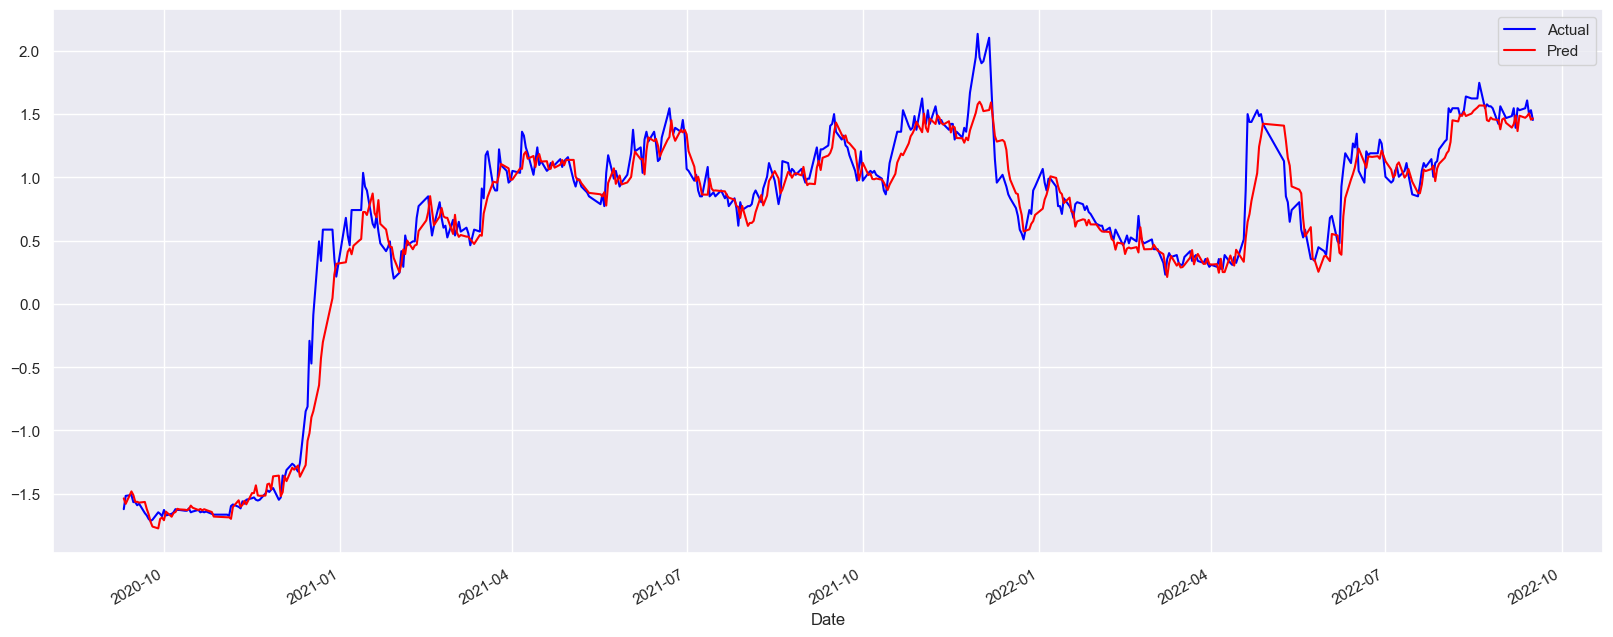

In [14]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [15]:
from joblib import load

In [16]:
close_scaler = load('../feature_engineering/isat_close_scaler.bin')

In [17]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [18]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,2217.600342,2080.0
2020-09-11,2147.635010,2250.0


**Plot error distribution**

In [19]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

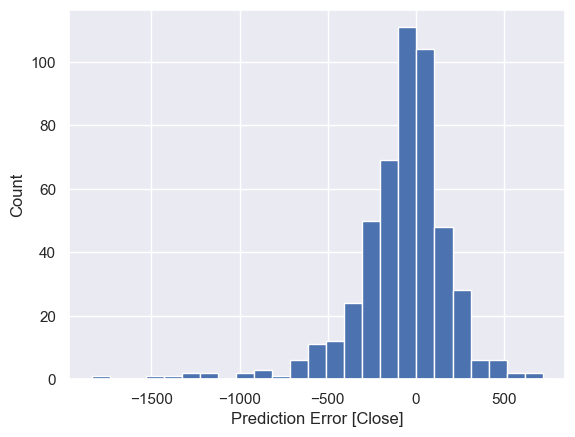

In [20]:
plotErrorHist(inversed)

**RMSE**

In [21]:
from statsmodels.tools.eval_measures import rmse

In [22]:
rmse(inversed['Pred'], inversed['Actual'])

290.88980478063115

**MAPE**

In [23]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
mape(inversed['Actual'], inversed['Pred'])

3.328350370367963

**R-squared**

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9625988181232573

### Save Model

In [27]:
# Save model
model.save_model('./models/isat.json')